In [1]:
import torch, detectron2
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)



torch:  2.0 ; cuda:  2.0.1
detectron2: 0.6


## Get data

In [2]:


import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
     


## Register the SODA10M dataset

In [3]:
import os
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Register the COCO dataset from the custom path
# Assuming you have "instances_train.json" and "instances_val.json" in the directory
# Update these json file names if yours are different
register_coco_instances("soda10m_train", {}, 
                        r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\annotations\instance_train.json", 
                        r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\train")
register_coco_instances("soda10m_val", {}, 
                        r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\annotations\instance_val.json", 
                        r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\val")

## Training

In [4]:
import torch

import gc
def p():
    c = torch.cuda.memory_cached()
    print(f'cached   :{c}')
    a = torch.cuda.memory_allocated()
    print(f'allocated:{a}')
    f = torch.cuda.memory_cached()-torch.cuda.memory_allocated()
    print(f'free     :{f}')
    
torch.cuda.empty_cache()
p()
r = torch.randn(1, 128).cuda()
p()

C:\Users\melmourabitagharbi\.conda\envs\p38_env\lib\site-packages\torch\cuda\memory.py:416: FutureWarning: torch.cuda.memory_cached has been renamed to torch.cuda.memory_reserved
  warnings.warn(


cached   :0
allocated:0
free     :0
cached   :2097152
allocated:512
free     :2096640


In [5]:
import torch
torch.cuda.empty_cache()


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.MODEL.DEVICE = "cuda"
# Update the dataset names to the registered names
cfg.DATASETS.TRAIN = ("soda10m_train",)
cfg.DATASETS.TEST = ("soda10m_val",)  # or an empty tuple if you don't have a validation set
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
#cfg.MODEL.WEIGHTS = r"C:\Users\melmourabitagharbi\detectron2\detectron2\checkpoint\faster_rcnn_R_101_FPN_3x\model_final_f6e8b1.pkl"
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.MAX_ITER = 250000
cfg.SOLVER.STEPS = []  # do not decay learning rate
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # Update to the number of classes in COCO

num_gpu = 1
bs = (num_gpu * 2)
cfg.SOLVER.BASE_LR = 0.02 * bs / 16  # pick a good LR
#cfg.SOLVER.BASE_LR = 0.01  # pick a good LR

# Setup the output directory
cfg.OUTPUT_DIR = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\save"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Create the trainer and start training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[11/21 16:08:27 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

[11/21 16:08:28 d2.data.datasets.coco]: Loaded 5000 images in COCO format from C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\annotations\instance_train.json
[11/21 16:08:28 d2.data.build]: Removed 33 images with no usable annotations. 4967 images left.
[11/21 16:08:28 d2.data.build]: Distribution of instances among all 6 categories:
|  category  | #instances   |  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|:----------:|:-------------|
| Pedestrian | 4901         |  Cyclist   | 6548         |    Car     | 23456        |
|   Truck    | 4297         |    Tram    | 1681         |  Tricycle  | 227          |
|            |              |            |              |            |              |
|   total    | 41110        |            |              |            |              |
[11/21 16:08:28 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(s

Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (7, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (7,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (24, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (24,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, 

[11/21 16:08:28 d2.engine.train_loop]: Starting training from iteration 0


C:\Users\melmourabitagharbi\.conda\envs\p38_env\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[11/21 16:08:39 d2.utils.events]:  eta: 16:03:52  iter: 19  total_loss: 2.498  loss_cls: 1.949  loss_box_reg: 0.4272  loss_rpn_cls: 0.04041  loss_rpn_loc: 0.09431    time: 0.2424  last_time: 0.2079  data_time: 0.0951  last_data_time: 0.0009   lr: 4.9952e-05  max_mem: 1476M
[11/21 16:08:47 d2.utils.events]:  eta: 15:11:23  iter: 39  total_loss: 1.732  loss_cls: 1.028  loss_box_reg: 0.6189  loss_rpn_cls: 0.03198  loss_rpn_loc: 0.04755    time: 0.2309  last_time: 0.2430  data_time: 0.0009  last_data_time: 0.0009   lr: 9.9902e-05  max_mem: 1476M
[11/21 16:08:51 d2.utils.events]:  eta: 15:09:27  iter: 59  total_loss: 1.595  loss_cls: 0.6682  loss_box_reg: 0.7646  loss_rpn_cls: 0.04024  loss_rpn_loc: 0.07541    time: 0.2278  last_time: 0.2084  data_time: 0.0009  last_data_time: 0.0008   lr: 0.00014985  max_mem: 1479M
[11/21 16:08:56 d2.utils.events]:  eta: 15:17:50  iter: 79  total_loss: 1.52  loss_cls: 0.606  loss_box_reg: 0.7841  loss_rpn_cls: 0.0275  loss_rpn_loc: 0.07411    time: 0.2276 

[11/21 16:10:55 d2.utils.events]:  eta: 15:49:39  iter: 599  total_loss: 0.6796  loss_cls: 0.2375  loss_box_reg: 0.3498  loss_rpn_cls: 0.01585  loss_rpn_loc: 0.07378    time: 0.2286  last_time: 0.2233  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0014985  max_mem: 1479M
[11/21 16:11:00 d2.utils.events]:  eta: 15:48:42  iter: 619  total_loss: 0.7782  loss_cls: 0.2987  loss_box_reg: 0.3235  loss_rpn_cls: 0.03929  loss_rpn_loc: 0.07583    time: 0.2284  last_time: 0.2447  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0015485  max_mem: 1479M
[11/21 16:11:04 d2.utils.events]:  eta: 15:49:30  iter: 639  total_loss: 0.7105  loss_cls: 0.2458  loss_box_reg: 0.3472  loss_rpn_cls: 0.0162  loss_rpn_loc: 0.08087    time: 0.2285  last_time: 0.2211  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0015984  max_mem: 1479M
[11/21 16:11:09 d2.utils.events]:  eta: 15:49:16  iter: 659  total_loss: 0.7345  loss_cls: 0.2828  loss_box_reg: 0.3339  loss_rpn_cls: 0.01449  loss_rpn_loc: 0.08371    time

[11/21 16:13:08 d2.utils.events]:  eta: 15:49:23  iter: 1179  total_loss: 0.6117  loss_cls: 0.1802  loss_box_reg: 0.2623  loss_rpn_cls: 0.02282  loss_rpn_loc: 0.04358    time: 0.2282  last_time: 0.1931  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:13:12 d2.utils.events]:  eta: 15:54:27  iter: 1199  total_loss: 0.7437  loss_cls: 0.2536  loss_box_reg: 0.3616  loss_rpn_cls: 0.02633  loss_rpn_loc: 0.05789    time: 0.2282  last_time: 0.2454  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:13:17 d2.utils.events]:  eta: 15:49:14  iter: 1219  total_loss: 0.767  loss_cls: 0.2513  loss_box_reg: 0.3925  loss_rpn_cls: 0.0179  loss_rpn_loc: 0.07737    time: 0.2282  last_time: 0.1967  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:13:21 d2.utils.events]:  eta: 15:47:54  iter: 1239  total_loss: 0.6972  loss_cls: 0.2268  loss_box_reg: 0.3201  loss_rpn_cls: 0.01577  loss_rpn_loc: 0.07299    time: 0.22

[11/21 16:15:25 d2.utils.events]:  eta: 16:04:36  iter: 1779  total_loss: 0.5919  loss_cls: 0.1986  loss_box_reg: 0.3367  loss_rpn_cls: 0.01517  loss_rpn_loc: 0.08167    time: 0.2283  last_time: 0.2242  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:15:30 d2.utils.events]:  eta: 15:55:23  iter: 1799  total_loss: 0.7269  loss_cls: 0.2418  loss_box_reg: 0.3424  loss_rpn_cls: 0.01697  loss_rpn_loc: 0.05154    time: 0.2282  last_time: 0.2521  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:15:34 d2.utils.events]:  eta: 15:55:18  iter: 1819  total_loss: 0.8571  loss_cls: 0.2931  loss_box_reg: 0.3177  loss_rpn_cls: 0.02715  loss_rpn_loc: 0.08506    time: 0.2283  last_time: 0.2464  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1479M
[11/21 16:15:39 d2.utils.events]:  eta: 16:03:44  iter: 1839  total_loss: 0.6524  loss_cls: 0.2498  loss_box_reg: 0.3232  loss_rpn_cls: 0.01609  loss_rpn_loc: 0.08378    time: 0.

[11/21 16:17:42 d2.utils.events]:  eta: 15:55:19  iter: 2379  total_loss: 0.736  loss_cls: 0.2088  loss_box_reg: 0.2833  loss_rpn_cls: 0.02118  loss_rpn_loc: 0.0675    time: 0.2282  last_time: 0.2364  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1479M
[11/21 16:17:47 d2.utils.events]:  eta: 15:55:14  iter: 2399  total_loss: 0.6092  loss_cls: 0.2192  loss_box_reg: 0.2752  loss_rpn_cls: 0.02098  loss_rpn_loc: 0.05228    time: 0.2282  last_time: 0.2126  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:17:51 d2.utils.events]:  eta: 15:59:24  iter: 2419  total_loss: 0.6368  loss_cls: 0.1971  loss_box_reg: 0.2719  loss_rpn_cls: 0.02245  loss_rpn_loc: 0.06913    time: 0.2282  last_time: 0.2460  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:17:56 d2.utils.events]:  eta: 16:00:44  iter: 2439  total_loss: 0.6289  loss_cls: 0.1851  loss_box_reg: 0.2844  loss_rpn_cls: 0.01729  loss_rpn_loc: 0.06579    time: 0.22

[11/21 16:20:00 d2.utils.events]:  eta: 15:59:54  iter: 2979  total_loss: 0.5393  loss_cls: 0.1914  loss_box_reg: 0.2995  loss_rpn_cls: 0.01763  loss_rpn_loc: 0.04815    time: 0.2283  last_time: 0.2493  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:20:04 d2.utils.events]:  eta: 16:05:10  iter: 2999  total_loss: 0.4478  loss_cls: 0.1675  loss_box_reg: 0.2632  loss_rpn_cls: 0.02494  loss_rpn_loc: 0.0468    time: 0.2283  last_time: 0.2458  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:20:09 d2.utils.events]:  eta: 16:05:06  iter: 3019  total_loss: 0.5574  loss_cls: 0.1677  loss_box_reg: 0.2714  loss_rpn_cls: 0.03272  loss_rpn_loc: 0.06028    time: 0.2282  last_time: 0.2203  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:20:14 d2.utils.events]:  eta: 16:06:15  iter: 3039  total_loss: 0.5543  loss_cls: 0.1914  loss_box_reg: 0.2855  loss_rpn_cls: 0.02253  loss_rpn_loc: 0.03433    time: 0.2

[11/21 16:22:17 d2.utils.events]:  eta: 16:08:13  iter: 3579  total_loss: 0.6859  loss_cls: 0.2152  loss_box_reg: 0.3488  loss_rpn_cls: 0.01852  loss_rpn_loc: 0.05885    time: 0.2283  last_time: 0.2380  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:22:22 d2.utils.events]:  eta: 16:08:04  iter: 3599  total_loss: 0.6363  loss_cls: 0.1946  loss_box_reg: 0.3217  loss_rpn_cls: 0.01703  loss_rpn_loc: 0.05336    time: 0.2283  last_time: 0.2216  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:22:26 d2.utils.events]:  eta: 16:07:44  iter: 3619  total_loss: 0.6695  loss_cls: 0.2474  loss_box_reg: 0.3271  loss_rpn_cls: 0.02123  loss_rpn_loc: 0.06735    time: 0.2283  last_time: 0.2457  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:22:31 d2.utils.events]:  eta: 16:07:55  iter: 3639  total_loss: 0.6465  loss_cls: 0.2035  loss_box_reg: 0.3569  loss_rpn_cls: 0.02174  loss_rpn_loc: 0.07915    time: 0.

[11/21 16:24:30 d2.utils.events]:  eta: 15:52:16  iter: 4159  total_loss: 0.7034  loss_cls: 0.2227  loss_box_reg: 0.3317  loss_rpn_cls: 0.01614  loss_rpn_loc: 0.06862    time: 0.2283  last_time: 0.2105  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:24:35 d2.utils.events]:  eta: 15:42:38  iter: 4179  total_loss: 0.6224  loss_cls: 0.2259  loss_box_reg: 0.2869  loss_rpn_cls: 0.01463  loss_rpn_loc: 0.0585    time: 0.2283  last_time: 0.2475  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:24:39 d2.utils.events]:  eta: 15:40:38  iter: 4199  total_loss: 0.6714  loss_cls: 0.2025  loss_box_reg: 0.3147  loss_rpn_cls: 0.024  loss_rpn_loc: 0.05895    time: 0.2283  last_time: 0.2285  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:24:44 d2.utils.events]:  eta: 15:40:33  iter: 4219  total_loss: 0.564  loss_cls: 0.2001  loss_box_reg: 0.2876  loss_rpn_cls: 0.02576  loss_rpn_loc: 0.05451    time: 0.2283

[11/21 16:26:48 d2.utils.events]:  eta: 15:34:53  iter: 4759  total_loss: 0.6285  loss_cls: 0.2018  loss_box_reg: 0.3051  loss_rpn_cls: 0.01674  loss_rpn_loc: 0.04936    time: 0.2283  last_time: 0.2461  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1479M
[11/21 16:26:52 d2.utils.events]:  eta: 15:35:33  iter: 4779  total_loss: 0.6018  loss_cls: 0.1711  loss_box_reg: 0.2645  loss_rpn_cls: 0.01116  loss_rpn_loc: 0.05374    time: 0.2283  last_time: 0.2176  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:26:57 d2.utils.events]:  eta: 15:35:02  iter: 4799  total_loss: 0.5834  loss_cls: 0.2048  loss_box_reg: 0.2677  loss_rpn_cls: 0.01754  loss_rpn_loc: 0.06282    time: 0.2283  last_time: 0.2438  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:27:01 d2.utils.events]:  eta: 15:34:09  iter: 4819  total_loss: 0.819  loss_cls: 0.2734  loss_box_reg: 0.3931  loss_rpn_cls: 0.02028  loss_rpn_loc: 0.08037    time: 0.2

[11/21 16:29:00 d2.utils.events]:  eta: 15:28:28  iter: 5339  total_loss: 0.5775  loss_cls: 0.1534  loss_box_reg: 0.2588  loss_rpn_cls: 0.0154  loss_rpn_loc: 0.07544    time: 0.2282  last_time: 0.2335  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:29:05 d2.utils.events]:  eta: 15:27:27  iter: 5359  total_loss: 0.613  loss_cls: 0.195  loss_box_reg: 0.2509  loss_rpn_cls: 0.01349  loss_rpn_loc: 0.08216    time: 0.2282  last_time: 0.2518  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:29:09 d2.utils.events]:  eta: 15:26:29  iter: 5379  total_loss: 0.6424  loss_cls: 0.2095  loss_box_reg: 0.2891  loss_rpn_cls: 0.02636  loss_rpn_loc: 0.07569    time: 0.2282  last_time: 0.1931  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:29:14 d2.utils.events]:  eta: 15:24:57  iter: 5399  total_loss: 0.6216  loss_cls: 0.236  loss_box_reg: 0.3101  loss_rpn_cls: 0.01075  loss_rpn_loc: 0.05506    time: 0.2282

[11/21 16:31:13 d2.utils.events]:  eta: 15:27:52  iter: 5919  total_loss: 0.6016  loss_cls: 0.2347  loss_box_reg: 0.3133  loss_rpn_cls: 0.01003  loss_rpn_loc: 0.06685    time: 0.2282  last_time: 0.2461  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:31:18 d2.utils.events]:  eta: 15:28:05  iter: 5939  total_loss: 0.6636  loss_cls: 0.2397  loss_box_reg: 0.3298  loss_rpn_cls: 0.009033  loss_rpn_loc: 0.05866    time: 0.2282  last_time: 0.2537  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:31:22 d2.utils.events]:  eta: 15:27:55  iter: 5959  total_loss: 0.6586  loss_cls: 0.2669  loss_box_reg: 0.2999  loss_rpn_cls: 0.02566  loss_rpn_loc: 0.04734    time: 0.2282  last_time: 0.1938  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:31:27 d2.utils.events]:  eta: 15:27:46  iter: 5979  total_loss: 0.6372  loss_cls: 0.2362  loss_box_reg: 0.3119  loss_rpn_cls: 0.01087  loss_rpn_loc: 0.06509    time: 0

[11/21 16:33:30 d2.utils.events]:  eta: 15:48:05  iter: 6519  total_loss: 0.627  loss_cls: 0.2373  loss_box_reg: 0.3151  loss_rpn_cls: 0.01534  loss_rpn_loc: 0.05395    time: 0.2282  last_time: 0.2194  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:33:35 d2.utils.events]:  eta: 15:53:31  iter: 6539  total_loss: 0.5142  loss_cls: 0.1499  loss_box_reg: 0.2472  loss_rpn_cls: 0.01095  loss_rpn_loc: 0.04987    time: 0.2282  last_time: 0.2523  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:33:39 d2.utils.events]:  eta: 15:55:33  iter: 6559  total_loss: 0.7807  loss_cls: 0.2248  loss_box_reg: 0.3813  loss_rpn_cls: 0.02093  loss_rpn_loc: 0.09928    time: 0.2282  last_time: 0.2527  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:33:44 d2.utils.events]:  eta: 15:52:33  iter: 6579  total_loss: 0.6018  loss_cls: 0.17  loss_box_reg: 0.2982  loss_rpn_cls: 0.0152  loss_rpn_loc: 0.07328    time: 0.2282

[11/21 16:35:47 d2.utils.events]:  eta: 15:43:31  iter: 7119  total_loss: 0.6481  loss_cls: 0.2091  loss_box_reg: 0.3256  loss_rpn_cls: 0.01818  loss_rpn_loc: 0.06129    time: 0.2282  last_time: 0.2192  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:35:52 d2.utils.events]:  eta: 15:41:19  iter: 7139  total_loss: 0.5444  loss_cls: 0.1758  loss_box_reg: 0.2987  loss_rpn_cls: 0.01298  loss_rpn_loc: 0.04791    time: 0.2282  last_time: 0.1951  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:35:57 d2.utils.events]:  eta: 15:43:22  iter: 7159  total_loss: 0.5941  loss_cls: 0.2053  loss_box_reg: 0.3039  loss_rpn_cls: 0.01065  loss_rpn_loc: 0.05493    time: 0.2282  last_time: 0.2509  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1479M
[11/21 16:36:01 d2.utils.events]:  eta: 15:41:09  iter: 7179  total_loss: 0.5508  loss_cls: 0.1657  loss_box_reg: 0.2466  loss_rpn_cls: 0.01368  loss_rpn_loc: 0.05235    time: 0.

[11/21 16:38:05 d2.utils.events]:  eta: 15:51:39  iter: 7719  total_loss: 0.6649  loss_cls: 0.2  loss_box_reg: 0.3635  loss_rpn_cls: 0.01167  loss_rpn_loc: 0.04028    time: 0.2283  last_time: 0.1986  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:38:10 d2.utils.events]:  eta: 15:51:35  iter: 7739  total_loss: 0.6862  loss_cls: 0.2276  loss_box_reg: 0.3432  loss_rpn_cls: 0.01262  loss_rpn_loc: 0.04372    time: 0.2282  last_time: 0.2457  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:38:15 d2.utils.events]:  eta: 15:52:31  iter: 7759  total_loss: 0.5631  loss_cls: 0.183  loss_box_reg: 0.3053  loss_rpn_cls: 0.01443  loss_rpn_loc: 0.05192    time: 0.2283  last_time: 0.2232  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1479M
[11/21 16:38:19 d2.utils.events]:  eta: 15:52:27  iter: 7779  total_loss: 0.6225  loss_cls: 0.2204  loss_box_reg: 0.3158  loss_rpn_cls: 0.01706  loss_rpn_loc: 0.06676    time: 0.2283

[11/21 16:40:18 d2.utils.events]:  eta: 15:48:03  iter: 8299  total_loss: 0.4812  loss_cls: 0.1785  loss_box_reg: 0.2083  loss_rpn_cls: 0.007355  loss_rpn_loc: 0.03784    time: 0.2283  last_time: 0.2499  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:40:23 d2.utils.events]:  eta: 15:46:56  iter: 8319  total_loss: 0.6207  loss_cls: 0.211  loss_box_reg: 0.3415  loss_rpn_cls: 0.01197  loss_rpn_loc: 0.05894    time: 0.2283  last_time: 0.1945  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 16:40:27 d2.utils.events]:  eta: 15:39:47  iter: 8339  total_loss: 0.6002  loss_cls: 0.2339  loss_box_reg: 0.3118  loss_rpn_cls: 0.01518  loss_rpn_loc: 0.06222    time: 0.2283  last_time: 0.2119  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 16:40:32 d2.utils.events]:  eta: 15:39:42  iter: 8359  total_loss: 0.6501  loss_cls: 0.1991  loss_box_reg: 0.3001  loss_rpn_cls: 0.01262  loss_rpn_loc: 0.04793    time: 0.

[11/21 16:42:31 d2.utils.events]:  eta: 15:24:30  iter: 8879  total_loss: 0.6772  loss_cls: 0.2322  loss_box_reg: 0.3575  loss_rpn_cls: 0.01914  loss_rpn_loc: 0.06636    time: 0.2283  last_time: 0.1949  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:42:36 d2.utils.events]:  eta: 15:24:41  iter: 8899  total_loss: 0.5542  loss_cls: 0.1842  loss_box_reg: 0.255  loss_rpn_cls: 0.01712  loss_rpn_loc: 0.03915    time: 0.2283  last_time: 0.2159  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:42:41 d2.utils.events]:  eta: 15:24:21  iter: 8919  total_loss: 0.5866  loss_cls: 0.2205  loss_box_reg: 0.2608  loss_rpn_cls: 0.01573  loss_rpn_loc: 0.04122    time: 0.2283  last_time: 0.2484  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:42:45 d2.utils.events]:  eta: 15:24:16  iter: 8939  total_loss: 0.5371  loss_cls: 0.2138  loss_box_reg: 0.2273  loss_rpn_cls: 0.01702  loss_rpn_loc: 0.05159    time: 0.2

[11/21 16:44:43 d2.utils.events]:  eta: 15:15:57  iter: 9459  total_loss: 0.6069  loss_cls: 0.2435  loss_box_reg: 0.3321  loss_rpn_cls: 0.01776  loss_rpn_loc: 0.0533    time: 0.2282  last_time: 0.2227  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:44:48 d2.utils.events]:  eta: 15:15:53  iter: 9479  total_loss: 0.5999  loss_cls: 0.2497  loss_box_reg: 0.2963  loss_rpn_cls: 0.01546  loss_rpn_loc: 0.06031    time: 0.2282  last_time: 0.2156  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:44:53 d2.utils.events]:  eta: 15:14:04  iter: 9499  total_loss: 0.5535  loss_cls: 0.1986  loss_box_reg: 0.3017  loss_rpn_cls: 0.01305  loss_rpn_loc: 0.04651    time: 0.2282  last_time: 0.2281  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:44:57 d2.utils.events]:  eta: 15:12:05  iter: 9519  total_loss: 0.5392  loss_cls: 0.169  loss_box_reg: 0.2433  loss_rpn_cls: 0.01649  loss_rpn_loc: 0.1071    time: 0.228

[11/21 16:46:58 d2.utils.events]:  eta: 15:20:54  iter: 10039  total_loss: 0.5246  loss_cls: 0.1639  loss_box_reg: 0.2995  loss_rpn_cls: 0.01481  loss_rpn_loc: 0.06104    time: 0.2283  last_time: 0.2259  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:47:02 d2.utils.events]:  eta: 15:31:37  iter: 10059  total_loss: 0.6154  loss_cls: 0.1755  loss_box_reg: 0.3216  loss_rpn_cls: 0.0193  loss_rpn_loc: 0.06627    time: 0.2283  last_time: 0.2480  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:47:07 d2.utils.events]:  eta: 15:33:38  iter: 10079  total_loss: 0.6184  loss_cls: 0.2057  loss_box_reg: 0.3362  loss_rpn_cls: 0.0176  loss_rpn_loc: 0.0525    time: 0.2283  last_time: 0.2223  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:47:11 d2.utils.events]:  eta: 15:35:20  iter: 10099  total_loss: 0.6744  loss_cls: 0.2529  loss_box_reg: 0.3591  loss_rpn_cls: 0.02144  loss_rpn_loc: 0.06378    time: 0

[11/21 16:49:12 d2.utils.events]:  eta: 15:44:31  iter: 10619  total_loss: 0.3623  loss_cls: 0.1352  loss_box_reg: 0.1817  loss_rpn_cls: 0.01288  loss_rpn_loc: 0.02355    time: 0.2284  last_time: 0.2215  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:49:16 d2.utils.events]:  eta: 15:44:53  iter: 10639  total_loss: 0.5563  loss_cls: 0.1593  loss_box_reg: 0.3093  loss_rpn_cls: 0.01207  loss_rpn_loc: 0.06996    time: 0.2284  last_time: 0.2498  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:49:21 d2.utils.events]:  eta: 15:47:33  iter: 10659  total_loss: 0.7511  loss_cls: 0.2357  loss_box_reg: 0.3358  loss_rpn_cls: 0.01159  loss_rpn_loc: 0.06946    time: 0.2284  last_time: 0.2426  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:49:26 d2.utils.events]:  eta: 15:47:56  iter: 10679  total_loss: 0.6935  loss_cls: 0.2181  loss_box_reg: 0.3414  loss_rpn_cls: 0.009635  loss_rpn_loc: 0.05809    tim

[11/21 16:51:25 d2.utils.events]:  eta: 15:42:04  iter: 11199  total_loss: 0.4563  loss_cls: 0.1334  loss_box_reg: 0.217  loss_rpn_cls: 0.01532  loss_rpn_loc: 0.06345    time: 0.2285  last_time: 0.2182  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:51:29 d2.utils.events]:  eta: 15:40:35  iter: 11219  total_loss: 0.5554  loss_cls: 0.1831  loss_box_reg: 0.303  loss_rpn_cls: 0.01066  loss_rpn_loc: 0.0637    time: 0.2284  last_time: 0.1941  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:51:34 d2.utils.events]:  eta: 15:40:36  iter: 11239  total_loss: 0.5164  loss_cls: 0.165  loss_box_reg: 0.3133  loss_rpn_cls: 0.009678  loss_rpn_loc: 0.03929    time: 0.2284  last_time: 0.2511  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:51:39 d2.utils.events]:  eta: 15:40:26  iter: 11259  total_loss: 0.6731  loss_cls: 0.247  loss_box_reg: 0.3228  loss_rpn_cls: 0.01703  loss_rpn_loc: 0.04569    time: 0.

[11/21 16:53:38 d2.utils.events]:  eta: 15:22:51  iter: 11779  total_loss: 0.6141  loss_cls: 0.1907  loss_box_reg: 0.3238  loss_rpn_cls: 0.01295  loss_rpn_loc: 0.0732    time: 0.2284  last_time: 0.2106  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:53:42 d2.utils.events]:  eta: 15:20:55  iter: 11799  total_loss: 0.4856  loss_cls: 0.1363  loss_box_reg: 0.238  loss_rpn_cls: 0.01213  loss_rpn_loc: 0.02688    time: 0.2284  last_time: 0.2121  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:53:47 d2.utils.events]:  eta: 15:23:40  iter: 11819  total_loss: 0.5302  loss_cls: 0.1857  loss_box_reg: 0.2982  loss_rpn_cls: 0.01092  loss_rpn_loc: 0.04441    time: 0.2284  last_time: 0.2477  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:53:51 d2.utils.events]:  eta: 15:28:22  iter: 11839  total_loss: 0.5147  loss_cls: 0.1792  loss_box_reg: 0.2755  loss_rpn_cls: 0.008245  loss_rpn_loc: 0.05613    time:

[11/21 16:55:50 d2.utils.events]:  eta: 15:06:19  iter: 12359  total_loss: 0.4353  loss_cls: 0.1335  loss_box_reg: 0.2028  loss_rpn_cls: 0.01375  loss_rpn_loc: 0.02931    time: 0.2284  last_time: 0.2223  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:55:55 d2.utils.events]:  eta: 15:06:14  iter: 12379  total_loss: 0.523  loss_cls: 0.1502  loss_box_reg: 0.2721  loss_rpn_cls: 0.01249  loss_rpn_loc: 0.05391    time: 0.2284  last_time: 0.2528  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:56:00 d2.utils.events]:  eta: 15:04:22  iter: 12399  total_loss: 0.5486  loss_cls: 0.1527  loss_box_reg: 0.2793  loss_rpn_cls: 0.01207  loss_rpn_loc: 0.05627    time: 0.2284  last_time: 0.2211  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:56:04 d2.utils.events]:  eta: 15:02:53  iter: 12419  total_loss: 0.5166  loss_cls: 0.1783  loss_box_reg: 0.2878  loss_rpn_cls: 0.007556  loss_rpn_loc: 0.03792    time

[11/21 16:58:03 d2.utils.events]:  eta: 15:13:28  iter: 12939  total_loss: 0.5964  loss_cls: 0.2132  loss_box_reg: 0.2862  loss_rpn_cls: 0.01332  loss_rpn_loc: 0.04889    time: 0.2284  last_time: 0.2422  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 16:58:08 d2.utils.events]:  eta: 15:13:24  iter: 12959  total_loss: 0.4454  loss_cls: 0.1298  loss_box_reg: 0.2021  loss_rpn_cls: 0.007495  loss_rpn_loc: 0.03998    time: 0.2284  last_time: 0.2431  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:58:12 d2.utils.events]:  eta: 15:13:19  iter: 12979  total_loss: 0.4618  loss_cls: 0.1619  loss_box_reg: 0.2432  loss_rpn_cls: 0.006609  loss_rpn_loc: 0.03906    time: 0.2284  last_time: 0.2350  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 16:58:17 d2.utils.events]:  eta: 15:14:34  iter: 12999  total_loss: 0.6447  loss_cls: 0.1872  loss_box_reg: 0.3201  loss_rpn_cls: 0.01006  loss_rpn_loc: 0.05471    ti

[11/21 17:00:16 d2.utils.events]:  eta: 14:56:44  iter: 13519  total_loss: 0.809  loss_cls: 0.2637  loss_box_reg: 0.3805  loss_rpn_cls: 0.008205  loss_rpn_loc: 0.05864    time: 0.2284  last_time: 0.2429  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:00:20 d2.utils.events]:  eta: 14:58:24  iter: 13539  total_loss: 0.5658  loss_cls: 0.1782  loss_box_reg: 0.3037  loss_rpn_cls: 0.009056  loss_rpn_loc: 0.05451    time: 0.2284  last_time: 0.2430  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:00:25 d2.utils.events]:  eta: 14:56:43  iter: 13559  total_loss: 0.5357  loss_cls: 0.1776  loss_box_reg: 0.2897  loss_rpn_cls: 0.01154  loss_rpn_loc: 0.03657    time: 0.2284  last_time: 0.2490  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:00:29 d2.utils.events]:  eta: 14:56:39  iter: 13579  total_loss: 0.6225  loss_cls: 0.2231  loss_box_reg: 0.2854  loss_rpn_cls: 0.01784  loss_rpn_loc: 0.05123    tim

[11/21 17:02:28 d2.utils.events]:  eta: 15:12:45  iter: 14099  total_loss: 0.5537  loss_cls: 0.1884  loss_box_reg: 0.2814  loss_rpn_cls: 0.006343  loss_rpn_loc: 0.03356    time: 0.2284  last_time: 0.2480  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:02:33 d2.utils.events]:  eta: 15:15:18  iter: 14119  total_loss: 0.6971  loss_cls: 0.2541  loss_box_reg: 0.345  loss_rpn_cls: 0.0135  loss_rpn_loc: 0.06532    time: 0.2284  last_time: 0.2254  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:02:38 d2.utils.events]:  eta: 15:17:29  iter: 14139  total_loss: 0.6228  loss_cls: 0.1938  loss_box_reg: 0.3561  loss_rpn_cls: 0.0154  loss_rpn_loc: 0.03962    time: 0.2284  last_time: 0.2480  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:02:42 d2.utils.events]:  eta: 15:17:24  iter: 14159  total_loss: 0.507  loss_cls: 0.1829  loss_box_reg: 0.2568  loss_rpn_cls: 0.01033  loss_rpn_loc: 0.03066    time: 0

[11/21 17:04:41 d2.utils.events]:  eta: 15:22:26  iter: 14679  total_loss: 0.4992  loss_cls: 0.1643  loss_box_reg: 0.2528  loss_rpn_cls: 0.01434  loss_rpn_loc: 0.04235    time: 0.2284  last_time: 0.2493  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:04:46 d2.utils.events]:  eta: 15:21:55  iter: 14699  total_loss: 0.496  loss_cls: 0.178  loss_box_reg: 0.2672  loss_rpn_cls: 0.006861  loss_rpn_loc: 0.03151    time: 0.2284  last_time: 0.2168  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:04:50 d2.utils.events]:  eta: 15:21:50  iter: 14719  total_loss: 0.6134  loss_cls: 0.2012  loss_box_reg: 0.3087  loss_rpn_cls: 0.01408  loss_rpn_loc: 0.07592    time: 0.2284  last_time: 0.2505  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:04:55 d2.utils.events]:  eta: 15:21:59  iter: 14739  total_loss: 0.5659  loss_cls: 0.1731  loss_box_reg: 0.2849  loss_rpn_cls: 0.01609  loss_rpn_loc: 0.05493    time:

[11/21 17:06:54 d2.utils.events]:  eta: 14:51:37  iter: 15259  total_loss: 0.558  loss_cls: 0.1909  loss_box_reg: 0.3012  loss_rpn_cls: 0.01021  loss_rpn_loc: 0.04981    time: 0.2283  last_time: 0.2215  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:06:59 d2.utils.events]:  eta: 14:52:05  iter: 15279  total_loss: 0.4975  loss_cls: 0.1742  loss_box_reg: 0.2786  loss_rpn_cls: 0.009571  loss_rpn_loc: 0.03066    time: 0.2283  last_time: 0.2231  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:07:03 d2.utils.events]:  eta: 14:48:19  iter: 15299  total_loss: 0.4806  loss_cls: 0.1737  loss_box_reg: 0.254  loss_rpn_cls: 0.008303  loss_rpn_loc: 0.04985    time: 0.2283  last_time: 0.2533  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 17:07:08 d2.utils.events]:  eta: 14:47:33  iter: 15319  total_loss: 0.4371  loss_cls: 0.146  loss_box_reg: 0.2573  loss_rpn_cls: 0.006593  loss_rpn_loc: 0.0343    time:

[11/21 17:09:08 d2.utils.events]:  eta: 15:05:32  iter: 15839  total_loss: 0.6223  loss_cls: 0.173  loss_box_reg: 0.3072  loss_rpn_cls: 0.008925  loss_rpn_loc: 0.06544    time: 0.2284  last_time: 0.2509  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:09:12 d2.utils.events]:  eta: 15:00:51  iter: 15859  total_loss: 0.5645  loss_cls: 0.1926  loss_box_reg: 0.3174  loss_rpn_cls: 0.01223  loss_rpn_loc: 0.04065    time: 0.2284  last_time: 0.2358  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:09:17 d2.utils.events]:  eta: 15:02:15  iter: 15879  total_loss: 0.5318  loss_cls: 0.1522  loss_box_reg: 0.2715  loss_rpn_cls: 0.007289  loss_rpn_loc: 0.05232    time: 0.2284  last_time: 0.2509  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:09:21 d2.utils.events]:  eta: 15:05:18  iter: 15899  total_loss: 0.5899  loss_cls: 0.2126  loss_box_reg: 0.3092  loss_rpn_cls: 0.01101  loss_rpn_loc: 0.04888    tim

[11/21 17:11:20 d2.utils.events]:  eta: 15:09:53  iter: 16419  total_loss: 0.4831  loss_cls: 0.1599  loss_box_reg: 0.2772  loss_rpn_cls: 0.009158  loss_rpn_loc: 0.06087    time: 0.2284  last_time: 0.2252  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:11:24 d2.utils.events]:  eta: 15:06:12  iter: 16439  total_loss: 0.4825  loss_cls: 0.166  loss_box_reg: 0.2517  loss_rpn_cls: 0.01026  loss_rpn_loc: 0.05405    time: 0.2283  last_time: 0.2513  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:11:29 d2.utils.events]:  eta: 15:07:19  iter: 16459  total_loss: 0.5278  loss_cls: 0.1463  loss_box_reg: 0.2729  loss_rpn_cls: 0.007241  loss_rpn_loc: 0.04868    time: 0.2283  last_time: 0.2446  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:11:34 d2.utils.events]:  eta: 15:08:25  iter: 16479  total_loss: 0.512  loss_cls: 0.1529  loss_box_reg: 0.2433  loss_rpn_cls: 0.009157  loss_rpn_loc: 0.02549    tim

[11/21 17:13:33 d2.utils.events]:  eta: 14:56:04  iter: 16999  total_loss: 0.6121  loss_cls: 0.2057  loss_box_reg: 0.3016  loss_rpn_cls: 0.01197  loss_rpn_loc: 0.08116    time: 0.2283  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:13:37 d2.utils.events]:  eta: 14:56:00  iter: 17019  total_loss: 0.5902  loss_cls: 0.1624  loss_box_reg: 0.2427  loss_rpn_cls: 0.02422  loss_rpn_loc: 0.07793    time: 0.2283  last_time: 0.2160  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:13:42 d2.utils.events]:  eta: 14:56:29  iter: 17039  total_loss: 0.6296  loss_cls: 0.1875  loss_box_reg: 0.3361  loss_rpn_cls: 0.01063  loss_rpn_loc: 0.04596    time: 0.2283  last_time: 0.2310  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:13:47 d2.utils.events]:  eta: 15:03:56  iter: 17059  total_loss: 0.4478  loss_cls: 0.1602  loss_box_reg: 0.2477  loss_rpn_cls: 0.007253  loss_rpn_loc: 0.0428    time

[11/21 17:15:46 d2.utils.events]:  eta: 15:08:44  iter: 17579  total_loss: 0.4117  loss_cls: 0.1614  loss_box_reg: 0.219  loss_rpn_cls: 0.006156  loss_rpn_loc: 0.05067    time: 0.2284  last_time: 0.2465  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:15:51 d2.utils.events]:  eta: 15:08:42  iter: 17599  total_loss: 0.6833  loss_cls: 0.1954  loss_box_reg: 0.3331  loss_rpn_cls: 0.009589  loss_rpn_loc: 0.06819    time: 0.2284  last_time: 0.2382  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:15:55 d2.utils.events]:  eta: 15:08:56  iter: 17619  total_loss: 0.5637  loss_cls: 0.1659  loss_box_reg: 0.278  loss_rpn_cls: 0.007565  loss_rpn_loc: 0.04844    time: 0.2284  last_time: 0.2235  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1480M
[11/21 17:16:00 d2.utils.events]:  eta: 15:09:46  iter: 17639  total_loss: 0.6009  loss_cls: 0.1922  loss_box_reg: 0.2849  loss_rpn_cls: 0.008497  loss_rpn_loc: 0.04271    ti

[11/21 17:17:58 d2.utils.events]:  eta: 14:59:24  iter: 18159  total_loss: 0.5637  loss_cls: 0.1923  loss_box_reg: 0.3109  loss_rpn_cls: 0.01465  loss_rpn_loc: 0.03853    time: 0.2283  last_time: 0.2007  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:18:03 d2.utils.events]:  eta: 15:06:26  iter: 18179  total_loss: 0.4937  loss_cls: 0.1896  loss_box_reg: 0.2848  loss_rpn_cls: 0.01553  loss_rpn_loc: 0.04016    time: 0.2283  last_time: 0.2002  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:18:08 d2.utils.events]:  eta: 15:07:00  iter: 18199  total_loss: 0.5166  loss_cls: 0.1631  loss_box_reg: 0.266  loss_rpn_cls: 0.006532  loss_rpn_loc: 0.04468    time: 0.2283  last_time: 0.1970  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 17:18:12 d2.utils.events]:  eta: 15:07:23  iter: 18219  total_loss: 0.5486  loss_cls: 0.1998  loss_box_reg: 0.2604  loss_rpn_cls: 0.009045  loss_rpn_loc: 0.06801    tim

[11/21 17:20:11 d2.utils.events]:  eta: 14:52:07  iter: 18739  total_loss: 0.5683  loss_cls: 0.1873  loss_box_reg: 0.2778  loss_rpn_cls: 0.02121  loss_rpn_loc: 0.0709    time: 0.2283  last_time: 0.1969  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:20:16 d2.utils.events]:  eta: 14:59:37  iter: 18759  total_loss: 0.6866  loss_cls: 0.2383  loss_box_reg: 0.3224  loss_rpn_cls: 0.01369  loss_rpn_loc: 0.07153    time: 0.2283  last_time: 0.2248  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:20:21 d2.utils.events]:  eta: 15:04:35  iter: 18779  total_loss: 0.4816  loss_cls: 0.1515  loss_box_reg: 0.2116  loss_rpn_cls: 0.007643  loss_rpn_loc: 0.03946    time: 0.2283  last_time: 0.2343  data_time: 0.0009  last_data_time: 0.0012   lr: 0.0025  max_mem: 1480M
[11/21 17:20:25 d2.utils.events]:  eta: 15:03:56  iter: 18799  total_loss: 0.5926  loss_cls: 0.2201  loss_box_reg: 0.3183  loss_rpn_cls: 0.02122  loss_rpn_loc: 0.03802    time

[11/21 17:22:24 d2.utils.events]:  eta: 15:00:30  iter: 19319  total_loss: 0.6313  loss_cls: 0.2164  loss_box_reg: 0.3005  loss_rpn_cls: 0.0107  loss_rpn_loc: 0.08923    time: 0.2284  last_time: 0.2376  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:22:29 d2.utils.events]:  eta: 15:00:33  iter: 19339  total_loss: 0.6794  loss_cls: 0.2255  loss_box_reg: 0.3468  loss_rpn_cls: 0.008845  loss_rpn_loc: 0.06997    time: 0.2284  last_time: 0.2398  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:22:34 d2.utils.events]:  eta: 15:00:20  iter: 19359  total_loss: 0.5285  loss_cls: 0.1484  loss_box_reg: 0.245  loss_rpn_cls: 0.004544  loss_rpn_loc: 0.04633    time: 0.2284  last_time: 0.2287  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:22:38 d2.utils.events]:  eta: 14:56:32  iter: 19379  total_loss: 0.5846  loss_cls: 0.1999  loss_box_reg: 0.3085  loss_rpn_cls: 0.006793  loss_rpn_loc: 0.06128    tim

[11/21 17:24:37 d2.utils.events]:  eta: 14:54:37  iter: 19899  total_loss: 0.4865  loss_cls: 0.1572  loss_box_reg: 0.2577  loss_rpn_cls: 0.007344  loss_rpn_loc: 0.05124    time: 0.2283  last_time: 0.2120  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:24:42 d2.utils.events]:  eta: 14:53:17  iter: 19919  total_loss: 0.5589  loss_cls: 0.1965  loss_box_reg: 0.2587  loss_rpn_cls: 0.007501  loss_rpn_loc: 0.05819    time: 0.2283  last_time: 0.2501  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:24:46 d2.utils.events]:  eta: 14:52:20  iter: 19939  total_loss: 0.4391  loss_cls: 0.1242  loss_box_reg: 0.2459  loss_rpn_cls: 0.0115  loss_rpn_loc: 0.0661    time: 0.2283  last_time: 0.2245  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:24:51 d2.utils.events]:  eta: 14:52:15  iter: 19959  total_loss: 0.5077  loss_cls: 0.1516  loss_box_reg: 0.2913  loss_rpn_cls: 0.006836  loss_rpn_loc: 0.03936    tim

[11/21 17:26:50 d2.utils.events]:  eta: 14:39:56  iter: 20479  total_loss: 0.5181  loss_cls: 0.1511  loss_box_reg: 0.2562  loss_rpn_cls: 0.01237  loss_rpn_loc: 0.05374    time: 0.2283  last_time: 0.2487  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:26:55 d2.utils.events]:  eta: 14:39:51  iter: 20499  total_loss: 0.4188  loss_cls: 0.1097  loss_box_reg: 0.2469  loss_rpn_cls: 0.008428  loss_rpn_loc: 0.05331    time: 0.2283  last_time: 0.2515  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:26:59 d2.utils.events]:  eta: 14:41:44  iter: 20519  total_loss: 0.4856  loss_cls: 0.1706  loss_box_reg: 0.2525  loss_rpn_cls: 0.004749  loss_rpn_loc: 0.04054    time: 0.2283  last_time: 0.2150  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:27:04 d2.utils.events]:  eta: 14:45:46  iter: 20539  total_loss: 0.3694  loss_cls: 0.08981  loss_box_reg: 0.1744  loss_rpn_cls: 0.007093  loss_rpn_loc: 0.04255    

[11/21 17:29:03 d2.utils.events]:  eta: 14:42:03  iter: 21059  total_loss: 0.5082  loss_cls: 0.182  loss_box_reg: 0.2461  loss_rpn_cls: 0.004759  loss_rpn_loc: 0.04908    time: 0.2283  last_time: 0.2285  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:29:07 d2.utils.events]:  eta: 14:44:50  iter: 21079  total_loss: 0.6115  loss_cls: 0.1859  loss_box_reg: 0.3179  loss_rpn_cls: 0.008396  loss_rpn_loc: 0.05376    time: 0.2283  last_time: 0.2517  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:29:12 d2.utils.events]:  eta: 14:48:53  iter: 21099  total_loss: 0.6181  loss_cls: 0.2071  loss_box_reg: 0.3062  loss_rpn_cls: 0.009532  loss_rpn_loc: 0.05198    time: 0.2283  last_time: 0.2127  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:29:16 d2.utils.events]:  eta: 14:40:23  iter: 21119  total_loss: 0.4802  loss_cls: 0.1398  loss_box_reg: 0.2673  loss_rpn_cls: 0.01002  loss_rpn_loc: 0.03254    ti

[11/21 17:31:15 d2.utils.events]:  eta: 14:27:13  iter: 21639  total_loss: 0.4439  loss_cls: 0.1613  loss_box_reg: 0.2167  loss_rpn_cls: 0.008903  loss_rpn_loc: 0.05478    time: 0.2283  last_time: 0.2253  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:31:19 d2.utils.events]:  eta: 14:26:48  iter: 21659  total_loss: 0.5558  loss_cls: 0.1389  loss_box_reg: 0.2868  loss_rpn_cls: 0.009253  loss_rpn_loc: 0.0966    time: 0.2283  last_time: 0.2246  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:31:24 d2.utils.events]:  eta: 14:26:44  iter: 21679  total_loss: 0.5733  loss_cls: 0.1661  loss_box_reg: 0.3104  loss_rpn_cls: 0.009739  loss_rpn_loc: 0.05176    time: 0.2283  last_time: 0.2095  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:31:28 d2.utils.events]:  eta: 14:24:30  iter: 21699  total_loss: 0.4715  loss_cls: 0.1651  loss_box_reg: 0.2647  loss_rpn_cls: 0.007506  loss_rpn_loc: 0.05327    t

[11/21 17:33:28 d2.utils.events]:  eta: 14:24:56  iter: 22219  total_loss: 0.4793  loss_cls: 0.1498  loss_box_reg: 0.2541  loss_rpn_cls: 0.0111  loss_rpn_loc: 0.06114    time: 0.2283  last_time: 0.2132  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:33:32 d2.utils.events]:  eta: 14:25:02  iter: 22239  total_loss: 0.5023  loss_cls: 0.1641  loss_box_reg: 0.2443  loss_rpn_cls: 0.00626  loss_rpn_loc: 0.06157    time: 0.2283  last_time: 0.2459  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:33:37 d2.utils.events]:  eta: 14:24:05  iter: 22259  total_loss: 0.4973  loss_cls: 0.1612  loss_box_reg: 0.2869  loss_rpn_cls: 0.00854  loss_rpn_loc: 0.04716    time: 0.2283  last_time: 0.2239  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1480M
[11/21 17:33:42 d2.utils.events]:  eta: 14:24:53  iter: 22279  total_loss: 0.4763  loss_cls: 0.1358  loss_box_reg: 0.2742  loss_rpn_cls: 0.003506  loss_rpn_loc: 0.04792    time

[11/21 17:35:41 d2.utils.events]:  eta: 14:27:42  iter: 22799  total_loss: 0.5529  loss_cls: 0.1952  loss_box_reg: 0.3037  loss_rpn_cls: 0.01199  loss_rpn_loc: 0.0457    time: 0.2283  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:35:45 d2.utils.events]:  eta: 14:26:12  iter: 22819  total_loss: 0.4256  loss_cls: 0.1536  loss_box_reg: 0.2174  loss_rpn_cls: 0.007356  loss_rpn_loc: 0.02754    time: 0.2283  last_time: 0.2269  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:35:50 d2.utils.events]:  eta: 14:28:45  iter: 22839  total_loss: 0.5809  loss_cls: 0.1702  loss_box_reg: 0.3164  loss_rpn_cls: 0.004239  loss_rpn_loc: 0.05553    time: 0.2283  last_time: 0.2430  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:35:54 d2.utils.events]:  eta: 14:26:16  iter: 22859  total_loss: 0.4476  loss_cls: 0.1529  loss_box_reg: 0.222  loss_rpn_cls: 0.005379  loss_rpn_loc: 0.02833    tim

[11/21 17:37:53 d2.utils.events]:  eta: 14:17:15  iter: 23379  total_loss: 0.4641  loss_cls: 0.1506  loss_box_reg: 0.258  loss_rpn_cls: 0.007031  loss_rpn_loc: 0.0288    time: 0.2283  last_time: 0.2255  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:37:57 d2.utils.events]:  eta: 14:17:04  iter: 23399  total_loss: 0.4135  loss_cls: 0.1167  loss_box_reg: 0.2158  loss_rpn_cls: 0.006634  loss_rpn_loc: 0.04267    time: 0.2283  last_time: 0.1959  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:38:02 d2.utils.events]:  eta: 14:17:38  iter: 23419  total_loss: 0.6325  loss_cls: 0.2108  loss_box_reg: 0.3276  loss_rpn_cls: 0.01487  loss_rpn_loc: 0.05127    time: 0.2283  last_time: 0.2333  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:38:07 d2.utils.events]:  eta: 14:19:12  iter: 23439  total_loss: 0.5426  loss_cls: 0.1729  loss_box_reg: 0.2826  loss_rpn_cls: 0.01075  loss_rpn_loc: 0.05294    time

[11/21 17:40:06 d2.utils.events]:  eta: 14:41:14  iter: 23959  total_loss: 0.5453  loss_cls: 0.1618  loss_box_reg: 0.2638  loss_rpn_cls: 0.01172  loss_rpn_loc: 0.05857    time: 0.2283  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:40:11 d2.utils.events]:  eta: 14:39:07  iter: 23979  total_loss: 0.5104  loss_cls: 0.1811  loss_box_reg: 0.2571  loss_rpn_cls: 0.01003  loss_rpn_loc: 0.05074    time: 0.2283  last_time: 0.2493  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:40:15 d2.utils.events]:  eta: 14:39:02  iter: 23999  total_loss: 0.5103  loss_cls: 0.1728  loss_box_reg: 0.2662  loss_rpn_cls: 0.008059  loss_rpn_loc: 0.03072    time: 0.2283  last_time: 0.1949  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:40:20 d2.utils.events]:  eta: 14:44:07  iter: 24019  total_loss: 0.4887  loss_cls: 0.1448  loss_box_reg: 0.2541  loss_rpn_cls: 0.007116  loss_rpn_loc: 0.05051    ti

[11/21 17:42:19 d2.utils.events]:  eta: 14:47:55  iter: 24539  total_loss: 0.4469  loss_cls: 0.1582  loss_box_reg: 0.1993  loss_rpn_cls: 0.01113  loss_rpn_loc: 0.03791    time: 0.2283  last_time: 0.1949  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:42:24 d2.utils.events]:  eta: 14:47:20  iter: 24559  total_loss: 0.4831  loss_cls: 0.1516  loss_box_reg: 0.2515  loss_rpn_cls: 0.01244  loss_rpn_loc: 0.04074    time: 0.2283  last_time: 0.2466  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:42:29 d2.utils.events]:  eta: 14:43:58  iter: 24579  total_loss: 0.5003  loss_cls: 0.1582  loss_box_reg: 0.264  loss_rpn_cls: 0.01316  loss_rpn_loc: 0.04469    time: 0.2283  last_time: 0.2142  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:42:33 d2.utils.events]:  eta: 14:40:00  iter: 24599  total_loss: 0.4317  loss_cls: 0.161  loss_box_reg: 0.2186  loss_rpn_cls: 0.008586  loss_rpn_loc: 0.02804    time:

[11/21 17:44:32 d2.utils.events]:  eta: 14:20:01  iter: 25119  total_loss: 0.4245  loss_cls: 0.1378  loss_box_reg: 0.2008  loss_rpn_cls: 0.009552  loss_rpn_loc: 0.03878    time: 0.2283  last_time: 0.2186  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:44:37 d2.utils.events]:  eta: 14:15:58  iter: 25139  total_loss: 0.4726  loss_cls: 0.1365  loss_box_reg: 0.2327  loss_rpn_cls: 0.01041  loss_rpn_loc: 0.04816    time: 0.2283  last_time: 0.2154  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:44:41 d2.utils.events]:  eta: 14:14:22  iter: 25159  total_loss: 0.3882  loss_cls: 0.101  loss_box_reg: 0.2003  loss_rpn_cls: 0.004336  loss_rpn_loc: 0.03441    time: 0.2283  last_time: 0.1997  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:44:46 d2.utils.events]:  eta: 14:13:38  iter: 25179  total_loss: 0.4318  loss_cls: 0.1584  loss_box_reg: 0.2011  loss_rpn_cls: 0.006108  loss_rpn_loc: 0.04793    ti

[11/21 17:46:45 d2.utils.events]:  eta: 14:10:30  iter: 25699  total_loss: 0.5225  loss_cls: 0.1624  loss_box_reg: 0.2739  loss_rpn_cls: 0.009824  loss_rpn_loc: 0.1044    time: 0.2283  last_time: 0.2500  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:46:49 d2.utils.events]:  eta: 14:08:30  iter: 25719  total_loss: 0.4014  loss_cls: 0.1425  loss_box_reg: 0.2352  loss_rpn_cls: 0.00571  loss_rpn_loc: 0.02906    time: 0.2283  last_time: 0.2223  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 17:46:54 d2.utils.events]:  eta: 14:07:18  iter: 25739  total_loss: 0.4856  loss_cls: 0.142  loss_box_reg: 0.2313  loss_rpn_cls: 0.007201  loss_rpn_loc: 0.08586    time: 0.2283  last_time: 0.2353  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:46:58 d2.utils.events]:  eta: 14:07:05  iter: 25759  total_loss: 0.5242  loss_cls: 0.1715  loss_box_reg: 0.3027  loss_rpn_cls: 0.008768  loss_rpn_loc: 0.05381    tim

[11/21 17:48:58 d2.utils.events]:  eta: 14:16:35  iter: 26279  total_loss: 0.5106  loss_cls: 0.1577  loss_box_reg: 0.2772  loss_rpn_cls: 0.01072  loss_rpn_loc: 0.0348    time: 0.2283  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:49:02 d2.utils.events]:  eta: 14:17:36  iter: 26299  total_loss: 0.5245  loss_cls: 0.1616  loss_box_reg: 0.2697  loss_rpn_cls: 0.01326  loss_rpn_loc: 0.03218    time: 0.2283  last_time: 0.2456  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:49:07 d2.utils.events]:  eta: 14:18:35  iter: 26319  total_loss: 0.5758  loss_cls: 0.1724  loss_box_reg: 0.2961  loss_rpn_cls: 0.01508  loss_rpn_loc: 0.04306    time: 0.2283  last_time: 0.2522  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:49:12 d2.utils.events]:  eta: 14:22:30  iter: 26339  total_loss: 0.4875  loss_cls: 0.1537  loss_box_reg: 0.265  loss_rpn_cls: 0.005791  loss_rpn_loc: 0.05532    time:

[11/21 17:51:11 d2.utils.events]:  eta: 14:25:11  iter: 26859  total_loss: 0.5153  loss_cls: 0.1662  loss_box_reg: 0.2622  loss_rpn_cls: 0.005338  loss_rpn_loc: 0.0306    time: 0.2283  last_time: 0.2250  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:51:16 d2.utils.events]:  eta: 14:25:46  iter: 26879  total_loss: 0.6637  loss_cls: 0.2001  loss_box_reg: 0.331  loss_rpn_cls: 0.009041  loss_rpn_loc: 0.06711    time: 0.2283  last_time: 0.2501  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:51:20 d2.utils.events]:  eta: 14:26:32  iter: 26899  total_loss: 0.5089  loss_cls: 0.1648  loss_box_reg: 0.2617  loss_rpn_cls: 0.00761  loss_rpn_loc: 0.05012    time: 0.2283  last_time: 0.2388  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:51:25 d2.utils.events]:  eta: 14:25:39  iter: 26919  total_loss: 0.5241  loss_cls: 0.173  loss_box_reg: 0.3093  loss_rpn_cls: 0.00479  loss_rpn_loc: 0.06024    time:

[11/21 17:53:24 d2.utils.events]:  eta: 14:33:30  iter: 27439  total_loss: 0.5357  loss_cls: 0.1716  loss_box_reg: 0.2517  loss_rpn_cls: 0.01126  loss_rpn_loc: 0.05567    time: 0.2283  last_time: 0.2500  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:53:29 d2.utils.events]:  eta: 14:31:26  iter: 27459  total_loss: 0.5377  loss_cls: 0.1757  loss_box_reg: 0.2339  loss_rpn_cls: 0.011  loss_rpn_loc: 0.05047    time: 0.2283  last_time: 0.2513  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:53:33 d2.utils.events]:  eta: 14:30:13  iter: 27479  total_loss: 0.4922  loss_cls: 0.1632  loss_box_reg: 0.2951  loss_rpn_cls: 0.0113  loss_rpn_loc: 0.04095    time: 0.2283  last_time: 0.1992  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:53:38 d2.utils.events]:  eta: 14:32:00  iter: 27499  total_loss: 0.5333  loss_cls: 0.1716  loss_box_reg: 0.2634  loss_rpn_cls: 0.009238  loss_rpn_loc: 0.03089    time: 

[11/21 17:55:38 d2.utils.events]:  eta: 14:27:05  iter: 28019  total_loss: 0.5281  loss_cls: 0.1759  loss_box_reg: 0.2827  loss_rpn_cls: 0.004851  loss_rpn_loc: 0.03697    time: 0.2283  last_time: 0.2555  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 17:55:42 d2.utils.events]:  eta: 14:27:24  iter: 28039  total_loss: 0.4688  loss_cls: 0.16  loss_box_reg: 0.2431  loss_rpn_cls: 0.005207  loss_rpn_loc: 0.03731    time: 0.2283  last_time: 0.2478  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1480M
[11/21 17:55:47 d2.utils.events]:  eta: 14:27:02  iter: 28059  total_loss: 0.52  loss_cls: 0.1464  loss_box_reg: 0.2555  loss_rpn_cls: 0.009502  loss_rpn_loc: 0.06892    time: 0.2283  last_time: 0.2304  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:55:51 d2.utils.events]:  eta: 14:23:49  iter: 28079  total_loss: 0.4499  loss_cls: 0.1388  loss_box_reg: 0.2409  loss_rpn_cls: 0.008474  loss_rpn_loc: 0.07571    time

[11/21 17:57:51 d2.utils.events]:  eta: 14:25:02  iter: 28599  total_loss: 0.5616  loss_cls: 0.179  loss_box_reg: 0.2966  loss_rpn_cls: 0.008978  loss_rpn_loc: 0.05393    time: 0.2283  last_time: 0.2453  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:57:55 d2.utils.events]:  eta: 14:24:57  iter: 28619  total_loss: 0.4099  loss_cls: 0.1282  loss_box_reg: 0.236  loss_rpn_cls: 0.01279  loss_rpn_loc: 0.03386    time: 0.2283  last_time: 0.1948  data_time: 0.0008  last_data_time: 0.0011   lr: 0.0025  max_mem: 1480M
[11/21 17:58:00 d2.utils.events]:  eta: 14:25:08  iter: 28639  total_loss: 0.4751  loss_cls: 0.1274  loss_box_reg: 0.2552  loss_rpn_cls: 0.006888  loss_rpn_loc: 0.0316    time: 0.2283  last_time: 0.2216  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 17:58:04 d2.utils.events]:  eta: 14:25:17  iter: 28659  total_loss: 0.7245  loss_cls: 0.2562  loss_box_reg: 0.3481  loss_rpn_cls: 0.01406  loss_rpn_loc: 0.05394    time:

[11/21 18:00:04 d2.utils.events]:  eta: 14:24:57  iter: 29179  total_loss: 0.5685  loss_cls: 0.2155  loss_box_reg: 0.3048  loss_rpn_cls: 0.009031  loss_rpn_loc: 0.05663    time: 0.2284  last_time: 0.2251  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:00:08 d2.utils.events]:  eta: 14:25:02  iter: 29199  total_loss: 0.4127  loss_cls: 0.1413  loss_box_reg: 0.2418  loss_rpn_cls: 0.008861  loss_rpn_loc: 0.05109    time: 0.2284  last_time: 0.2477  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:00:13 d2.utils.events]:  eta: 14:24:48  iter: 29219  total_loss: 0.5431  loss_cls: 0.1746  loss_box_reg: 0.2682  loss_rpn_cls: 0.01255  loss_rpn_loc: 0.0574    time: 0.2283  last_time: 0.2520  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:00:18 d2.utils.events]:  eta: 14:25:18  iter: 29239  total_loss: 0.4632  loss_cls: 0.1428  loss_box_reg: 0.281  loss_rpn_cls: 0.006467  loss_rpn_loc: 0.03212    tim

[11/21 18:02:17 d2.utils.events]:  eta: 14:24:43  iter: 29759  total_loss: 0.38  loss_cls: 0.1118  loss_box_reg: 0.198  loss_rpn_cls: 0.005029  loss_rpn_loc: 0.04342    time: 0.2284  last_time: 0.2164  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:02:22 d2.utils.events]:  eta: 14:25:20  iter: 29779  total_loss: 0.6012  loss_cls: 0.1889  loss_box_reg: 0.324  loss_rpn_cls: 0.01107  loss_rpn_loc: 0.07811    time: 0.2284  last_time: 0.2098  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:02:26 d2.utils.events]:  eta: 14:25:46  iter: 29799  total_loss: 0.5561  loss_cls: 0.1746  loss_box_reg: 0.3334  loss_rpn_cls: 0.006936  loss_rpn_loc: 0.04619    time: 0.2284  last_time: 0.2490  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:02:31 d2.utils.events]:  eta: 14:25:11  iter: 29819  total_loss: 0.4418  loss_cls: 0.1518  loss_box_reg: 0.2345  loss_rpn_cls: 0.01179  loss_rpn_loc: 0.05496    time: 

[11/21 18:04:30 d2.utils.events]:  eta: 14:12:47  iter: 30339  total_loss: 0.4571  loss_cls: 0.1521  loss_box_reg: 0.2469  loss_rpn_cls: 0.00634  loss_rpn_loc: 0.04786    time: 0.2283  last_time: 0.2387  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:04:34 d2.utils.events]:  eta: 14:07:51  iter: 30359  total_loss: 0.4532  loss_cls: 0.1645  loss_box_reg: 0.2077  loss_rpn_cls: 0.007872  loss_rpn_loc: 0.01877    time: 0.2283  last_time: 0.2461  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:04:39 d2.utils.events]:  eta: 14:01:37  iter: 30379  total_loss: 0.5039  loss_cls: 0.1706  loss_box_reg: 0.2965  loss_rpn_cls: 0.007254  loss_rpn_loc: 0.04028    time: 0.2283  last_time: 0.2210  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:04:44 d2.utils.events]:  eta: 13:58:31  iter: 30399  total_loss: 0.4801  loss_cls: 0.152  loss_box_reg: 0.2776  loss_rpn_cls: 0.004861  loss_rpn_loc: 0.0327    tim

[11/21 18:06:43 d2.utils.events]:  eta: 13:51:56  iter: 30919  total_loss: 0.5824  loss_cls: 0.1627  loss_box_reg: 0.3081  loss_rpn_cls: 0.01011  loss_rpn_loc: 0.0938    time: 0.2284  last_time: 0.2287  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:06:47 d2.utils.events]:  eta: 13:50:17  iter: 30939  total_loss: 0.469  loss_cls: 0.15  loss_box_reg: 0.2773  loss_rpn_cls: 0.004984  loss_rpn_loc: 0.05452    time: 0.2283  last_time: 0.2151  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:06:52 d2.utils.events]:  eta: 13:50:12  iter: 30959  total_loss: 0.5717  loss_cls: 0.1549  loss_box_reg: 0.2896  loss_rpn_cls: 0.007376  loss_rpn_loc: 0.06909    time: 0.2283  last_time: 0.2137  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:06:57 d2.utils.events]:  eta: 13:54:26  iter: 30979  total_loss: 0.4661  loss_cls: 0.1011  loss_box_reg: 0.2579  loss_rpn_cls: 0.007479  loss_rpn_loc: 0.03749    time:

[11/21 18:08:55 d2.utils.events]:  eta: 13:50:02  iter: 31499  total_loss: 0.6177  loss_cls: 0.1836  loss_box_reg: 0.2941  loss_rpn_cls: 0.01252  loss_rpn_loc: 0.06578    time: 0.2283  last_time: 0.1978  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:08:59 d2.utils.events]:  eta: 13:50:24  iter: 31519  total_loss: 0.5237  loss_cls: 0.1838  loss_box_reg: 0.2949  loss_rpn_cls: 0.01565  loss_rpn_loc: 0.04438    time: 0.2283  last_time: 0.2214  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:09:04 d2.utils.events]:  eta: 13:49:10  iter: 31539  total_loss: 0.569  loss_cls: 0.1834  loss_box_reg: 0.2617  loss_rpn_cls: 0.01348  loss_rpn_loc: 0.05591    time: 0.2283  last_time: 0.2481  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:09:08 d2.utils.events]:  eta: 13:49:48  iter: 31559  total_loss: 0.4203  loss_cls: 0.1092  loss_box_reg: 0.2508  loss_rpn_cls: 0.006103  loss_rpn_loc: 0.03434    time

[11/21 18:11:07 d2.utils.events]:  eta: 13:45:23  iter: 32079  total_loss: 0.4579  loss_cls: 0.1273  loss_box_reg: 0.2316  loss_rpn_cls: 0.006135  loss_rpn_loc: 0.05258    time: 0.2283  last_time: 0.2469  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:11:12 d2.utils.events]:  eta: 13:44:58  iter: 32099  total_loss: 0.4888  loss_cls: 0.1448  loss_box_reg: 0.2572  loss_rpn_cls: 0.01033  loss_rpn_loc: 0.05992    time: 0.2283  last_time: 0.2472  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:11:16 d2.utils.events]:  eta: 13:44:54  iter: 32119  total_loss: 0.5207  loss_cls: 0.1391  loss_box_reg: 0.2563  loss_rpn_cls: 0.01073  loss_rpn_loc: 0.03913    time: 0.2283  last_time: 0.2017  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:11:21 d2.utils.events]:  eta: 13:44:40  iter: 32139  total_loss: 0.4944  loss_cls: 0.1776  loss_box_reg: 0.253  loss_rpn_cls: 0.00429  loss_rpn_loc: 0.03356    time

[11/21 18:13:19 d2.utils.events]:  eta: 13:41:05  iter: 32659  total_loss: 0.412  loss_cls: 0.1181  loss_box_reg: 0.2438  loss_rpn_cls: 0.00651  loss_rpn_loc: 0.04507    time: 0.2283  last_time: 0.2439  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:13:24 d2.utils.events]:  eta: 13:41:08  iter: 32679  total_loss: 0.5555  loss_cls: 0.2088  loss_box_reg: 0.2512  loss_rpn_cls: 0.008537  loss_rpn_loc: 0.0651    time: 0.2283  last_time: 0.2361  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:13:29 d2.utils.events]:  eta: 13:43:48  iter: 32699  total_loss: 0.5629  loss_cls: 0.2033  loss_box_reg: 0.2726  loss_rpn_cls: 0.004464  loss_rpn_loc: 0.04722    time: 0.2283  last_time: 0.1962  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:13:33 d2.utils.events]:  eta: 13:44:38  iter: 32719  total_loss: 0.4402  loss_cls: 0.1576  loss_box_reg: 0.226  loss_rpn_cls: 0.005723  loss_rpn_loc: 0.05163    time

[11/21 18:15:33 d2.utils.events]:  eta: 14:09:46  iter: 33239  total_loss: 0.4265  loss_cls: 0.1398  loss_box_reg: 0.2279  loss_rpn_cls: 0.006197  loss_rpn_loc: 0.05499    time: 0.2283  last_time: 0.2373  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:15:38 d2.utils.events]:  eta: 14:11:33  iter: 33259  total_loss: 0.414  loss_cls: 0.1435  loss_box_reg: 0.2408  loss_rpn_cls: 0.005098  loss_rpn_loc: 0.02551    time: 0.2283  last_time: 0.1962  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:15:42 d2.utils.events]:  eta: 14:09:46  iter: 33279  total_loss: 0.5753  loss_cls: 0.1827  loss_box_reg: 0.2953  loss_rpn_cls: 0.01176  loss_rpn_loc: 0.0719    time: 0.2283  last_time: 0.2243  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:15:47 d2.utils.events]:  eta: 14:09:42  iter: 33299  total_loss: 0.554  loss_cls: 0.1691  loss_box_reg: 0.2251  loss_rpn_cls: 0.01133  loss_rpn_loc: 0.0358    time: 

[11/21 18:17:46 d2.utils.events]:  eta: 14:08:39  iter: 33819  total_loss: 0.5808  loss_cls: 0.1769  loss_box_reg: 0.3073  loss_rpn_cls: 0.009224  loss_rpn_loc: 0.05806    time: 0.2283  last_time: 0.2244  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:17:51 d2.utils.events]:  eta: 14:05:45  iter: 33839  total_loss: 0.5713  loss_cls: 0.1815  loss_box_reg: 0.2796  loss_rpn_cls: 0.003431  loss_rpn_loc: 0.06435    time: 0.2283  last_time: 0.1948  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:17:55 d2.utils.events]:  eta: 14:06:15  iter: 33859  total_loss: 0.5114  loss_cls: 0.1698  loss_box_reg: 0.2752  loss_rpn_cls: 0.01115  loss_rpn_loc: 0.03949    time: 0.2283  last_time: 0.2241  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:18:00 d2.utils.events]:  eta: 14:06:49  iter: 33879  total_loss: 0.5433  loss_cls: 0.1634  loss_box_reg: 0.2166  loss_rpn_cls: 0.006445  loss_rpn_loc: 0.06003    t

[11/21 18:19:59 d2.utils.events]:  eta: 13:42:19  iter: 34399  total_loss: 0.458  loss_cls: 0.1473  loss_box_reg: 0.2575  loss_rpn_cls: 0.004005  loss_rpn_loc: 0.04175    time: 0.2283  last_time: 0.1925  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:20:03 d2.utils.events]:  eta: 13:42:21  iter: 34419  total_loss: 0.6102  loss_cls: 0.1902  loss_box_reg: 0.3112  loss_rpn_cls: 0.01086  loss_rpn_loc: 0.05989    time: 0.2283  last_time: 0.1958  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 18:20:08 d2.utils.events]:  eta: 13:45:38  iter: 34439  total_loss: 0.4385  loss_cls: 0.1499  loss_box_reg: 0.2619  loss_rpn_cls: 0.003121  loss_rpn_loc: 0.0283    time: 0.2283  last_time: 0.2283  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:20:13 d2.utils.events]:  eta: 13:47:28  iter: 34459  total_loss: 0.3915  loss_cls: 0.1424  loss_box_reg: 0.2001  loss_rpn_cls: 0.00432  loss_rpn_loc: 0.0188    time:

[11/21 18:22:11 d2.utils.events]:  eta: 13:33:35  iter: 34979  total_loss: 0.5516  loss_cls: 0.1792  loss_box_reg: 0.3004  loss_rpn_cls: 0.004943  loss_rpn_loc: 0.04048    time: 0.2283  last_time: 0.1965  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:22:16 d2.utils.events]:  eta: 13:35:21  iter: 34999  total_loss: 0.4554  loss_cls: 0.1365  loss_box_reg: 0.2487  loss_rpn_cls: 0.01197  loss_rpn_loc: 0.07764    time: 0.2283  last_time: 0.2131  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1480M
[11/21 18:22:21 d2.utils.events]:  eta: 13:35:16  iter: 35019  total_loss: 0.4932  loss_cls: 0.1542  loss_box_reg: 0.3108  loss_rpn_cls: 0.009509  loss_rpn_loc: 0.0434    time: 0.2283  last_time: 0.2219  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:22:25 d2.utils.events]:  eta: 13:34:13  iter: 35039  total_loss: 0.4916  loss_cls: 0.1745  loss_box_reg: 0.2781  loss_rpn_cls: 0.009029  loss_rpn_loc: 0.07472    ti

[11/21 18:24:24 d2.utils.events]:  eta: 13:56:46  iter: 35559  total_loss: 0.5344  loss_cls: 0.1923  loss_box_reg: 0.292  loss_rpn_cls: 0.006889  loss_rpn_loc: 0.04729    time: 0.2283  last_time: 0.2107  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:24:29 d2.utils.events]:  eta: 13:56:19  iter: 35579  total_loss: 0.5214  loss_cls: 0.1485  loss_box_reg: 0.2701  loss_rpn_cls: 0.005368  loss_rpn_loc: 0.04067    time: 0.2283  last_time: 0.2463  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:24:34 d2.utils.events]:  eta: 13:58:38  iter: 35599  total_loss: 0.5097  loss_cls: 0.1832  loss_box_reg: 0.2478  loss_rpn_cls: 0.006537  loss_rpn_loc: 0.03715    time: 0.2283  last_time: 0.2136  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:24:38 d2.utils.events]:  eta: 13:58:33  iter: 35619  total_loss: 0.4255  loss_cls: 0.1093  loss_box_reg: 0.2488  loss_rpn_cls: 0.005671  loss_rpn_loc: 0.02692    t

[11/21 18:26:37 d2.utils.events]:  eta: 13:56:13  iter: 36139  total_loss: 0.5194  loss_cls: 0.1696  loss_box_reg: 0.2563  loss_rpn_cls: 0.01336  loss_rpn_loc: 0.08169    time: 0.2283  last_time: 0.2456  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:26:42 d2.utils.events]:  eta: 13:55:54  iter: 36159  total_loss: 0.4007  loss_cls: 0.125  loss_box_reg: 0.232  loss_rpn_cls: 0.007943  loss_rpn_loc: 0.04632    time: 0.2283  last_time: 0.2510  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:26:46 d2.utils.events]:  eta: 13:51:08  iter: 36179  total_loss: 0.3436  loss_cls: 0.08793  loss_box_reg: 0.219  loss_rpn_cls: 0.008516  loss_rpn_loc: 0.03112    time: 0.2283  last_time: 0.2158  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:26:51 d2.utils.events]:  eta: 13:39:18  iter: 36199  total_loss: 0.617  loss_cls: 0.1741  loss_box_reg: 0.3039  loss_rpn_cls: 0.005504  loss_rpn_loc: 0.0399    time:

[11/21 18:28:51 d2.utils.events]:  eta: 13:55:31  iter: 36719  total_loss: 0.5156  loss_cls: 0.1495  loss_box_reg: 0.2247  loss_rpn_cls: 0.008346  loss_rpn_loc: 0.06356    time: 0.2283  last_time: 0.1935  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:28:55 d2.utils.events]:  eta: 13:54:44  iter: 36739  total_loss: 0.5005  loss_cls: 0.1439  loss_box_reg: 0.2784  loss_rpn_cls: 0.007224  loss_rpn_loc: 0.05069    time: 0.2283  last_time: 0.2231  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:29:00 d2.utils.events]:  eta: 13:55:43  iter: 36759  total_loss: 0.4627  loss_cls: 0.1413  loss_box_reg: 0.252  loss_rpn_cls: 0.003983  loss_rpn_loc: 0.02695    time: 0.2283  last_time: 0.2178  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:29:04 d2.utils.events]:  eta: 13:55:10  iter: 36779  total_loss: 0.4173  loss_cls: 0.1099  loss_box_reg: 0.2478  loss_rpn_cls: 0.006685  loss_rpn_loc: 0.02539    t

[11/21 18:31:03 d2.utils.events]:  eta: 13:44:00  iter: 37299  total_loss: 0.4059  loss_cls: 0.1139  loss_box_reg: 0.1996  loss_rpn_cls: 0.002496  loss_rpn_loc: 0.05884    time: 0.2283  last_time: 0.2399  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:31:08 d2.utils.events]:  eta: 13:38:09  iter: 37319  total_loss: 0.4368  loss_cls: 0.1393  loss_box_reg: 0.2532  loss_rpn_cls: 0.005324  loss_rpn_loc: 0.02604    time: 0.2283  last_time: 0.2249  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:31:12 d2.utils.events]:  eta: 13:39:29  iter: 37339  total_loss: 0.4164  loss_cls: 0.1462  loss_box_reg: 0.233  loss_rpn_cls: 0.009755  loss_rpn_loc: 0.05392    time: 0.2283  last_time: 0.1950  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:31:17 d2.utils.events]:  eta: 13:38:00  iter: 37359  total_loss: 0.4351  loss_cls: 0.1141  loss_box_reg: 0.2868  loss_rpn_cls: 0.007662  loss_rpn_loc: 0.02865    t

[11/21 18:33:15 d2.utils.events]:  eta: 13:27:40  iter: 37879  total_loss: 0.5741  loss_cls: 0.203  loss_box_reg: 0.2906  loss_rpn_cls: 0.01131  loss_rpn_loc: 0.04889    time: 0.2283  last_time: 0.2389  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:33:20 d2.utils.events]:  eta: 13:26:56  iter: 37899  total_loss: 0.4345  loss_cls: 0.1264  loss_box_reg: 0.2228  loss_rpn_cls: 0.006563  loss_rpn_loc: 0.05444    time: 0.2283  last_time: 0.2433  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:33:24 d2.utils.events]:  eta: 13:27:38  iter: 37919  total_loss: 0.3726  loss_cls: 0.1315  loss_box_reg: 0.209  loss_rpn_cls: 0.01005  loss_rpn_loc: 0.04865    time: 0.2283  last_time: 0.2196  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 18:33:29 d2.utils.events]:  eta: 13:27:34  iter: 37939  total_loss: 0.4536  loss_cls: 0.159  loss_box_reg: 0.2541  loss_rpn_cls: 0.005531  loss_rpn_loc: 0.04142    time:

[11/21 18:35:29 d2.utils.events]:  eta: 13:49:10  iter: 38459  total_loss: 0.3801  loss_cls: 0.1143  loss_box_reg: 0.2252  loss_rpn_cls: 0.002902  loss_rpn_loc: 0.03691    time: 0.2283  last_time: 0.2446  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1480M
[11/21 18:35:34 d2.utils.events]:  eta: 13:49:08  iter: 38479  total_loss: 0.4539  loss_cls: 0.1374  loss_box_reg: 0.2451  loss_rpn_cls: 0.007959  loss_rpn_loc: 0.06302    time: 0.2283  last_time: 0.2135  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:35:38 d2.utils.events]:  eta: 13:48:15  iter: 38499  total_loss: 0.5144  loss_cls: 0.1433  loss_box_reg: 0.2837  loss_rpn_cls: 0.006983  loss_rpn_loc: 0.05249    time: 0.2283  last_time: 0.1926  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:35:43 d2.utils.events]:  eta: 13:48:56  iter: 38519  total_loss: 0.505  loss_cls: 0.1218  loss_box_reg: 0.2482  loss_rpn_cls: 0.00645  loss_rpn_loc: 0.04907    ti

[11/21 18:37:42 d2.utils.events]:  eta: 13:47:26  iter: 39039  total_loss: 0.4648  loss_cls: 0.1464  loss_box_reg: 0.2623  loss_rpn_cls: 0.004229  loss_rpn_loc: 0.03849    time: 0.2283  last_time: 0.2460  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:37:46 d2.utils.events]:  eta: 13:47:22  iter: 39059  total_loss: 0.5565  loss_cls: 0.1656  loss_box_reg: 0.2466  loss_rpn_cls: 0.007292  loss_rpn_loc: 0.06772    time: 0.2283  last_time: 0.2433  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:37:51 d2.utils.events]:  eta: 13:47:48  iter: 39079  total_loss: 0.5708  loss_cls: 0.1662  loss_box_reg: 0.3161  loss_rpn_cls: 0.007359  loss_rpn_loc: 0.04594    time: 0.2283  last_time: 0.2394  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:37:56 d2.utils.events]:  eta: 13:49:26  iter: 39099  total_loss: 0.6043  loss_cls: 0.1743  loss_box_reg: 0.2886  loss_rpn_cls: 0.01468  loss_rpn_loc: 0.06459    t

[11/21 18:39:55 d2.utils.events]:  eta: 13:51:29  iter: 39619  total_loss: 0.4516  loss_cls: 0.1499  loss_box_reg: 0.2293  loss_rpn_cls: 0.005023  loss_rpn_loc: 0.04258    time: 0.2283  last_time: 0.2447  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:40:00 d2.utils.events]:  eta: 13:51:24  iter: 39639  total_loss: 0.5185  loss_cls: 0.1673  loss_box_reg: 0.2847  loss_rpn_cls: 0.005895  loss_rpn_loc: 0.0331    time: 0.2283  last_time: 0.2168  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:40:04 d2.utils.events]:  eta: 13:48:43  iter: 39659  total_loss: 0.5336  loss_cls: 0.1824  loss_box_reg: 0.2472  loss_rpn_cls: 0.008559  loss_rpn_loc: 0.06496    time: 0.2283  last_time: 0.2510  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:40:09 d2.utils.events]:  eta: 13:48:32  iter: 39679  total_loss: 0.3922  loss_cls: 0.1097  loss_box_reg: 0.2341  loss_rpn_cls: 0.001947  loss_rpn_loc: 0.03874    t

[11/21 18:42:08 d2.utils.events]:  eta: 13:17:53  iter: 40199  total_loss: 0.4811  loss_cls: 0.1338  loss_box_reg: 0.2819  loss_rpn_cls: 0.002844  loss_rpn_loc: 0.05465    time: 0.2283  last_time: 0.2023  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:42:12 d2.utils.events]:  eta: 13:17:26  iter: 40219  total_loss: 0.5176  loss_cls: 0.1483  loss_box_reg: 0.268  loss_rpn_cls: 0.0144  loss_rpn_loc: 0.05122    time: 0.2283  last_time: 0.1947  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:42:17 d2.utils.events]:  eta: 13:17:44  iter: 40239  total_loss: 0.4431  loss_cls: 0.1372  loss_box_reg: 0.2465  loss_rpn_cls: 0.002994  loss_rpn_loc: 0.04169    time: 0.2283  last_time: 0.1961  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:42:22 d2.utils.events]:  eta: 13:15:59  iter: 40259  total_loss: 0.6802  loss_cls: 0.1964  loss_box_reg: 0.2948  loss_rpn_cls: 0.004724  loss_rpn_loc: 0.07117    tim

[11/21 18:44:20 d2.utils.events]:  eta: 13:08:43  iter: 40779  total_loss: 0.4414  loss_cls: 0.1263  loss_box_reg: 0.2272  loss_rpn_cls: 0.005915  loss_rpn_loc: 0.04457    time: 0.2283  last_time: 0.2225  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 18:44:25 d2.utils.events]:  eta: 13:09:19  iter: 40799  total_loss: 0.6422  loss_cls: 0.1996  loss_box_reg: 0.3398  loss_rpn_cls: 0.01389  loss_rpn_loc: 0.08011    time: 0.2283  last_time: 0.2467  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:44:30 d2.utils.events]:  eta: 13:09:38  iter: 40819  total_loss: 0.4871  loss_cls: 0.1556  loss_box_reg: 0.24  loss_rpn_cls: 0.007155  loss_rpn_loc: 0.05287    time: 0.2283  last_time: 0.2410  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:44:34 d2.utils.events]:  eta: 13:09:41  iter: 40839  total_loss: 0.3477  loss_cls: 0.1236  loss_box_reg: 0.1931  loss_rpn_cls: 0.004658  loss_rpn_loc: 0.04424    tim

[11/21 18:46:33 d2.utils.events]:  eta: 13:22:50  iter: 41359  total_loss: 0.5874  loss_cls: 0.1844  loss_box_reg: 0.3217  loss_rpn_cls: 0.004803  loss_rpn_loc: 0.04746    time: 0.2283  last_time: 0.2257  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:46:38 d2.utils.events]:  eta: 13:25:30  iter: 41379  total_loss: 0.5435  loss_cls: 0.1575  loss_box_reg: 0.2979  loss_rpn_cls: 0.006932  loss_rpn_loc: 0.04584    time: 0.2283  last_time: 0.2214  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:46:43 d2.utils.events]:  eta: 13:34:00  iter: 41399  total_loss: 0.4776  loss_cls: 0.1428  loss_box_reg: 0.2613  loss_rpn_cls: 0.005686  loss_rpn_loc: 0.0481    time: 0.2283  last_time: 0.2134  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 18:46:47 d2.utils.events]:  eta: 13:22:36  iter: 41419  total_loss: 0.3738  loss_cls: 0.115  loss_box_reg: 0.1922  loss_rpn_cls: 0.007397  loss_rpn_loc: 0.05223    ti

[11/21 18:48:46 d2.utils.events]:  eta: 13:18:52  iter: 41939  total_loss: 0.4046  loss_cls: 0.1094  loss_box_reg: 0.2275  loss_rpn_cls: 0.005721  loss_rpn_loc: 0.04124    time: 0.2283  last_time: 0.2090  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:48:51 d2.utils.events]:  eta: 13:17:34  iter: 41959  total_loss: 0.4386  loss_cls: 0.1602  loss_box_reg: 0.2488  loss_rpn_cls: 0.01343  loss_rpn_loc: 0.03632    time: 0.2283  last_time: 0.2517  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:48:55 d2.utils.events]:  eta: 13:16:36  iter: 41979  total_loss: 0.4736  loss_cls: 0.1471  loss_box_reg: 0.2557  loss_rpn_cls: 0.005583  loss_rpn_loc: 0.03158    time: 0.2283  last_time: 0.2228  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:49:00 d2.utils.events]:  eta: 13:21:48  iter: 41999  total_loss: 0.4802  loss_cls: 0.1302  loss_box_reg: 0.2795  loss_rpn_cls: 0.00729  loss_rpn_loc: 0.04112    ti

[11/21 18:51:00 d2.utils.events]:  eta: 13:36:30  iter: 42519  total_loss: 0.5038  loss_cls: 0.1476  loss_box_reg: 0.2675  loss_rpn_cls: 0.007667  loss_rpn_loc: 0.05516    time: 0.2283  last_time: 0.1968  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:51:04 d2.utils.events]:  eta: 13:35:46  iter: 42539  total_loss: 0.4765  loss_cls: 0.1309  loss_box_reg: 0.2343  loss_rpn_cls: 0.005661  loss_rpn_loc: 0.08076    time: 0.2283  last_time: 0.2483  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:51:09 d2.utils.events]:  eta: 13:34:32  iter: 42559  total_loss: 0.5155  loss_cls: 0.1619  loss_box_reg: 0.2985  loss_rpn_cls: 0.005491  loss_rpn_loc: 0.03961    time: 0.2283  last_time: 0.1975  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 18:51:13 d2.utils.events]:  eta: 13:34:07  iter: 42579  total_loss: 0.5228  loss_cls: 0.1418  loss_box_reg: 0.269  loss_rpn_cls: 0.008193  loss_rpn_loc: 0.04218    t

[11/21 18:53:12 d2.utils.events]:  eta: 13:27:23  iter: 43099  total_loss: 0.5739  loss_cls: 0.2014  loss_box_reg: 0.2813  loss_rpn_cls: 0.01396  loss_rpn_loc: 0.04665    time: 0.2283  last_time: 0.1966  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:53:16 d2.utils.events]:  eta: 13:24:54  iter: 43119  total_loss: 0.5374  loss_cls: 0.1592  loss_box_reg: 0.3029  loss_rpn_cls: 0.004283  loss_rpn_loc: 0.04024    time: 0.2283  last_time: 0.2398  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:53:21 d2.utils.events]:  eta: 13:23:06  iter: 43139  total_loss: 0.5544  loss_cls: 0.166  loss_box_reg: 0.2996  loss_rpn_cls: 0.004881  loss_rpn_loc: 0.0484    time: 0.2283  last_time: 0.2524  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:53:26 d2.utils.events]:  eta: 13:26:45  iter: 43159  total_loss: 0.4445  loss_cls: 0.1465  loss_box_reg: 0.2699  loss_rpn_cls: 0.005041  loss_rpn_loc: 0.03893    tim

[11/21 18:55:24 d2.utils.events]:  eta: 13:01:21  iter: 43679  total_loss: 0.4696  loss_cls: 0.1479  loss_box_reg: 0.2792  loss_rpn_cls: 0.005042  loss_rpn_loc: 0.05359    time: 0.2283  last_time: 0.2379  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:55:29 d2.utils.events]:  eta: 13:01:56  iter: 43699  total_loss: 0.568  loss_cls: 0.1817  loss_box_reg: 0.2831  loss_rpn_cls: 0.007435  loss_rpn_loc: 0.0539    time: 0.2283  last_time: 0.2479  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:55:34 d2.utils.events]:  eta: 13:04:59  iter: 43719  total_loss: 0.5565  loss_cls: 0.1524  loss_box_reg: 0.2618  loss_rpn_cls: 0.004114  loss_rpn_loc: 0.05108    time: 0.2283  last_time: 0.2417  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 18:55:38 d2.utils.events]:  eta: 13:08:46  iter: 43739  total_loss: 0.5007  loss_cls: 0.156  loss_box_reg: 0.2661  loss_rpn_cls: 0.01155  loss_rpn_loc: 0.03322    time

[11/21 18:57:36 d2.utils.events]:  eta: 12:54:56  iter: 44259  total_loss: 0.4377  loss_cls: 0.1241  loss_box_reg: 0.2252  loss_rpn_cls: 0.003753  loss_rpn_loc: 0.06387    time: 0.2283  last_time: 0.2099  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 18:57:41 d2.utils.events]:  eta: 12:55:43  iter: 44279  total_loss: 0.5503  loss_cls: 0.1659  loss_box_reg: 0.3107  loss_rpn_cls: 0.008382  loss_rpn_loc: 0.04858    time: 0.2283  last_time: 0.2114  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:57:45 d2.utils.events]:  eta: 12:56:59  iter: 44299  total_loss: 0.5205  loss_cls: 0.1522  loss_box_reg: 0.2915  loss_rpn_cls: 0.01029  loss_rpn_loc: 0.04286    time: 0.2283  last_time: 0.2264  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:57:50 d2.utils.events]:  eta: 12:57:20  iter: 44319  total_loss: 0.5021  loss_cls: 0.1711  loss_box_reg: 0.304  loss_rpn_cls: 0.01161  loss_rpn_loc: 0.07072    tim

[11/21 18:59:49 d2.utils.events]:  eta: 12:59:50  iter: 44839  total_loss: 0.458  loss_cls: 0.1105  loss_box_reg: 0.2507  loss_rpn_cls: 0.004225  loss_rpn_loc: 0.0618    time: 0.2283  last_time: 0.2270  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:59:54 d2.utils.events]:  eta: 12:58:49  iter: 44859  total_loss: 0.5584  loss_cls: 0.1827  loss_box_reg: 0.2832  loss_rpn_cls: 0.005062  loss_rpn_loc: 0.03294    time: 0.2283  last_time: 0.1977  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 18:59:59 d2.utils.events]:  eta: 13:02:23  iter: 44879  total_loss: 0.5562  loss_cls: 0.1863  loss_box_reg: 0.3206  loss_rpn_cls: 0.005538  loss_rpn_loc: 0.05701    time: 0.2283  last_time: 0.2230  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:00:03 d2.utils.events]:  eta: 13:05:21  iter: 44899  total_loss: 0.4685  loss_cls: 0.135  loss_box_reg: 0.2153  loss_rpn_cls: 0.002957  loss_rpn_loc: 0.03553    tim

[11/21 19:02:04 d2.utils.events]:  eta: 13:26:56  iter: 45419  total_loss: 0.6584  loss_cls: 0.2231  loss_box_reg: 0.2971  loss_rpn_cls: 0.00522  loss_rpn_loc: 0.07227    time: 0.2283  last_time: 0.2395  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:02:08 d2.utils.events]:  eta: 13:26:51  iter: 45439  total_loss: 0.3391  loss_cls: 0.0949  loss_box_reg: 0.179  loss_rpn_cls: 0.008126  loss_rpn_loc: 0.02573    time: 0.2283  last_time: 0.2428  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:02:13 d2.utils.events]:  eta: 13:26:02  iter: 45459  total_loss: 0.5249  loss_cls: 0.1414  loss_box_reg: 0.2619  loss_rpn_cls: 0.009725  loss_rpn_loc: 0.08994    time: 0.2283  last_time: 0.2130  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:02:17 d2.utils.events]:  eta: 13:24:09  iter: 45479  total_loss: 0.5205  loss_cls: 0.1314  loss_box_reg: 0.2884  loss_rpn_cls: 0.00422  loss_rpn_loc: 0.04511    tim

[11/21 19:04:16 d2.utils.events]:  eta: 13:12:00  iter: 45999  total_loss: 0.4846  loss_cls: 0.1603  loss_box_reg: 0.2763  loss_rpn_cls: 0.004844  loss_rpn_loc: 0.05355    time: 0.2283  last_time: 0.2381  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:04:21 d2.utils.events]:  eta: 13:14:28  iter: 46019  total_loss: 0.4507  loss_cls: 0.131  loss_box_reg: 0.2439  loss_rpn_cls: 0.007433  loss_rpn_loc: 0.05161    time: 0.2283  last_time: 0.2529  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:04:25 d2.utils.events]:  eta: 13:14:06  iter: 46039  total_loss: 0.4561  loss_cls: 0.1296  loss_box_reg: 0.2648  loss_rpn_cls: 0.0106  loss_rpn_loc: 0.05474    time: 0.2283  last_time: 0.2497  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:04:30 d2.utils.events]:  eta: 13:14:19  iter: 46059  total_loss: 0.3924  loss_cls: 0.1325  loss_box_reg: 0.2056  loss_rpn_cls: 0.01201  loss_rpn_loc: 0.03185    time

[11/21 19:06:29 d2.utils.events]:  eta: 13:12:18  iter: 46579  total_loss: 0.4614  loss_cls: 0.1481  loss_box_reg: 0.2484  loss_rpn_cls: 0.003753  loss_rpn_loc: 0.0457    time: 0.2283  last_time: 0.2141  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:06:34 d2.utils.events]:  eta: 13:09:58  iter: 46599  total_loss: 0.4921  loss_cls: 0.1216  loss_box_reg: 0.3071  loss_rpn_cls: 0.004806  loss_rpn_loc: 0.04423    time: 0.2283  last_time: 0.2467  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:06:38 d2.utils.events]:  eta: 13:08:34  iter: 46619  total_loss: 0.6434  loss_cls: 0.1986  loss_box_reg: 0.3352  loss_rpn_cls: 0.01556  loss_rpn_loc: 0.06646    time: 0.2283  last_time: 0.2473  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1480M
[11/21 19:06:43 d2.utils.events]:  eta: 13:08:30  iter: 46639  total_loss: 0.4665  loss_cls: 0.1225  loss_box_reg: 0.2634  loss_rpn_cls: 0.006842  loss_rpn_loc: 0.05768    ti

[11/21 19:08:42 d2.utils.events]:  eta: 13:06:29  iter: 47159  total_loss: 0.5638  loss_cls: 0.1723  loss_box_reg: 0.2793  loss_rpn_cls: 0.01019  loss_rpn_loc: 0.05203    time: 0.2283  last_time: 0.2424  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:08:46 d2.utils.events]:  eta: 13:06:24  iter: 47179  total_loss: 0.5365  loss_cls: 0.1853  loss_box_reg: 0.3002  loss_rpn_cls: 0.007864  loss_rpn_loc: 0.04316    time: 0.2283  last_time: 0.2134  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:08:51 d2.utils.events]:  eta: 13:06:20  iter: 47199  total_loss: 0.5198  loss_cls: 0.1597  loss_box_reg: 0.2952  loss_rpn_cls: 0.00577  loss_rpn_loc: 0.04687    time: 0.2283  last_time: 0.2119  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:08:56 d2.utils.events]:  eta: 13:03:52  iter: 47219  total_loss: 0.5244  loss_cls: 0.1584  loss_box_reg: 0.2667  loss_rpn_cls: 0.007032  loss_rpn_loc: 0.05893    ti

[11/21 19:10:54 d2.utils.events]:  eta: 12:54:30  iter: 47739  total_loss: 0.5034  loss_cls: 0.1325  loss_box_reg: 0.2834  loss_rpn_cls: 0.008205  loss_rpn_loc: 0.06238    time: 0.2283  last_time: 0.2522  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:10:59 d2.utils.events]:  eta: 13:01:24  iter: 47759  total_loss: 0.5321  loss_cls: 0.1532  loss_box_reg: 0.2432  loss_rpn_cls: 0.006629  loss_rpn_loc: 0.03716    time: 0.2283  last_time: 0.2392  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:11:04 d2.utils.events]:  eta: 13:01:19  iter: 47779  total_loss: 0.4713  loss_cls: 0.16  loss_box_reg: 0.2634  loss_rpn_cls: 0.004708  loss_rpn_loc: 0.03273    time: 0.2283  last_time: 0.2426  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:11:08 d2.utils.events]:  eta: 13:01:14  iter: 47799  total_loss: 0.4528  loss_cls: 0.1635  loss_box_reg: 0.2658  loss_rpn_cls: 0.008713  loss_rpn_loc: 0.0379    tim

[11/21 19:13:08 d2.utils.events]:  eta: 13:10:14  iter: 48319  total_loss: 0.4542  loss_cls: 0.1573  loss_box_reg: 0.2445  loss_rpn_cls: 0.00532  loss_rpn_loc: 0.05874    time: 0.2283  last_time: 0.2459  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:13:12 d2.utils.events]:  eta: 13:09:56  iter: 48339  total_loss: 0.5011  loss_cls: 0.1778  loss_box_reg: 0.2729  loss_rpn_cls: 0.006219  loss_rpn_loc: 0.0398    time: 0.2283  last_time: 0.2483  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:13:17 d2.utils.events]:  eta: 13:09:32  iter: 48359  total_loss: 0.538  loss_cls: 0.1652  loss_box_reg: 0.3119  loss_rpn_cls: 0.003591  loss_rpn_loc: 0.07285    time: 0.2283  last_time: 0.2269  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:13:21 d2.utils.events]:  eta: 13:09:33  iter: 48379  total_loss: 0.4387  loss_cls: 0.1221  loss_box_reg: 0.2566  loss_rpn_cls: 0.004251  loss_rpn_loc: 0.05805    tim

[11/21 19:15:20 d2.utils.events]:  eta: 13:03:25  iter: 48899  total_loss: 0.4591  loss_cls: 0.1345  loss_box_reg: 0.2492  loss_rpn_cls: 0.008057  loss_rpn_loc: 0.04589    time: 0.2283  last_time: 0.2118  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:15:25 d2.utils.events]:  eta: 13:05:02  iter: 48919  total_loss: 0.3566  loss_cls: 0.1283  loss_box_reg: 0.1833  loss_rpn_cls: 0.007938  loss_rpn_loc: 0.03254    time: 0.2283  last_time: 0.2454  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:15:30 d2.utils.events]:  eta: 13:04:57  iter: 48939  total_loss: 0.4964  loss_cls: 0.16  loss_box_reg: 0.2876  loss_rpn_cls: 0.004158  loss_rpn_loc: 0.04098    time: 0.2283  last_time: 0.2487  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:15:34 d2.utils.events]:  eta: 13:05:25  iter: 48959  total_loss: 0.5786  loss_cls: 0.1891  loss_box_reg: 0.3  loss_rpn_cls: 0.011  loss_rpn_loc: 0.06326    time: 0.

[11/21 19:17:34 d2.utils.events]:  eta: 12:59:55  iter: 49479  total_loss: 0.4906  loss_cls: 0.1667  loss_box_reg: 0.2649  loss_rpn_cls: 0.005978  loss_rpn_loc: 0.03044    time: 0.2283  last_time: 0.2348  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:17:38 d2.utils.events]:  eta: 13:01:33  iter: 49499  total_loss: 0.5245  loss_cls: 0.1637  loss_box_reg: 0.2687  loss_rpn_cls: 0.01032  loss_rpn_loc: 0.05263    time: 0.2283  last_time: 0.2146  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:17:43 d2.utils.events]:  eta: 13:04:07  iter: 49519  total_loss: 0.5301  loss_cls: 0.1851  loss_box_reg: 0.2779  loss_rpn_cls: 0.008566  loss_rpn_loc: 0.05061    time: 0.2283  last_time: 0.2494  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:17:48 d2.utils.events]:  eta: 13:04:30  iter: 49539  total_loss: 0.4495  loss_cls: 0.1552  loss_box_reg: 0.2489  loss_rpn_cls: 0.006055  loss_rpn_loc: 0.05587    t

[11/21 19:19:47 d2.utils.events]:  eta: 13:05:42  iter: 50059  total_loss: 0.3876  loss_cls: 0.1127  loss_box_reg: 0.2191  loss_rpn_cls: 0.007896  loss_rpn_loc: 0.04405    time: 0.2283  last_time: 0.1915  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:19:52 d2.utils.events]:  eta: 13:05:08  iter: 50079  total_loss: 0.4354  loss_cls: 0.1126  loss_box_reg: 0.2117  loss_rpn_cls: 0.005672  loss_rpn_loc: 0.06838    time: 0.2283  last_time: 0.2156  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:19:56 d2.utils.events]:  eta: 13:05:51  iter: 50099  total_loss: 0.5604  loss_cls: 0.1906  loss_box_reg: 0.2667  loss_rpn_cls: 0.009176  loss_rpn_loc: 0.08505    time: 0.2283  last_time: 0.2505  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:20:01 d2.utils.events]:  eta: 13:04:59  iter: 50119  total_loss: 0.2687  loss_cls: 0.1055  loss_box_reg: 0.1609  loss_rpn_cls: 0.003258  loss_rpn_loc: 0.01714    

[11/21 19:22:00 d2.utils.events]:  eta: 12:58:07  iter: 50639  total_loss: 0.3859  loss_cls: 0.1153  loss_box_reg: 0.2174  loss_rpn_cls: 0.005007  loss_rpn_loc: 0.04828    time: 0.2283  last_time: 0.2004  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:22:05 d2.utils.events]:  eta: 12:57:29  iter: 50659  total_loss: 0.3676  loss_cls: 0.1263  loss_box_reg: 0.2051  loss_rpn_cls: 0.005056  loss_rpn_loc: 0.02642    time: 0.2283  last_time: 0.2182  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:22:09 d2.utils.events]:  eta: 12:57:10  iter: 50679  total_loss: 0.5585  loss_cls: 0.1607  loss_box_reg: 0.2883  loss_rpn_cls: 0.004225  loss_rpn_loc: 0.08093    time: 0.2283  last_time: 0.2502  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:22:14 d2.utils.events]:  eta: 12:57:27  iter: 50699  total_loss: 0.5813  loss_cls: 0.1772  loss_box_reg: 0.3233  loss_rpn_cls: 0.007561  loss_rpn_loc: 0.04781    

[11/21 19:24:12 d2.utils.events]:  eta: 12:41:51  iter: 51219  total_loss: 0.2772  loss_cls: 0.08136  loss_box_reg: 0.1858  loss_rpn_cls: 0.005086  loss_rpn_loc: 0.02648    time: 0.2283  last_time: 0.2182  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1480M
[11/21 19:24:17 d2.utils.events]:  eta: 12:37:04  iter: 51239  total_loss: 0.4288  loss_cls: 0.1181  loss_box_reg: 0.2442  loss_rpn_cls: 0.002109  loss_rpn_loc: 0.05318    time: 0.2283  last_time: 0.2204  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:24:22 d2.utils.events]:  eta: 12:36:27  iter: 51259  total_loss: 0.5328  loss_cls: 0.1485  loss_box_reg: 0.3245  loss_rpn_cls: 0.005  loss_rpn_loc: 0.05154    time: 0.2283  last_time: 0.2120  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:24:26 d2.utils.events]:  eta: 12:37:10  iter: 51279  total_loss: 0.5841  loss_cls: 0.2012  loss_box_reg: 0.2823  loss_rpn_cls: 0.009031  loss_rpn_loc: 0.08214    ti

[11/21 19:26:26 d2.utils.events]:  eta: 12:36:37  iter: 51799  total_loss: 0.5781  loss_cls: 0.1776  loss_box_reg: 0.3094  loss_rpn_cls: 0.006194  loss_rpn_loc: 0.119    time: 0.2283  last_time: 0.2507  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:26:30 d2.utils.events]:  eta: 12:35:55  iter: 51819  total_loss: 0.5679  loss_cls: 0.165  loss_box_reg: 0.2945  loss_rpn_cls: 0.005417  loss_rpn_loc: 0.08062    time: 0.2283  last_time: 0.1970  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:26:35 d2.utils.events]:  eta: 12:35:51  iter: 51839  total_loss: 0.4931  loss_cls: 0.132  loss_box_reg: 0.246  loss_rpn_cls: 0.005844  loss_rpn_loc: 0.04878    time: 0.2283  last_time: 0.1941  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:26:39 d2.utils.events]:  eta: 12:35:05  iter: 51859  total_loss: 0.4398  loss_cls: 0.144  loss_box_reg: 0.2251  loss_rpn_cls: 0.004245  loss_rpn_loc: 0.03188    time: 

[11/21 19:28:39 d2.utils.events]:  eta: 12:50:56  iter: 52379  total_loss: 0.5573  loss_cls: 0.1549  loss_box_reg: 0.2556  loss_rpn_cls: 0.007154  loss_rpn_loc: 0.06771    time: 0.2283  last_time: 0.2246  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:28:43 d2.utils.events]:  eta: 12:50:52  iter: 52399  total_loss: 0.5714  loss_cls: 0.1844  loss_box_reg: 0.2735  loss_rpn_cls: 0.007091  loss_rpn_loc: 0.07949    time: 0.2283  last_time: 0.2124  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:28:48 d2.utils.events]:  eta: 12:53:30  iter: 52419  total_loss: 0.431  loss_cls: 0.137  loss_box_reg: 0.2552  loss_rpn_cls: 0.003016  loss_rpn_loc: 0.03723    time: 0.2283  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:28:52 d2.utils.events]:  eta: 12:54:33  iter: 52439  total_loss: 0.5386  loss_cls: 0.1461  loss_box_reg: 0.272  loss_rpn_cls: 0.003737  loss_rpn_loc: 0.04427    tim

[11/21 19:30:53 d2.utils.events]:  eta: 12:58:36  iter: 52959  total_loss: 0.5607  loss_cls: 0.1459  loss_box_reg: 0.291  loss_rpn_cls: 0.006344  loss_rpn_loc: 0.05254    time: 0.2283  last_time: 0.2143  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1480M
[11/21 19:30:57 d2.utils.events]:  eta: 12:58:22  iter: 52979  total_loss: 0.4886  loss_cls: 0.1412  loss_box_reg: 0.2662  loss_rpn_cls: 0.006357  loss_rpn_loc: 0.05114    time: 0.2283  last_time: 0.2139  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:31:02 d2.utils.events]:  eta: 12:57:11  iter: 52999  total_loss: 0.4978  loss_cls: 0.1687  loss_box_reg: 0.272  loss_rpn_cls: 0.007475  loss_rpn_loc: 0.04173    time: 0.2283  last_time: 0.2397  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:31:06 d2.utils.events]:  eta: 12:55:27  iter: 53019  total_loss: 0.5133  loss_cls: 0.1487  loss_box_reg: 0.2792  loss_rpn_cls: 0.007551  loss_rpn_loc: 0.0635    tim

[11/21 19:33:06 d2.utils.events]:  eta: 12:55:39  iter: 53539  total_loss: 0.5094  loss_cls: 0.189  loss_box_reg: 0.2859  loss_rpn_cls: 0.007581  loss_rpn_loc: 0.039    time: 0.2283  last_time: 0.2105  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:33:11 d2.utils.events]:  eta: 12:55:20  iter: 53559  total_loss: 0.5437  loss_cls: 0.1529  loss_box_reg: 0.2974  loss_rpn_cls: 0.00599  loss_rpn_loc: 0.04253    time: 0.2283  last_time: 0.2413  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:33:15 d2.utils.events]:  eta: 12:54:34  iter: 53579  total_loss: 0.5645  loss_cls: 0.151  loss_box_reg: 0.2739  loss_rpn_cls: 0.00971  loss_rpn_loc: 0.07445    time: 0.2283  last_time: 0.1971  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:33:20 d2.utils.events]:  eta: 12:55:21  iter: 53599  total_loss: 0.5367  loss_cls: 0.1561  loss_box_reg: 0.2828  loss_rpn_cls: 0.004469  loss_rpn_loc: 0.06167    time: 

[11/21 19:35:18 d2.utils.events]:  eta: 12:44:33  iter: 54119  total_loss: 0.4854  loss_cls: 0.1391  loss_box_reg: 0.2782  loss_rpn_cls: 0.007176  loss_rpn_loc: 0.03752    time: 0.2283  last_time: 0.2151  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:35:23 d2.utils.events]:  eta: 12:45:12  iter: 54139  total_loss: 0.4944  loss_cls: 0.1272  loss_box_reg: 0.2443  loss_rpn_cls: 0.01123  loss_rpn_loc: 0.04352    time: 0.2283  last_time: 0.2000  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:35:28 d2.utils.events]:  eta: 12:47:50  iter: 54159  total_loss: 0.5296  loss_cls: 0.1837  loss_box_reg: 0.2632  loss_rpn_cls: 0.008575  loss_rpn_loc: 0.05441    time: 0.2283  last_time: 0.1967  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1480M
[11/21 19:35:32 d2.utils.events]:  eta: 12:48:26  iter: 54179  total_loss: 0.473  loss_cls: 0.1405  loss_box_reg: 0.2239  loss_rpn_cls: 0.009392  loss_rpn_loc: 0.0295    tim

[11/21 19:37:32 d2.utils.events]:  eta: 12:25:02  iter: 54699  total_loss: 0.4549  loss_cls: 0.1488  loss_box_reg: 0.2703  loss_rpn_cls: 0.006294  loss_rpn_loc: 0.03648    time: 0.2283  last_time: 0.2175  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:37:36 d2.utils.events]:  eta: 12:19:59  iter: 54719  total_loss: 0.5443  loss_cls: 0.1518  loss_box_reg: 0.2874  loss_rpn_cls: 0.01347  loss_rpn_loc: 0.08103    time: 0.2283  last_time: 0.2425  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:37:41 d2.utils.events]:  eta: 12:19:54  iter: 54739  total_loss: 0.4211  loss_cls: 0.1255  loss_box_reg: 0.219  loss_rpn_cls: 0.004934  loss_rpn_loc: 0.03314    time: 0.2283  last_time: 0.2235  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:37:45 d2.utils.events]:  eta: 12:19:47  iter: 54759  total_loss: 0.5103  loss_cls: 0.1562  loss_box_reg: 0.2413  loss_rpn_cls: 0.006349  loss_rpn_loc: 0.05368    ti

[11/21 19:39:45 d2.utils.events]:  eta: 12:26:11  iter: 55279  total_loss: 0.4453  loss_cls: 0.1581  loss_box_reg: 0.2836  loss_rpn_cls: 0.006281  loss_rpn_loc: 0.04574    time: 0.2283  last_time: 0.2479  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:39:49 d2.utils.events]:  eta: 12:26:26  iter: 55299  total_loss: 0.4711  loss_cls: 0.1299  loss_box_reg: 0.2716  loss_rpn_cls: 0.01129  loss_rpn_loc: 0.05281    time: 0.2283  last_time: 0.2480  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1480M
[11/21 19:39:54 d2.utils.events]:  eta: 12:22:40  iter: 55319  total_loss: 0.4615  loss_cls: 0.1208  loss_box_reg: 0.2307  loss_rpn_cls: 0.003042  loss_rpn_loc: 0.02501    time: 0.2283  last_time: 0.2394  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:39:58 d2.utils.events]:  eta: 12:20:27  iter: 55339  total_loss: 0.4793  loss_cls: 0.1537  loss_box_reg: 0.234  loss_rpn_cls: 0.003532  loss_rpn_loc: 0.03218    ti

[11/21 19:41:57 d2.utils.events]:  eta: 12:18:27  iter: 55859  total_loss: 0.5798  loss_cls: 0.1749  loss_box_reg: 0.2867  loss_rpn_cls: 0.009488  loss_rpn_loc: 0.06677    time: 0.2283  last_time: 0.2134  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:42:01 d2.utils.events]:  eta: 12:16:56  iter: 55879  total_loss: 0.5148  loss_cls: 0.154  loss_box_reg: 0.3013  loss_rpn_cls: 0.009748  loss_rpn_loc: 0.05646    time: 0.2283  last_time: 0.2244  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:42:06 d2.utils.events]:  eta: 12:18:18  iter: 55899  total_loss: 0.3938  loss_cls: 0.1047  loss_box_reg: 0.2103  loss_rpn_cls: 0.004528  loss_rpn_loc: 0.06014    time: 0.2283  last_time: 0.1985  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:42:11 d2.utils.events]:  eta: 12:19:25  iter: 55919  total_loss: 0.5915  loss_cls: 0.1694  loss_box_reg: 0.2949  loss_rpn_cls: 0.00633  loss_rpn_loc: 0.03758    ti

[11/21 19:44:11 d2.utils.events]:  eta: 12:36:29  iter: 56439  total_loss: 0.4795  loss_cls: 0.1418  loss_box_reg: 0.2746  loss_rpn_cls: 0.00515  loss_rpn_loc: 0.05623    time: 0.2283  last_time: 0.2427  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:44:16 d2.utils.events]:  eta: 12:32:32  iter: 56459  total_loss: 0.4034  loss_cls: 0.1087  loss_box_reg: 0.2344  loss_rpn_cls: 0.002667  loss_rpn_loc: 0.03866    time: 0.2283  last_time: 0.2216  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:44:20 d2.utils.events]:  eta: 12:31:21  iter: 56479  total_loss: 0.3764  loss_cls: 0.1046  loss_box_reg: 0.1981  loss_rpn_cls: 0.005371  loss_rpn_loc: 0.0434    time: 0.2283  last_time: 0.1963  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:44:25 d2.utils.events]:  eta: 12:36:41  iter: 56499  total_loss: 0.4598  loss_cls: 0.1203  loss_box_reg: 0.2623  loss_rpn_cls: 0.002797  loss_rpn_loc: 0.05086    ti

[11/21 19:46:24 d2.utils.events]:  eta: 12:37:00  iter: 57019  total_loss: 0.4688  loss_cls: 0.1664  loss_box_reg: 0.2163  loss_rpn_cls: 0.008127  loss_rpn_loc: 0.04856    time: 0.2283  last_time: 0.1993  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:46:28 d2.utils.events]:  eta: 12:37:21  iter: 57039  total_loss: 0.4457  loss_cls: 0.1252  loss_box_reg: 0.2274  loss_rpn_cls: 0.006155  loss_rpn_loc: 0.04425    time: 0.2283  last_time: 0.2500  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1480M
[11/21 19:46:33 d2.utils.events]:  eta: 12:36:54  iter: 57059  total_loss: 0.4479  loss_cls: 0.1421  loss_box_reg: 0.2609  loss_rpn_cls: 0.006032  loss_rpn_loc: 0.05689    time: 0.2283  last_time: 0.2116  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:46:38 d2.utils.events]:  eta: 12:36:37  iter: 57079  total_loss: 0.4267  loss_cls: 0.1212  loss_box_reg: 0.2151  loss_rpn_cls: 0.009406  loss_rpn_loc: 0.04468    

[11/21 19:48:36 d2.utils.events]:  eta: 12:21:41  iter: 57599  total_loss: 0.4183  loss_cls: 0.1355  loss_box_reg: 0.2305  loss_rpn_cls: 0.006576  loss_rpn_loc: 0.04231    time: 0.2283  last_time: 0.2111  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:48:41 d2.utils.events]:  eta: 12:21:11  iter: 57619  total_loss: 0.4346  loss_cls: 0.132  loss_box_reg: 0.2534  loss_rpn_cls: 0.002562  loss_rpn_loc: 0.03402    time: 0.2283  last_time: 0.2460  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:48:45 d2.utils.events]:  eta: 12:21:32  iter: 57639  total_loss: 0.4993  loss_cls: 0.1494  loss_box_reg: 0.2584  loss_rpn_cls: 0.006159  loss_rpn_loc: 0.03274    time: 0.2283  last_time: 0.2120  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:48:50 d2.utils.events]:  eta: 12:21:01  iter: 57659  total_loss: 0.597  loss_cls: 0.1884  loss_box_reg: 0.3349  loss_rpn_cls: 0.00492  loss_rpn_loc: 0.04514    tim

[11/21 19:50:49 d2.utils.events]:  eta: 12:11:15  iter: 58179  total_loss: 0.435  loss_cls: 0.1486  loss_box_reg: 0.2491  loss_rpn_cls: 0.002783  loss_rpn_loc: 0.03755    time: 0.2283  last_time: 0.2441  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:50:53 d2.utils.events]:  eta: 12:10:18  iter: 58199  total_loss: 0.4777  loss_cls: 0.1548  loss_box_reg: 0.2624  loss_rpn_cls: 0.008055  loss_rpn_loc: 0.03344    time: 0.2283  last_time: 0.2118  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:50:58 d2.utils.events]:  eta: 12:11:06  iter: 58219  total_loss: 0.4632  loss_cls: 0.1696  loss_box_reg: 0.2317  loss_rpn_cls: 0.007409  loss_rpn_loc: 0.04004    time: 0.2283  last_time: 0.2558  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:51:03 d2.utils.events]:  eta: 12:11:07  iter: 58239  total_loss: 0.4436  loss_cls: 0.1061  loss_box_reg: 0.2488  loss_rpn_cls: 0.003735  loss_rpn_loc: 0.04908    t

[11/21 19:53:01 d2.utils.events]:  eta: 12:02:29  iter: 58759  total_loss: 0.437  loss_cls: 0.1133  loss_box_reg: 0.2308  loss_rpn_cls: 0.005897  loss_rpn_loc: 0.04515    time: 0.2283  last_time: 0.2368  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:53:05 d2.utils.events]:  eta: 12:02:25  iter: 58779  total_loss: 0.5634  loss_cls: 0.1731  loss_box_reg: 0.3119  loss_rpn_cls: 0.007564  loss_rpn_loc: 0.04964    time: 0.2283  last_time: 0.2477  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:53:10 d2.utils.events]:  eta: 12:02:53  iter: 58799  total_loss: 0.4315  loss_cls: 0.137  loss_box_reg: 0.2067  loss_rpn_cls: 0.008332  loss_rpn_loc: 0.04859    time: 0.2283  last_time: 0.2197  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:53:15 d2.utils.events]:  eta: 12:02:48  iter: 58819  total_loss: 0.4578  loss_cls: 0.1396  loss_box_reg: 0.2623  loss_rpn_cls: 0.007326  loss_rpn_loc: 0.03561    ti

[11/21 19:55:13 d2.utils.events]:  eta: 12:03:00  iter: 59339  total_loss: 0.4046  loss_cls: 0.1299  loss_box_reg: 0.2319  loss_rpn_cls: 0.005832  loss_rpn_loc: 0.04312    time: 0.2283  last_time: 0.2189  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:55:18 d2.utils.events]:  eta: 12:04:16  iter: 59359  total_loss: 0.511  loss_cls: 0.1616  loss_box_reg: 0.2874  loss_rpn_cls: 0.01354  loss_rpn_loc: 0.06107    time: 0.2283  last_time: 0.1929  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:55:23 d2.utils.events]:  eta: 12:06:46  iter: 59379  total_loss: 0.3841  loss_cls: 0.1094  loss_box_reg: 0.2006  loss_rpn_cls: 0.01098  loss_rpn_loc: 0.05351    time: 0.2283  last_time: 0.2185  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:55:27 d2.utils.events]:  eta: 12:05:05  iter: 59399  total_loss: 0.4096  loss_cls: 0.119  loss_box_reg: 0.233  loss_rpn_cls: 0.008084  loss_rpn_loc: 0.03645    time:

[11/21 19:57:26 d2.utils.events]:  eta: 12:04:04  iter: 59919  total_loss: 0.3703  loss_cls: 0.09886  loss_box_reg: 0.223  loss_rpn_cls: 0.006054  loss_rpn_loc: 0.0362    time: 0.2283  last_time: 0.2527  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:57:31 d2.utils.events]:  eta: 12:04:00  iter: 59939  total_loss: 0.5163  loss_cls: 0.1396  loss_box_reg: 0.27  loss_rpn_cls: 0.004847  loss_rpn_loc: 0.06026    time: 0.2283  last_time: 0.2105  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:57:35 d2.utils.events]:  eta: 12:03:09  iter: 59959  total_loss: 0.4312  loss_cls: 0.1241  loss_box_reg: 0.2562  loss_rpn_cls: 0.003754  loss_rpn_loc: 0.04483    time: 0.2283  last_time: 0.2528  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:57:40 d2.utils.events]:  eta: 12:02:08  iter: 59979  total_loss: 0.4053  loss_cls: 0.1247  loss_box_reg: 0.2232  loss_rpn_cls: 0.005187  loss_rpn_loc: 0.04637    tim

[11/21 19:59:39 d2.utils.events]:  eta: 11:57:33  iter: 60499  total_loss: 0.4486  loss_cls: 0.1293  loss_box_reg: 0.2732  loss_rpn_cls: 0.004362  loss_rpn_loc: 0.03595    time: 0.2283  last_time: 0.1915  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 19:59:43 d2.utils.events]:  eta: 11:57:28  iter: 60519  total_loss: 0.4712  loss_cls: 0.1332  loss_box_reg: 0.2435  loss_rpn_cls: 0.006783  loss_rpn_loc: 0.05733    time: 0.2283  last_time: 0.2476  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 19:59:48 d2.utils.events]:  eta: 11:57:23  iter: 60539  total_loss: 0.4474  loss_cls: 0.1343  loss_box_reg: 0.2282  loss_rpn_cls: 0.004389  loss_rpn_loc: 0.03299    time: 0.2283  last_time: 0.2037  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 19:59:52 d2.utils.events]:  eta: 11:58:45  iter: 60559  total_loss: 0.3241  loss_cls: 0.1114  loss_box_reg: 0.1863  loss_rpn_cls: 0.002377  loss_rpn_loc: 0.02819    

[11/21 20:01:52 d2.utils.events]:  eta: 12:18:16  iter: 61079  total_loss: 0.3365  loss_cls: 0.1202  loss_box_reg: 0.2085  loss_rpn_cls: 0.0047  loss_rpn_loc: 0.03384    time: 0.2283  last_time: 0.2379  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:01:57 d2.utils.events]:  eta: 12:17:57  iter: 61099  total_loss: 0.5366  loss_cls: 0.1589  loss_box_reg: 0.2674  loss_rpn_cls: 0.008522  loss_rpn_loc: 0.05365    time: 0.2283  last_time: 0.2389  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:02:01 d2.utils.events]:  eta: 12:17:33  iter: 61119  total_loss: 0.4006  loss_cls: 0.1149  loss_box_reg: 0.2162  loss_rpn_cls: 0.007326  loss_rpn_loc: 0.03907    time: 0.2283  last_time: 0.2161  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:02:06 d2.utils.events]:  eta: 12:18:34  iter: 61139  total_loss: 0.316  loss_cls: 0.09346  loss_box_reg: 0.1959  loss_rpn_cls: 0.0111  loss_rpn_loc: 0.02379    time

[11/21 20:04:05 d2.utils.events]:  eta: 12:18:25  iter: 61659  total_loss: 0.4563  loss_cls: 0.135  loss_box_reg: 0.2632  loss_rpn_cls: 0.00596  loss_rpn_loc: 0.04888    time: 0.2283  last_time: 0.2102  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:04:10 d2.utils.events]:  eta: 12:18:40  iter: 61679  total_loss: 0.4506  loss_cls: 0.1154  loss_box_reg: 0.2706  loss_rpn_cls: 0.006087  loss_rpn_loc: 0.0483    time: 0.2283  last_time: 0.2568  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:04:14 d2.utils.events]:  eta: 12:18:49  iter: 61699  total_loss: 0.4095  loss_cls: 0.1107  loss_box_reg: 0.1813  loss_rpn_cls: 0.006408  loss_rpn_loc: 0.0366    time: 0.2283  last_time: 0.1930  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:04:18 d2.utils.events]:  eta: 12:18:05  iter: 61719  total_loss: 0.4337  loss_cls: 0.1406  loss_box_reg: 0.2368  loss_rpn_cls: 0.006325  loss_rpn_loc: 0.03387    time

[11/21 20:06:18 d2.utils.events]:  eta: 12:15:51  iter: 62239  total_loss: 0.3659  loss_cls: 0.1138  loss_box_reg: 0.2003  loss_rpn_cls: 0.005706  loss_rpn_loc: 0.03614    time: 0.2283  last_time: 0.2247  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 20:06:23 d2.utils.events]:  eta: 12:16:40  iter: 62259  total_loss: 0.5021  loss_cls: 0.1434  loss_box_reg: 0.2859  loss_rpn_cls: 0.00465  loss_rpn_loc: 0.05778    time: 0.2283  last_time: 0.2414  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:06:28 d2.utils.events]:  eta: 12:16:36  iter: 62279  total_loss: 0.4763  loss_cls: 0.1975  loss_box_reg: 0.2513  loss_rpn_cls: 0.006357  loss_rpn_loc: 0.02954    time: 0.2283  last_time: 0.2372  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:06:32 d2.utils.events]:  eta: 12:15:12  iter: 62299  total_loss: 0.5371  loss_cls: 0.1877  loss_box_reg: 0.2683  loss_rpn_cls: 0.01109  loss_rpn_loc: 0.06455    ti

[11/21 20:08:31 d2.utils.events]:  eta: 11:54:50  iter: 62819  total_loss: 0.4241  loss_cls: 0.1172  loss_box_reg: 0.23  loss_rpn_cls: 0.00716  loss_rpn_loc: 0.04206    time: 0.2283  last_time: 0.1971  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:08:36 d2.utils.events]:  eta: 11:54:27  iter: 62839  total_loss: 0.474  loss_cls: 0.1485  loss_box_reg: 0.2372  loss_rpn_cls: 0.00362  loss_rpn_loc: 0.04936    time: 0.2283  last_time: 0.2214  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:08:40 d2.utils.events]:  eta: 11:54:12  iter: 62859  total_loss: 0.3767  loss_cls: 0.1329  loss_box_reg: 0.201  loss_rpn_cls: 0.003142  loss_rpn_loc: 0.03236    time: 0.2283  last_time: 0.2011  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:08:45 d2.utils.events]:  eta: 11:53:09  iter: 62879  total_loss: 0.5702  loss_cls: 0.1796  loss_box_reg: 0.2611  loss_rpn_cls: 0.01062  loss_rpn_loc: 0.05241    time: 0

[11/21 20:10:45 d2.utils.events]:  eta: 11:52:28  iter: 63399  total_loss: 0.4279  loss_cls: 0.1207  loss_box_reg: 0.2512  loss_rpn_cls: 0.004432  loss_rpn_loc: 0.0416    time: 0.2283  last_time: 0.2199  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:10:49 d2.utils.events]:  eta: 11:51:45  iter: 63419  total_loss: 0.4872  loss_cls: 0.1652  loss_box_reg: 0.2812  loss_rpn_cls: 0.004737  loss_rpn_loc: 0.04927    time: 0.2283  last_time: 0.2174  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:10:54 d2.utils.events]:  eta: 11:50:22  iter: 63439  total_loss: 0.4641  loss_cls: 0.151  loss_box_reg: 0.262  loss_rpn_cls: 0.01196  loss_rpn_loc: 0.03744    time: 0.2283  last_time: 0.1971  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:10:59 d2.utils.events]:  eta: 11:51:56  iter: 63459  total_loss: 0.5905  loss_cls: 0.1849  loss_box_reg: 0.3  loss_rpn_cls: 0.01106  loss_rpn_loc: 0.04935    time: 0.

[11/21 20:12:58 d2.utils.events]:  eta: 11:56:56  iter: 63979  total_loss: 0.4797  loss_cls: 0.1411  loss_box_reg: 0.2634  loss_rpn_cls: 0.006348  loss_rpn_loc: 0.03771    time: 0.2283  last_time: 0.2369  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1480M
[11/21 20:13:02 d2.utils.events]:  eta: 12:01:44  iter: 63999  total_loss: 0.4788  loss_cls: 0.1122  loss_box_reg: 0.269  loss_rpn_cls: 0.003708  loss_rpn_loc: 0.06917    time: 0.2283  last_time: 0.2125  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:13:07 d2.utils.events]:  eta: 12:03:34  iter: 64019  total_loss: 0.5151  loss_cls: 0.1567  loss_box_reg: 0.2783  loss_rpn_cls: 0.008409  loss_rpn_loc: 0.04272    time: 0.2283  last_time: 0.2498  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:13:12 d2.utils.events]:  eta: 12:07:03  iter: 64039  total_loss: 0.5545  loss_cls: 0.1667  loss_box_reg: 0.2935  loss_rpn_cls: 0.004786  loss_rpn_loc: 0.04335    t

[11/21 20:15:10 d2.utils.events]:  eta: 11:44:26  iter: 64559  total_loss: 0.4485  loss_cls: 0.1444  loss_box_reg: 0.2575  loss_rpn_cls: 0.006823  loss_rpn_loc: 0.03117    time: 0.2283  last_time: 0.2001  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:15:15 d2.utils.events]:  eta: 11:44:21  iter: 64579  total_loss: 0.5154  loss_cls: 0.1355  loss_box_reg: 0.2554  loss_rpn_cls: 0.004905  loss_rpn_loc: 0.07179    time: 0.2283  last_time: 0.2274  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1480M
[11/21 20:15:19 d2.utils.events]:  eta: 11:43:19  iter: 64599  total_loss: 0.4787  loss_cls: 0.1167  loss_box_reg: 0.2346  loss_rpn_cls: 0.00435  loss_rpn_loc: 0.08862    time: 0.2283  last_time: 0.2499  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:15:24 d2.utils.events]:  eta: 11:42:54  iter: 64619  total_loss: 0.4242  loss_cls: 0.1311  loss_box_reg: 0.2442  loss_rpn_cls: 0.005306  loss_rpn_loc: 0.04415    t

[11/21 20:17:24 d2.utils.events]:  eta: 11:50:25  iter: 65139  total_loss: 0.495  loss_cls: 0.1472  loss_box_reg: 0.2622  loss_rpn_cls: 0.006391  loss_rpn_loc: 0.06548    time: 0.2283  last_time: 0.2152  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:17:29 d2.utils.events]:  eta: 11:52:15  iter: 65159  total_loss: 0.5611  loss_cls: 0.1647  loss_box_reg: 0.2689  loss_rpn_cls: 0.008567  loss_rpn_loc: 0.09604    time: 0.2283  last_time: 0.2374  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:17:33 d2.utils.events]:  eta: 11:57:47  iter: 65179  total_loss: 0.4083  loss_cls: 0.1139  loss_box_reg: 0.2484  loss_rpn_cls: 0.005024  loss_rpn_loc: 0.05296    time: 0.2283  last_time: 0.2025  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:17:38 d2.utils.events]:  eta: 11:49:51  iter: 65199  total_loss: 0.5683  loss_cls: 0.1729  loss_box_reg: 0.3095  loss_rpn_cls: 0.005188  loss_rpn_loc: 0.08538    t

[11/21 20:19:37 d2.utils.events]:  eta: 12:01:16  iter: 65719  total_loss: 0.4034  loss_cls: 0.1249  loss_box_reg: 0.2253  loss_rpn_cls: 0.002459  loss_rpn_loc: 0.04768    time: 0.2283  last_time: 0.2526  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:19:42 d2.utils.events]:  eta: 12:01:38  iter: 65739  total_loss: 0.4118  loss_cls: 0.1141  loss_box_reg: 0.2463  loss_rpn_cls: 0.003308  loss_rpn_loc: 0.03056    time: 0.2283  last_time: 0.2095  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:19:46 d2.utils.events]:  eta: 12:02:10  iter: 65759  total_loss: 0.449  loss_cls: 0.1269  loss_box_reg: 0.2463  loss_rpn_cls: 0.004004  loss_rpn_loc: 0.05896    time: 0.2283  last_time: 0.2376  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:19:51 d2.utils.events]:  eta: 12:02:17  iter: 65779  total_loss: 0.3891  loss_cls: 0.1008  loss_box_reg: 0.231  loss_rpn_cls: 0.002707  loss_rpn_loc: 0.03654    ti

[11/21 20:21:50 d2.utils.events]:  eta: 11:43:24  iter: 66299  total_loss: 0.4827  loss_cls: 0.1159  loss_box_reg: 0.241  loss_rpn_cls: 0.001869  loss_rpn_loc: 0.04382    time: 0.2283  last_time: 0.1944  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:21:54 d2.utils.events]:  eta: 11:41:29  iter: 66319  total_loss: 0.6028  loss_cls: 0.1356  loss_box_reg: 0.3114  loss_rpn_cls: 0.005044  loss_rpn_loc: 0.09532    time: 0.2283  last_time: 0.2136  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:21:59 d2.utils.events]:  eta: 11:39:51  iter: 66339  total_loss: 0.4495  loss_cls: 0.1233  loss_box_reg: 0.2647  loss_rpn_cls: 0.005704  loss_rpn_loc: 0.05806    time: 0.2283  last_time: 0.1937  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1480M
[11/21 20:22:03 d2.utils.events]:  eta: 11:37:44  iter: 66359  total_loss: 0.4959  loss_cls: 0.1366  loss_box_reg: 0.231  loss_rpn_cls: 0.00753  loss_rpn_loc: 0.03798    tim

[11/21 20:24:03 d2.utils.events]:  eta: 11:40:59  iter: 66879  total_loss: 0.3751  loss_cls: 0.118  loss_box_reg: 0.2072  loss_rpn_cls: 0.002695  loss_rpn_loc: 0.03174    time: 0.2283  last_time: 0.2000  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:24:07 d2.utils.events]:  eta: 11:40:24  iter: 66899  total_loss: 0.5113  loss_cls: 0.1515  loss_box_reg: 0.2616  loss_rpn_cls: 0.004574  loss_rpn_loc: 0.05627    time: 0.2283  last_time: 0.2279  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1480M
[11/21 20:24:12 d2.utils.events]:  eta: 11:39:56  iter: 66919  total_loss: 0.4315  loss_cls: 0.1203  loss_box_reg: 0.2406  loss_rpn_cls: 0.003532  loss_rpn_loc: 0.06015    time: 0.2283  last_time: 0.2448  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1480M
[11/21 20:24:17 d2.utils.events]:  eta: 11:40:15  iter: 66939  total_loss: 0.3858  loss_cls: 0.1374  loss_box_reg: 0.2126  loss_rpn_cls: 0.003562  loss_rpn_loc: 0.02424    t

[11/21 20:26:16 d2.utils.events]:  eta: 11:55:25  iter: 67459  total_loss: 0.5287  loss_cls: 0.1702  loss_box_reg: 0.295  loss_rpn_cls: 0.005041  loss_rpn_loc: 0.03878    time: 0.2283  last_time: 0.2419  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:26:20 d2.utils.events]:  eta: 11:54:52  iter: 67479  total_loss: 0.5119  loss_cls: 0.1349  loss_box_reg: 0.2661  loss_rpn_cls: 0.005201  loss_rpn_loc: 0.04412    time: 0.2283  last_time: 0.2261  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:26:25 d2.utils.events]:  eta: 11:54:33  iter: 67499  total_loss: 0.5331  loss_cls: 0.1494  loss_box_reg: 0.259  loss_rpn_cls: 0.004545  loss_rpn_loc: 0.06412    time: 0.2283  last_time: 0.2445  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:26:29 d2.utils.events]:  eta: 11:53:50  iter: 67519  total_loss: 0.3478  loss_cls: 0.1139  loss_box_reg: 0.2003  loss_rpn_cls: 0.002812  loss_rpn_loc: 0.0229    tim

[11/21 20:28:28 d2.utils.events]:  eta: 11:39:16  iter: 68039  total_loss: 0.6103  loss_cls: 0.1916  loss_box_reg: 0.2924  loss_rpn_cls: 0.008343  loss_rpn_loc: 0.06663    time: 0.2283  last_time: 0.2151  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:28:33 d2.utils.events]:  eta: 11:36:54  iter: 68059  total_loss: 0.3565  loss_cls: 0.1109  loss_box_reg: 0.2074  loss_rpn_cls: 0.006012  loss_rpn_loc: 0.02882    time: 0.2283  last_time: 0.2493  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:28:38 d2.utils.events]:  eta: 11:45:32  iter: 68079  total_loss: 0.3955  loss_cls: 0.1154  loss_box_reg: 0.247  loss_rpn_cls: 0.00477  loss_rpn_loc: 0.02333    time: 0.2283  last_time: 0.2450  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:28:42 d2.utils.events]:  eta: 11:44:05  iter: 68099  total_loss: 0.4924  loss_cls: 0.1262  loss_box_reg: 0.2497  loss_rpn_cls: 0.006787  loss_rpn_loc: 0.05318    ti

[11/21 20:30:40 d2.utils.events]:  eta: 11:32:04  iter: 68619  total_loss: 0.4844  loss_cls: 0.1486  loss_box_reg: 0.2266  loss_rpn_cls: 0.006578  loss_rpn_loc: 0.06296    time: 0.2283  last_time: 0.2233  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 20:30:45 d2.utils.events]:  eta: 11:29:37  iter: 68639  total_loss: 0.3706  loss_cls: 0.09919  loss_box_reg: 0.1888  loss_rpn_cls: 0.002184  loss_rpn_loc: 0.04037    time: 0.2283  last_time: 0.2494  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:30:50 d2.utils.events]:  eta: 11:31:55  iter: 68659  total_loss: 0.4282  loss_cls: 0.1403  loss_box_reg: 0.2207  loss_rpn_cls: 0.003244  loss_rpn_loc: 0.03814    time: 0.2283  last_time: 0.2489  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:30:54 d2.utils.events]:  eta: 11:31:37  iter: 68679  total_loss: 0.573  loss_cls: 0.1378  loss_box_reg: 0.2799  loss_rpn_cls: 0.003338  loss_rpn_loc: 0.1069    t

[11/21 20:32:53 d2.utils.events]:  eta: 11:22:04  iter: 69199  total_loss: 0.3825  loss_cls: 0.1285  loss_box_reg: 0.2129  loss_rpn_cls: 0.005632  loss_rpn_loc: 0.04566    time: 0.2283  last_time: 0.2187  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:32:57 d2.utils.events]:  eta: 11:22:28  iter: 69219  total_loss: 0.4696  loss_cls: 0.1301  loss_box_reg: 0.2472  loss_rpn_cls: 0.003753  loss_rpn_loc: 0.05451    time: 0.2283  last_time: 0.2456  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:33:02 d2.utils.events]:  eta: 11:23:33  iter: 69239  total_loss: 0.484  loss_cls: 0.1412  loss_box_reg: 0.2603  loss_rpn_cls: 0.003251  loss_rpn_loc: 0.04977    time: 0.2283  last_time: 0.2456  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:33:07 d2.utils.events]:  eta: 11:22:19  iter: 69259  total_loss: 0.3802  loss_cls: 0.09516  loss_box_reg: 0.1893  loss_rpn_cls: 0.004618  loss_rpn_loc: 0.04855    

[11/21 20:35:06 d2.utils.events]:  eta: 11:23:53  iter: 69779  total_loss: 0.4646  loss_cls: 0.137  loss_box_reg: 0.2283  loss_rpn_cls: 0.003107  loss_rpn_loc: 0.03762    time: 0.2283  last_time: 0.2011  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:35:10 d2.utils.events]:  eta: 11:22:24  iter: 69799  total_loss: 0.2943  loss_cls: 0.08638  loss_box_reg: 0.1904  loss_rpn_cls: 0.003623  loss_rpn_loc: 0.0221    time: 0.2283  last_time: 0.2422  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:35:15 d2.utils.events]:  eta: 11:21:57  iter: 69819  total_loss: 0.4286  loss_cls: 0.1315  loss_box_reg: 0.25  loss_rpn_cls: 0.004095  loss_rpn_loc: 0.02728    time: 0.2283  last_time: 0.2149  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:35:20 d2.utils.events]:  eta: 11:22:15  iter: 69839  total_loss: 0.4139  loss_cls: 0.122  loss_box_reg: 0.2167  loss_rpn_cls: 0.007651  loss_rpn_loc: 0.05304    time

[11/21 20:37:20 d2.utils.events]:  eta: 11:28:50  iter: 70359  total_loss: 0.3801  loss_cls: 0.1081  loss_box_reg: 0.232  loss_rpn_cls: 0.004546  loss_rpn_loc: 0.0478    time: 0.2283  last_time: 0.2513  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:37:24 d2.utils.events]:  eta: 11:30:29  iter: 70379  total_loss: 0.4122  loss_cls: 0.1341  loss_box_reg: 0.2419  loss_rpn_cls: 0.002705  loss_rpn_loc: 0.04029    time: 0.2283  last_time: 0.2429  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:37:29 d2.utils.events]:  eta: 11:28:20  iter: 70399  total_loss: 0.456  loss_cls: 0.1316  loss_box_reg: 0.2345  loss_rpn_cls: 0.008558  loss_rpn_loc: 0.06437    time: 0.2283  last_time: 0.2081  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:37:33 d2.utils.events]:  eta: 11:28:36  iter: 70419  total_loss: 0.3413  loss_cls: 0.103  loss_box_reg: 0.2008  loss_rpn_cls: 0.002067  loss_rpn_loc: 0.02815    time

[11/21 20:39:33 d2.utils.events]:  eta: 11:34:49  iter: 70939  total_loss: 0.4374  loss_cls: 0.1174  loss_box_reg: 0.223  loss_rpn_cls: 0.005752  loss_rpn_loc: 0.04933    time: 0.2283  last_time: 0.2469  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:39:37 d2.utils.events]:  eta: 11:32:28  iter: 70959  total_loss: 0.3957  loss_cls: 0.1046  loss_box_reg: 0.2424  loss_rpn_cls: 0.005743  loss_rpn_loc: 0.02823    time: 0.2283  last_time: 0.2507  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:39:42 d2.utils.events]:  eta: 11:29:47  iter: 70979  total_loss: 0.5232  loss_cls: 0.1483  loss_box_reg: 0.2785  loss_rpn_cls: 0.004701  loss_rpn_loc: 0.04071    time: 0.2283  last_time: 0.2492  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:39:46 d2.utils.events]:  eta: 11:32:14  iter: 70999  total_loss: 0.5329  loss_cls: 0.1594  loss_box_reg: 0.2898  loss_rpn_cls: 0.004685  loss_rpn_loc: 0.03477    t

[11/21 20:41:46 d2.utils.events]:  eta: 11:32:21  iter: 71519  total_loss: 0.5548  loss_cls: 0.1415  loss_box_reg: 0.3123  loss_rpn_cls: 0.00496  loss_rpn_loc: 0.07368    time: 0.2283  last_time: 0.2376  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:41:51 d2.utils.events]:  eta: 11:29:37  iter: 71539  total_loss: 0.4296  loss_cls: 0.142  loss_box_reg: 0.2433  loss_rpn_cls: 0.003747  loss_rpn_loc: 0.04259    time: 0.2283  last_time: 0.2506  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:41:55 d2.utils.events]:  eta: 11:27:33  iter: 71559  total_loss: 0.4375  loss_cls: 0.1341  loss_box_reg: 0.2361  loss_rpn_cls: 0.004889  loss_rpn_loc: 0.04809    time: 0.2283  last_time: 0.2129  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:42:00 d2.utils.events]:  eta: 11:25:47  iter: 71579  total_loss: 0.4239  loss_cls: 0.1139  loss_box_reg: 0.2431  loss_rpn_cls: 0.006043  loss_rpn_loc: 0.04727    ti

[11/21 20:44:00 d2.utils.events]:  eta: 11:39:36  iter: 72099  total_loss: 0.448  loss_cls: 0.1452  loss_box_reg: 0.2788  loss_rpn_cls: 0.003818  loss_rpn_loc: 0.03779    time: 0.2283  last_time: 0.2468  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:44:04 d2.utils.events]:  eta: 11:39:07  iter: 72119  total_loss: 0.4752  loss_cls: 0.1341  loss_box_reg: 0.2305  loss_rpn_cls: 0.006064  loss_rpn_loc: 0.06715    time: 0.2283  last_time: 0.2217  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:44:09 d2.utils.events]:  eta: 11:39:02  iter: 72139  total_loss: 0.4257  loss_cls: 0.1199  loss_box_reg: 0.2346  loss_rpn_cls: 0.005782  loss_rpn_loc: 0.03003    time: 0.2283  last_time: 0.2463  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:44:13 d2.utils.events]:  eta: 11:39:22  iter: 72159  total_loss: 0.5337  loss_cls: 0.1664  loss_box_reg: 0.317  loss_rpn_cls: 0.0128  loss_rpn_loc: 0.07474    time

[11/21 20:46:13 d2.utils.events]:  eta: 11:26:51  iter: 72679  total_loss: 0.3741  loss_cls: 0.1047  loss_box_reg: 0.1893  loss_rpn_cls: 0.00481  loss_rpn_loc: 0.03999    time: 0.2283  last_time: 0.2539  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:46:17 d2.utils.events]:  eta: 11:27:39  iter: 72699  total_loss: 0.4199  loss_cls: 0.1185  loss_box_reg: 0.2203  loss_rpn_cls: 0.00267  loss_rpn_loc: 0.05512    time: 0.2283  last_time: 0.1922  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:46:22 d2.utils.events]:  eta: 11:26:19  iter: 72719  total_loss: 0.3095  loss_cls: 0.08478  loss_box_reg: 0.1793  loss_rpn_cls: 0.001615  loss_rpn_loc: 0.02853    time: 0.2283  last_time: 0.2222  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:46:26 d2.utils.events]:  eta: 11:26:14  iter: 72739  total_loss: 0.5023  loss_cls: 0.1472  loss_box_reg: 0.232  loss_rpn_cls: 0.004688  loss_rpn_loc: 0.05151    ti

[11/21 20:48:26 d2.utils.events]:  eta: 11:24:36  iter: 73259  total_loss: 0.5482  loss_cls: 0.1638  loss_box_reg: 0.2783  loss_rpn_cls: 0.005185  loss_rpn_loc: 0.04262    time: 0.2284  last_time: 0.1988  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:48:31 d2.utils.events]:  eta: 11:29:27  iter: 73279  total_loss: 0.4432  loss_cls: 0.1385  loss_box_reg: 0.238  loss_rpn_cls: 0.006086  loss_rpn_loc: 0.07706    time: 0.2284  last_time: 0.2533  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:48:36 d2.utils.events]:  eta: 11:32:11  iter: 73299  total_loss: 0.3853  loss_cls: 0.1137  loss_box_reg: 0.2199  loss_rpn_cls: 0.004944  loss_rpn_loc: 0.04183    time: 0.2284  last_time: 0.2380  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:48:40 d2.utils.events]:  eta: 11:30:48  iter: 73319  total_loss: 0.5476  loss_cls: 0.1658  loss_box_reg: 0.278  loss_rpn_cls: 0.007102  loss_rpn_loc: 0.05531    ti

[11/21 20:50:40 d2.utils.events]:  eta: 11:35:01  iter: 73839  total_loss: 0.522  loss_cls: 0.1518  loss_box_reg: 0.2623  loss_rpn_cls: 0.005089  loss_rpn_loc: 0.05364    time: 0.2284  last_time: 0.2488  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:50:44 d2.utils.events]:  eta: 11:34:57  iter: 73859  total_loss: 0.4332  loss_cls: 0.1379  loss_box_reg: 0.2076  loss_rpn_cls: 0.004985  loss_rpn_loc: 0.03101    time: 0.2284  last_time: 0.2544  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:50:49 d2.utils.events]:  eta: 11:34:35  iter: 73879  total_loss: 0.4848  loss_cls: 0.147  loss_box_reg: 0.2711  loss_rpn_cls: 0.005213  loss_rpn_loc: 0.05102    time: 0.2284  last_time: 0.2489  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:50:53 d2.utils.events]:  eta: 11:33:38  iter: 73899  total_loss: 0.5132  loss_cls: 0.1495  loss_box_reg: 0.2916  loss_rpn_cls: 0.006133  loss_rpn_loc: 0.06179    ti

[11/21 20:52:53 d2.utils.events]:  eta: 11:25:46  iter: 74419  total_loss: 0.4523  loss_cls: 0.1345  loss_box_reg: 0.2768  loss_rpn_cls: 0.005006  loss_rpn_loc: 0.04134    time: 0.2284  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:52:57 d2.utils.events]:  eta: 11:24:52  iter: 74439  total_loss: 0.4059  loss_cls: 0.116  loss_box_reg: 0.2361  loss_rpn_cls: 0.004235  loss_rpn_loc: 0.04923    time: 0.2284  last_time: 0.1938  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:53:01 d2.utils.events]:  eta: 11:21:39  iter: 74459  total_loss: 0.3389  loss_cls: 0.09541  loss_box_reg: 0.179  loss_rpn_cls: 0.002461  loss_rpn_loc: 0.03334    time: 0.2284  last_time: 0.2538  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:53:06 d2.utils.events]:  eta: 11:12:48  iter: 74479  total_loss: 0.3297  loss_cls: 0.09496  loss_box_reg: 0.1596  loss_rpn_cls: 0.001434  loss_rpn_loc: 0.02711    

[11/21 20:55:06 d2.utils.events]:  eta: 11:09:41  iter: 74999  total_loss: 0.4609  loss_cls: 0.1361  loss_box_reg: 0.2803  loss_rpn_cls: 0.004761  loss_rpn_loc: 0.03148    time: 0.2284  last_time: 0.2200  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:55:10 d2.utils.events]:  eta: 11:08:09  iter: 75019  total_loss: 0.4805  loss_cls: 0.1391  loss_box_reg: 0.2233  loss_rpn_cls: 0.001771  loss_rpn_loc: 0.04914    time: 0.2284  last_time: 0.1909  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:55:15 d2.utils.events]:  eta: 11:15:03  iter: 75039  total_loss: 0.4894  loss_cls: 0.1312  loss_box_reg: 0.2643  loss_rpn_cls: 0.003273  loss_rpn_loc: 0.04486    time: 0.2284  last_time: 0.2432  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:55:19 d2.utils.events]:  eta: 11:13:12  iter: 75059  total_loss: 0.461  loss_cls: 0.1226  loss_box_reg: 0.2507  loss_rpn_cls: 0.005507  loss_rpn_loc: 0.05268    t

[11/21 20:57:19 d2.utils.events]:  eta: 11:17:51  iter: 75579  total_loss: 0.3226  loss_cls: 0.09059  loss_box_reg: 0.2027  loss_rpn_cls: 0.006151  loss_rpn_loc: 0.02376    time: 0.2284  last_time: 0.2031  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:57:23 d2.utils.events]:  eta: 11:16:42  iter: 75599  total_loss: 0.5076  loss_cls: 0.1296  loss_box_reg: 0.2685  loss_rpn_cls: 0.008037  loss_rpn_loc: 0.04448    time: 0.2284  last_time: 0.2230  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:57:28 d2.utils.events]:  eta: 11:16:37  iter: 75619  total_loss: 0.4772  loss_cls: 0.1244  loss_box_reg: 0.2468  loss_rpn_cls: 0.00382  loss_rpn_loc: 0.04118    time: 0.2284  last_time: 0.2250  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 20:57:32 d2.utils.events]:  eta: 11:12:21  iter: 75639  total_loss: 0.4007  loss_cls: 0.1401  loss_box_reg: 0.2376  loss_rpn_cls: 0.00208  loss_rpn_loc: 0.05473    t

[11/21 20:59:32 d2.utils.events]:  eta: 11:22:17  iter: 76159  total_loss: 0.4442  loss_cls: 0.1195  loss_box_reg: 0.2636  loss_rpn_cls: 0.003842  loss_rpn_loc: 0.03507    time: 0.2284  last_time: 0.2488  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:59:37 d2.utils.events]:  eta: 11:22:43  iter: 76179  total_loss: 0.481  loss_cls: 0.1343  loss_box_reg: 0.2655  loss_rpn_cls: 0.005663  loss_rpn_loc: 0.0504    time: 0.2284  last_time: 0.2464  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/21 20:59:41 d2.utils.events]:  eta: 11:23:12  iter: 76199  total_loss: 0.4576  loss_cls: 0.1282  loss_box_reg: 0.2443  loss_rpn_cls: 0.003359  loss_rpn_loc: 0.04485    time: 0.2284  last_time: 0.2397  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 20:59:46 d2.utils.events]:  eta: 11:22:33  iter: 76219  total_loss: 0.4053  loss_cls: 0.12  loss_box_reg: 0.2475  loss_rpn_cls: 0.003115  loss_rpn_loc: 0.05382    time

[11/21 21:01:44 d2.utils.events]:  eta: 10:59:50  iter: 76739  total_loss: 0.4946  loss_cls: 0.1346  loss_box_reg: 0.2576  loss_rpn_cls: 0.004307  loss_rpn_loc: 0.06801    time: 0.2284  last_time: 0.2251  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:01:49 d2.utils.events]:  eta: 10:59:31  iter: 76759  total_loss: 0.3771  loss_cls: 0.1205  loss_box_reg: 0.1964  loss_rpn_cls: 0.002433  loss_rpn_loc: 0.03559    time: 0.2284  last_time: 0.2356  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 21:01:54 d2.utils.events]:  eta: 10:59:40  iter: 76779  total_loss: 0.4804  loss_cls: 0.1519  loss_box_reg: 0.2393  loss_rpn_cls: 0.006089  loss_rpn_loc: 0.06823    time: 0.2284  last_time: 0.2407  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:01:58 d2.utils.events]:  eta: 10:59:36  iter: 76799  total_loss: 0.4021  loss_cls: 0.1217  loss_box_reg: 0.2234  loss_rpn_cls: 0.003955  loss_rpn_loc: 0.04479    

[11/21 21:03:58 d2.utils.events]:  eta: 10:59:36  iter: 77319  total_loss: 0.3895  loss_cls: 0.1113  loss_box_reg: 0.2187  loss_rpn_cls: 0.003983  loss_rpn_loc: 0.03998    time: 0.2284  last_time: 0.2468  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:04:02 d2.utils.events]:  eta: 10:59:11  iter: 77339  total_loss: 0.5392  loss_cls: 0.1439  loss_box_reg: 0.3012  loss_rpn_cls: 0.01078  loss_rpn_loc: 0.04498    time: 0.2284  last_time: 0.2429  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:04:07 d2.utils.events]:  eta: 10:59:06  iter: 77359  total_loss: 0.4931  loss_cls: 0.1509  loss_box_reg: 0.2762  loss_rpn_cls: 0.008097  loss_rpn_loc: 0.05769    time: 0.2284  last_time: 0.2431  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:04:11 d2.utils.events]:  eta: 11:00:15  iter: 77379  total_loss: 0.4685  loss_cls: 0.1367  loss_box_reg: 0.2636  loss_rpn_cls: 0.004367  loss_rpn_loc: 0.03581    t

[11/21 21:06:11 d2.utils.events]:  eta: 11:18:36  iter: 77899  total_loss: 0.5377  loss_cls: 0.1545  loss_box_reg: 0.294  loss_rpn_cls: 0.007701  loss_rpn_loc: 0.05815    time: 0.2284  last_time: 0.2410  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:06:16 d2.utils.events]:  eta: 11:18:46  iter: 77919  total_loss: 0.4372  loss_cls: 0.1199  loss_box_reg: 0.2174  loss_rpn_cls: 0.006338  loss_rpn_loc: 0.0483    time: 0.2284  last_time: 0.2093  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:06:21 d2.utils.events]:  eta: 11:18:08  iter: 77939  total_loss: 0.4532  loss_cls: 0.1411  loss_box_reg: 0.2763  loss_rpn_cls: 0.007005  loss_rpn_loc: 0.04144    time: 0.2284  last_time: 0.2514  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:06:25 d2.utils.events]:  eta: 11:18:36  iter: 77959  total_loss: 0.4236  loss_cls: 0.1282  loss_box_reg: 0.234  loss_rpn_cls: 0.003395  loss_rpn_loc: 0.04817    tim

[11/21 21:08:24 d2.utils.events]:  eta: 11:11:54  iter: 78479  total_loss: 0.3811  loss_cls: 0.1133  loss_box_reg: 0.2268  loss_rpn_cls: 0.002176  loss_rpn_loc: 0.03035    time: 0.2284  last_time: 0.2371  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:08:29 d2.utils.events]:  eta: 11:09:00  iter: 78499  total_loss: 0.4189  loss_cls: 0.137  loss_box_reg: 0.2479  loss_rpn_cls: 0.005494  loss_rpn_loc: 0.02557    time: 0.2284  last_time: 0.2221  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:08:33 d2.utils.events]:  eta: 11:07:49  iter: 78519  total_loss: 0.4968  loss_cls: 0.1703  loss_box_reg: 0.2437  loss_rpn_cls: 0.004146  loss_rpn_loc: 0.05726    time: 0.2284  last_time: 0.1983  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:08:38 d2.utils.events]:  eta: 11:11:02  iter: 78539  total_loss: 0.4565  loss_cls: 0.1196  loss_box_reg: 0.2617  loss_rpn_cls: 0.004045  loss_rpn_loc: 0.02989    t

[11/21 21:10:36 d2.utils.events]:  eta: 10:47:31  iter: 79059  total_loss: 0.4189  loss_cls: 0.1177  loss_box_reg: 0.2464  loss_rpn_cls: 0.002262  loss_rpn_loc: 0.03177    time: 0.2284  last_time: 0.2279  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:10:41 d2.utils.events]:  eta: 10:47:01  iter: 79079  total_loss: 0.5116  loss_cls: 0.1403  loss_box_reg: 0.2739  loss_rpn_cls: 0.005418  loss_rpn_loc: 0.04786    time: 0.2284  last_time: 0.2175  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:10:45 d2.utils.events]:  eta: 10:46:05  iter: 79099  total_loss: 0.515  loss_cls: 0.1677  loss_box_reg: 0.2831  loss_rpn_cls: 0.00628  loss_rpn_loc: 0.03303    time: 0.2284  last_time: 0.2261  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:10:50 d2.utils.events]:  eta: 10:46:10  iter: 79119  total_loss: 0.4576  loss_cls: 0.1511  loss_box_reg: 0.2287  loss_rpn_cls: 0.007248  loss_rpn_loc: 0.03461    ti

[11/21 21:12:49 d2.utils.events]:  eta: 10:56:34  iter: 79639  total_loss: 0.3825  loss_cls: 0.1157  loss_box_reg: 0.2331  loss_rpn_cls: 0.004889  loss_rpn_loc: 0.02466    time: 0.2284  last_time: 0.2431  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:12:54 d2.utils.events]:  eta: 10:55:28  iter: 79659  total_loss: 0.4248  loss_cls: 0.133  loss_box_reg: 0.246  loss_rpn_cls: 0.004604  loss_rpn_loc: 0.0383    time: 0.2284  last_time: 0.2111  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:12:59 d2.utils.events]:  eta: 10:59:13  iter: 79679  total_loss: 0.3601  loss_cls: 0.1086  loss_box_reg: 0.2013  loss_rpn_cls: 0.0062  loss_rpn_loc: 0.03897    time: 0.2284  last_time: 0.1976  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:13:03 d2.utils.events]:  eta: 10:59:09  iter: 79699  total_loss: 0.4024  loss_cls: 0.1044  loss_box_reg: 0.2377  loss_rpn_cls: 0.00463  loss_rpn_loc: 0.0294    time: 0

[11/21 21:15:02 d2.utils.events]:  eta: 10:56:24  iter: 80219  total_loss: 0.4113  loss_cls: 0.1175  loss_box_reg: 0.2358  loss_rpn_cls: 0.003688  loss_rpn_loc: 0.05478    time: 0.2284  last_time: 0.2420  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:15:07 d2.utils.events]:  eta: 10:55:09  iter: 80239  total_loss: 0.3149  loss_cls: 0.09353  loss_box_reg: 0.1745  loss_rpn_cls: 0.003259  loss_rpn_loc: 0.03217    time: 0.2284  last_time: 0.2453  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:15:12 d2.utils.events]:  eta: 10:57:54  iter: 80259  total_loss: 0.4717  loss_cls: 0.1298  loss_box_reg: 0.2809  loss_rpn_cls: 0.003992  loss_rpn_loc: 0.05456    time: 0.2284  last_time: 0.2500  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:15:16 d2.utils.events]:  eta: 10:56:59  iter: 80279  total_loss: 0.4982  loss_cls: 0.1237  loss_box_reg: 0.2573  loss_rpn_cls: 0.005395  loss_rpn_loc: 0.04579   

[11/21 21:17:15 d2.utils.events]:  eta: 10:49:00  iter: 80799  total_loss: 0.4031  loss_cls: 0.1168  loss_box_reg: 0.235  loss_rpn_cls: 0.00495  loss_rpn_loc: 0.04136    time: 0.2284  last_time: 0.2484  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:17:20 d2.utils.events]:  eta: 10:48:56  iter: 80819  total_loss: 0.454  loss_cls: 0.1358  loss_box_reg: 0.2494  loss_rpn_cls: 0.005855  loss_rpn_loc: 0.06206    time: 0.2284  last_time: 0.2380  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:17:25 d2.utils.events]:  eta: 10:54:07  iter: 80839  total_loss: 0.4971  loss_cls: 0.1408  loss_box_reg: 0.2639  loss_rpn_cls: 0.003052  loss_rpn_loc: 0.07163    time: 0.2284  last_time: 0.2489  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:17:29 d2.utils.events]:  eta: 10:54:31  iter: 80859  total_loss: 0.4876  loss_cls: 0.1215  loss_box_reg: 0.2754  loss_rpn_cls: 0.002815  loss_rpn_loc: 0.091    time:

[11/21 21:19:28 d2.utils.events]:  eta: 10:56:16  iter: 81379  total_loss: 0.384  loss_cls: 0.1024  loss_box_reg: 0.2301  loss_rpn_cls: 0.001945  loss_rpn_loc: 0.03111    time: 0.2284  last_time: 0.2202  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:19:33 d2.utils.events]:  eta: 10:56:11  iter: 81399  total_loss: 0.4418  loss_cls: 0.1311  loss_box_reg: 0.2579  loss_rpn_cls: 0.008513  loss_rpn_loc: 0.06461    time: 0.2284  last_time: 0.2237  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:19:37 d2.utils.events]:  eta: 10:56:51  iter: 81419  total_loss: 0.3248  loss_cls: 0.09088  loss_box_reg: 0.1828  loss_rpn_cls: 0.005676  loss_rpn_loc: 0.02776    time: 0.2284  last_time: 0.2228  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:19:42 d2.utils.events]:  eta: 11:01:52  iter: 81439  total_loss: 0.3513  loss_cls: 0.09969  loss_box_reg: 0.2116  loss_rpn_cls: 0.00293  loss_rpn_loc: 0.03113    

[11/21 21:21:41 d2.utils.events]:  eta: 10:39:34  iter: 81959  total_loss: 0.3427  loss_cls: 0.08559  loss_box_reg: 0.2169  loss_rpn_cls: 0.00329  loss_rpn_loc: 0.02529    time: 0.2284  last_time: 0.2543  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:21:45 d2.utils.events]:  eta: 10:37:36  iter: 81979  total_loss: 0.4541  loss_cls: 0.1294  loss_box_reg: 0.2413  loss_rpn_cls: 0.004877  loss_rpn_loc: 0.06401    time: 0.2284  last_time: 0.2479  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:21:50 d2.utils.events]:  eta: 10:38:11  iter: 81999  total_loss: 0.3079  loss_cls: 0.09104  loss_box_reg: 0.1799  loss_rpn_cls: 0.00166  loss_rpn_loc: 0.02334    time: 0.2284  last_time: 0.2384  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:21:54 d2.utils.events]:  eta: 10:38:12  iter: 82019  total_loss: 0.4137  loss_cls: 0.1335  loss_box_reg: 0.2578  loss_rpn_cls: 0.004152  loss_rpn_loc: 0.03242    

[11/21 21:23:54 d2.utils.events]:  eta: 10:42:01  iter: 82539  total_loss: 0.4438  loss_cls: 0.1442  loss_box_reg: 0.2795  loss_rpn_cls: 0.007105  loss_rpn_loc: 0.05778    time: 0.2284  last_time: 0.2405  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:23:58 d2.utils.events]:  eta: 10:42:24  iter: 82559  total_loss: 0.5224  loss_cls: 0.1332  loss_box_reg: 0.2759  loss_rpn_cls: 0.006253  loss_rpn_loc: 0.06166    time: 0.2284  last_time: 0.2134  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/21 21:24:03 d2.utils.events]:  eta: 10:42:19  iter: 82579  total_loss: 0.4783  loss_cls: 0.1353  loss_box_reg: 0.253  loss_rpn_cls: 0.004937  loss_rpn_loc: 0.04336    time: 0.2284  last_time: 0.2154  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:24:08 d2.utils.events]:  eta: 10:41:55  iter: 82599  total_loss: 0.4157  loss_cls: 0.1306  loss_box_reg: 0.2335  loss_rpn_cls: 0.005224  loss_rpn_loc: 0.03485    t

[11/21 21:26:06 d2.utils.events]:  eta: 10:39:49  iter: 83119  total_loss: 0.4009  loss_cls: 0.1244  loss_box_reg: 0.2296  loss_rpn_cls: 0.003349  loss_rpn_loc: 0.04613    time: 0.2284  last_time: 0.2401  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:26:11 d2.utils.events]:  eta: 10:39:39  iter: 83139  total_loss: 0.4795  loss_cls: 0.1575  loss_box_reg: 0.2639  loss_rpn_cls: 0.007315  loss_rpn_loc: 0.0294    time: 0.2284  last_time: 0.1985  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:26:15 d2.utils.events]:  eta: 10:33:50  iter: 83159  total_loss: 0.3124  loss_cls: 0.09057  loss_box_reg: 0.1923  loss_rpn_cls: 0.003286  loss_rpn_loc: 0.02775    time: 0.2284  last_time: 0.2249  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:26:20 d2.utils.events]:  eta: 10:34:29  iter: 83179  total_loss: 0.4999  loss_cls: 0.1389  loss_box_reg: 0.256  loss_rpn_cls: 0.003947  loss_rpn_loc: 0.03605    t

[11/21 21:28:19 d2.utils.events]:  eta: 10:32:11  iter: 83699  total_loss: 0.4489  loss_cls: 0.1348  loss_box_reg: 0.2434  loss_rpn_cls: 0.005156  loss_rpn_loc: 0.03524    time: 0.2284  last_time: 0.1951  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:28:23 d2.utils.events]:  eta: 10:30:56  iter: 83719  total_loss: 0.5203  loss_cls: 0.1469  loss_box_reg: 0.2705  loss_rpn_cls: 0.00243  loss_rpn_loc: 0.04968    time: 0.2284  last_time: 0.2274  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:28:28 d2.utils.events]:  eta: 10:30:22  iter: 83739  total_loss: 0.4871  loss_cls: 0.1517  loss_box_reg: 0.2789  loss_rpn_cls: 0.002923  loss_rpn_loc: 0.04008    time: 0.2284  last_time: 0.1975  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:28:32 d2.utils.events]:  eta: 10:30:18  iter: 83759  total_loss: 0.4933  loss_cls: 0.1332  loss_box_reg: 0.2686  loss_rpn_cls: 0.008689  loss_rpn_loc: 0.05243    t

[11/21 21:30:32 d2.utils.events]:  eta: 10:42:04  iter: 84279  total_loss: 0.3338  loss_cls: 0.103  loss_box_reg: 0.201  loss_rpn_cls: 0.003093  loss_rpn_loc: 0.03738    time: 0.2284  last_time: 0.1915  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:30:36 d2.utils.events]:  eta: 10:43:51  iter: 84299  total_loss: 0.5382  loss_cls: 0.1698  loss_box_reg: 0.2713  loss_rpn_cls: 0.005615  loss_rpn_loc: 0.05794    time: 0.2284  last_time: 0.2473  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:30:41 d2.utils.events]:  eta: 10:46:31  iter: 84319  total_loss: 0.4149  loss_cls: 0.1202  loss_box_reg: 0.2244  loss_rpn_cls: 0.00532  loss_rpn_loc: 0.04196    time: 0.2284  last_time: 0.2232  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:30:46 d2.utils.events]:  eta: 10:50:25  iter: 84339  total_loss: 0.3643  loss_cls: 0.1078  loss_box_reg: 0.2142  loss_rpn_cls: 0.004552  loss_rpn_loc: 0.03173    tim

[11/21 21:32:45 d2.utils.events]:  eta: 10:45:14  iter: 84859  total_loss: 0.3959  loss_cls: 0.1177  loss_box_reg: 0.1946  loss_rpn_cls: 0.004721  loss_rpn_loc: 0.03558    time: 0.2284  last_time: 0.2259  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:32:49 d2.utils.events]:  eta: 10:41:10  iter: 84879  total_loss: 0.4448  loss_cls: 0.127  loss_box_reg: 0.2715  loss_rpn_cls: 0.004301  loss_rpn_loc: 0.0418    time: 0.2284  last_time: 0.2431  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:32:54 d2.utils.events]:  eta: 10:42:46  iter: 84899  total_loss: 0.385  loss_cls: 0.113  loss_box_reg: 0.2043  loss_rpn_cls: 0.003852  loss_rpn_loc: 0.05073    time: 0.2284  last_time: 0.2388  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:32:59 d2.utils.events]:  eta: 10:44:16  iter: 84919  total_loss: 0.3708  loss_cls: 0.1  loss_box_reg: 0.2198  loss_rpn_cls: 0.005756  loss_rpn_loc: 0.03306    time: 0

[11/21 21:34:58 d2.utils.events]:  eta: 10:23:52  iter: 85439  total_loss: 0.4569  loss_cls: 0.1508  loss_box_reg: 0.2211  loss_rpn_cls: 0.005021  loss_rpn_loc: 0.06617    time: 0.2284  last_time: 0.2447  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:35:02 d2.utils.events]:  eta: 10:23:09  iter: 85459  total_loss: 0.4658  loss_cls: 0.1316  loss_box_reg: 0.2719  loss_rpn_cls: 0.00276  loss_rpn_loc: 0.03967    time: 0.2284  last_time: 0.2377  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:35:07 d2.utils.events]:  eta: 10:23:07  iter: 85479  total_loss: 0.416  loss_cls: 0.1115  loss_box_reg: 0.2429  loss_rpn_cls: 0.005266  loss_rpn_loc: 0.05066    time: 0.2284  last_time: 0.2185  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:35:11 d2.utils.events]:  eta: 10:25:00  iter: 85499  total_loss: 0.4014  loss_cls: 0.1244  loss_box_reg: 0.2409  loss_rpn_cls: 0.002783  loss_rpn_loc: 0.03091    ti

[11/21 21:37:11 d2.utils.events]:  eta: 10:37:57  iter: 86019  total_loss: 0.468  loss_cls: 0.1376  loss_box_reg: 0.2585  loss_rpn_cls: 0.001863  loss_rpn_loc: 0.04    time: 0.2284  last_time: 0.2120  data_time: 0.0009  last_data_time: 0.0012   lr: 0.0025  max_mem: 1481M
[11/21 21:37:15 d2.utils.events]:  eta: 10:37:44  iter: 86039  total_loss: 0.5585  loss_cls: 0.153  loss_box_reg: 0.3007  loss_rpn_cls: 0.006732  loss_rpn_loc: 0.08029    time: 0.2284  last_time: 0.2493  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:37:20 d2.utils.events]:  eta: 10:38:24  iter: 86059  total_loss: 0.4024  loss_cls: 0.1029  loss_box_reg: 0.2241  loss_rpn_cls: 0.002148  loss_rpn_loc: 0.03775    time: 0.2284  last_time: 0.2464  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:37:25 d2.utils.events]:  eta: 10:39:41  iter: 86079  total_loss: 0.4534  loss_cls: 0.1356  loss_box_reg: 0.269  loss_rpn_cls: 0.002912  loss_rpn_loc: 0.04949    time: 

[11/21 21:39:25 d2.utils.events]:  eta: 10:41:29  iter: 86599  total_loss: 0.4687  loss_cls: 0.1253  loss_box_reg: 0.2366  loss_rpn_cls: 0.004763  loss_rpn_loc: 0.03256    time: 0.2284  last_time: 0.2582  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:39:29 d2.utils.events]:  eta: 10:40:34  iter: 86619  total_loss: 0.5043  loss_cls: 0.1326  loss_box_reg: 0.2627  loss_rpn_cls: 0.004381  loss_rpn_loc: 0.06085    time: 0.2284  last_time: 0.2368  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/21 21:39:34 d2.utils.events]:  eta: 10:39:34  iter: 86639  total_loss: 0.4084  loss_cls: 0.1231  loss_box_reg: 0.239  loss_rpn_cls: 0.002729  loss_rpn_loc: 0.04007    time: 0.2284  last_time: 0.2512  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:39:39 d2.utils.events]:  eta: 10:39:29  iter: 86659  total_loss: 0.4536  loss_cls: 0.1333  loss_box_reg: 0.2226  loss_rpn_cls: 0.008165  loss_rpn_loc: 0.04584    t

[11/21 21:41:38 d2.utils.events]:  eta: 10:33:17  iter: 87179  total_loss: 0.4241  loss_cls: 0.1297  loss_box_reg: 0.2174  loss_rpn_cls: 0.003576  loss_rpn_loc: 0.02959    time: 0.2284  last_time: 0.2284  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:41:43 d2.utils.events]:  eta: 10:32:29  iter: 87199  total_loss: 0.5029  loss_cls: 0.154  loss_box_reg: 0.2924  loss_rpn_cls: 0.001377  loss_rpn_loc: 0.03382    time: 0.2284  last_time: 0.2429  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:41:47 d2.utils.events]:  eta: 10:33:07  iter: 87219  total_loss: 0.3606  loss_cls: 0.1162  loss_box_reg: 0.2041  loss_rpn_cls: 0.003813  loss_rpn_loc: 0.0378    time: 0.2284  last_time: 0.2454  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:41:52 d2.utils.events]:  eta: 10:33:03  iter: 87239  total_loss: 0.4379  loss_cls: 0.1336  loss_box_reg: 0.2229  loss_rpn_cls: 0.006229  loss_rpn_loc: 0.05616    ti

[11/21 21:43:51 d2.utils.events]:  eta: 10:38:44  iter: 87759  total_loss: 0.4872  loss_cls: 0.1378  loss_box_reg: 0.2568  loss_rpn_cls: 0.007231  loss_rpn_loc: 0.03836    time: 0.2284  last_time: 0.2142  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:43:56 d2.utils.events]:  eta: 10:39:30  iter: 87779  total_loss: 0.5117  loss_cls: 0.1475  loss_box_reg: 0.2665  loss_rpn_cls: 0.003333  loss_rpn_loc: 0.1056    time: 0.2284  last_time: 0.2488  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:44:01 d2.utils.events]:  eta: 10:40:01  iter: 87799  total_loss: 0.4055  loss_cls: 0.1221  loss_box_reg: 0.2321  loss_rpn_cls: 0.009214  loss_rpn_loc: 0.03584    time: 0.2284  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:44:05 d2.utils.events]:  eta: 10:40:17  iter: 87819  total_loss: 0.5145  loss_cls: 0.1654  loss_box_reg: 0.29  loss_rpn_cls: 0.005257  loss_rpn_loc: 0.04955    tim

[11/21 21:46:04 d2.utils.events]:  eta: 10:35:03  iter: 88339  total_loss: 0.4654  loss_cls: 0.1218  loss_box_reg: 0.2644  loss_rpn_cls: 0.003267  loss_rpn_loc: 0.04792    time: 0.2284  last_time: 0.2241  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:46:09 d2.utils.events]:  eta: 10:35:48  iter: 88359  total_loss: 0.4671  loss_cls: 0.1343  loss_box_reg: 0.2422  loss_rpn_cls: 0.003014  loss_rpn_loc: 0.0495    time: 0.2284  last_time: 0.2110  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:46:14 d2.utils.events]:  eta: 10:35:43  iter: 88379  total_loss: 0.5511  loss_cls: 0.1228  loss_box_reg: 0.2628  loss_rpn_cls: 0.005105  loss_rpn_loc: 0.07045    time: 0.2284  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:46:18 d2.utils.events]:  eta: 10:34:49  iter: 88399  total_loss: 0.4132  loss_cls: 0.1187  loss_box_reg: 0.2417  loss_rpn_cls: 0.00435  loss_rpn_loc: 0.0718    tim

[11/21 21:48:18 d2.utils.events]:  eta: 10:27:56  iter: 88919  total_loss: 0.4353  loss_cls: 0.1392  loss_box_reg: 0.2533  loss_rpn_cls: 0.003383  loss_rpn_loc: 0.03083    time: 0.2284  last_time: 0.2325  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:48:23 d2.utils.events]:  eta: 10:27:52  iter: 88939  total_loss: 0.3479  loss_cls: 0.09655  loss_box_reg: 0.2151  loss_rpn_cls: 0.002573  loss_rpn_loc: 0.03574    time: 0.2284  last_time: 0.2277  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:48:27 d2.utils.events]:  eta: 10:29:22  iter: 88959  total_loss: 0.2839  loss_cls: 0.09071  loss_box_reg: 0.1868  loss_rpn_cls: 0.00371  loss_rpn_loc: 0.03055    time: 0.2284  last_time: 0.2235  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:48:32 d2.utils.events]:  eta: 10:28:58  iter: 88979  total_loss: 0.4834  loss_cls: 0.1343  loss_box_reg: 0.2956  loss_rpn_cls: 0.003528  loss_rpn_loc: 0.03761   

[11/21 21:50:31 d2.utils.events]:  eta: 10:14:54  iter: 89499  total_loss: 0.4703  loss_cls: 0.1425  loss_box_reg: 0.2443  loss_rpn_cls: 0.002461  loss_rpn_loc: 0.05965    time: 0.2284  last_time: 0.1985  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:50:35 d2.utils.events]:  eta: 10:14:50  iter: 89519  total_loss: 0.4602  loss_cls: 0.1501  loss_box_reg: 0.2555  loss_rpn_cls: 0.002495  loss_rpn_loc: 0.05097    time: 0.2284  last_time: 0.2484  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:50:40 d2.utils.events]:  eta: 10:17:13  iter: 89539  total_loss: 0.3914  loss_cls: 0.1197  loss_box_reg: 0.2164  loss_rpn_cls: 0.002472  loss_rpn_loc: 0.0299    time: 0.2284  last_time: 0.2417  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 21:50:44 d2.utils.events]:  eta: 10:19:00  iter: 89559  total_loss: 0.3982  loss_cls: 0.127  loss_box_reg: 0.2454  loss_rpn_cls: 0.00387  loss_rpn_loc: 0.03538    tim

[11/21 21:52:44 d2.utils.events]:  eta: 10:09:58  iter: 90079  total_loss: 0.552  loss_cls: 0.1722  loss_box_reg: 0.2563  loss_rpn_cls: 0.00349  loss_rpn_loc: 0.05554    time: 0.2284  last_time: 0.1973  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:52:48 d2.utils.events]:  eta: 10:09:16  iter: 90099  total_loss: 0.462  loss_cls: 0.1283  loss_box_reg: 0.2692  loss_rpn_cls: 0.005213  loss_rpn_loc: 0.03994    time: 0.2284  last_time: 0.2154  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:52:53 d2.utils.events]:  eta: 10:09:03  iter: 90119  total_loss: 0.4747  loss_cls: 0.1499  loss_box_reg: 0.2406  loss_rpn_cls: 0.003645  loss_rpn_loc: 0.02814    time: 0.2284  last_time: 0.2140  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/21 21:52:57 d2.utils.events]:  eta: 10:08:19  iter: 90139  total_loss: 0.4278  loss_cls: 0.1421  loss_box_reg: 0.2378  loss_rpn_cls: 0.005885  loss_rpn_loc: 0.0404    time

[11/21 21:54:56 d2.utils.events]:  eta: 10:05:08  iter: 90659  total_loss: 0.4088  loss_cls: 0.1339  loss_box_reg: 0.2  loss_rpn_cls: 0.002643  loss_rpn_loc: 0.03486    time: 0.2284  last_time: 0.2205  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:55:01 d2.utils.events]:  eta: 10:04:58  iter: 90679  total_loss: 0.3751  loss_cls: 0.1094  loss_box_reg: 0.2247  loss_rpn_cls: 0.006105  loss_rpn_loc: 0.04467    time: 0.2284  last_time: 0.2504  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:55:06 d2.utils.events]:  eta: 10:04:54  iter: 90699  total_loss: 0.4311  loss_cls: 0.1259  loss_box_reg: 0.2571  loss_rpn_cls: 0.002242  loss_rpn_loc: 0.0416    time: 0.2284  last_time: 0.2476  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:55:10 d2.utils.events]:  eta: 10:04:49  iter: 90719  total_loss: 0.4023  loss_cls: 0.1229  loss_box_reg: 0.2316  loss_rpn_cls: 0.004755  loss_rpn_loc: 0.03032    time

[11/21 21:57:10 d2.utils.events]:  eta: 10:07:53  iter: 91239  total_loss: 0.4394  loss_cls: 0.114  loss_box_reg: 0.1934  loss_rpn_cls: 0.005512  loss_rpn_loc: 0.04617    time: 0.2284  last_time: 0.1949  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:57:15 d2.utils.events]:  eta: 10:08:20  iter: 91259  total_loss: 0.4278  loss_cls: 0.1275  loss_box_reg: 0.2391  loss_rpn_cls: 0.00166  loss_rpn_loc: 0.04108    time: 0.2284  last_time: 0.2441  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:57:19 d2.utils.events]:  eta: 10:11:25  iter: 91279  total_loss: 0.4861  loss_cls: 0.1421  loss_box_reg: 0.2787  loss_rpn_cls: 0.00221  loss_rpn_loc: 0.1048    time: 0.2284  last_time: 0.2489  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:57:24 d2.utils.events]:  eta: 10:11:21  iter: 91299  total_loss: 0.3975  loss_cls: 0.1177  loss_box_reg: 0.2193  loss_rpn_cls: 0.009166  loss_rpn_loc: 0.03776    time

[11/21 21:59:23 d2.utils.events]:  eta: 10:19:42  iter: 91819  total_loss: 0.4391  loss_cls: 0.1297  loss_box_reg: 0.2258  loss_rpn_cls: 0.003596  loss_rpn_loc: 0.03068    time: 0.2284  last_time: 0.2458  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:59:28 d2.utils.events]:  eta: 10:20:06  iter: 91839  total_loss: 0.3839  loss_cls: 0.07786  loss_box_reg: 0.1944  loss_rpn_cls: 0.00439  loss_rpn_loc: 0.02943    time: 0.2284  last_time: 0.2432  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 21:59:32 d2.utils.events]:  eta: 10:18:43  iter: 91859  total_loss: 0.4777  loss_cls: 0.1257  loss_box_reg: 0.2531  loss_rpn_cls: 0.00628  loss_rpn_loc: 0.05873    time: 0.2284  last_time: 0.1953  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 21:59:37 d2.utils.events]:  eta: 10:18:39  iter: 91879  total_loss: 0.489  loss_cls: 0.1371  loss_box_reg: 0.2707  loss_rpn_cls: 0.00525  loss_rpn_loc: 0.0577    time

[11/21 22:01:37 d2.utils.events]:  eta: 10:19:05  iter: 92399  total_loss: 0.5341  loss_cls: 0.1632  loss_box_reg: 0.2722  loss_rpn_cls: 0.005835  loss_rpn_loc: 0.05796    time: 0.2284  last_time: 0.2411  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:01:41 d2.utils.events]:  eta: 10:18:31  iter: 92419  total_loss: 0.3641  loss_cls: 0.09607  loss_box_reg: 0.2119  loss_rpn_cls: 0.006964  loss_rpn_loc: 0.03493    time: 0.2284  last_time: 0.1923  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:01:46 d2.utils.events]:  eta: 10:19:48  iter: 92439  total_loss: 0.5  loss_cls: 0.1291  loss_box_reg: 0.2443  loss_rpn_cls: 0.01029  loss_rpn_loc: 0.08071    time: 0.2284  last_time: 0.2480  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:01:50 d2.utils.events]:  eta: 10:19:44  iter: 92459  total_loss: 0.4632  loss_cls: 0.1344  loss_box_reg: 0.2672  loss_rpn_cls: 0.008301  loss_rpn_loc: 0.05303    tim

[11/21 22:03:50 d2.utils.events]:  eta: 10:17:58  iter: 92979  total_loss: 0.4493  loss_cls: 0.1298  loss_box_reg: 0.2373  loss_rpn_cls: 0.004987  loss_rpn_loc: 0.03443    time: 0.2284  last_time: 0.1953  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:03:54 d2.utils.events]:  eta: 10:17:53  iter: 92999  total_loss: 0.4606  loss_cls: 0.1732  loss_box_reg: 0.2377  loss_rpn_cls: 0.003262  loss_rpn_loc: 0.04668    time: 0.2284  last_time: 0.1969  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:03:59 d2.utils.events]:  eta: 10:16:45  iter: 93019  total_loss: 0.513  loss_cls: 0.1499  loss_box_reg: 0.2869  loss_rpn_cls: 0.005273  loss_rpn_loc: 0.07144    time: 0.2284  last_time: 0.2159  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:04:04 d2.utils.events]:  eta: 10:16:57  iter: 93039  total_loss: 0.5116  loss_cls: 0.1693  loss_box_reg: 0.266  loss_rpn_cls: 0.008347  loss_rpn_loc: 0.04265    ti

[11/21 22:06:04 d2.utils.events]:  eta: 10:15:16  iter: 93559  total_loss: 0.4055  loss_cls: 0.1073  loss_box_reg: 0.2465  loss_rpn_cls: 0.002338  loss_rpn_loc: 0.05712    time: 0.2284  last_time: 0.1965  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:06:08 d2.utils.events]:  eta: 10:15:34  iter: 93579  total_loss: 0.3918  loss_cls: 0.132  loss_box_reg: 0.2184  loss_rpn_cls: 0.003731  loss_rpn_loc: 0.02475    time: 0.2284  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 22:06:13 d2.utils.events]:  eta: 10:15:33  iter: 93599  total_loss: 0.271  loss_cls: 0.09914  loss_box_reg: 0.1372  loss_rpn_cls: 0.003835  loss_rpn_loc: 0.01745    time: 0.2284  last_time: 0.2556  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:06:18 d2.utils.events]:  eta: 10:15:31  iter: 93619  total_loss: 0.4111  loss_cls: 0.1367  loss_box_reg: 0.2204  loss_rpn_cls: 0.006009  loss_rpn_loc: 0.0365    ti

[11/21 22:08:18 d2.utils.events]:  eta: 10:16:39  iter: 94139  total_loss: 0.4145  loss_cls: 0.1178  loss_box_reg: 0.2521  loss_rpn_cls: 0.003665  loss_rpn_loc: 0.0386    time: 0.2284  last_time: 0.2238  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:08:23 d2.utils.events]:  eta: 10:16:19  iter: 94159  total_loss: 0.4454  loss_cls: 0.1288  loss_box_reg: 0.2649  loss_rpn_cls: 0.002087  loss_rpn_loc: 0.05352    time: 0.2284  last_time: 0.1989  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:08:28 d2.utils.events]:  eta: 10:15:50  iter: 94179  total_loss: 0.495  loss_cls: 0.1602  loss_box_reg: 0.2537  loss_rpn_cls: 0.007104  loss_rpn_loc: 0.06925    time: 0.2284  last_time: 0.1950  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:08:32 d2.utils.events]:  eta: 10:14:30  iter: 94199  total_loss: 0.4977  loss_cls: 0.1658  loss_box_reg: 0.2426  loss_rpn_cls: 0.005947  loss_rpn_loc: 0.05803    ti

[11/21 22:10:32 d2.utils.events]:  eta: 10:14:34  iter: 94719  total_loss: 0.4533  loss_cls: 0.141  loss_box_reg: 0.2158  loss_rpn_cls: 0.003227  loss_rpn_loc: 0.06783    time: 0.2284  last_time: 0.2133  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:10:37 d2.utils.events]:  eta: 10:14:10  iter: 94739  total_loss: 0.365  loss_cls: 0.1028  loss_box_reg: 0.2192  loss_rpn_cls: 0.004569  loss_rpn_loc: 0.03294    time: 0.2284  last_time: 0.2241  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:10:41 d2.utils.events]:  eta: 10:13:58  iter: 94759  total_loss: 0.346  loss_cls: 0.115  loss_box_reg: 0.1834  loss_rpn_cls: 0.005163  loss_rpn_loc: 0.03345    time: 0.2284  last_time: 0.2463  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:10:46 d2.utils.events]:  eta: 10:13:37  iter: 94779  total_loss: 0.3449  loss_cls: 0.07899  loss_box_reg: 0.2048  loss_rpn_cls: 0.002427  loss_rpn_loc: 0.03543    tim

[11/21 22:12:45 d2.utils.events]:  eta: 9:53:23  iter: 95299  total_loss: 0.4176  loss_cls: 0.1196  loss_box_reg: 0.229  loss_rpn_cls: 0.007417  loss_rpn_loc: 0.05651    time: 0.2284  last_time: 0.1975  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:12:50 d2.utils.events]:  eta: 9:54:09  iter: 95319  total_loss: 0.5156  loss_cls: 0.1208  loss_box_reg: 0.2771  loss_rpn_cls: 0.002574  loss_rpn_loc: 0.05484    time: 0.2284  last_time: 0.2262  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:12:55 d2.utils.events]:  eta: 9:56:29  iter: 95339  total_loss: 0.4791  loss_cls: 0.1176  loss_box_reg: 0.266  loss_rpn_cls: 0.003565  loss_rpn_loc: 0.0653    time: 0.2284  last_time: 0.2042  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:12:59 d2.utils.events]:  eta: 9:53:12  iter: 95359  total_loss: 0.5064  loss_cls: 0.1585  loss_box_reg: 0.2681  loss_rpn_cls: 0.005835  loss_rpn_loc: 0.05997    time: 0

[11/21 22:15:00 d2.utils.events]:  eta: 10:04:30  iter: 95879  total_loss: 0.4066  loss_cls: 0.1252  loss_box_reg: 0.2212  loss_rpn_cls: 0.006145  loss_rpn_loc: 0.05383    time: 0.2285  last_time: 0.2326  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:15:04 d2.utils.events]:  eta: 10:03:26  iter: 95899  total_loss: 0.3744  loss_cls: 0.1035  loss_box_reg: 0.1965  loss_rpn_cls: 0.01143  loss_rpn_loc: 0.05509    time: 0.2285  last_time: 0.2128  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:15:09 d2.utils.events]:  eta: 10:04:20  iter: 95919  total_loss: 0.4304  loss_cls: 0.1053  loss_box_reg: 0.2195  loss_rpn_cls: 0.007003  loss_rpn_loc: 0.0419    time: 0.2285  last_time: 0.2161  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:15:13 d2.utils.events]:  eta: 10:02:22  iter: 95939  total_loss: 0.4365  loss_cls: 0.1151  loss_box_reg: 0.2535  loss_rpn_cls: 0.00561  loss_rpn_loc: 0.06167    tim

[11/21 22:17:13 d2.utils.events]:  eta: 10:04:38  iter: 96459  total_loss: 0.317  loss_cls: 0.08958  loss_box_reg: 0.1738  loss_rpn_cls: 0.003161  loss_rpn_loc: 0.0246    time: 0.2285  last_time: 0.2433  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:17:18 d2.utils.events]:  eta: 10:04:29  iter: 96479  total_loss: 0.3221  loss_cls: 0.1022  loss_box_reg: 0.1874  loss_rpn_cls: 0.002974  loss_rpn_loc: 0.02274    time: 0.2285  last_time: 0.2438  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:17:22 d2.utils.events]:  eta: 10:04:50  iter: 96499  total_loss: 0.536  loss_cls: 0.153  loss_box_reg: 0.2849  loss_rpn_cls: 0.002839  loss_rpn_loc: 0.04681    time: 0.2285  last_time: 0.2100  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:17:27 d2.utils.events]:  eta: 10:04:27  iter: 96519  total_loss: 0.5268  loss_cls: 0.1439  loss_box_reg: 0.2749  loss_rpn_cls: 0.002544  loss_rpn_loc: 0.06662    tim

[11/21 22:19:26 d2.utils.events]:  eta: 10:00:58  iter: 97039  total_loss: 0.4327  loss_cls: 0.1255  loss_box_reg: 0.264  loss_rpn_cls: 0.003072  loss_rpn_loc: 0.06159    time: 0.2285  last_time: 0.2388  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:19:30 d2.utils.events]:  eta: 10:00:46  iter: 97059  total_loss: 0.3798  loss_cls: 0.1024  loss_box_reg: 0.1945  loss_rpn_cls: 0.004673  loss_rpn_loc: 0.03496    time: 0.2284  last_time: 0.1988  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:19:35 d2.utils.events]:  eta: 10:00:07  iter: 97079  total_loss: 0.4848  loss_cls: 0.1335  loss_box_reg: 0.255  loss_rpn_cls: 0.005965  loss_rpn_loc: 0.07118    time: 0.2285  last_time: 0.2234  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:19:39 d2.utils.events]:  eta: 10:00:02  iter: 97099  total_loss: 0.4856  loss_cls: 0.14  loss_box_reg: 0.2656  loss_rpn_cls: 0.003363  loss_rpn_loc: 0.03501    time

[11/21 22:21:38 d2.utils.events]:  eta: 9:38:32  iter: 97619  total_loss: 0.4557  loss_cls: 0.1304  loss_box_reg: 0.2507  loss_rpn_cls: 0.004097  loss_rpn_loc: 0.04384    time: 0.2284  last_time: 0.2384  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:21:42 d2.utils.events]:  eta: 9:39:18  iter: 97639  total_loss: 0.4416  loss_cls: 0.1158  loss_box_reg: 0.2262  loss_rpn_cls: 0.00545  loss_rpn_loc: 0.04751    time: 0.2284  last_time: 0.2395  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:21:47 d2.utils.events]:  eta: 9:40:01  iter: 97659  total_loss: 0.4372  loss_cls: 0.1147  loss_box_reg: 0.2184  loss_rpn_cls: 0.003932  loss_rpn_loc: 0.07902    time: 0.2284  last_time: 0.2519  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:21:52 d2.utils.events]:  eta: 9:40:36  iter: 97679  total_loss: 0.3528  loss_cls: 0.0977  loss_box_reg: 0.2156  loss_rpn_cls: 0.002806  loss_rpn_loc: 0.02929    time:

[11/21 22:23:51 d2.utils.events]:  eta: 9:41:53  iter: 98199  total_loss: 0.3806  loss_cls: 0.1171  loss_box_reg: 0.2221  loss_rpn_cls: 0.004027  loss_rpn_loc: 0.0272    time: 0.2284  last_time: 0.2501  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:23:55 d2.utils.events]:  eta: 9:38:57  iter: 98219  total_loss: 0.491  loss_cls: 0.1412  loss_box_reg: 0.2733  loss_rpn_cls: 0.00394  loss_rpn_loc: 0.05339    time: 0.2284  last_time: 0.2401  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:24:00 d2.utils.events]:  eta: 9:38:53  iter: 98239  total_loss: 0.5086  loss_cls: 0.1131  loss_box_reg: 0.2368  loss_rpn_cls: 0.004884  loss_rpn_loc: 0.04774    time: 0.2284  last_time: 0.2205  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:24:05 d2.utils.events]:  eta: 9:39:59  iter: 98259  total_loss: 0.4179  loss_cls: 0.1352  loss_box_reg: 0.2613  loss_rpn_cls: 0.002189  loss_rpn_loc: 0.03735    time: 0

[11/21 22:26:04 d2.utils.events]:  eta: 9:46:13  iter: 98779  total_loss: 0.4431  loss_cls: 0.1172  loss_box_reg: 0.2479  loss_rpn_cls: 0.002761  loss_rpn_loc: 0.03804    time: 0.2285  last_time: 0.2260  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:26:09 d2.utils.events]:  eta: 9:46:08  iter: 98799  total_loss: 0.4375  loss_cls: 0.1314  loss_box_reg: 0.2583  loss_rpn_cls: 0.007051  loss_rpn_loc: 0.04037    time: 0.2285  last_time: 0.2410  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:26:13 d2.utils.events]:  eta: 9:47:16  iter: 98819  total_loss: 0.3671  loss_cls: 0.115  loss_box_reg: 0.2127  loss_rpn_cls: 0.007627  loss_rpn_loc: 0.04374    time: 0.2285  last_time: 0.2141  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:26:18 d2.utils.events]:  eta: 9:47:49  iter: 98839  total_loss: 0.4182  loss_cls: 0.1264  loss_box_reg: 0.2252  loss_rpn_cls: 0.004584  loss_rpn_loc: 0.03034    time:

[11/21 22:28:18 d2.utils.events]:  eta: 9:54:21  iter: 99359  total_loss: 0.4592  loss_cls: 0.127  loss_box_reg: 0.2436  loss_rpn_cls: 0.009946  loss_rpn_loc: 0.0456    time: 0.2285  last_time: 0.2144  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:28:23 d2.utils.events]:  eta: 9:54:16  iter: 99379  total_loss: 0.513  loss_cls: 0.1426  loss_box_reg: 0.2683  loss_rpn_cls: 0.00289  loss_rpn_loc: 0.04687    time: 0.2285  last_time: 0.2399  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:28:27 d2.utils.events]:  eta: 9:52:50  iter: 99399  total_loss: 0.5207  loss_cls: 0.1327  loss_box_reg: 0.2802  loss_rpn_cls: 0.003575  loss_rpn_loc: 0.04995    time: 0.2285  last_time: 0.2132  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:28:32 d2.utils.events]:  eta: 9:53:10  iter: 99419  total_loss: 0.4366  loss_cls: 0.09772  loss_box_reg: 0.2321  loss_rpn_cls: 0.004002  loss_rpn_loc: 0.07561    time: 0

[11/21 22:30:32 d2.utils.events]:  eta: 9:47:56  iter: 99939  total_loss: 0.3148  loss_cls: 0.08746  loss_box_reg: 0.2018  loss_rpn_cls: 0.003723  loss_rpn_loc: 0.02695    time: 0.2285  last_time: 0.2477  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:30:36 d2.utils.events]:  eta: 9:46:57  iter: 99959  total_loss: 0.4756  loss_cls: 0.1141  loss_box_reg: 0.2225  loss_rpn_cls: 0.002604  loss_rpn_loc: 0.04807    time: 0.2285  last_time: 0.2484  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:30:41 d2.utils.events]:  eta: 9:46:20  iter: 99979  total_loss: 0.3329  loss_cls: 0.09015  loss_box_reg: 0.1951  loss_rpn_cls: 0.003853  loss_rpn_loc: 0.02493    time: 0.2285  last_time: 0.2130  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:30:46 d2.utils.events]:  eta: 9:46:15  iter: 99999  total_loss: 0.468  loss_cls: 0.1442  loss_box_reg: 0.2524  loss_rpn_cls: 0.004833  loss_rpn_loc: 0.05858    tim

[11/21 22:32:45 d2.utils.events]:  eta: 9:43:20  iter: 100519  total_loss: 0.3166  loss_cls: 0.08124  loss_box_reg: 0.2031  loss_rpn_cls: 0.001864  loss_rpn_loc: 0.03833    time: 0.2285  last_time: 0.2391  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:32:50 d2.utils.events]:  eta: 9:45:05  iter: 100539  total_loss: 0.3862  loss_cls: 0.1146  loss_box_reg: 0.2158  loss_rpn_cls: 0.005824  loss_rpn_loc: 0.02997    time: 0.2285  last_time: 0.2516  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:32:55 d2.utils.events]:  eta: 9:45:13  iter: 100559  total_loss: 0.3436  loss_cls: 0.09797  loss_box_reg: 0.1997  loss_rpn_cls: 0.00247  loss_rpn_loc: 0.025    time: 0.2285  last_time: 0.2099  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:32:59 d2.utils.events]:  eta: 9:44:56  iter: 100579  total_loss: 0.398  loss_cls: 0.09383  loss_box_reg: 0.2452  loss_rpn_cls: 0.003579  loss_rpn_loc: 0.0306    ti

[11/21 22:34:58 d2.utils.events]:  eta: 9:34:42  iter: 101099  total_loss: 0.4335  loss_cls: 0.1078  loss_box_reg: 0.235  loss_rpn_cls: 0.004477  loss_rpn_loc: 0.05066    time: 0.2285  last_time: 0.2202  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:35:02 d2.utils.events]:  eta: 9:34:48  iter: 101119  total_loss: 0.4132  loss_cls: 0.1378  loss_box_reg: 0.2228  loss_rpn_cls: 0.004778  loss_rpn_loc: 0.06424    time: 0.2285  last_time: 0.1997  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:35:07 d2.utils.events]:  eta: 9:34:33  iter: 101139  total_loss: 0.5005  loss_cls: 0.1638  loss_box_reg: 0.2603  loss_rpn_cls: 0.003644  loss_rpn_loc: 0.0469    time: 0.2285  last_time: 0.1971  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:35:12 d2.utils.events]:  eta: 9:34:25  iter: 101159  total_loss: 0.3132  loss_cls: 0.1024  loss_box_reg: 0.2051  loss_rpn_cls: 0.002835  loss_rpn_loc: 0.02282    ti

[11/21 22:37:11 d2.utils.events]:  eta: 9:29:14  iter: 101679  total_loss: 0.4369  loss_cls: 0.1184  loss_box_reg: 0.2717  loss_rpn_cls: 0.003265  loss_rpn_loc: 0.03214    time: 0.2285  last_time: 0.2150  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:37:16 d2.utils.events]:  eta: 9:28:00  iter: 101699  total_loss: 0.3849  loss_cls: 0.1078  loss_box_reg: 0.2141  loss_rpn_cls: 0.004537  loss_rpn_loc: 0.0433    time: 0.2285  last_time: 0.2134  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:37:21 d2.utils.events]:  eta: 9:27:21  iter: 101719  total_loss: 0.3719  loss_cls: 0.1049  loss_box_reg: 0.2108  loss_rpn_cls: 0.006347  loss_rpn_loc: 0.03178    time: 0.2285  last_time: 0.2080  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:37:25 d2.utils.events]:  eta: 9:27:59  iter: 101739  total_loss: 0.376  loss_cls: 0.0982  loss_box_reg: 0.1837  loss_rpn_cls: 0.009524  loss_rpn_loc: 0.03503    ti

[11/21 22:39:24 d2.utils.events]:  eta: 9:33:51  iter: 102259  total_loss: 0.5715  loss_cls: 0.1586  loss_box_reg: 0.2941  loss_rpn_cls: 0.004432  loss_rpn_loc: 0.07974    time: 0.2285  last_time: 0.2465  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:39:28 d2.utils.events]:  eta: 9:29:57  iter: 102279  total_loss: 0.4381  loss_cls: 0.1262  loss_box_reg: 0.2754  loss_rpn_cls: 0.002396  loss_rpn_loc: 0.04393    time: 0.2285  last_time: 0.2369  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:39:33 d2.utils.events]:  eta: 9:26:30  iter: 102299  total_loss: 0.4248  loss_cls: 0.1489  loss_box_reg: 0.2454  loss_rpn_cls: 0.001939  loss_rpn_loc: 0.02515    time: 0.2285  last_time: 0.2444  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:39:38 d2.utils.events]:  eta: 9:28:56  iter: 102319  total_loss: 0.377  loss_cls: 0.1153  loss_box_reg: 0.2016  loss_rpn_cls: 0.005903  loss_rpn_loc: 0.02644    t

[11/21 22:41:36 d2.utils.events]:  eta: 9:20:43  iter: 102839  total_loss: 0.3555  loss_cls: 0.1035  loss_box_reg: 0.2085  loss_rpn_cls: 0.003482  loss_rpn_loc: 0.0427    time: 0.2285  last_time: 0.2515  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:41:41 d2.utils.events]:  eta: 9:21:11  iter: 102859  total_loss: 0.4206  loss_cls: 0.1229  loss_box_reg: 0.2269  loss_rpn_cls: 0.003374  loss_rpn_loc: 0.0462    time: 0.2285  last_time: 0.2124  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:41:46 d2.utils.events]:  eta: 9:20:47  iter: 102879  total_loss: 0.3787  loss_cls: 0.08728  loss_box_reg: 0.1989  loss_rpn_cls: 0.003806  loss_rpn_loc: 0.03522    time: 0.2285  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:41:50 d2.utils.events]:  eta: 9:19:51  iter: 102899  total_loss: 0.3106  loss_cls: 0.08781  loss_box_reg: 0.1818  loss_rpn_cls: 0.002184  loss_rpn_loc: 0.03008    

[11/21 22:43:50 d2.utils.events]:  eta: 9:28:33  iter: 103419  total_loss: 0.4814  loss_cls: 0.1332  loss_box_reg: 0.2662  loss_rpn_cls: 0.003664  loss_rpn_loc: 0.06197    time: 0.2285  last_time: 0.2092  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:43:54 d2.utils.events]:  eta: 9:29:52  iter: 103439  total_loss: 0.3832  loss_cls: 0.1112  loss_box_reg: 0.225  loss_rpn_cls: 0.005351  loss_rpn_loc: 0.0426    time: 0.2285  last_time: 0.2481  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:43:59 d2.utils.events]:  eta: 9:30:02  iter: 103459  total_loss: 0.4672  loss_cls: 0.1222  loss_box_reg: 0.2533  loss_rpn_cls: 0.003784  loss_rpn_loc: 0.04273    time: 0.2285  last_time: 0.2484  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:44:04 d2.utils.events]:  eta: 9:33:46  iter: 103479  total_loss: 0.431  loss_cls: 0.1178  loss_box_reg: 0.2732  loss_rpn_cls: 0.002747  loss_rpn_loc: 0.03865    tim

[11/21 22:46:04 d2.utils.events]:  eta: 9:34:50  iter: 103999  total_loss: 0.4173  loss_cls: 0.1134  loss_box_reg: 0.2241  loss_rpn_cls: 0.005684  loss_rpn_loc: 0.04473    time: 0.2285  last_time: 0.2368  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 22:46:08 d2.utils.events]:  eta: 9:35:22  iter: 104019  total_loss: 0.4161  loss_cls: 0.139  loss_box_reg: 0.2519  loss_rpn_cls: 0.003155  loss_rpn_loc: 0.03045    time: 0.2285  last_time: 0.2232  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 22:46:13 d2.utils.events]:  eta: 9:36:11  iter: 104039  total_loss: 0.3313  loss_cls: 0.09904  loss_box_reg: 0.2014  loss_rpn_cls: 0.003997  loss_rpn_loc: 0.03046    time: 0.2285  last_time: 0.2088  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:46:17 d2.utils.events]:  eta: 9:36:13  iter: 104059  total_loss: 0.2906  loss_cls: 0.08518  loss_box_reg: 0.1898  loss_rpn_cls: 0.00479  loss_rpn_loc: 0.03505    

[11/21 22:48:17 d2.utils.events]:  eta: 9:23:33  iter: 104579  total_loss: 0.485  loss_cls: 0.1347  loss_box_reg: 0.2763  loss_rpn_cls: 0.002542  loss_rpn_loc: 0.03304    time: 0.2285  last_time: 0.2111  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:48:21 d2.utils.events]:  eta: 9:22:58  iter: 104599  total_loss: 0.4833  loss_cls: 0.1546  loss_box_reg: 0.2594  loss_rpn_cls: 0.002117  loss_rpn_loc: 0.03846    time: 0.2285  last_time: 0.2481  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:48:26 d2.utils.events]:  eta: 9:24:00  iter: 104619  total_loss: 0.4741  loss_cls: 0.1308  loss_box_reg: 0.2619  loss_rpn_cls: 0.001135  loss_rpn_loc: 0.03821    time: 0.2285  last_time: 0.2474  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 22:48:31 d2.utils.events]:  eta: 9:24:16  iter: 104639  total_loss: 0.3263  loss_cls: 0.09917  loss_box_reg: 0.1767  loss_rpn_cls: 0.002483  loss_rpn_loc: 0.03702    

[11/21 22:50:31 d2.utils.events]:  eta: 9:29:15  iter: 105159  total_loss: 0.4002  loss_cls: 0.1102  loss_box_reg: 0.2301  loss_rpn_cls: 0.001926  loss_rpn_loc: 0.04577    time: 0.2285  last_time: 0.2565  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:50:35 d2.utils.events]:  eta: 9:29:29  iter: 105179  total_loss: 0.4133  loss_cls: 0.1071  loss_box_reg: 0.2293  loss_rpn_cls: 0.003973  loss_rpn_loc: 0.03213    time: 0.2285  last_time: 0.2360  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:50:40 d2.utils.events]:  eta: 9:29:27  iter: 105199  total_loss: 0.4691  loss_cls: 0.1206  loss_box_reg: 0.2679  loss_rpn_cls: 0.003042  loss_rpn_loc: 0.04786    time: 0.2285  last_time: 0.2152  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:50:45 d2.utils.events]:  eta: 9:25:27  iter: 105219  total_loss: 0.3104  loss_cls: 0.09186  loss_box_reg: 0.1949  loss_rpn_cls: 0.002399  loss_rpn_loc: 0.03551   

[11/21 22:52:43 d2.utils.events]:  eta: 9:18:26  iter: 105739  total_loss: 0.502  loss_cls: 0.1044  loss_box_reg: 0.2641  loss_rpn_cls: 0.008313  loss_rpn_loc: 0.0727    time: 0.2285  last_time: 0.2231  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:52:48 d2.utils.events]:  eta: 9:22:58  iter: 105759  total_loss: 0.4083  loss_cls: 0.1141  loss_box_reg: 0.2358  loss_rpn_cls: 0.005326  loss_rpn_loc: 0.0449    time: 0.2285  last_time: 0.2292  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:52:53 d2.utils.events]:  eta: 9:23:13  iter: 105779  total_loss: 0.3492  loss_cls: 0.09161  loss_box_reg: 0.2001  loss_rpn_cls: 0.003882  loss_rpn_loc: 0.0321    time: 0.2285  last_time: 0.1937  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:52:57 d2.utils.events]:  eta: 9:23:09  iter: 105799  total_loss: 0.4589  loss_cls: 0.1304  loss_box_reg: 0.2464  loss_rpn_cls: 0.006456  loss_rpn_loc: 0.06443    tim

[11/21 22:54:57 d2.utils.events]:  eta: 9:21:00  iter: 106319  total_loss: 0.4453  loss_cls: 0.1221  loss_box_reg: 0.259  loss_rpn_cls: 0.004382  loss_rpn_loc: 0.03871    time: 0.2285  last_time: 0.2294  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:55:02 d2.utils.events]:  eta: 9:20:45  iter: 106339  total_loss: 0.5131  loss_cls: 0.1347  loss_box_reg: 0.2628  loss_rpn_cls: 0.003872  loss_rpn_loc: 0.06326    time: 0.2285  last_time: 0.2514  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:55:06 d2.utils.events]:  eta: 9:18:29  iter: 106359  total_loss: 0.497  loss_cls: 0.1372  loss_box_reg: 0.2706  loss_rpn_cls: 0.007945  loss_rpn_loc: 0.0984    time: 0.2285  last_time: 0.2509  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:55:11 d2.utils.events]:  eta: 9:19:53  iter: 106379  total_loss: 0.3982  loss_cls: 0.1255  loss_box_reg: 0.2114  loss_rpn_cls: 0.004686  loss_rpn_loc: 0.0251    time

[11/21 22:57:11 d2.utils.events]:  eta: 9:22:59  iter: 106899  total_loss: 0.3249  loss_cls: 0.0818  loss_box_reg: 0.184  loss_rpn_cls: 0.002598  loss_rpn_loc: 0.02029    time: 0.2285  last_time: 0.2381  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:57:15 d2.utils.events]:  eta: 9:22:48  iter: 106919  total_loss: 0.401  loss_cls: 0.1087  loss_box_reg: 0.2014  loss_rpn_cls: 0.0027  loss_rpn_loc: 0.05309    time: 0.2285  last_time: 0.2447  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:57:20 d2.utils.events]:  eta: 9:21:38  iter: 106939  total_loss: 0.3457  loss_cls: 0.1093  loss_box_reg: 0.1887  loss_rpn_cls: 0.004127  loss_rpn_loc: 0.02435    time: 0.2285  last_time: 0.1955  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:57:24 d2.utils.events]:  eta: 9:21:58  iter: 106959  total_loss: 0.3901  loss_cls: 0.1104  loss_box_reg: 0.2263  loss_rpn_cls: 0.005452  loss_rpn_loc: 0.03086    time

[11/21 22:59:24 d2.utils.events]:  eta: 9:22:36  iter: 107479  total_loss: 0.4253  loss_cls: 0.1133  loss_box_reg: 0.2128  loss_rpn_cls: 0.004851  loss_rpn_loc: 0.04755    time: 0.2285  last_time: 0.2489  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:59:29 d2.utils.events]:  eta: 9:23:07  iter: 107499  total_loss: 0.4913  loss_cls: 0.1334  loss_box_reg: 0.2634  loss_rpn_cls: 0.006024  loss_rpn_loc: 0.05758    time: 0.2285  last_time: 0.2130  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 22:59:33 d2.utils.events]:  eta: 9:23:34  iter: 107519  total_loss: 0.4013  loss_cls: 0.1189  loss_box_reg: 0.2391  loss_rpn_cls: 0.0059  loss_rpn_loc: 0.04836    time: 0.2285  last_time: 0.2268  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 22:59:38 d2.utils.events]:  eta: 9:23:14  iter: 107539  total_loss: 0.504  loss_cls: 0.1399  loss_box_reg: 0.3101  loss_rpn_cls: 0.006301  loss_rpn_loc: 0.03403    tim

[11/21 23:01:36 d2.utils.events]:  eta: 9:10:51  iter: 108059  total_loss: 0.5111  loss_cls: 0.1292  loss_box_reg: 0.2609  loss_rpn_cls: 0.005254  loss_rpn_loc: 0.09369    time: 0.2285  last_time: 0.2121  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:01:41 d2.utils.events]:  eta: 9:10:47  iter: 108079  total_loss: 0.3291  loss_cls: 0.0907  loss_box_reg: 0.2215  loss_rpn_cls: 0.00313  loss_rpn_loc: 0.03364    time: 0.2285  last_time: 0.2408  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:01:46 d2.utils.events]:  eta: 9:09:36  iter: 108099  total_loss: 0.2798  loss_cls: 0.0854  loss_box_reg: 0.1681  loss_rpn_cls: 0.003969  loss_rpn_loc: 0.04166    time: 0.2285  last_time: 0.2277  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:01:50 d2.utils.events]:  eta: 9:09:12  iter: 108119  total_loss: 0.4009  loss_cls: 0.1176  loss_box_reg: 0.2362  loss_rpn_cls: 0.003772  loss_rpn_loc: 0.04257    t

[11/21 23:03:50 d2.utils.events]:  eta: 9:10:13  iter: 108639  total_loss: 0.296  loss_cls: 0.08698  loss_box_reg: 0.1696  loss_rpn_cls: 0.003339  loss_rpn_loc: 0.02429    time: 0.2285  last_time: 0.2142  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:03:54 d2.utils.events]:  eta: 9:10:01  iter: 108659  total_loss: 0.4143  loss_cls: 0.1201  loss_box_reg: 0.2507  loss_rpn_cls: 0.002754  loss_rpn_loc: 0.04803    time: 0.2285  last_time: 0.2110  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:03:59 d2.utils.events]:  eta: 9:09:36  iter: 108679  total_loss: 0.4592  loss_cls: 0.1357  loss_box_reg: 0.2311  loss_rpn_cls: 0.003435  loss_rpn_loc: 0.0546    time: 0.2285  last_time: 0.1926  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:04:03 d2.utils.events]:  eta: 9:07:55  iter: 108699  total_loss: 0.4084  loss_cls: 0.1168  loss_box_reg: 0.2372  loss_rpn_cls: 0.002673  loss_rpn_loc: 0.04458    t

[11/21 23:06:02 d2.utils.events]:  eta: 8:55:24  iter: 109219  total_loss: 0.3632  loss_cls: 0.1051  loss_box_reg: 0.202  loss_rpn_cls: 0.003139  loss_rpn_loc: 0.0265    time: 0.2285  last_time: 0.2542  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:06:07 d2.utils.events]:  eta: 8:55:19  iter: 109239  total_loss: 0.4326  loss_cls: 0.1483  loss_box_reg: 0.249  loss_rpn_cls: 0.00236  loss_rpn_loc: 0.03419    time: 0.2285  last_time: 0.2500  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 23:06:12 d2.utils.events]:  eta: 8:56:23  iter: 109259  total_loss: 0.3932  loss_cls: 0.1254  loss_box_reg: 0.2327  loss_rpn_cls: 0.00193  loss_rpn_loc: 0.03833    time: 0.2285  last_time: 0.2250  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 23:06:16 d2.utils.events]:  eta: 8:56:18  iter: 109279  total_loss: 0.3994  loss_cls: 0.1061  loss_box_reg: 0.2149  loss_rpn_cls: 0.00374  loss_rpn_loc: 0.03705    time: 

[11/21 23:08:15 d2.utils.events]:  eta: 8:52:17  iter: 109799  total_loss: 0.3807  loss_cls: 0.0985  loss_box_reg: 0.2058  loss_rpn_cls: 0.001371  loss_rpn_loc: 0.02621    time: 0.2285  last_time: 0.2507  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 23:08:20 d2.utils.events]:  eta: 8:51:53  iter: 109819  total_loss: 0.4568  loss_cls: 0.1267  loss_box_reg: 0.2234  loss_rpn_cls: 0.003672  loss_rpn_loc: 0.04357    time: 0.2285  last_time: 0.2506  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:08:24 d2.utils.events]:  eta: 8:52:08  iter: 109839  total_loss: 0.4105  loss_cls: 0.09967  loss_box_reg: 0.2142  loss_rpn_cls: 0.003637  loss_rpn_loc: 0.04596    time: 0.2285  last_time: 0.2264  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:08:29 d2.utils.events]:  eta: 8:54:17  iter: 109859  total_loss: 0.2781  loss_cls: 0.09703  loss_box_reg: 0.1694  loss_rpn_cls: 0.001257  loss_rpn_loc: 0.03259  

[11/21 23:10:29 d2.utils.events]:  eta: 8:54:37  iter: 110379  total_loss: 0.3464  loss_cls: 0.1008  loss_box_reg: 0.1899  loss_rpn_cls: 0.004205  loss_rpn_loc: 0.02402    time: 0.2285  last_time: 0.2474  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:10:34 d2.utils.events]:  eta: 8:55:16  iter: 110399  total_loss: 0.3988  loss_cls: 0.1058  loss_box_reg: 0.2181  loss_rpn_cls: 0.00298  loss_rpn_loc: 0.03739    time: 0.2285  last_time: 0.2482  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:10:38 d2.utils.events]:  eta: 8:54:37  iter: 110419  total_loss: 0.4613  loss_cls: 0.1147  loss_box_reg: 0.2738  loss_rpn_cls: 0.00726  loss_rpn_loc: 0.0701    time: 0.2285  last_time: 0.2450  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:10:43 d2.utils.events]:  eta: 8:54:43  iter: 110439  total_loss: 0.4202  loss_cls: 0.1072  loss_box_reg: 0.2733  loss_rpn_cls: 0.003667  loss_rpn_loc: 0.03267    tim

[11/21 23:12:42 d2.utils.events]:  eta: 9:05:33  iter: 110959  total_loss: 0.3746  loss_cls: 0.1023  loss_box_reg: 0.1995  loss_rpn_cls: 0.001426  loss_rpn_loc: 0.03662    time: 0.2285  last_time: 0.2114  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:12:47 d2.utils.events]:  eta: 9:05:13  iter: 110979  total_loss: 0.3251  loss_cls: 0.0972  loss_box_reg: 0.1849  loss_rpn_cls: 0.002597  loss_rpn_loc: 0.02642    time: 0.2285  last_time: 0.2527  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:12:51 d2.utils.events]:  eta: 9:05:08  iter: 110999  total_loss: 0.4826  loss_cls: 0.1489  loss_box_reg: 0.2714  loss_rpn_cls: 0.007861  loss_rpn_loc: 0.06114    time: 0.2285  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:12:56 d2.utils.events]:  eta: 9:05:19  iter: 111019  total_loss: 0.3978  loss_cls: 0.1081  loss_box_reg: 0.2192  loss_rpn_cls: 0.004665  loss_rpn_loc: 0.03338    

[11/21 23:14:56 d2.utils.events]:  eta: 9:03:28  iter: 111539  total_loss: 0.3725  loss_cls: 0.1132  loss_box_reg: 0.2285  loss_rpn_cls: 0.003107  loss_rpn_loc: 0.03329    time: 0.2285  last_time: 0.2473  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:15:00 d2.utils.events]:  eta: 9:04:15  iter: 111559  total_loss: 0.3095  loss_cls: 0.0923  loss_box_reg: 0.1624  loss_rpn_cls: 0.002363  loss_rpn_loc: 0.04348    time: 0.2285  last_time: 0.2452  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:15:05 d2.utils.events]:  eta: 9:03:18  iter: 111579  total_loss: 0.48  loss_cls: 0.1219  loss_box_reg: 0.2517  loss_rpn_cls: 0.002517  loss_rpn_loc: 0.04491    time: 0.2285  last_time: 0.2254  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:15:09 d2.utils.events]:  eta: 9:00:39  iter: 111599  total_loss: 0.5018  loss_cls: 0.1349  loss_box_reg: 0.238  loss_rpn_cls: 0.004517  loss_rpn_loc: 0.0513    time

[11/21 23:17:09 d2.utils.events]:  eta: 8:56:44  iter: 112119  total_loss: 0.4076  loss_cls: 0.1221  loss_box_reg: 0.2514  loss_rpn_cls: 0.004457  loss_rpn_loc: 0.03644    time: 0.2285  last_time: 0.1993  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:17:14 d2.utils.events]:  eta: 8:52:20  iter: 112139  total_loss: 0.3809  loss_cls: 0.1079  loss_box_reg: 0.1671  loss_rpn_cls: 0.001615  loss_rpn_loc: 0.03446    time: 0.2285  last_time: 0.1940  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:17:18 d2.utils.events]:  eta: 8:52:30  iter: 112159  total_loss: 0.5284  loss_cls: 0.1339  loss_box_reg: 0.2947  loss_rpn_cls: 0.003424  loss_rpn_loc: 0.06543    time: 0.2285  last_time: 0.2183  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:17:23 d2.utils.events]:  eta: 8:52:11  iter: 112179  total_loss: 0.3888  loss_cls: 0.1216  loss_box_reg: 0.2172  loss_rpn_cls: 0.002418  loss_rpn_loc: 0.03162    

[11/21 23:19:23 d2.utils.events]:  eta: 8:59:16  iter: 112699  total_loss: 0.4506  loss_cls: 0.1145  loss_box_reg: 0.2171  loss_rpn_cls: 0.003055  loss_rpn_loc: 0.06103    time: 0.2285  last_time: 0.2552  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:19:27 d2.utils.events]:  eta: 8:59:21  iter: 112719  total_loss: 0.366  loss_cls: 0.1091  loss_box_reg: 0.2178  loss_rpn_cls: 0.003806  loss_rpn_loc: 0.04083    time: 0.2285  last_time: 0.1947  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:19:32 d2.utils.events]:  eta: 8:59:06  iter: 112739  total_loss: 0.2553  loss_cls: 0.07071  loss_box_reg: 0.157  loss_rpn_cls: 0.002152  loss_rpn_loc: 0.02389    time: 0.2285  last_time: 0.2393  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:19:36 d2.utils.events]:  eta: 8:58:39  iter: 112759  total_loss: 0.489  loss_cls: 0.1326  loss_box_reg: 0.2513  loss_rpn_cls: 0.003404  loss_rpn_loc: 0.05926    ti

[11/21 23:21:35 d2.utils.events]:  eta: 8:41:37  iter: 113279  total_loss: 0.4462  loss_cls: 0.1109  loss_box_reg: 0.2141  loss_rpn_cls: 0.00309  loss_rpn_loc: 0.04797    time: 0.2285  last_time: 0.2541  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:21:39 d2.utils.events]:  eta: 8:41:03  iter: 113299  total_loss: 0.4877  loss_cls: 0.1251  loss_box_reg: 0.2702  loss_rpn_cls: 0.004002  loss_rpn_loc: 0.06893    time: 0.2285  last_time: 0.2484  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:21:44 d2.utils.events]:  eta: 8:42:38  iter: 113319  total_loss: 0.4384  loss_cls: 0.132  loss_box_reg: 0.2519  loss_rpn_cls: 0.002617  loss_rpn_loc: 0.04403    time: 0.2285  last_time: 0.2295  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:21:49 d2.utils.events]:  eta: 8:42:08  iter: 113339  total_loss: 0.4258  loss_cls: 0.1074  loss_box_reg: 0.2417  loss_rpn_cls: 0.004331  loss_rpn_loc: 0.04331    ti

[11/21 23:23:48 d2.utils.events]:  eta: 8:38:46  iter: 113859  total_loss: 0.3519  loss_cls: 0.1063  loss_box_reg: 0.2137  loss_rpn_cls: 0.002314  loss_rpn_loc: 0.0454    time: 0.2285  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:23:53 d2.utils.events]:  eta: 8:38:34  iter: 113879  total_loss: 0.3116  loss_cls: 0.08551  loss_box_reg: 0.1907  loss_rpn_cls: 0.002764  loss_rpn_loc: 0.02392    time: 0.2285  last_time: 0.1898  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:23:57 d2.utils.events]:  eta: 8:38:11  iter: 113899  total_loss: 0.4759  loss_cls: 0.134  loss_box_reg: 0.2571  loss_rpn_cls: 0.003702  loss_rpn_loc: 0.03538    time: 0.2285  last_time: 0.1896  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/21 23:24:02 d2.utils.events]:  eta: 8:37:41  iter: 113919  total_loss: 0.4219  loss_cls: 0.1061  loss_box_reg: 0.2335  loss_rpn_cls: 0.002639  loss_rpn_loc: 0.05039    t

[11/21 23:26:02 d2.utils.events]:  eta: 8:47:44  iter: 114439  total_loss: 0.4625  loss_cls: 0.1277  loss_box_reg: 0.2412  loss_rpn_cls: 0.00259  loss_rpn_loc: 0.04093    time: 0.2285  last_time: 0.2401  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:26:06 d2.utils.events]:  eta: 8:50:57  iter: 114459  total_loss: 0.3531  loss_cls: 0.08928  loss_box_reg: 0.2343  loss_rpn_cls: 0.002864  loss_rpn_loc: 0.05102    time: 0.2285  last_time: 0.1961  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:26:11 d2.utils.events]:  eta: 8:50:59  iter: 114479  total_loss: 0.3947  loss_cls: 0.1033  loss_box_reg: 0.2292  loss_rpn_cls: 0.005682  loss_rpn_loc: 0.03548    time: 0.2285  last_time: 0.1986  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:26:15 d2.utils.events]:  eta: 8:50:54  iter: 114499  total_loss: 0.326  loss_cls: 0.0758  loss_box_reg: 0.2126  loss_rpn_cls: 0.004377  loss_rpn_loc: 0.02818    t

[11/21 23:28:16 d2.utils.events]:  eta: 8:52:19  iter: 115019  total_loss: 0.3531  loss_cls: 0.09532  loss_box_reg: 0.2078  loss_rpn_cls: 0.002822  loss_rpn_loc: 0.03315    time: 0.2285  last_time: 0.2195  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:28:20 d2.utils.events]:  eta: 8:52:01  iter: 115039  total_loss: 0.4039  loss_cls: 0.1255  loss_box_reg: 0.2446  loss_rpn_cls: 0.0117  loss_rpn_loc: 0.04179    time: 0.2285  last_time: 0.2123  data_time: 0.0009  last_data_time: 0.0012   lr: 0.0025  max_mem: 1481M
[11/21 23:28:25 d2.utils.events]:  eta: 8:51:37  iter: 115059  total_loss: 0.293  loss_cls: 0.07027  loss_box_reg: 0.1765  loss_rpn_cls: 0.002134  loss_rpn_loc: 0.04168    time: 0.2285  last_time: 0.1938  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:28:30 d2.utils.events]:  eta: 8:51:57  iter: 115079  total_loss: 0.4075  loss_cls: 0.1212  loss_box_reg: 0.2259  loss_rpn_cls: 0.003079  loss_rpn_loc: 0.03813    t

[11/21 23:30:29 d2.utils.events]:  eta: 8:42:36  iter: 115599  total_loss: 0.4417  loss_cls: 0.1028  loss_box_reg: 0.2127  loss_rpn_cls: 0.002268  loss_rpn_loc: 0.04661    time: 0.2285  last_time: 0.2196  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:30:34 d2.utils.events]:  eta: 8:41:53  iter: 115619  total_loss: 0.4529  loss_cls: 0.1096  loss_box_reg: 0.2453  loss_rpn_cls: 0.005651  loss_rpn_loc: 0.03488    time: 0.2285  last_time: 0.2484  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:30:38 d2.utils.events]:  eta: 8:39:00  iter: 115639  total_loss: 0.4066  loss_cls: 0.129  loss_box_reg: 0.2423  loss_rpn_cls: 0.00297  loss_rpn_loc: 0.04149    time: 0.2285  last_time: 0.2109  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:30:43 d2.utils.events]:  eta: 8:36:38  iter: 115659  total_loss: 0.3753  loss_cls: 0.09643  loss_box_reg: 0.1759  loss_rpn_cls: 0.004899  loss_rpn_loc: 0.03486    t

[11/21 23:32:42 d2.utils.events]:  eta: 8:34:00  iter: 116179  total_loss: 0.4362  loss_cls: 0.1118  loss_box_reg: 0.2422  loss_rpn_cls: 0.009763  loss_rpn_loc: 0.04484    time: 0.2285  last_time: 0.2492  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:32:46 d2.utils.events]:  eta: 8:31:44  iter: 116199  total_loss: 0.3917  loss_cls: 0.1142  loss_box_reg: 0.2347  loss_rpn_cls: 0.003779  loss_rpn_loc: 0.04474    time: 0.2285  last_time: 0.2472  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:32:51 d2.utils.events]:  eta: 8:30:49  iter: 116219  total_loss: 0.3375  loss_cls: 0.09334  loss_box_reg: 0.2044  loss_rpn_cls: 0.004421  loss_rpn_loc: 0.0221    time: 0.2285  last_time: 0.2159  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:32:55 d2.utils.events]:  eta: 8:33:11  iter: 116239  total_loss: 0.3954  loss_cls: 0.09219  loss_box_reg: 0.2175  loss_rpn_cls: 0.002158  loss_rpn_loc: 0.03659   

[11/21 23:34:55 d2.utils.events]:  eta: 8:31:22  iter: 116759  total_loss: 0.4589  loss_cls: 0.1266  loss_box_reg: 0.2678  loss_rpn_cls: 0.002956  loss_rpn_loc: 0.05534    time: 0.2285  last_time: 0.2191  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:34:59 d2.utils.events]:  eta: 8:30:28  iter: 116779  total_loss: 0.4596  loss_cls: 0.1353  loss_box_reg: 0.2897  loss_rpn_cls: 0.00353  loss_rpn_loc: 0.03174    time: 0.2285  last_time: 0.2558  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:35:04 d2.utils.events]:  eta: 8:31:13  iter: 116799  total_loss: 0.3445  loss_cls: 0.08422  loss_box_reg: 0.1947  loss_rpn_cls: 0.004678  loss_rpn_loc: 0.06779    time: 0.2285  last_time: 0.2359  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:35:09 d2.utils.events]:  eta: 8:30:19  iter: 116819  total_loss: 0.3731  loss_cls: 0.0957  loss_box_reg: 0.1963  loss_rpn_cls: 0.002831  loss_rpn_loc: 0.02535    

[11/21 23:37:07 d2.utils.events]:  eta: 8:26:18  iter: 117339  total_loss: 0.3353  loss_cls: 0.1088  loss_box_reg: 0.2058  loss_rpn_cls: 0.004767  loss_rpn_loc: 0.04016    time: 0.2285  last_time: 0.2423  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:37:12 d2.utils.events]:  eta: 8:29:47  iter: 117359  total_loss: 0.381  loss_cls: 0.1167  loss_box_reg: 0.2147  loss_rpn_cls: 0.003219  loss_rpn_loc: 0.03928    time: 0.2285  last_time: 0.1950  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:37:17 d2.utils.events]:  eta: 8:29:26  iter: 117379  total_loss: 0.3501  loss_cls: 0.08552  loss_box_reg: 0.2001  loss_rpn_cls: 0.003526  loss_rpn_loc: 0.0345    time: 0.2285  last_time: 0.2494  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:37:21 d2.utils.events]:  eta: 8:26:04  iter: 117399  total_loss: 0.3611  loss_cls: 0.09649  loss_box_reg: 0.222  loss_rpn_cls: 0.002037  loss_rpn_loc: 0.02946    t

[11/21 23:39:21 d2.utils.events]:  eta: 8:36:41  iter: 117919  total_loss: 0.4683  loss_cls: 0.1449  loss_box_reg: 0.2339  loss_rpn_cls: 0.003262  loss_rpn_loc: 0.04457    time: 0.2285  last_time: 0.2461  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:39:26 d2.utils.events]:  eta: 8:36:56  iter: 117939  total_loss: 0.4412  loss_cls: 0.1264  loss_box_reg: 0.2665  loss_rpn_cls: 0.001881  loss_rpn_loc: 0.0313    time: 0.2285  last_time: 0.2246  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:39:30 d2.utils.events]:  eta: 8:37:35  iter: 117959  total_loss: 0.4864  loss_cls: 0.1222  loss_box_reg: 0.2512  loss_rpn_cls: 0.001664  loss_rpn_loc: 0.04502    time: 0.2285  last_time: 0.2137  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:39:35 d2.utils.events]:  eta: 8:37:07  iter: 117979  total_loss: 0.3598  loss_cls: 0.09225  loss_box_reg: 0.2081  loss_rpn_cls: 0.003571  loss_rpn_loc: 0.03358    

[11/21 23:41:33 d2.utils.events]:  eta: 8:28:18  iter: 118499  total_loss: 0.4527  loss_cls: 0.1229  loss_box_reg: 0.2304  loss_rpn_cls: 0.00404  loss_rpn_loc: 0.04365    time: 0.2285  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:41:38 d2.utils.events]:  eta: 8:29:48  iter: 118519  total_loss: 0.3642  loss_cls: 0.08628  loss_box_reg: 0.2043  loss_rpn_cls: 0.001874  loss_rpn_loc: 0.0304    time: 0.2285  last_time: 0.2532  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:41:42 d2.utils.events]:  eta: 8:27:32  iter: 118539  total_loss: 0.3366  loss_cls: 0.09406  loss_box_reg: 0.1746  loss_rpn_cls: 0.002468  loss_rpn_loc: 0.03399    time: 0.2285  last_time: 0.2463  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:41:47 d2.utils.events]:  eta: 8:24:55  iter: 118559  total_loss: 0.3482  loss_cls: 0.08579  loss_box_reg: 0.2329  loss_rpn_cls: 0.001953  loss_rpn_loc: 0.03207   

[11/21 23:43:46 d2.utils.events]:  eta: 8:17:48  iter: 119079  total_loss: 0.3555  loss_cls: 0.1064  loss_box_reg: 0.2033  loss_rpn_cls: 0.005386  loss_rpn_loc: 0.03037    time: 0.2285  last_time: 0.2145  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:43:51 d2.utils.events]:  eta: 8:16:42  iter: 119099  total_loss: 0.422  loss_cls: 0.1279  loss_box_reg: 0.2154  loss_rpn_cls: 0.003131  loss_rpn_loc: 0.03816    time: 0.2285  last_time: 0.2542  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:43:56 d2.utils.events]:  eta: 8:17:39  iter: 119119  total_loss: 0.3908  loss_cls: 0.1091  loss_box_reg: 0.2027  loss_rpn_cls: 0.004792  loss_rpn_loc: 0.05472    time: 0.2285  last_time: 0.2274  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:44:00 d2.utils.events]:  eta: 8:16:47  iter: 119139  total_loss: 0.4295  loss_cls: 0.1061  loss_box_reg: 0.2443  loss_rpn_cls: 0.003431  loss_rpn_loc: 0.04278    t

[11/21 23:46:00 d2.utils.events]:  eta: 8:33:09  iter: 119659  total_loss: 0.3239  loss_cls: 0.09719  loss_box_reg: 0.1764  loss_rpn_cls: 0.002485  loss_rpn_loc: 0.06045    time: 0.2285  last_time: 0.2401  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:46:05 d2.utils.events]:  eta: 8:33:05  iter: 119679  total_loss: 0.455  loss_cls: 0.1202  loss_box_reg: 0.2636  loss_rpn_cls: 0.01127  loss_rpn_loc: 0.04809    time: 0.2285  last_time: 0.2499  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:46:09 d2.utils.events]:  eta: 8:32:49  iter: 119699  total_loss: 0.4021  loss_cls: 0.1035  loss_box_reg: 0.2192  loss_rpn_cls: 0.00672  loss_rpn_loc: 0.03173    time: 0.2285  last_time: 0.2374  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:46:14 d2.utils.events]:  eta: 8:33:47  iter: 119719  total_loss: 0.4893  loss_cls: 0.1394  loss_box_reg: 0.2616  loss_rpn_cls: 0.008513  loss_rpn_loc: 0.07183    ti

[11/21 23:48:14 d2.utils.events]:  eta: 8:30:18  iter: 120239  total_loss: 0.3778  loss_cls: 0.126  loss_box_reg: 0.2142  loss_rpn_cls: 0.003049  loss_rpn_loc: 0.03143    time: 0.2285  last_time: 0.2009  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:48:18 d2.utils.events]:  eta: 8:29:42  iter: 120259  total_loss: 0.426  loss_cls: 0.1095  loss_box_reg: 0.2022  loss_rpn_cls: 0.008169  loss_rpn_loc: 0.04661    time: 0.2285  last_time: 0.2493  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:48:23 d2.utils.events]:  eta: 8:29:11  iter: 120279  total_loss: 0.5765  loss_cls: 0.1387  loss_box_reg: 0.2821  loss_rpn_cls: 0.003471  loss_rpn_loc: 0.08484    time: 0.2285  last_time: 0.2102  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:48:27 d2.utils.events]:  eta: 8:27:56  iter: 120299  total_loss: 0.5299  loss_cls: 0.1351  loss_box_reg: 0.2523  loss_rpn_cls: 0.006509  loss_rpn_loc: 0.05886    ti

[11/21 23:50:26 d2.utils.events]:  eta: 8:09:29  iter: 120819  total_loss: 0.4475  loss_cls: 0.1304  loss_box_reg: 0.2403  loss_rpn_cls: 0.002824  loss_rpn_loc: 0.06032    time: 0.2285  last_time: 0.2423  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:50:31 d2.utils.events]:  eta: 8:11:16  iter: 120839  total_loss: 0.3774  loss_cls: 0.1067  loss_box_reg: 0.2257  loss_rpn_cls: 0.001699  loss_rpn_loc: 0.02358    time: 0.2285  last_time: 0.2224  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:50:35 d2.utils.events]:  eta: 8:10:14  iter: 120859  total_loss: 0.4303  loss_cls: 0.1176  loss_box_reg: 0.2459  loss_rpn_cls: 0.002719  loss_rpn_loc: 0.03709    time: 0.2285  last_time: 0.1951  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:50:40 d2.utils.events]:  eta: 8:09:15  iter: 120879  total_loss: 0.4595  loss_cls: 0.1122  loss_box_reg: 0.2358  loss_rpn_cls: 0.003164  loss_rpn_loc: 0.05944    

[11/21 23:52:39 d2.utils.events]:  eta: 8:22:09  iter: 121399  total_loss: 0.453  loss_cls: 0.1187  loss_box_reg: 0.2534  loss_rpn_cls: 0.007158  loss_rpn_loc: 0.05401    time: 0.2285  last_time: 0.2161  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:52:44 d2.utils.events]:  eta: 8:21:41  iter: 121419  total_loss: 0.3502  loss_cls: 0.09533  loss_box_reg: 0.2378  loss_rpn_cls: 0.003813  loss_rpn_loc: 0.04286    time: 0.2285  last_time: 0.2508  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:52:48 d2.utils.events]:  eta: 8:22:00  iter: 121439  total_loss: 0.5098  loss_cls: 0.145  loss_box_reg: 0.2596  loss_rpn_cls: 0.01004  loss_rpn_loc: 0.06562    time: 0.2285  last_time: 0.2344  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:52:53 d2.utils.events]:  eta: 8:21:47  iter: 121459  total_loss: 0.4532  loss_cls: 0.1277  loss_box_reg: 0.2464  loss_rpn_cls: 0.002498  loss_rpn_loc: 0.04168    ti

[11/21 23:54:52 d2.utils.events]:  eta: 8:23:57  iter: 121979  total_loss: 0.2927  loss_cls: 0.07654  loss_box_reg: 0.2031  loss_rpn_cls: 0.001487  loss_rpn_loc: 0.02391    time: 0.2285  last_time: 0.2524  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:54:57 d2.utils.events]:  eta: 8:23:17  iter: 121999  total_loss: 0.4811  loss_cls: 0.1139  loss_box_reg: 0.2544  loss_rpn_cls: 0.004554  loss_rpn_loc: 0.0501    time: 0.2285  last_time: 0.2474  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/21 23:55:01 d2.utils.events]:  eta: 8:22:59  iter: 122019  total_loss: 0.367  loss_cls: 0.08981  loss_box_reg: 0.2087  loss_rpn_cls: 0.006041  loss_rpn_loc: 0.05331    time: 0.2285  last_time: 0.1925  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:55:06 d2.utils.events]:  eta: 8:22:32  iter: 122039  total_loss: 0.5173  loss_cls: 0.1249  loss_box_reg: 0.2734  loss_rpn_cls: 0.004629  loss_rpn_loc: 0.07904    

[11/21 23:57:06 d2.utils.events]:  eta: 8:15:29  iter: 122559  total_loss: 0.3928  loss_cls: 0.08695  loss_box_reg: 0.2297  loss_rpn_cls: 0.001242  loss_rpn_loc: 0.04306    time: 0.2285  last_time: 0.2249  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:57:10 d2.utils.events]:  eta: 8:12:45  iter: 122579  total_loss: 0.3452  loss_cls: 0.07286  loss_box_reg: 0.177  loss_rpn_cls: 0.003961  loss_rpn_loc: 0.04594    time: 0.2285  last_time: 0.2373  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:57:15 d2.utils.events]:  eta: 8:15:20  iter: 122599  total_loss: 0.3326  loss_cls: 0.07984  loss_box_reg: 0.2037  loss_rpn_cls: 0.001764  loss_rpn_loc: 0.0335    time: 0.2285  last_time: 0.2163  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:57:20 d2.utils.events]:  eta: 8:15:18  iter: 122619  total_loss: 0.4555  loss_cls: 0.1141  loss_box_reg: 0.262  loss_rpn_cls: 0.002003  loss_rpn_loc: 0.05639    

[11/21 23:59:19 d2.utils.events]:  eta: 8:16:54  iter: 123139  total_loss: 0.4483  loss_cls: 0.118  loss_box_reg: 0.2807  loss_rpn_cls: 0.00527  loss_rpn_loc: 0.04902    time: 0.2285  last_time: 0.2516  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:59:23 d2.utils.events]:  eta: 8:15:55  iter: 123159  total_loss: 0.4045  loss_cls: 0.1149  loss_box_reg: 0.2075  loss_rpn_cls: 0.004736  loss_rpn_loc: 0.04575    time: 0.2285  last_time: 0.2178  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:59:28 d2.utils.events]:  eta: 8:15:37  iter: 123179  total_loss: 0.4992  loss_cls: 0.1211  loss_box_reg: 0.2892  loss_rpn_cls: 0.00162  loss_rpn_loc: 0.05557    time: 0.2285  last_time: 0.2469  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/21 23:59:32 d2.utils.events]:  eta: 8:14:38  iter: 123199  total_loss: 0.4095  loss_cls: 0.1237  loss_box_reg: 0.2283  loss_rpn_cls: 0.00179  loss_rpn_loc: 0.03783    time

[11/22 00:01:31 d2.utils.events]:  eta: 8:06:41  iter: 123719  total_loss: 0.4792  loss_cls: 0.1368  loss_box_reg: 0.2447  loss_rpn_cls: 0.003355  loss_rpn_loc: 0.06317    time: 0.2285  last_time: 0.2242  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:01:35 d2.utils.events]:  eta: 8:03:09  iter: 123739  total_loss: 0.3692  loss_cls: 0.1012  loss_box_reg: 0.2427  loss_rpn_cls: 0.003321  loss_rpn_loc: 0.03767    time: 0.2285  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 00:01:40 d2.utils.events]:  eta: 8:01:51  iter: 123759  total_loss: 0.4151  loss_cls: 0.1133  loss_box_reg: 0.2039  loss_rpn_cls: 0.001564  loss_rpn_loc: 0.04864    time: 0.2285  last_time: 0.2137  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:01:45 d2.utils.events]:  eta: 8:02:09  iter: 123779  total_loss: 0.2874  loss_cls: 0.06704  loss_box_reg: 0.181  loss_rpn_cls: 0.006833  loss_rpn_loc: 0.01954    

[11/22 00:03:43 d2.utils.events]:  eta: 7:54:35  iter: 124299  total_loss: 0.5342  loss_cls: 0.1581  loss_box_reg: 0.2674  loss_rpn_cls: 0.003205  loss_rpn_loc: 0.05426    time: 0.2285  last_time: 0.2507  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:03:48 d2.utils.events]:  eta: 7:53:23  iter: 124319  total_loss: 0.4597  loss_cls: 0.1518  loss_box_reg: 0.2692  loss_rpn_cls: 0.002793  loss_rpn_loc: 0.04649    time: 0.2285  last_time: 0.2252  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:03:52 d2.utils.events]:  eta: 7:53:20  iter: 124339  total_loss: 0.3679  loss_cls: 0.096  loss_box_reg: 0.2074  loss_rpn_cls: 0.002715  loss_rpn_loc: 0.03823    time: 0.2285  last_time: 0.2207  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:03:57 d2.utils.events]:  eta: 7:53:15  iter: 124359  total_loss: 0.3901  loss_cls: 0.114  loss_box_reg: 0.216  loss_rpn_cls: 0.002171  loss_rpn_loc: 0.03397    tim

[11/22 00:05:56 d2.utils.events]:  eta: 7:56:44  iter: 124879  total_loss: 0.3645  loss_cls: 0.09228  loss_box_reg: 0.2037  loss_rpn_cls: 0.003098  loss_rpn_loc: 0.03319    time: 0.2285  last_time: 0.2561  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:06:01 d2.utils.events]:  eta: 7:56:59  iter: 124899  total_loss: 0.2959  loss_cls: 0.07335  loss_box_reg: 0.1703  loss_rpn_cls: 0.001589  loss_rpn_loc: 0.04309    time: 0.2285  last_time: 0.2266  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:06:06 d2.utils.events]:  eta: 7:56:34  iter: 124919  total_loss: 0.3689  loss_cls: 0.1123  loss_box_reg: 0.2164  loss_rpn_cls: 0.003248  loss_rpn_loc: 0.0397    time: 0.2285  last_time: 0.2180  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:06:10 d2.utils.events]:  eta: 7:55:58  iter: 124939  total_loss: 0.4374  loss_cls: 0.118  loss_box_reg: 0.2437  loss_rpn_cls: 0.002925  loss_rpn_loc: 0.03709    

[11/22 00:08:10 d2.utils.events]:  eta: 7:59:33  iter: 125459  total_loss: 0.2258  loss_cls: 0.05623  loss_box_reg: 0.1386  loss_rpn_cls: 0.002787  loss_rpn_loc: 0.02    time: 0.2285  last_time: 0.2174  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:08:15 d2.utils.events]:  eta: 8:00:07  iter: 125479  total_loss: 0.4595  loss_cls: 0.1157  loss_box_reg: 0.2077  loss_rpn_cls: 0.004876  loss_rpn_loc: 0.05325    time: 0.2285  last_time: 0.2231  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:08:19 d2.utils.events]:  eta: 7:58:44  iter: 125499  total_loss: 0.3774  loss_cls: 0.1027  loss_box_reg: 0.2165  loss_rpn_cls: 0.002734  loss_rpn_loc: 0.03577    time: 0.2285  last_time: 0.2203  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:08:24 d2.utils.events]:  eta: 7:55:04  iter: 125519  total_loss: 0.4951  loss_cls: 0.1449  loss_box_reg: 0.2856  loss_rpn_cls: 0.004665  loss_rpn_loc: 0.04856    ti

[11/22 00:10:23 d2.utils.events]:  eta: 7:54:07  iter: 126039  total_loss: 0.4411  loss_cls: 0.1394  loss_box_reg: 0.2567  loss_rpn_cls: 0.003367  loss_rpn_loc: 0.04597    time: 0.2285  last_time: 0.2004  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:10:28 d2.utils.events]:  eta: 7:55:42  iter: 126059  total_loss: 0.3726  loss_cls: 0.09056  loss_box_reg: 0.201  loss_rpn_cls: 0.002878  loss_rpn_loc: 0.03031    time: 0.2285  last_time: 0.2429  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:10:32 d2.utils.events]:  eta: 7:56:39  iter: 126079  total_loss: 0.336  loss_cls: 0.07338  loss_box_reg: 0.2143  loss_rpn_cls: 0.001236  loss_rpn_loc: 0.03405    time: 0.2285  last_time: 0.2548  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 00:10:37 d2.utils.events]:  eta: 7:57:28  iter: 126099  total_loss: 0.3811  loss_cls: 0.1123  loss_box_reg: 0.2031  loss_rpn_cls: 0.001744  loss_rpn_loc: 0.04108    

[11/22 00:12:36 d2.utils.events]:  eta: 8:02:39  iter: 126619  total_loss: 0.3759  loss_cls: 0.1065  loss_box_reg: 0.2179  loss_rpn_cls: 0.004708  loss_rpn_loc: 0.05717    time: 0.2285  last_time: 0.2229  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:12:41 d2.utils.events]:  eta: 8:00:58  iter: 126639  total_loss: 0.3541  loss_cls: 0.08911  loss_box_reg: 0.205  loss_rpn_cls: 0.004109  loss_rpn_loc: 0.05842    time: 0.2285  last_time: 0.2438  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:12:46 d2.utils.events]:  eta: 8:02:29  iter: 126659  total_loss: 0.4132  loss_cls: 0.1116  loss_box_reg: 0.2184  loss_rpn_cls: 0.002931  loss_rpn_loc: 0.03947    time: 0.2285  last_time: 0.2498  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:12:50 d2.utils.events]:  eta: 8:02:25  iter: 126679  total_loss: 0.3966  loss_cls: 0.09765  loss_box_reg: 0.2203  loss_rpn_cls: 0.002818  loss_rpn_loc: 0.07377   

[11/22 00:14:50 d2.utils.events]:  eta: 7:55:57  iter: 127199  total_loss: 0.3994  loss_cls: 0.09487  loss_box_reg: 0.2439  loss_rpn_cls: 0.003185  loss_rpn_loc: 0.03208    time: 0.2285  last_time: 0.2391  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 00:14:54 d2.utils.events]:  eta: 7:54:54  iter: 127219  total_loss: 0.3675  loss_cls: 0.1128  loss_box_reg: 0.2183  loss_rpn_cls: 0.004965  loss_rpn_loc: 0.04641    time: 0.2285  last_time: 0.1992  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:14:59 d2.utils.events]:  eta: 7:56:09  iter: 127239  total_loss: 0.3058  loss_cls: 0.08761  loss_box_reg: 0.1757  loss_rpn_cls: 0.001391  loss_rpn_loc: 0.03799    time: 0.2285  last_time: 0.2479  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:15:03 d2.utils.events]:  eta: 7:50:38  iter: 127259  total_loss: 0.3512  loss_cls: 0.1048  loss_box_reg: 0.22  loss_rpn_cls: 0.002866  loss_rpn_loc: 0.03077    

[11/22 00:17:02 d2.utils.events]:  eta: 7:44:30  iter: 127779  total_loss: 0.3706  loss_cls: 0.1033  loss_box_reg: 0.229  loss_rpn_cls: 0.004004  loss_rpn_loc: 0.03072    time: 0.2285  last_time: 0.2512  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:17:07 d2.utils.events]:  eta: 7:45:20  iter: 127799  total_loss: 0.439  loss_cls: 0.1077  loss_box_reg: 0.2726  loss_rpn_cls: 0.003179  loss_rpn_loc: 0.02533    time: 0.2285  last_time: 0.2465  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:17:12 d2.utils.events]:  eta: 7:47:02  iter: 127819  total_loss: 0.4589  loss_cls: 0.1156  loss_box_reg: 0.2552  loss_rpn_cls: 0.002251  loss_rpn_loc: 0.06732    time: 0.2285  last_time: 0.2392  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 00:17:16 d2.utils.events]:  eta: 7:45:48  iter: 127839  total_loss: 0.4613  loss_cls: 0.1325  loss_box_reg: 0.2457  loss_rpn_cls: 0.002496  loss_rpn_loc: 0.04701    ti

[11/22 00:19:16 d2.utils.events]:  eta: 7:58:58  iter: 128359  total_loss: 0.4711  loss_cls: 0.1286  loss_box_reg: 0.2778  loss_rpn_cls: 0.003931  loss_rpn_loc: 0.04711    time: 0.2285  last_time: 0.2506  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:19:20 d2.utils.events]:  eta: 7:59:14  iter: 128379  total_loss: 0.3182  loss_cls: 0.1046  loss_box_reg: 0.2058  loss_rpn_cls: 0.002417  loss_rpn_loc: 0.035    time: 0.2285  last_time: 0.2389  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:19:25 d2.utils.events]:  eta: 7:59:22  iter: 128399  total_loss: 0.3752  loss_cls: 0.102  loss_box_reg: 0.2336  loss_rpn_cls: 0.002572  loss_rpn_loc: 0.0273    time: 0.2285  last_time: 0.2071  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:19:30 d2.utils.events]:  eta: 7:58:50  iter: 128419  total_loss: 0.4535  loss_cls: 0.1268  loss_box_reg: 0.2548  loss_rpn_cls: 0.00325  loss_rpn_loc: 0.03292    time:

[11/22 00:21:29 d2.utils.events]:  eta: 7:53:58  iter: 128939  total_loss: 0.3458  loss_cls: 0.09557  loss_box_reg: 0.2106  loss_rpn_cls: 0.0065  loss_rpn_loc: 0.02907    time: 0.2285  last_time: 0.2443  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 00:21:34 d2.utils.events]:  eta: 7:54:56  iter: 128959  total_loss: 0.4295  loss_cls: 0.1199  loss_box_reg: 0.2639  loss_rpn_cls: 0.001903  loss_rpn_loc: 0.04842    time: 0.2285  last_time: 0.2251  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:21:38 d2.utils.events]:  eta: 7:54:24  iter: 128979  total_loss: 0.3678  loss_cls: 0.1182  loss_box_reg: 0.2146  loss_rpn_cls: 0.002726  loss_rpn_loc: 0.03456    time: 0.2285  last_time: 0.2500  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:21:43 d2.utils.events]:  eta: 7:54:47  iter: 128999  total_loss: 0.2782  loss_cls: 0.08447  loss_box_reg: 0.1637  loss_rpn_cls: 0.00279  loss_rpn_loc: 0.02057    t

[11/22 00:23:41 d2.utils.events]:  eta: 7:38:52  iter: 129519  total_loss: 0.3583  loss_cls: 0.1017  loss_box_reg: 0.2141  loss_rpn_cls: 0.008131  loss_rpn_loc: 0.02982    time: 0.2285  last_time: 0.1966  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:23:46 d2.utils.events]:  eta: 7:38:42  iter: 129539  total_loss: 0.4063  loss_cls: 0.1155  loss_box_reg: 0.241  loss_rpn_cls: 0.002755  loss_rpn_loc: 0.04039    time: 0.2285  last_time: 0.2423  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:23:51 d2.utils.events]:  eta: 7:39:01  iter: 129559  total_loss: 0.3872  loss_cls: 0.1057  loss_box_reg: 0.2167  loss_rpn_cls: 0.004004  loss_rpn_loc: 0.03986    time: 0.2285  last_time: 0.2182  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:23:55 d2.utils.events]:  eta: 7:39:49  iter: 129579  total_loss: 0.4071  loss_cls: 0.1023  loss_box_reg: 0.2257  loss_rpn_cls: 0.00413  loss_rpn_loc: 0.05473    ti

[11/22 00:25:55 d2.utils.events]:  eta: 7:37:30  iter: 130099  total_loss: 0.4127  loss_cls: 0.1146  loss_box_reg: 0.2538  loss_rpn_cls: 0.002719  loss_rpn_loc: 0.05046    time: 0.2285  last_time: 0.2229  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:25:59 d2.utils.events]:  eta: 7:37:49  iter: 130119  total_loss: 0.343  loss_cls: 0.117  loss_box_reg: 0.2078  loss_rpn_cls: 0.004563  loss_rpn_loc: 0.03006    time: 0.2285  last_time: 0.2013  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:26:04 d2.utils.events]:  eta: 7:38:10  iter: 130139  total_loss: 0.4084  loss_cls: 0.11  loss_box_reg: 0.2395  loss_rpn_cls: 0.003556  loss_rpn_loc: 0.03998    time: 0.2285  last_time: 0.2363  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:26:09 d2.utils.events]:  eta: 7:39:18  iter: 130159  total_loss: 0.3401  loss_cls: 0.0868  loss_box_reg: 0.1914  loss_rpn_cls: 0.001941  loss_rpn_loc: 0.03284    time

[11/22 00:28:10 d2.utils.events]:  eta: 7:52:28  iter: 130679  total_loss: 0.3691  loss_cls: 0.1014  loss_box_reg: 0.2045  loss_rpn_cls: 0.002298  loss_rpn_loc: 0.03258    time: 0.2285  last_time: 0.2193  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:28:15 d2.utils.events]:  eta: 7:52:48  iter: 130699  total_loss: 0.4323  loss_cls: 0.109  loss_box_reg: 0.243  loss_rpn_cls: 0.006263  loss_rpn_loc: 0.06924    time: 0.2285  last_time: 0.2176  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:28:19 d2.utils.events]:  eta: 7:52:02  iter: 130719  total_loss: 0.4275  loss_cls: 0.1158  loss_box_reg: 0.252  loss_rpn_cls: 0.002041  loss_rpn_loc: 0.03623    time: 0.2285  last_time: 0.1976  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:28:24 d2.utils.events]:  eta: 7:51:58  iter: 130739  total_loss: 0.3809  loss_cls: 0.09728  loss_box_reg: 0.1895  loss_rpn_cls: 0.001959  loss_rpn_loc: 0.04141    ti

[11/22 00:30:24 d2.utils.events]:  eta: 7:47:55  iter: 131259  total_loss: 0.4367  loss_cls: 0.123  loss_box_reg: 0.2562  loss_rpn_cls: 0.005085  loss_rpn_loc: 0.0353    time: 0.2285  last_time: 0.2114  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:30:28 d2.utils.events]:  eta: 7:47:38  iter: 131279  total_loss: 0.374  loss_cls: 0.09788  loss_box_reg: 0.215  loss_rpn_cls: 0.001778  loss_rpn_loc: 0.0606    time: 0.2285  last_time: 0.1986  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:30:33 d2.utils.events]:  eta: 7:47:34  iter: 131299  total_loss: 0.4603  loss_cls: 0.13  loss_box_reg: 0.2553  loss_rpn_cls: 0.00369  loss_rpn_loc: 0.05053    time: 0.2285  last_time: 0.2475  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:30:37 d2.utils.events]:  eta: 7:47:01  iter: 131319  total_loss: 0.4204  loss_cls: 0.1078  loss_box_reg: 0.2083  loss_rpn_cls: 0.005511  loss_rpn_loc: 0.05881    time: 0

[11/22 00:32:36 d2.utils.events]:  eta: 7:30:34  iter: 131839  total_loss: 0.3122  loss_cls: 0.0796  loss_box_reg: 0.1848  loss_rpn_cls: 0.002676  loss_rpn_loc: 0.04371    time: 0.2285  last_time: 0.2254  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:32:41 d2.utils.events]:  eta: 7:30:36  iter: 131859  total_loss: 0.3677  loss_cls: 0.1116  loss_box_reg: 0.2251  loss_rpn_cls: 0.001286  loss_rpn_loc: 0.02627    time: 0.2285  last_time: 0.2483  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:32:45 d2.utils.events]:  eta: 7:30:25  iter: 131879  total_loss: 0.2828  loss_cls: 0.07798  loss_box_reg: 0.164  loss_rpn_cls: 0.00412  loss_rpn_loc: 0.01992    time: 0.2285  last_time: 0.2296  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:32:50 d2.utils.events]:  eta: 7:29:54  iter: 131899  total_loss: 0.3808  loss_cls: 0.1155  loss_box_reg: 0.2151  loss_rpn_cls: 0.0012  loss_rpn_loc: 0.02594    tim

[11/22 00:34:49 d2.utils.events]:  eta: 7:30:09  iter: 132419  total_loss: 0.4637  loss_cls: 0.1187  loss_box_reg: 0.2563  loss_rpn_cls: 0.008961  loss_rpn_loc: 0.06533    time: 0.2285  last_time: 0.2460  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:34:54 d2.utils.events]:  eta: 7:30:23  iter: 132439  total_loss: 0.4034  loss_cls: 0.1057  loss_box_reg: 0.2181  loss_rpn_cls: 0.002488  loss_rpn_loc: 0.03024    time: 0.2285  last_time: 0.2393  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:34:59 d2.utils.events]:  eta: 7:32:08  iter: 132459  total_loss: 0.4147  loss_cls: 0.1137  loss_box_reg: 0.2555  loss_rpn_cls: 0.00545  loss_rpn_loc: 0.04715    time: 0.2285  last_time: 0.2231  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:35:03 d2.utils.events]:  eta: 7:30:54  iter: 132479  total_loss: 0.2981  loss_cls: 0.06486  loss_box_reg: 0.1881  loss_rpn_cls: 0.001552  loss_rpn_loc: 0.01684    

[11/22 00:37:03 d2.utils.events]:  eta: 7:34:06  iter: 132999  total_loss: 0.331  loss_cls: 0.1103  loss_box_reg: 0.209  loss_rpn_cls: 0.003447  loss_rpn_loc: 0.03773    time: 0.2285  last_time: 0.2510  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:37:07 d2.utils.events]:  eta: 7:32:06  iter: 133019  total_loss: 0.4096  loss_cls: 0.1373  loss_box_reg: 0.2253  loss_rpn_cls: 0.002719  loss_rpn_loc: 0.04259    time: 0.2285  last_time: 0.2208  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:37:12 d2.utils.events]:  eta: 7:32:29  iter: 133039  total_loss: 0.3904  loss_cls: 0.1252  loss_box_reg: 0.2402  loss_rpn_cls: 0.002374  loss_rpn_loc: 0.04233    time: 0.2285  last_time: 0.2268  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:37:17 d2.utils.events]:  eta: 7:35:10  iter: 133059  total_loss: 0.3364  loss_cls: 0.078  loss_box_reg: 0.1815  loss_rpn_cls: 0.001459  loss_rpn_loc: 0.03684    tim

[11/22 00:39:16 d2.utils.events]:  eta: 7:26:20  iter: 133579  total_loss: 0.3468  loss_cls: 0.08354  loss_box_reg: 0.1942  loss_rpn_cls: 0.002854  loss_rpn_loc: 0.03053    time: 0.2285  last_time: 0.2524  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 00:39:21 d2.utils.events]:  eta: 7:26:46  iter: 133599  total_loss: 0.3796  loss_cls: 0.0836  loss_box_reg: 0.2078  loss_rpn_cls: 0.001086  loss_rpn_loc: 0.03509    time: 0.2285  last_time: 0.2252  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:39:25 d2.utils.events]:  eta: 7:26:30  iter: 133619  total_loss: 0.4031  loss_cls: 0.11  loss_box_reg: 0.2066  loss_rpn_cls: 0.002752  loss_rpn_loc: 0.05631    time: 0.2285  last_time: 0.2225  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:39:30 d2.utils.events]:  eta: 7:26:17  iter: 133639  total_loss: 0.3234  loss_cls: 0.08489  loss_box_reg: 0.2086  loss_rpn_cls: 0.003235  loss_rpn_loc: 0.02541    

[11/22 00:41:30 d2.utils.events]:  eta: 7:31:31  iter: 134159  total_loss: 0.4578  loss_cls: 0.1234  loss_box_reg: 0.2641  loss_rpn_cls: 0.003352  loss_rpn_loc: 0.06632    time: 0.2286  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:41:34 d2.utils.events]:  eta: 7:31:40  iter: 134179  total_loss: 0.3609  loss_cls: 0.1149  loss_box_reg: 0.2041  loss_rpn_cls: 0.003382  loss_rpn_loc: 0.02968    time: 0.2286  last_time: 0.2505  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:41:39 d2.utils.events]:  eta: 7:32:11  iter: 134199  total_loss: 0.316  loss_cls: 0.08859  loss_box_reg: 0.2011  loss_rpn_cls: 0.002885  loss_rpn_loc: 0.03765    time: 0.2286  last_time: 0.2364  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:41:44 d2.utils.events]:  eta: 7:32:06  iter: 134219  total_loss: 0.3507  loss_cls: 0.0829  loss_box_reg: 0.2079  loss_rpn_cls: 0.001837  loss_rpn_loc: 0.04611    

[11/22 00:43:43 d2.utils.events]:  eta: 7:31:24  iter: 134739  total_loss: 0.456  loss_cls: 0.1474  loss_box_reg: 0.2492  loss_rpn_cls: 0.003183  loss_rpn_loc: 0.04688    time: 0.2286  last_time: 0.2038  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:43:48 d2.utils.events]:  eta: 7:31:37  iter: 134759  total_loss: 0.4262  loss_cls: 0.1371  loss_box_reg: 0.2069  loss_rpn_cls: 0.004307  loss_rpn_loc: 0.03141    time: 0.2286  last_time: 0.2458  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:43:52 d2.utils.events]:  eta: 7:28:51  iter: 134779  total_loss: 0.3454  loss_cls: 0.08613  loss_box_reg: 0.2169  loss_rpn_cls: 0.002387  loss_rpn_loc: 0.03625    time: 0.2286  last_time: 0.2464  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:43:57 d2.utils.events]:  eta: 7:28:16  iter: 134799  total_loss: 0.4371  loss_cls: 0.1066  loss_box_reg: 0.2289  loss_rpn_cls: 0.002628  loss_rpn_loc: 0.05592    

[11/22 00:45:57 d2.utils.events]:  eta: 7:21:28  iter: 135319  total_loss: 0.409  loss_cls: 0.1187  loss_box_reg: 0.2334  loss_rpn_cls: 0.003423  loss_rpn_loc: 0.04914    time: 0.2286  last_time: 0.1947  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:46:01 d2.utils.events]:  eta: 7:19:07  iter: 135339  total_loss: 0.3224  loss_cls: 0.08447  loss_box_reg: 0.1746  loss_rpn_cls: 0.001881  loss_rpn_loc: 0.02015    time: 0.2286  last_time: 0.2213  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:46:06 d2.utils.events]:  eta: 7:21:19  iter: 135359  total_loss: 0.3596  loss_cls: 0.09875  loss_box_reg: 0.207  loss_rpn_cls: 0.003996  loss_rpn_loc: 0.04907    time: 0.2286  last_time: 0.2382  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:46:10 d2.utils.events]:  eta: 7:22:03  iter: 135379  total_loss: 0.4015  loss_cls: 0.1154  loss_box_reg: 0.2274  loss_rpn_cls: 0.001575  loss_rpn_loc: 0.02115    

[11/22 00:48:11 d2.utils.events]:  eta: 7:28:42  iter: 135899  total_loss: 0.4065  loss_cls: 0.1094  loss_box_reg: 0.2291  loss_rpn_cls: 0.001763  loss_rpn_loc: 0.04619    time: 0.2286  last_time: 0.2449  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:48:15 d2.utils.events]:  eta: 7:28:16  iter: 135919  total_loss: 0.3057  loss_cls: 0.08727  loss_box_reg: 0.2043  loss_rpn_cls: 0.003329  loss_rpn_loc: 0.02131    time: 0.2286  last_time: 0.2227  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:48:20 d2.utils.events]:  eta: 7:28:59  iter: 135939  total_loss: 0.3655  loss_cls: 0.1224  loss_box_reg: 0.2028  loss_rpn_cls: 0.00308  loss_rpn_loc: 0.06046    time: 0.2286  last_time: 0.2272  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:48:25 d2.utils.events]:  eta: 7:29:07  iter: 135959  total_loss: 0.2993  loss_cls: 0.08915  loss_box_reg: 0.1502  loss_rpn_cls: 0.004505  loss_rpn_loc: 0.04249   

[11/22 00:50:25 d2.utils.events]:  eta: 7:30:31  iter: 136479  total_loss: 0.46  loss_cls: 0.1425  loss_box_reg: 0.2434  loss_rpn_cls: 0.001631  loss_rpn_loc: 0.05699    time: 0.2286  last_time: 0.2449  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:50:29 d2.utils.events]:  eta: 7:30:04  iter: 136499  total_loss: 0.3024  loss_cls: 0.105  loss_box_reg: 0.1786  loss_rpn_cls: 0.001906  loss_rpn_loc: 0.03276    time: 0.2286  last_time: 0.2244  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:50:34 d2.utils.events]:  eta: 7:29:36  iter: 136519  total_loss: 0.4259  loss_cls: 0.1015  loss_box_reg: 0.2216  loss_rpn_cls: 0.004731  loss_rpn_loc: 0.03078    time: 0.2286  last_time: 0.2387  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:50:38 d2.utils.events]:  eta: 7:29:31  iter: 136539  total_loss: 0.4079  loss_cls: 0.1285  loss_box_reg: 0.2365  loss_rpn_cls: 0.003793  loss_rpn_loc: 0.05313    tim

[11/22 00:52:38 d2.utils.events]:  eta: 7:26:06  iter: 137059  total_loss: 0.4008  loss_cls: 0.1029  loss_box_reg: 0.2456  loss_rpn_cls: 0.001501  loss_rpn_loc: 0.03614    time: 0.2286  last_time: 0.2379  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:52:43 d2.utils.events]:  eta: 7:25:32  iter: 137079  total_loss: 0.3296  loss_cls: 0.08147  loss_box_reg: 0.2008  loss_rpn_cls: 0.001992  loss_rpn_loc: 0.05401    time: 0.2286  last_time: 0.2195  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:52:47 d2.utils.events]:  eta: 7:25:27  iter: 137099  total_loss: 0.4167  loss_cls: 0.1012  loss_box_reg: 0.2179  loss_rpn_cls: 0.002277  loss_rpn_loc: 0.04969    time: 0.2286  last_time: 0.1963  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:52:52 d2.utils.events]:  eta: 7:25:20  iter: 137119  total_loss: 0.3674  loss_cls: 0.0784  loss_box_reg: 0.1896  loss_rpn_cls: 0.002607  loss_rpn_loc: 0.03549   

[11/22 00:54:51 d2.utils.events]:  eta: 7:18:54  iter: 137639  total_loss: 0.4175  loss_cls: 0.1228  loss_box_reg: 0.2604  loss_rpn_cls: 0.00175  loss_rpn_loc: 0.03681    time: 0.2286  last_time: 0.2510  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:54:56 d2.utils.events]:  eta: 7:18:49  iter: 137659  total_loss: 0.4529  loss_cls: 0.1359  loss_box_reg: 0.2546  loss_rpn_cls: 0.002907  loss_rpn_loc: 0.04522    time: 0.2286  last_time: 0.2461  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:55:01 d2.utils.events]:  eta: 7:18:38  iter: 137679  total_loss: 0.3052  loss_cls: 0.08463  loss_box_reg: 0.1877  loss_rpn_cls: 0.002578  loss_rpn_loc: 0.03303    time: 0.2286  last_time: 0.2090  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 00:55:05 d2.utils.events]:  eta: 7:19:20  iter: 137699  total_loss: 0.3375  loss_cls: 0.1022  loss_box_reg: 0.22  loss_rpn_cls: 0.002231  loss_rpn_loc: 0.02462    ti

[11/22 00:57:05 d2.utils.events]:  eta: 7:11:22  iter: 138219  total_loss: 0.4287  loss_cls: 0.1383  loss_box_reg: 0.2528  loss_rpn_cls: 0.005188  loss_rpn_loc: 0.04307    time: 0.2286  last_time: 0.2257  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:57:09 d2.utils.events]:  eta: 7:10:07  iter: 138239  total_loss: 0.4653  loss_cls: 0.1606  loss_box_reg: 0.2461  loss_rpn_cls: 0.003997  loss_rpn_loc: 0.04133    time: 0.2286  last_time: 0.2211  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:57:14 d2.utils.events]:  eta: 7:09:58  iter: 138259  total_loss: 0.4168  loss_cls: 0.1256  loss_box_reg: 0.2261  loss_rpn_cls: 0.00518  loss_rpn_loc: 0.03906    time: 0.2286  last_time: 0.1964  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:57:19 d2.utils.events]:  eta: 7:09:54  iter: 138279  total_loss: 0.4083  loss_cls: 0.102  loss_box_reg: 0.2225  loss_rpn_cls: 0.005213  loss_rpn_loc: 0.02647    ti

[11/22 00:59:18 d2.utils.events]:  eta: 7:10:41  iter: 138799  total_loss: 0.4559  loss_cls: 0.1208  loss_box_reg: 0.2763  loss_rpn_cls: 0.002012  loss_rpn_loc: 0.0398    time: 0.2286  last_time: 0.2185  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 00:59:23 d2.utils.events]:  eta: 7:08:57  iter: 138819  total_loss: 0.4068  loss_cls: 0.1061  loss_box_reg: 0.2393  loss_rpn_cls: 0.003787  loss_rpn_loc: 0.03002    time: 0.2286  last_time: 0.1974  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:59:27 d2.utils.events]:  eta: 7:07:49  iter: 138839  total_loss: 0.3655  loss_cls: 0.08922  loss_box_reg: 0.2227  loss_rpn_cls: 0.002151  loss_rpn_loc: 0.05173    time: 0.2286  last_time: 0.2472  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 00:59:32 d2.utils.events]:  eta: 7:07:44  iter: 138859  total_loss: 0.2946  loss_cls: 0.09772  loss_box_reg: 0.1497  loss_rpn_cls: 0.002522  loss_rpn_loc: 0.03969   

[11/22 01:01:31 d2.utils.events]:  eta: 7:10:09  iter: 139379  total_loss: 0.3991  loss_cls: 0.09648  loss_box_reg: 0.2139  loss_rpn_cls: 0.001342  loss_rpn_loc: 0.04871    time: 0.2286  last_time: 0.2269  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:01:36 d2.utils.events]:  eta: 7:10:57  iter: 139399  total_loss: 0.2954  loss_cls: 0.09084  loss_box_reg: 0.1722  loss_rpn_cls: 0.002768  loss_rpn_loc: 0.02912    time: 0.2286  last_time: 0.2171  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:01:41 d2.utils.events]:  eta: 7:10:47  iter: 139419  total_loss: 0.4134  loss_cls: 0.1251  loss_box_reg: 0.2385  loss_rpn_cls: 0.003855  loss_rpn_loc: 0.03288    time: 0.2286  last_time: 0.2267  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:01:45 d2.utils.events]:  eta: 7:10:42  iter: 139439  total_loss: 0.3862  loss_cls: 0.1079  loss_box_reg: 0.2345  loss_rpn_cls: 0.001466  loss_rpn_loc: 0.06186  

[11/22 01:03:44 d2.utils.events]:  eta: 7:00:57  iter: 139959  total_loss: 0.4054  loss_cls: 0.1069  loss_box_reg: 0.2264  loss_rpn_cls: 0.004404  loss_rpn_loc: 0.0345    time: 0.2286  last_time: 0.2392  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:03:49 d2.utils.events]:  eta: 7:01:08  iter: 139979  total_loss: 0.4329  loss_cls: 0.1313  loss_box_reg: 0.2554  loss_rpn_cls: 0.002914  loss_rpn_loc: 0.05575    time: 0.2286  last_time: 0.2308  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:03:54 d2.utils.events]:  eta: 7:02:33  iter: 139999  total_loss: 0.3244  loss_cls: 0.08832  loss_box_reg: 0.2  loss_rpn_cls: 0.005766  loss_rpn_loc: 0.02674    time: 0.2286  last_time: 0.2222  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:03:59 d2.utils.events]:  eta: 7:02:28  iter: 140019  total_loss: 0.3958  loss_cls: 0.0982  loss_box_reg: 0.2184  loss_rpn_cls: 0.002357  loss_rpn_loc: 0.03019    tim

[11/22 01:05:58 d2.utils.events]:  eta: 7:03:55  iter: 140539  total_loss: 0.3702  loss_cls: 0.1137  loss_box_reg: 0.2215  loss_rpn_cls: 0.003  loss_rpn_loc: 0.04338    time: 0.2286  last_time: 0.2332  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:06:03 d2.utils.events]:  eta: 7:04:44  iter: 140559  total_loss: 0.3624  loss_cls: 0.09787  loss_box_reg: 0.2297  loss_rpn_cls: 0.006258  loss_rpn_loc: 0.02696    time: 0.2286  last_time: 0.2388  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:06:07 d2.utils.events]:  eta: 7:03:45  iter: 140579  total_loss: 0.3955  loss_cls: 0.1309  loss_box_reg: 0.2423  loss_rpn_cls: 0.003216  loss_rpn_loc: 0.06699    time: 0.2286  last_time: 0.2546  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:06:12 d2.utils.events]:  eta: 7:05:03  iter: 140599  total_loss: 0.3498  loss_cls: 0.09368  loss_box_reg: 0.2229  loss_rpn_cls: 0.002052  loss_rpn_loc: 0.02601    t

[11/22 01:08:11 d2.utils.events]:  eta: 6:51:48  iter: 141119  total_loss: 0.4011  loss_cls: 0.1089  loss_box_reg: 0.2341  loss_rpn_cls: 0.002127  loss_rpn_loc: 0.04059    time: 0.2286  last_time: 0.2554  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:08:15 d2.utils.events]:  eta: 6:51:44  iter: 141139  total_loss: 0.3567  loss_cls: 0.09341  loss_box_reg: 0.2156  loss_rpn_cls: 0.002811  loss_rpn_loc: 0.04193    time: 0.2286  last_time: 0.1973  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:08:20 d2.utils.events]:  eta: 6:52:59  iter: 141159  total_loss: 0.3984  loss_cls: 0.1139  loss_box_reg: 0.2389  loss_rpn_cls: 0.001587  loss_rpn_loc: 0.03034    time: 0.2286  last_time: 0.2503  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:08:24 d2.utils.events]:  eta: 6:51:57  iter: 141179  total_loss: 0.4618  loss_cls: 0.1125  loss_box_reg: 0.2517  loss_rpn_cls: 0.003913  loss_rpn_loc: 0.05547   

[11/22 01:10:24 d2.utils.events]:  eta: 6:52:19  iter: 141699  total_loss: 0.4657  loss_cls: 0.1274  loss_box_reg: 0.2309  loss_rpn_cls: 0.003578  loss_rpn_loc: 0.07397    time: 0.2286  last_time: 0.2359  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:10:28 d2.utils.events]:  eta: 6:52:54  iter: 141719  total_loss: 0.3181  loss_cls: 0.0755  loss_box_reg: 0.193  loss_rpn_cls: 0.001537  loss_rpn_loc: 0.03095    time: 0.2286  last_time: 0.2427  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:10:33 d2.utils.events]:  eta: 6:52:26  iter: 141739  total_loss: 0.3445  loss_cls: 0.08684  loss_box_reg: 0.2209  loss_rpn_cls: 0.003797  loss_rpn_loc: 0.02469    time: 0.2286  last_time: 0.2477  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:10:38 d2.utils.events]:  eta: 6:53:58  iter: 141759  total_loss: 0.3562  loss_cls: 0.08032  loss_box_reg: 0.2097  loss_rpn_cls: 0.002058  loss_rpn_loc: 0.03814   

[11/22 01:12:37 d2.utils.events]:  eta: 6:54:05  iter: 142279  total_loss: 0.4468  loss_cls: 0.1076  loss_box_reg: 0.2346  loss_rpn_cls: 0.002174  loss_rpn_loc: 0.05258    time: 0.2286  last_time: 0.2228  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:12:42 d2.utils.events]:  eta: 6:56:33  iter: 142299  total_loss: 0.4147  loss_cls: 0.1242  loss_box_reg: 0.2493  loss_rpn_cls: 0.002402  loss_rpn_loc: 0.04298    time: 0.2286  last_time: 0.2472  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:12:46 d2.utils.events]:  eta: 6:59:24  iter: 142319  total_loss: 0.3522  loss_cls: 0.1047  loss_box_reg: 0.2096  loss_rpn_cls: 0.001178  loss_rpn_loc: 0.03896    time: 0.2286  last_time: 0.2000  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:12:51 d2.utils.events]:  eta: 6:59:35  iter: 142339  total_loss: 0.3734  loss_cls: 0.1089  loss_box_reg: 0.2214  loss_rpn_cls: 0.004183  loss_rpn_loc: 0.03022    

[11/22 01:14:51 d2.utils.events]:  eta: 6:55:37  iter: 142859  total_loss: 0.3857  loss_cls: 0.09303  loss_box_reg: 0.239  loss_rpn_cls: 0.001313  loss_rpn_loc: 0.04035    time: 0.2286  last_time: 0.2146  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:14:55 d2.utils.events]:  eta: 6:54:12  iter: 142879  total_loss: 0.4893  loss_cls: 0.1389  loss_box_reg: 0.2678  loss_rpn_cls: 0.004375  loss_rpn_loc: 0.05284    time: 0.2286  last_time: 0.1996  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:14:59 d2.utils.events]:  eta: 6:52:44  iter: 142899  total_loss: 0.4175  loss_cls: 0.1221  loss_box_reg: 0.209  loss_rpn_cls: 0.002491  loss_rpn_loc: 0.04852    time: 0.2286  last_time: 0.2446  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:15:04 d2.utils.events]:  eta: 6:52:31  iter: 142919  total_loss: 0.3948  loss_cls: 0.09991  loss_box_reg: 0.2299  loss_rpn_cls: 0.002154  loss_rpn_loc: 0.05424    

[11/22 01:17:03 d2.utils.events]:  eta: 6:51:54  iter: 143439  total_loss: 0.4032  loss_cls: 0.1197  loss_box_reg: 0.2415  loss_rpn_cls: 0.002321  loss_rpn_loc: 0.05914    time: 0.2286  last_time: 0.2193  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 01:17:08 d2.utils.events]:  eta: 6:50:03  iter: 143459  total_loss: 0.434  loss_cls: 0.1171  loss_box_reg: 0.2516  loss_rpn_cls: 0.0031  loss_rpn_loc: 0.03549    time: 0.2286  last_time: 0.2528  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 01:17:12 d2.utils.events]:  eta: 6:50:07  iter: 143479  total_loss: 0.513  loss_cls: 0.1535  loss_box_reg: 0.2757  loss_rpn_cls: 0.004407  loss_rpn_loc: 0.07227    time: 0.2286  last_time: 0.1942  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 01:17:17 d2.utils.events]:  eta: 6:49:37  iter: 143499  total_loss: 0.4011  loss_cls: 0.1181  loss_box_reg: 0.2232  loss_rpn_cls: 0.00246  loss_rpn_loc: 0.04682    time:

[11/22 01:19:17 d2.utils.events]:  eta: 6:50:11  iter: 144019  total_loss: 0.3755  loss_cls: 0.09875  loss_box_reg: 0.2065  loss_rpn_cls: 0.004757  loss_rpn_loc: 0.04176    time: 0.2286  last_time: 0.2039  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:19:21 d2.utils.events]:  eta: 6:49:08  iter: 144039  total_loss: 0.3559  loss_cls: 0.1033  loss_box_reg: 0.1844  loss_rpn_cls: 0.00376  loss_rpn_loc: 0.0254    time: 0.2286  last_time: 0.2215  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:19:26 d2.utils.events]:  eta: 6:49:57  iter: 144059  total_loss: 0.3871  loss_cls: 0.1107  loss_box_reg: 0.2187  loss_rpn_cls: 0.004138  loss_rpn_loc: 0.04836    time: 0.2286  last_time: 0.1977  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:19:31 d2.utils.events]:  eta: 6:52:42  iter: 144079  total_loss: 0.3488  loss_cls: 0.1015  loss_box_reg: 0.1948  loss_rpn_cls: 0.004609  loss_rpn_loc: 0.04795    t

[11/22 01:21:29 d2.utils.events]:  eta: 6:44:12  iter: 144599  total_loss: 0.4098  loss_cls: 0.1162  loss_box_reg: 0.2119  loss_rpn_cls: 0.003504  loss_rpn_loc: 0.04316    time: 0.2286  last_time: 0.2123  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:21:34 d2.utils.events]:  eta: 6:44:07  iter: 144619  total_loss: 0.3756  loss_cls: 0.1103  loss_box_reg: 0.2166  loss_rpn_cls: 0.002078  loss_rpn_loc: 0.02988    time: 0.2286  last_time: 0.2102  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 01:21:39 d2.utils.events]:  eta: 6:43:45  iter: 144639  total_loss: 0.3294  loss_cls: 0.09165  loss_box_reg: 0.19  loss_rpn_cls: 0.001464  loss_rpn_loc: 0.03937    time: 0.2286  last_time: 0.2519  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:21:43 d2.utils.events]:  eta: 6:43:58  iter: 144659  total_loss: 0.3912  loss_cls: 0.1112  loss_box_reg: 0.2236  loss_rpn_cls: 0.001246  loss_rpn_loc: 0.06147    t

[11/22 01:23:44 d2.utils.events]:  eta: 6:47:07  iter: 145179  total_loss: 0.3191  loss_cls: 0.06798  loss_box_reg: 0.1956  loss_rpn_cls: 0.001673  loss_rpn_loc: 0.03828    time: 0.2286  last_time: 0.1950  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:23:48 d2.utils.events]:  eta: 6:46:55  iter: 145199  total_loss: 0.3901  loss_cls: 0.1064  loss_box_reg: 0.2316  loss_rpn_cls: 0.004016  loss_rpn_loc: 0.03954    time: 0.2286  last_time: 0.2160  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:23:53 d2.utils.events]:  eta: 6:44:30  iter: 145219  total_loss: 0.2913  loss_cls: 0.06483  loss_box_reg: 0.1802  loss_rpn_cls: 0.004689  loss_rpn_loc: 0.03135    time: 0.2286  last_time: 0.2033  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:23:57 d2.utils.events]:  eta: 6:45:07  iter: 145239  total_loss: 0.41  loss_cls: 0.0904  loss_box_reg: 0.1982  loss_rpn_cls: 0.00186  loss_rpn_loc: 0.0539    ti

[11/22 01:25:57 d2.utils.events]:  eta: 6:46:32  iter: 145759  total_loss: 0.3512  loss_cls: 0.09599  loss_box_reg: 0.1927  loss_rpn_cls: 0.0008189  loss_rpn_loc: 0.02934    time: 0.2286  last_time: 0.2406  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:26:01 d2.utils.events]:  eta: 6:46:53  iter: 145779  total_loss: 0.3782  loss_cls: 0.1018  loss_box_reg: 0.2225  loss_rpn_cls: 0.002843  loss_rpn_loc: 0.03742    time: 0.2286  last_time: 0.2511  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:26:06 d2.utils.events]:  eta: 6:46:23  iter: 145799  total_loss: 0.3557  loss_cls: 0.1084  loss_box_reg: 0.1974  loss_rpn_cls: 0.003073  loss_rpn_loc: 0.04209    time: 0.2286  last_time: 0.2501  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:26:10 d2.utils.events]:  eta: 6:46:18  iter: 145819  total_loss: 0.4442  loss_cls: 0.1228  loss_box_reg: 0.2475  loss_rpn_cls: 0.002444  loss_rpn_loc: 0.03598  

[11/22 01:28:10 d2.utils.events]:  eta: 6:40:23  iter: 146339  total_loss: 0.4201  loss_cls: 0.1069  loss_box_reg: 0.2333  loss_rpn_cls: 0.001532  loss_rpn_loc: 0.04141    time: 0.2286  last_time: 0.2457  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:28:15 d2.utils.events]:  eta: 6:41:17  iter: 146359  total_loss: 0.4229  loss_cls: 0.1047  loss_box_reg: 0.2315  loss_rpn_cls: 0.00351  loss_rpn_loc: 0.04418    time: 0.2286  last_time: 0.2108  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:28:19 d2.utils.events]:  eta: 6:40:08  iter: 146379  total_loss: 0.339  loss_cls: 0.08688  loss_box_reg: 0.207  loss_rpn_cls: 0.003189  loss_rpn_loc: 0.04689    time: 0.2286  last_time: 0.2440  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:28:24 d2.utils.events]:  eta: 6:39:05  iter: 146399  total_loss: 0.4866  loss_cls: 0.124  loss_box_reg: 0.2738  loss_rpn_cls: 0.003638  loss_rpn_loc: 0.07143    tim

[11/22 01:30:22 d2.utils.events]:  eta: 6:34:03  iter: 146919  total_loss: 0.4774  loss_cls: 0.128  loss_box_reg: 0.2564  loss_rpn_cls: 0.004614  loss_rpn_loc: 0.07965    time: 0.2286  last_time: 0.2227  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:30:27 d2.utils.events]:  eta: 6:35:05  iter: 146939  total_loss: 0.4164  loss_cls: 0.1326  loss_box_reg: 0.2312  loss_rpn_cls: 0.002312  loss_rpn_loc: 0.04531    time: 0.2286  last_time: 0.1975  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:30:32 d2.utils.events]:  eta: 6:34:45  iter: 146959  total_loss: 0.394  loss_cls: 0.1089  loss_box_reg: 0.2247  loss_rpn_cls: 0.002416  loss_rpn_loc: 0.04533    time: 0.2286  last_time: 0.2389  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:30:36 d2.utils.events]:  eta: 6:36:13  iter: 146979  total_loss: 0.28  loss_cls: 0.07332  loss_box_reg: 0.1754  loss_rpn_cls: 0.001226  loss_rpn_loc: 0.02163    tim

[11/22 01:32:36 d2.utils.events]:  eta: 6:37:22  iter: 147499  total_loss: 0.3806  loss_cls: 0.0981  loss_box_reg: 0.2016  loss_rpn_cls: 0.003599  loss_rpn_loc: 0.06371    time: 0.2286  last_time: 0.2416  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:32:40 d2.utils.events]:  eta: 6:36:26  iter: 147519  total_loss: 0.3676  loss_cls: 0.1156  loss_box_reg: 0.1985  loss_rpn_cls: 0.003904  loss_rpn_loc: 0.03945    time: 0.2286  last_time: 0.2512  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 01:32:45 d2.utils.events]:  eta: 6:32:53  iter: 147539  total_loss: 0.4654  loss_cls: 0.139  loss_box_reg: 0.2374  loss_rpn_cls: 0.003473  loss_rpn_loc: 0.03369    time: 0.2286  last_time: 0.1952  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:32:49 d2.utils.events]:  eta: 6:32:48  iter: 147559  total_loss: 0.4378  loss_cls: 0.1349  loss_box_reg: 0.2314  loss_rpn_cls: 0.00181  loss_rpn_loc: 0.02993    ti

[11/22 01:34:49 d2.utils.events]:  eta: 6:27:20  iter: 148079  total_loss: 0.3903  loss_cls: 0.1086  loss_box_reg: 0.2344  loss_rpn_cls: 0.004213  loss_rpn_loc: 0.02186    time: 0.2286  last_time: 0.2531  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:34:54 d2.utils.events]:  eta: 6:27:09  iter: 148099  total_loss: 0.3821  loss_cls: 0.09575  loss_box_reg: 0.2228  loss_rpn_cls: 0.003311  loss_rpn_loc: 0.05361    time: 0.2286  last_time: 0.2393  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:34:58 d2.utils.events]:  eta: 6:28:58  iter: 148119  total_loss: 0.385  loss_cls: 0.1056  loss_box_reg: 0.2263  loss_rpn_cls: 0.004627  loss_rpn_loc: 0.04106    time: 0.2286  last_time: 0.2441  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:35:03 d2.utils.events]:  eta: 6:29:03  iter: 148139  total_loss: 0.2779  loss_cls: 0.08823  loss_box_reg: 0.1654  loss_rpn_cls: 0.004486  loss_rpn_loc: 0.0188    

[11/22 01:37:02 d2.utils.events]:  eta: 6:28:06  iter: 148659  total_loss: 0.3231  loss_cls: 0.1017  loss_box_reg: 0.1994  loss_rpn_cls: 0.002534  loss_rpn_loc: 0.02693    time: 0.2286  last_time: 0.2529  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:37:07 d2.utils.events]:  eta: 6:27:38  iter: 148679  total_loss: 0.3479  loss_cls: 0.0921  loss_box_reg: 0.217  loss_rpn_cls: 0.001488  loss_rpn_loc: 0.01965    time: 0.2286  last_time: 0.2460  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:37:11 d2.utils.events]:  eta: 6:27:51  iter: 148699  total_loss: 0.51  loss_cls: 0.1563  loss_box_reg: 0.2851  loss_rpn_cls: 0.003774  loss_rpn_loc: 0.07197    time: 0.2286  last_time: 0.2120  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:37:16 d2.utils.events]:  eta: 6:27:46  iter: 148719  total_loss: 0.4417  loss_cls: 0.1091  loss_box_reg: 0.2339  loss_rpn_cls: 0.005179  loss_rpn_loc: 0.04982    tim

[11/22 01:39:16 d2.utils.events]:  eta: 6:31:26  iter: 149239  total_loss: 0.4414  loss_cls: 0.09303  loss_box_reg: 0.2417  loss_rpn_cls: 0.004643  loss_rpn_loc: 0.04315    time: 0.2286  last_time: 0.1947  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 01:39:21 d2.utils.events]:  eta: 6:33:40  iter: 149259  total_loss: 0.2975  loss_cls: 0.08214  loss_box_reg: 0.194  loss_rpn_cls: 0.001685  loss_rpn_loc: 0.02485    time: 0.2286  last_time: 0.2423  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:39:25 d2.utils.events]:  eta: 6:33:36  iter: 149279  total_loss: 0.3388  loss_cls: 0.09618  loss_box_reg: 0.2097  loss_rpn_cls: 0.002069  loss_rpn_loc: 0.03192    time: 0.2286  last_time: 0.2494  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:39:30 d2.utils.events]:  eta: 6:32:58  iter: 149299  total_loss: 0.326  loss_cls: 0.08463  loss_box_reg: 0.1944  loss_rpn_cls: 0.001964  loss_rpn_loc: 0.02502  

[11/22 01:41:29 d2.utils.events]:  eta: 6:32:32  iter: 149819  total_loss: 0.406  loss_cls: 0.1042  loss_box_reg: 0.235  loss_rpn_cls: 0.00139  loss_rpn_loc: 0.04044    time: 0.2286  last_time: 0.2494  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:41:34 d2.utils.events]:  eta: 6:31:25  iter: 149839  total_loss: 0.418  loss_cls: 0.09886  loss_box_reg: 0.2618  loss_rpn_cls: 0.002838  loss_rpn_loc: 0.04512    time: 0.2286  last_time: 0.2377  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:41:39 d2.utils.events]:  eta: 6:31:20  iter: 149859  total_loss: 0.3774  loss_cls: 0.1028  loss_box_reg: 0.2168  loss_rpn_cls: 0.001603  loss_rpn_loc: 0.0411    time: 0.2286  last_time: 0.2256  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 01:41:43 d2.utils.events]:  eta: 6:30:51  iter: 149879  total_loss: 0.5306  loss_cls: 0.1214  loss_box_reg: 0.2784  loss_rpn_cls: 0.005257  loss_rpn_loc: 0.05908    time

[11/22 01:43:43 d2.utils.events]:  eta: 6:32:25  iter: 150399  total_loss: 0.4332  loss_cls: 0.115  loss_box_reg: 0.2573  loss_rpn_cls: 0.004091  loss_rpn_loc: 0.05939    time: 0.2286  last_time: 0.2467  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:43:48 d2.utils.events]:  eta: 6:31:33  iter: 150419  total_loss: 0.3115  loss_cls: 0.07365  loss_box_reg: 0.1861  loss_rpn_cls: 0.002423  loss_rpn_loc: 0.03679    time: 0.2286  last_time: 0.2403  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:43:53 d2.utils.events]:  eta: 6:31:28  iter: 150439  total_loss: 0.3813  loss_cls: 0.09541  loss_box_reg: 0.1941  loss_rpn_cls: 0.004417  loss_rpn_loc: 0.04231    time: 0.2286  last_time: 0.2281  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:43:57 d2.utils.events]:  eta: 6:31:36  iter: 150459  total_loss: 0.3497  loss_cls: 0.1056  loss_box_reg: 0.1858  loss_rpn_cls: 0.002207  loss_rpn_loc: 0.04868   

[11/22 01:45:57 d2.utils.events]:  eta: 6:29:22  iter: 150979  total_loss: 0.3957  loss_cls: 0.1125  loss_box_reg: 0.241  loss_rpn_cls: 0.005261  loss_rpn_loc: 0.04021    time: 0.2286  last_time: 0.1951  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:46:01 d2.utils.events]:  eta: 6:28:54  iter: 150999  total_loss: 0.384  loss_cls: 0.09638  loss_box_reg: 0.2364  loss_rpn_cls: 0.004098  loss_rpn_loc: 0.03333    time: 0.2286  last_time: 0.2318  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:46:06 d2.utils.events]:  eta: 6:29:00  iter: 151019  total_loss: 0.4559  loss_cls: 0.1336  loss_box_reg: 0.2331  loss_rpn_cls: 0.002642  loss_rpn_loc: 0.04226    time: 0.2286  last_time: 0.2523  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:46:11 d2.utils.events]:  eta: 6:29:02  iter: 151039  total_loss: 0.4153  loss_cls: 0.1238  loss_box_reg: 0.2303  loss_rpn_cls: 0.006044  loss_rpn_loc: 0.06637    t

[11/22 01:48:11 d2.utils.events]:  eta: 6:27:15  iter: 151559  total_loss: 0.392  loss_cls: 0.124  loss_box_reg: 0.2358  loss_rpn_cls: 0.004966  loss_rpn_loc: 0.04965    time: 0.2286  last_time: 0.2520  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:48:15 d2.utils.events]:  eta: 6:27:03  iter: 151579  total_loss: 0.4004  loss_cls: 0.1041  loss_box_reg: 0.2281  loss_rpn_cls: 0.004507  loss_rpn_loc: 0.05069    time: 0.2286  last_time: 0.2609  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:48:20 d2.utils.events]:  eta: 6:27:05  iter: 151599  total_loss: 0.3006  loss_cls: 0.0768  loss_box_reg: 0.1859  loss_rpn_cls: 0.001366  loss_rpn_loc: 0.02459    time: 0.2286  last_time: 0.2199  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:48:24 d2.utils.events]:  eta: 6:26:44  iter: 151619  total_loss: 0.3616  loss_cls: 0.09342  loss_box_reg: 0.2043  loss_rpn_cls: 0.0009164  loss_rpn_loc: 0.04754    

[11/22 01:50:24 d2.utils.events]:  eta: 6:19:00  iter: 152139  total_loss: 0.45  loss_cls: 0.1114  loss_box_reg: 0.233  loss_rpn_cls: 0.002531  loss_rpn_loc: 0.04247    time: 0.2286  last_time: 0.2492  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:50:28 d2.utils.events]:  eta: 6:19:02  iter: 152159  total_loss: 0.3698  loss_cls: 0.0813  loss_box_reg: 0.2117  loss_rpn_cls: 0.003068  loss_rpn_loc: 0.03683    time: 0.2286  last_time: 0.2432  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:50:33 d2.utils.events]:  eta: 6:20:45  iter: 152179  total_loss: 0.353  loss_cls: 0.09159  loss_box_reg: 0.2204  loss_rpn_cls: 0.005183  loss_rpn_loc: 0.02921    time: 0.2286  last_time: 0.2580  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:50:38 d2.utils.events]:  eta: 6:20:40  iter: 152199  total_loss: 0.4213  loss_cls: 0.09539  loss_box_reg: 0.2293  loss_rpn_cls: 0.002857  loss_rpn_loc: 0.05095    ti

[11/22 01:52:37 d2.utils.events]:  eta: 6:22:07  iter: 152719  total_loss: 0.3476  loss_cls: 0.07802  loss_box_reg: 0.196  loss_rpn_cls: 0.002127  loss_rpn_loc: 0.02923    time: 0.2286  last_time: 0.2008  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 01:52:42 d2.utils.events]:  eta: 6:21:44  iter: 152739  total_loss: 0.3835  loss_cls: 0.1187  loss_box_reg: 0.2269  loss_rpn_cls: 0.003258  loss_rpn_loc: 0.03464    time: 0.2286  last_time: 0.2483  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:52:47 d2.utils.events]:  eta: 6:22:09  iter: 152759  total_loss: 0.3235  loss_cls: 0.1034  loss_box_reg: 0.2071  loss_rpn_cls: 0.00218  loss_rpn_loc: 0.02503    time: 0.2286  last_time: 0.2504  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:52:51 d2.utils.events]:  eta: 6:21:53  iter: 152779  total_loss: 0.4358  loss_cls: 0.1455  loss_box_reg: 0.2272  loss_rpn_cls: 0.001309  loss_rpn_loc: 0.05526    t

[11/22 01:54:51 d2.utils.events]:  eta: 6:17:39  iter: 153299  total_loss: 0.3246  loss_cls: 0.09651  loss_box_reg: 0.1705  loss_rpn_cls: 0.00178  loss_rpn_loc: 0.0417    time: 0.2286  last_time: 0.2470  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:54:55 d2.utils.events]:  eta: 6:17:34  iter: 153319  total_loss: 0.3434  loss_cls: 0.08285  loss_box_reg: 0.2086  loss_rpn_cls: 0.007022  loss_rpn_loc: 0.04164    time: 0.2286  last_time: 0.2469  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:55:00 d2.utils.events]:  eta: 6:18:04  iter: 153339  total_loss: 0.3311  loss_cls: 0.09541  loss_box_reg: 0.174  loss_rpn_cls: 0.0054  loss_rpn_loc: 0.03826    time: 0.2286  last_time: 0.2087  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:55:04 d2.utils.events]:  eta: 6:16:51  iter: 153359  total_loss: 0.3774  loss_cls: 0.1021  loss_box_reg: 0.2002  loss_rpn_cls: 0.003423  loss_rpn_loc: 0.05792    ti

[11/22 01:57:04 d2.utils.events]:  eta: 6:15:28  iter: 153879  total_loss: 0.3794  loss_cls: 0.1112  loss_box_reg: 0.2229  loss_rpn_cls: 0.002402  loss_rpn_loc: 0.04486    time: 0.2286  last_time: 0.2266  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:57:08 d2.utils.events]:  eta: 6:14:53  iter: 153899  total_loss: 0.4325  loss_cls: 0.1147  loss_box_reg: 0.2374  loss_rpn_cls: 0.001861  loss_rpn_loc: 0.03799    time: 0.2286  last_time: 0.2476  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:57:13 d2.utils.events]:  eta: 6:15:03  iter: 153919  total_loss: 0.4046  loss_cls: 0.1217  loss_box_reg: 0.2212  loss_rpn_cls: 0.002781  loss_rpn_loc: 0.05137    time: 0.2286  last_time: 0.2226  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:57:18 d2.utils.events]:  eta: 6:14:43  iter: 153939  total_loss: 0.4087  loss_cls: 0.1205  loss_box_reg: 0.2425  loss_rpn_cls: 0.004298  loss_rpn_loc: 0.03471    

[11/22 01:59:17 d2.utils.events]:  eta: 6:10:59  iter: 154459  total_loss: 0.4235  loss_cls: 0.1112  loss_box_reg: 0.2165  loss_rpn_cls: 0.004368  loss_rpn_loc: 0.09143    time: 0.2286  last_time: 0.2527  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:59:21 d2.utils.events]:  eta: 6:12:37  iter: 154479  total_loss: 0.3471  loss_cls: 0.09056  loss_box_reg: 0.2151  loss_rpn_cls: 0.001418  loss_rpn_loc: 0.04176    time: 0.2286  last_time: 0.1963  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 01:59:26 d2.utils.events]:  eta: 6:13:16  iter: 154499  total_loss: 0.3604  loss_cls: 0.09247  loss_box_reg: 0.2322  loss_rpn_cls: 0.001922  loss_rpn_loc: 0.03452    time: 0.2286  last_time: 0.2452  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 01:59:31 d2.utils.events]:  eta: 6:12:43  iter: 154519  total_loss: 0.3727  loss_cls: 0.09989  loss_box_reg: 0.2229  loss_rpn_cls: 0.002649  loss_rpn_loc: 0.02644 

[11/22 02:01:31 d2.utils.events]:  eta: 6:13:03  iter: 155039  total_loss: 0.4678  loss_cls: 0.121  loss_box_reg: 0.2729  loss_rpn_cls: 0.003004  loss_rpn_loc: 0.04525    time: 0.2286  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:01:36 d2.utils.events]:  eta: 6:13:05  iter: 155059  total_loss: 0.3887  loss_cls: 0.09695  loss_box_reg: 0.2497  loss_rpn_cls: 0.004023  loss_rpn_loc: 0.03546    time: 0.2286  last_time: 0.2518  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:01:41 d2.utils.events]:  eta: 6:13:06  iter: 155079  total_loss: 0.3038  loss_cls: 0.09475  loss_box_reg: 0.1783  loss_rpn_cls: 0.001589  loss_rpn_loc: 0.04199    time: 0.2286  last_time: 0.2254  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:01:45 d2.utils.events]:  eta: 6:14:23  iter: 155099  total_loss: 0.4447  loss_cls: 0.1032  loss_box_reg: 0.2364  loss_rpn_cls: 0.002062  loss_rpn_loc: 0.03627   

[11/22 02:03:44 d2.utils.events]:  eta: 6:05:14  iter: 155619  total_loss: 0.436  loss_cls: 0.1082  loss_box_reg: 0.2442  loss_rpn_cls: 0.002083  loss_rpn_loc: 0.076    time: 0.2286  last_time: 0.2176  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:03:49 d2.utils.events]:  eta: 6:05:09  iter: 155639  total_loss: 0.4414  loss_cls: 0.1306  loss_box_reg: 0.2688  loss_rpn_cls: 0.001383  loss_rpn_loc: 0.04622    time: 0.2286  last_time: 0.2468  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:03:54 d2.utils.events]:  eta: 6:05:35  iter: 155659  total_loss: 0.4323  loss_cls: 0.1199  loss_box_reg: 0.2569  loss_rpn_cls: 0.005625  loss_rpn_loc: 0.04687    time: 0.2286  last_time: 0.2502  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:03:59 d2.utils.events]:  eta: 6:05:31  iter: 155679  total_loss: 0.3659  loss_cls: 0.08862  loss_box_reg: 0.2222  loss_rpn_cls: 0.002405  loss_rpn_loc: 0.02987    ti

[11/22 02:05:58 d2.utils.events]:  eta: 6:03:48  iter: 156199  total_loss: 0.4936  loss_cls: 0.136  loss_box_reg: 0.2852  loss_rpn_cls: 0.002942  loss_rpn_loc: 0.04654    time: 0.2286  last_time: 0.2438  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:06:03 d2.utils.events]:  eta: 6:05:21  iter: 156219  total_loss: 0.3889  loss_cls: 0.113  loss_box_reg: 0.2248  loss_rpn_cls: 0.003984  loss_rpn_loc: 0.04877    time: 0.2286  last_time: 0.2476  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 02:06:08 d2.utils.events]:  eta: 6:05:17  iter: 156239  total_loss: 0.3245  loss_cls: 0.08043  loss_box_reg: 0.1837  loss_rpn_cls: 0.002519  loss_rpn_loc: 0.05294    time: 0.2286  last_time: 0.2463  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:06:12 d2.utils.events]:  eta: 6:05:44  iter: 156259  total_loss: 0.2657  loss_cls: 0.06234  loss_box_reg: 0.1582  loss_rpn_cls: 0.00481  loss_rpn_loc: 0.0278    ti

[11/22 02:08:12 d2.utils.events]:  eta: 6:04:48  iter: 156779  total_loss: 0.3587  loss_cls: 0.09985  loss_box_reg: 0.219  loss_rpn_cls: 0.0008876  loss_rpn_loc: 0.03897    time: 0.2286  last_time: 0.2263  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:08:17 d2.utils.events]:  eta: 6:03:49  iter: 156799  total_loss: 0.3362  loss_cls: 0.1106  loss_box_reg: 0.2  loss_rpn_cls: 0.003294  loss_rpn_loc: 0.0358    time: 0.2286  last_time: 0.2139  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:08:21 d2.utils.events]:  eta: 6:02:42  iter: 156819  total_loss: 0.4367  loss_cls: 0.13  loss_box_reg: 0.2519  loss_rpn_cls: 0.004021  loss_rpn_loc: 0.04513    time: 0.2286  last_time: 0.2310  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:08:26 d2.utils.events]:  eta: 6:02:37  iter: 156839  total_loss: 0.4157  loss_cls: 0.1018  loss_box_reg: 0.2568  loss_rpn_cls: 0.004333  loss_rpn_loc: 0.04267    time:

[11/22 02:10:25 d2.utils.events]:  eta: 5:52:36  iter: 157359  total_loss: 0.3337  loss_cls: 0.09558  loss_box_reg: 0.2044  loss_rpn_cls: 0.003268  loss_rpn_loc: 0.03995    time: 0.2286  last_time: 0.2392  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 02:10:29 d2.utils.events]:  eta: 5:52:13  iter: 157379  total_loss: 0.4415  loss_cls: 0.128  loss_box_reg: 0.26  loss_rpn_cls: 0.002483  loss_rpn_loc: 0.04925    time: 0.2286  last_time: 0.2389  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:10:34 d2.utils.events]:  eta: 5:51:27  iter: 157399  total_loss: 0.4706  loss_cls: 0.1387  loss_box_reg: 0.2605  loss_rpn_cls: 0.003302  loss_rpn_loc: 0.04627    time: 0.2286  last_time: 0.2558  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:10:38 d2.utils.events]:  eta: 5:51:22  iter: 157419  total_loss: 0.3249  loss_cls: 0.09608  loss_box_reg: 0.1747  loss_rpn_cls: 0.001775  loss_rpn_loc: 0.02857    t

[11/22 02:12:38 d2.utils.events]:  eta: 5:53:28  iter: 157939  total_loss: 0.3656  loss_cls: 0.09357  loss_box_reg: 0.1984  loss_rpn_cls: 0.002129  loss_rpn_loc: 0.03739    time: 0.2286  last_time: 0.1981  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:12:43 d2.utils.events]:  eta: 5:53:23  iter: 157959  total_loss: 0.3101  loss_cls: 0.07446  loss_box_reg: 0.1833  loss_rpn_cls: 0.002603  loss_rpn_loc: 0.03155    time: 0.2286  last_time: 0.1985  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:12:47 d2.utils.events]:  eta: 5:53:08  iter: 157979  total_loss: 0.4262  loss_cls: 0.09923  loss_box_reg: 0.2598  loss_rpn_cls: 0.001249  loss_rpn_loc: 0.05559    time: 0.2286  last_time: 0.2194  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:12:52 d2.utils.events]:  eta: 5:53:14  iter: 157999  total_loss: 0.5093  loss_cls: 0.1205  loss_box_reg: 0.2465  loss_rpn_cls: 0.01306  loss_rpn_loc: 0.05691  

[11/22 02:14:51 d2.utils.events]:  eta: 5:56:07  iter: 158519  total_loss: 0.3696  loss_cls: 0.09714  loss_box_reg: 0.2128  loss_rpn_cls: 0.002594  loss_rpn_loc: 0.03743    time: 0.2286  last_time: 0.2471  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:14:55 d2.utils.events]:  eta: 5:55:06  iter: 158539  total_loss: 0.393  loss_cls: 0.1128  loss_box_reg: 0.2258  loss_rpn_cls: 0.002515  loss_rpn_loc: 0.05836    time: 0.2286  last_time: 0.2387  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:15:00 d2.utils.events]:  eta: 5:55:37  iter: 158559  total_loss: 0.3557  loss_cls: 0.09296  loss_box_reg: 0.2296  loss_rpn_cls: 0.001282  loss_rpn_loc: 0.02258    time: 0.2286  last_time: 0.2538  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:15:04 d2.utils.events]:  eta: 5:54:57  iter: 158579  total_loss: 0.3974  loss_cls: 0.09567  loss_box_reg: 0.215  loss_rpn_cls: 0.005715  loss_rpn_loc: 0.0462    

[11/22 02:17:04 d2.utils.events]:  eta: 5:55:00  iter: 159099  total_loss: 0.396  loss_cls: 0.09925  loss_box_reg: 0.2287  loss_rpn_cls: 0.001858  loss_rpn_loc: 0.03451    time: 0.2286  last_time: 0.2058  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:17:08 d2.utils.events]:  eta: 5:53:26  iter: 159119  total_loss: 0.3482  loss_cls: 0.09935  loss_box_reg: 0.2156  loss_rpn_cls: 0.002814  loss_rpn_loc: 0.02974    time: 0.2286  last_time: 0.2332  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:17:13 d2.utils.events]:  eta: 5:54:55  iter: 159139  total_loss: 0.3915  loss_cls: 0.09739  loss_box_reg: 0.2162  loss_rpn_cls: 0.001977  loss_rpn_loc: 0.02902    time: 0.2286  last_time: 0.2482  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:17:18 d2.utils.events]:  eta: 5:55:09  iter: 159159  total_loss: 0.3482  loss_cls: 0.1065  loss_box_reg: 0.2098  loss_rpn_cls: 0.002186  loss_rpn_loc: 0.02818  

[11/22 02:19:17 d2.utils.events]:  eta: 5:50:31  iter: 159679  total_loss: 0.3851  loss_cls: 0.1017  loss_box_reg: 0.2165  loss_rpn_cls: 0.004309  loss_rpn_loc: 0.04081    time: 0.2286  last_time: 0.2400  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:19:22 d2.utils.events]:  eta: 5:50:27  iter: 159699  total_loss: 0.414  loss_cls: 0.1059  loss_box_reg: 0.2445  loss_rpn_cls: 0.003469  loss_rpn_loc: 0.0424    time: 0.2286  last_time: 0.1945  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:19:27 d2.utils.events]:  eta: 5:50:58  iter: 159719  total_loss: 0.3399  loss_cls: 0.09029  loss_box_reg: 0.1934  loss_rpn_cls: 0.001635  loss_rpn_loc: 0.01972    time: 0.2286  last_time: 0.2161  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:19:31 d2.utils.events]:  eta: 5:51:13  iter: 159739  total_loss: 0.3914  loss_cls: 0.119  loss_box_reg: 0.249  loss_rpn_cls: 0.001471  loss_rpn_loc: 0.03141    tim

[11/22 02:21:31 d2.utils.events]:  eta: 5:50:33  iter: 160259  total_loss: 0.3577  loss_cls: 0.09763  loss_box_reg: 0.1969  loss_rpn_cls: 0.003255  loss_rpn_loc: 0.04114    time: 0.2286  last_time: 0.1950  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:21:36 d2.utils.events]:  eta: 5:50:05  iter: 160279  total_loss: 0.2914  loss_cls: 0.0703  loss_box_reg: 0.1799  loss_rpn_cls: 0.001298  loss_rpn_loc: 0.04073    time: 0.2286  last_time: 0.2469  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:21:40 d2.utils.events]:  eta: 5:50:50  iter: 160299  total_loss: 0.3451  loss_cls: 0.08935  loss_box_reg: 0.1842  loss_rpn_cls: 0.002354  loss_rpn_loc: 0.02731    time: 0.2286  last_time: 0.2129  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:21:45 d2.utils.events]:  eta: 5:50:48  iter: 160319  total_loss: 0.2869  loss_cls: 0.07042  loss_box_reg: 0.1457  loss_rpn_cls: 0.003802  loss_rpn_loc: 0.03291 

[11/22 02:23:44 d2.utils.events]:  eta: 5:40:30  iter: 160839  total_loss: 0.3312  loss_cls: 0.08738  loss_box_reg: 0.163  loss_rpn_cls: 0.001704  loss_rpn_loc: 0.04034    time: 0.2286  last_time: 0.2038  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:23:49 d2.utils.events]:  eta: 5:40:25  iter: 160859  total_loss: 0.3533  loss_cls: 0.09765  loss_box_reg: 0.2037  loss_rpn_cls: 0.001561  loss_rpn_loc: 0.03131    time: 0.2286  last_time: 0.1971  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:23:54 d2.utils.events]:  eta: 5:42:41  iter: 160879  total_loss: 0.3157  loss_cls: 0.07645  loss_box_reg: 0.1986  loss_rpn_cls: 0.0008026  loss_rpn_loc: 0.01486    time: 0.2286  last_time: 0.1967  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:23:58 d2.utils.events]:  eta: 5:42:30  iter: 160899  total_loss: 0.3414  loss_cls: 0.09157  loss_box_reg: 0.2108  loss_rpn_cls: 0.002724  loss_rpn_loc: 0.04783

[11/22 02:25:57 d2.utils.events]:  eta: 5:39:03  iter: 161419  total_loss: 0.3293  loss_cls: 0.09263  loss_box_reg: 0.1923  loss_rpn_cls: 0.001871  loss_rpn_loc: 0.03482    time: 0.2286  last_time: 0.2228  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:26:02 d2.utils.events]:  eta: 5:39:22  iter: 161439  total_loss: 0.3274  loss_cls: 0.08931  loss_box_reg: 0.1932  loss_rpn_cls: 0.003612  loss_rpn_loc: 0.04039    time: 0.2286  last_time: 0.2422  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:26:06 d2.utils.events]:  eta: 5:39:18  iter: 161459  total_loss: 0.457  loss_cls: 0.1239  loss_box_reg: 0.2641  loss_rpn_cls: 0.003704  loss_rpn_loc: 0.04483    time: 0.2286  last_time: 0.2116  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 02:26:11 d2.utils.events]:  eta: 5:38:49  iter: 161479  total_loss: 0.4765  loss_cls: 0.133  loss_box_reg: 0.2467  loss_rpn_cls: 0.005325  loss_rpn_loc: 0.05464    

[11/22 02:28:11 d2.utils.events]:  eta: 5:41:45  iter: 161999  total_loss: 0.3826  loss_cls: 0.1099  loss_box_reg: 0.2199  loss_rpn_cls: 0.001388  loss_rpn_loc: 0.04225    time: 0.2286  last_time: 0.2374  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 02:28:15 d2.utils.events]:  eta: 5:39:35  iter: 162019  total_loss: 0.3701  loss_cls: 0.1017  loss_box_reg: 0.2397  loss_rpn_cls: 0.002898  loss_rpn_loc: 0.03861    time: 0.2286  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:28:20 d2.utils.events]:  eta: 5:39:30  iter: 162039  total_loss: 0.3917  loss_cls: 0.09475  loss_box_reg: 0.2115  loss_rpn_cls: 0.002767  loss_rpn_loc: 0.02828    time: 0.2286  last_time: 0.2278  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:28:24 d2.utils.events]:  eta: 5:37:08  iter: 162059  total_loss: 0.4017  loss_cls: 0.1268  loss_box_reg: 0.2051  loss_rpn_cls: 0.00246  loss_rpn_loc: 0.03342    

[11/22 02:30:24 d2.utils.events]:  eta: 5:34:27  iter: 162579  total_loss: 0.2801  loss_cls: 0.06968  loss_box_reg: 0.1923  loss_rpn_cls: 0.002427  loss_rpn_loc: 0.02478    time: 0.2286  last_time: 0.2528  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:30:28 d2.utils.events]:  eta: 5:33:03  iter: 162599  total_loss: 0.3375  loss_cls: 0.09004  loss_box_reg: 0.2038  loss_rpn_cls: 0.001027  loss_rpn_loc: 0.02955    time: 0.2286  last_time: 0.1932  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:30:33 d2.utils.events]:  eta: 5:33:05  iter: 162619  total_loss: 0.4652  loss_cls: 0.1426  loss_box_reg: 0.2285  loss_rpn_cls: 0.004211  loss_rpn_loc: 0.04874    time: 0.2286  last_time: 0.2513  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:30:37 d2.utils.events]:  eta: 5:33:10  iter: 162639  total_loss: 0.285  loss_cls: 0.08039  loss_box_reg: 0.1603  loss_rpn_cls: 0.0014  loss_rpn_loc: 0.03244    

[11/22 02:32:37 d2.utils.events]:  eta: 5:34:38  iter: 163159  total_loss: 0.4229  loss_cls: 0.1049  loss_box_reg: 0.2229  loss_rpn_cls: 0.001923  loss_rpn_loc: 0.08626    time: 0.2286  last_time: 0.2431  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:32:41 d2.utils.events]:  eta: 5:34:40  iter: 163179  total_loss: 0.3476  loss_cls: 0.09639  loss_box_reg: 0.2129  loss_rpn_cls: 0.001185  loss_rpn_loc: 0.02698    time: 0.2286  last_time: 0.2436  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:32:46 d2.utils.events]:  eta: 5:34:36  iter: 163199  total_loss: 0.4262  loss_cls: 0.1084  loss_box_reg: 0.2411  loss_rpn_cls: 0.0024  loss_rpn_loc: 0.05498    time: 0.2286  last_time: 0.2400  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:32:50 d2.utils.events]:  eta: 5:34:31  iter: 163219  total_loss: 0.3452  loss_cls: 0.1026  loss_box_reg: 0.1834  loss_rpn_cls: 0.001263  loss_rpn_loc: 0.0325    ti

[11/22 02:34:50 d2.utils.events]:  eta: 5:38:23  iter: 163739  total_loss: 0.3253  loss_cls: 0.08424  loss_box_reg: 0.201  loss_rpn_cls: 0.001739  loss_rpn_loc: 0.03523    time: 0.2286  last_time: 0.2129  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:34:55 d2.utils.events]:  eta: 5:38:18  iter: 163759  total_loss: 0.3894  loss_cls: 0.1078  loss_box_reg: 0.2279  loss_rpn_cls: 0.002388  loss_rpn_loc: 0.03582    time: 0.2286  last_time: 0.2474  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:35:00 d2.utils.events]:  eta: 5:38:20  iter: 163779  total_loss: 0.4027  loss_cls: 0.09557  loss_box_reg: 0.2206  loss_rpn_cls: 0.003141  loss_rpn_loc: 0.04495    time: 0.2286  last_time: 0.2507  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:35:04 d2.utils.events]:  eta: 5:38:34  iter: 163799  total_loss: 0.3665  loss_cls: 0.09302  loss_box_reg: 0.2301  loss_rpn_cls: 0.00169  loss_rpn_loc: 0.03262   

[11/22 02:37:04 d2.utils.events]:  eta: 5:37:59  iter: 164319  total_loss: 0.3192  loss_cls: 0.08714  loss_box_reg: 0.1725  loss_rpn_cls: 0.002149  loss_rpn_loc: 0.03771    time: 0.2287  last_time: 0.2127  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:37:09 d2.utils.events]:  eta: 5:38:02  iter: 164339  total_loss: 0.3637  loss_cls: 0.09707  loss_box_reg: 0.23  loss_rpn_cls: 0.002455  loss_rpn_loc: 0.03021    time: 0.2287  last_time: 0.2562  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:37:13 d2.utils.events]:  eta: 5:37:50  iter: 164359  total_loss: 0.2825  loss_cls: 0.0653  loss_box_reg: 0.1582  loss_rpn_cls: 0.001933  loss_rpn_loc: 0.02404    time: 0.2287  last_time: 0.2580  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:37:18 d2.utils.events]:  eta: 5:38:07  iter: 164379  total_loss: 0.3383  loss_cls: 0.1  loss_box_reg: 0.2046  loss_rpn_cls: 0.001557  loss_rpn_loc: 0.01936    tim

[11/22 02:39:18 d2.utils.events]:  eta: 5:27:35  iter: 164899  total_loss: 0.354  loss_cls: 0.09134  loss_box_reg: 0.2154  loss_rpn_cls: 0.003649  loss_rpn_loc: 0.02764    time: 0.2287  last_time: 0.1951  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:39:23 d2.utils.events]:  eta: 5:27:38  iter: 164919  total_loss: 0.3824  loss_cls: 0.09888  loss_box_reg: 0.2028  loss_rpn_cls: 0.00478  loss_rpn_loc: 0.02983    time: 0.2287  last_time: 0.2429  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:39:27 d2.utils.events]:  eta: 5:27:41  iter: 164939  total_loss: 0.3707  loss_cls: 0.0931  loss_box_reg: 0.2097  loss_rpn_cls: 0.004173  loss_rpn_loc: 0.05009    time: 0.2287  last_time: 0.2233  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:39:32 d2.utils.events]:  eta: 5:26:53  iter: 164959  total_loss: 0.4047  loss_cls: 0.1019  loss_box_reg: 0.2149  loss_rpn_cls: 0.003955  loss_rpn_loc: 0.03997    

[11/22 02:41:31 d2.utils.events]:  eta: 5:20:32  iter: 165479  total_loss: 0.3587  loss_cls: 0.08521  loss_box_reg: 0.2021  loss_rpn_cls: 0.004749  loss_rpn_loc: 0.04652    time: 0.2287  last_time: 0.2500  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:41:36 d2.utils.events]:  eta: 5:20:15  iter: 165499  total_loss: 0.3089  loss_cls: 0.08076  loss_box_reg: 0.1853  loss_rpn_cls: 0.00249  loss_rpn_loc: 0.03612    time: 0.2287  last_time: 0.2204  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:41:40 d2.utils.events]:  eta: 5:20:23  iter: 165519  total_loss: 0.3641  loss_cls: 0.0922  loss_box_reg: 0.1966  loss_rpn_cls: 0.003069  loss_rpn_loc: 0.03166    time: 0.2287  last_time: 0.2262  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:41:45 d2.utils.events]:  eta: 5:21:02  iter: 165539  total_loss: 0.3043  loss_cls: 0.08115  loss_box_reg: 0.1888  loss_rpn_cls: 0.001298  loss_rpn_loc: 0.03441  

[11/22 02:43:45 d2.utils.events]:  eta: 5:28:28  iter: 166059  total_loss: 0.4034  loss_cls: 0.1308  loss_box_reg: 0.2315  loss_rpn_cls: 0.002529  loss_rpn_loc: 0.03946    time: 0.2287  last_time: 0.2001  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 02:43:49 d2.utils.events]:  eta: 5:29:03  iter: 166079  total_loss: 0.415  loss_cls: 0.1131  loss_box_reg: 0.2208  loss_rpn_cls: 0.003193  loss_rpn_loc: 0.04193    time: 0.2287  last_time: 0.2549  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:43:54 d2.utils.events]:  eta: 5:28:37  iter: 166099  total_loss: 0.3996  loss_cls: 0.1085  loss_box_reg: 0.2287  loss_rpn_cls: 0.004216  loss_rpn_loc: 0.04302    time: 0.2287  last_time: 0.1982  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:43:59 d2.utils.events]:  eta: 5:28:17  iter: 166119  total_loss: 0.3518  loss_cls: 0.09835  loss_box_reg: 0.2171  loss_rpn_cls: 0.003169  loss_rpn_loc: 0.04223    

[11/22 02:45:58 d2.utils.events]:  eta: 5:25:30  iter: 166639  total_loss: 0.4017  loss_cls: 0.1068  loss_box_reg: 0.2345  loss_rpn_cls: 0.004826  loss_rpn_loc: 0.04141    time: 0.2287  last_time: 0.2451  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:46:02 d2.utils.events]:  eta: 5:24:44  iter: 166659  total_loss: 0.4488  loss_cls: 0.1136  loss_box_reg: 0.2468  loss_rpn_cls: 0.00557  loss_rpn_loc: 0.06126    time: 0.2287  last_time: 0.2397  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:46:07 d2.utils.events]:  eta: 5:25:36  iter: 166679  total_loss: 0.4268  loss_cls: 0.1188  loss_box_reg: 0.235  loss_rpn_cls: 0.005016  loss_rpn_loc: 0.04564    time: 0.2287  last_time: 0.1938  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:46:11 d2.utils.events]:  eta: 5:25:27  iter: 166699  total_loss: 0.3958  loss_cls: 0.1076  loss_box_reg: 0.2434  loss_rpn_cls: 0.002438  loss_rpn_loc: 0.03592    ti

[11/22 02:48:11 d2.utils.events]:  eta: 5:19:21  iter: 167219  total_loss: 0.2491  loss_cls: 0.06226  loss_box_reg: 0.1673  loss_rpn_cls: 0.001568  loss_rpn_loc: 0.01827    time: 0.2287  last_time: 0.2148  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:48:16 d2.utils.events]:  eta: 5:19:39  iter: 167239  total_loss: 0.438  loss_cls: 0.1162  loss_box_reg: 0.2534  loss_rpn_cls: 0.002874  loss_rpn_loc: 0.0617    time: 0.2287  last_time: 0.2142  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:48:21 d2.utils.events]:  eta: 5:20:59  iter: 167259  total_loss: 0.3526  loss_cls: 0.0944  loss_box_reg: 0.2187  loss_rpn_cls: 0.001339  loss_rpn_loc: 0.04365    time: 0.2287  last_time: 0.2559  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:48:25 d2.utils.events]:  eta: 5:20:55  iter: 167279  total_loss: 0.3515  loss_cls: 0.07404  loss_box_reg: 0.2027  loss_rpn_cls: 0.001755  loss_rpn_loc: 0.03242    

[11/22 02:50:25 d2.utils.events]:  eta: 5:19:37  iter: 167799  total_loss: 0.4331  loss_cls: 0.1144  loss_box_reg: 0.254  loss_rpn_cls: 0.005695  loss_rpn_loc: 0.0395    time: 0.2287  last_time: 0.2463  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:50:29 d2.utils.events]:  eta: 5:21:26  iter: 167819  total_loss: 0.4505  loss_cls: 0.1352  loss_box_reg: 0.2571  loss_rpn_cls: 0.003656  loss_rpn_loc: 0.04338    time: 0.2287  last_time: 0.2154  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:50:34 d2.utils.events]:  eta: 5:21:02  iter: 167839  total_loss: 0.3621  loss_cls: 0.08784  loss_box_reg: 0.2348  loss_rpn_cls: 0.001753  loss_rpn_loc: 0.04004    time: 0.2287  last_time: 0.2178  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:50:38 d2.utils.events]:  eta: 5:21:41  iter: 167859  total_loss: 0.3501  loss_cls: 0.1076  loss_box_reg: 0.2084  loss_rpn_cls: 0.002382  loss_rpn_loc: 0.04007    t

[11/22 02:52:38 d2.utils.events]:  eta: 5:18:42  iter: 168379  total_loss: 0.4163  loss_cls: 0.09358  loss_box_reg: 0.2415  loss_rpn_cls: 0.004051  loss_rpn_loc: 0.07123    time: 0.2287  last_time: 0.2395  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:52:43 d2.utils.events]:  eta: 5:19:02  iter: 168399  total_loss: 0.3276  loss_cls: 0.09435  loss_box_reg: 0.1914  loss_rpn_cls: 0.001376  loss_rpn_loc: 0.02206    time: 0.2287  last_time: 0.1937  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:52:48 d2.utils.events]:  eta: 5:19:47  iter: 168419  total_loss: 0.4129  loss_cls: 0.09481  loss_box_reg: 0.2152  loss_rpn_cls: 0.006489  loss_rpn_loc: 0.04893    time: 0.2287  last_time: 0.2472  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:52:53 d2.utils.events]:  eta: 5:20:09  iter: 168439  total_loss: 0.37  loss_cls: 0.1038  loss_box_reg: 0.2142  loss_rpn_cls: 0.001359  loss_rpn_loc: 0.03179   

[11/22 02:54:53 d2.utils.events]:  eta: 5:18:19  iter: 168959  total_loss: 0.345  loss_cls: 0.08052  loss_box_reg: 0.2006  loss_rpn_cls: 0.002435  loss_rpn_loc: 0.03521    time: 0.2287  last_time: 0.2368  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:54:57 d2.utils.events]:  eta: 5:18:15  iter: 168979  total_loss: 0.3531  loss_cls: 0.09083  loss_box_reg: 0.2149  loss_rpn_cls: 0.005101  loss_rpn_loc: 0.03103    time: 0.2287  last_time: 0.1988  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:55:02 d2.utils.events]:  eta: 5:18:47  iter: 168999  total_loss: 0.2617  loss_cls: 0.07464  loss_box_reg: 0.1552  loss_rpn_cls: 0.00155  loss_rpn_loc: 0.02132    time: 0.2287  last_time: 0.1982  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:55:07 d2.utils.events]:  eta: 5:18:49  iter: 169019  total_loss: 0.406  loss_cls: 0.1053  loss_box_reg: 0.217  loss_rpn_cls: 0.002513  loss_rpn_loc: 0.05604    t

[11/22 02:57:07 d2.utils.events]:  eta: 5:12:45  iter: 169539  total_loss: 0.355  loss_cls: 0.08003  loss_box_reg: 0.2026  loss_rpn_cls: 0.001822  loss_rpn_loc: 0.04287    time: 0.2287  last_time: 0.2537  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:57:11 d2.utils.events]:  eta: 5:13:06  iter: 169559  total_loss: 0.4755  loss_cls: 0.1465  loss_box_reg: 0.2361  loss_rpn_cls: 0.002834  loss_rpn_loc: 0.04289    time: 0.2287  last_time: 0.2194  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:57:16 d2.utils.events]:  eta: 5:12:14  iter: 169579  total_loss: 0.3139  loss_cls: 0.08241  loss_box_reg: 0.1605  loss_rpn_cls: 0.002043  loss_rpn_loc: 0.0327    time: 0.2287  last_time: 0.2003  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 02:57:20 d2.utils.events]:  eta: 5:12:38  iter: 169599  total_loss: 0.3648  loss_cls: 0.09228  loss_box_reg: 0.2118  loss_rpn_cls: 0.001651  loss_rpn_loc: 0.03225   

[11/22 02:59:20 d2.utils.events]:  eta: 5:09:33  iter: 170119  total_loss: 0.3427  loss_cls: 0.09197  loss_box_reg: 0.2036  loss_rpn_cls: 0.002207  loss_rpn_loc: 0.02507    time: 0.2287  last_time: 0.1946  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:59:25 d2.utils.events]:  eta: 5:07:16  iter: 170139  total_loss: 0.372  loss_cls: 0.08276  loss_box_reg: 0.2108  loss_rpn_cls: 0.003866  loss_rpn_loc: 0.07066    time: 0.2287  last_time: 0.2512  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:59:29 d2.utils.events]:  eta: 5:09:00  iter: 170159  total_loss: 0.4321  loss_cls: 0.1057  loss_box_reg: 0.2441  loss_rpn_cls: 0.002394  loss_rpn_loc: 0.04167    time: 0.2287  last_time: 0.2483  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 02:59:34 d2.utils.events]:  eta: 5:08:18  iter: 170179  total_loss: 0.3858  loss_cls: 0.1095  loss_box_reg: 0.1908  loss_rpn_cls: 0.002253  loss_rpn_loc: 0.04268   

[11/22 03:01:34 d2.utils.events]:  eta: 5:08:18  iter: 170699  total_loss: 0.4338  loss_cls: 0.1076  loss_box_reg: 0.2446  loss_rpn_cls: 0.003194  loss_rpn_loc: 0.04346    time: 0.2287  last_time: 0.2151  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:01:39 d2.utils.events]:  eta: 5:09:57  iter: 170719  total_loss: 0.355  loss_cls: 0.09368  loss_box_reg: 0.2339  loss_rpn_cls: 0.002193  loss_rpn_loc: 0.03681    time: 0.2287  last_time: 0.2355  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:01:43 d2.utils.events]:  eta: 5:10:25  iter: 170739  total_loss: 0.292  loss_cls: 0.08101  loss_box_reg: 0.1761  loss_rpn_cls: 0.001077  loss_rpn_loc: 0.0242    time: 0.2287  last_time: 0.2394  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:01:48 d2.utils.events]:  eta: 5:11:01  iter: 170759  total_loss: 0.4163  loss_cls: 0.1019  loss_box_reg: 0.2216  loss_rpn_cls: 0.002157  loss_rpn_loc: 0.08001    t

[11/22 03:03:47 d2.utils.events]:  eta: 5:06:46  iter: 171279  total_loss: 0.3966  loss_cls: 0.1067  loss_box_reg: 0.2465  loss_rpn_cls: 0.002529  loss_rpn_loc: 0.05295    time: 0.2287  last_time: 0.2488  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:03:51 d2.utils.events]:  eta: 5:07:43  iter: 171299  total_loss: 0.409  loss_cls: 0.1068  loss_box_reg: 0.2356  loss_rpn_cls: 0.002133  loss_rpn_loc: 0.0614    time: 0.2287  last_time: 0.2386  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 03:03:56 d2.utils.events]:  eta: 5:06:00  iter: 171319  total_loss: 0.3634  loss_cls: 0.07206  loss_box_reg: 0.185  loss_rpn_cls: 0.001837  loss_rpn_loc: 0.06037    time: 0.2287  last_time: 0.2507  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:04:00 d2.utils.events]:  eta: 5:05:11  iter: 171339  total_loss: 0.3671  loss_cls: 0.09314  loss_box_reg: 0.1997  loss_rpn_cls: 0.003621  loss_rpn_loc: 0.03523    t

[11/22 03:06:00 d2.utils.events]:  eta: 4:57:50  iter: 171859  total_loss: 0.2576  loss_cls: 0.07697  loss_box_reg: 0.1494  loss_rpn_cls: 0.001943  loss_rpn_loc: 0.0279    time: 0.2287  last_time: 0.2134  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:06:04 d2.utils.events]:  eta: 4:59:54  iter: 171879  total_loss: 0.395  loss_cls: 0.09579  loss_box_reg: 0.2201  loss_rpn_cls: 0.002023  loss_rpn_loc: 0.03259    time: 0.2287  last_time: 0.2385  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:06:09 d2.utils.events]:  eta: 5:00:35  iter: 171899  total_loss: 0.3743  loss_cls: 0.1045  loss_box_reg: 0.2049  loss_rpn_cls: 0.002274  loss_rpn_loc: 0.05328    time: 0.2287  last_time: 0.2376  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:06:14 d2.utils.events]:  eta: 5:01:46  iter: 171919  total_loss: 0.3748  loss_cls: 0.1074  loss_box_reg: 0.213  loss_rpn_cls: 0.003509  loss_rpn_loc: 0.04281    t

[11/22 03:08:13 d2.utils.events]:  eta: 5:02:35  iter: 172439  total_loss: 0.3905  loss_cls: 0.1279  loss_box_reg: 0.242  loss_rpn_cls: 0.002516  loss_rpn_loc: 0.04996    time: 0.2287  last_time: 0.2236  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:08:18 d2.utils.events]:  eta: 5:02:45  iter: 172459  total_loss: 0.3972  loss_cls: 0.1045  loss_box_reg: 0.224  loss_rpn_cls: 0.002384  loss_rpn_loc: 0.04744    time: 0.2287  last_time: 0.2354  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 03:08:22 d2.utils.events]:  eta: 5:01:50  iter: 172479  total_loss: 0.3559  loss_cls: 0.09382  loss_box_reg: 0.2001  loss_rpn_cls: 0.003538  loss_rpn_loc: 0.03206    time: 0.2287  last_time: 0.2219  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:08:27 d2.utils.events]:  eta: 5:01:56  iter: 172499  total_loss: 0.3558  loss_cls: 0.09248  loss_box_reg: 0.2042  loss_rpn_cls: 0.002371  loss_rpn_loc: 0.03266    

[11/22 03:10:27 d2.utils.events]:  eta: 5:02:00  iter: 173019  total_loss: 0.4402  loss_cls: 0.1203  loss_box_reg: 0.2432  loss_rpn_cls: 0.002299  loss_rpn_loc: 0.03271    time: 0.2287  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:10:31 d2.utils.events]:  eta: 5:02:04  iter: 173039  total_loss: 0.3494  loss_cls: 0.09428  loss_box_reg: 0.1958  loss_rpn_cls: 0.003186  loss_rpn_loc: 0.03009    time: 0.2287  last_time: 0.2238  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:10:36 d2.utils.events]:  eta: 5:01:46  iter: 173059  total_loss: 0.3669  loss_cls: 0.09163  loss_box_reg: 0.2161  loss_rpn_cls: 0.003059  loss_rpn_loc: 0.04341    time: 0.2287  last_time: 0.2503  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:10:40 d2.utils.events]:  eta: 5:01:42  iter: 173079  total_loss: 0.4158  loss_cls: 0.1059  loss_box_reg: 0.2033  loss_rpn_cls: 0.002701  loss_rpn_loc: 0.06517  

[11/22 03:12:40 d2.utils.events]:  eta: 5:00:26  iter: 173599  total_loss: 0.3628  loss_cls: 0.1026  loss_box_reg: 0.214  loss_rpn_cls: 0.004237  loss_rpn_loc: 0.04146    time: 0.2287  last_time: 0.2482  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:12:45 d2.utils.events]:  eta: 5:00:22  iter: 173619  total_loss: 0.3884  loss_cls: 0.09751  loss_box_reg: 0.2102  loss_rpn_cls: 0.004623  loss_rpn_loc: 0.03682    time: 0.2287  last_time: 0.2371  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:12:49 d2.utils.events]:  eta: 5:00:22  iter: 173639  total_loss: 0.3413  loss_cls: 0.09457  loss_box_reg: 0.1887  loss_rpn_cls: 0.004114  loss_rpn_loc: 0.03184    time: 0.2287  last_time: 0.2527  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:12:54 d2.utils.events]:  eta: 5:00:24  iter: 173659  total_loss: 0.3094  loss_cls: 0.0752  loss_box_reg: 0.1907  loss_rpn_cls: 0.001612  loss_rpn_loc: 0.02092   

[11/22 03:14:52 d2.utils.events]:  eta: 4:49:01  iter: 174179  total_loss: 0.3728  loss_cls: 0.1007  loss_box_reg: 0.2221  loss_rpn_cls: 0.001802  loss_rpn_loc: 0.02805    time: 0.2287  last_time: 0.2467  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1481M
[11/22 03:14:57 d2.utils.events]:  eta: 4:49:04  iter: 174199  total_loss: 0.3728  loss_cls: 0.09886  loss_box_reg: 0.2061  loss_rpn_cls: 0.002796  loss_rpn_loc: 0.0332    time: 0.2287  last_time: 0.2134  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:15:02 d2.utils.events]:  eta: 4:48:52  iter: 174219  total_loss: 0.4039  loss_cls: 0.1057  loss_box_reg: 0.2514  loss_rpn_cls: 0.004945  loss_rpn_loc: 0.0436    time: 0.2287  last_time: 0.2358  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:15:06 d2.utils.events]:  eta: 4:49:15  iter: 174239  total_loss: 0.4015  loss_cls: 0.1099  loss_box_reg: 0.2111  loss_rpn_cls: 0.003547  loss_rpn_loc: 0.03742    t

[11/22 03:17:05 d2.utils.events]:  eta: 4:48:05  iter: 174759  total_loss: 0.3902  loss_cls: 0.116  loss_box_reg: 0.2215  loss_rpn_cls: 0.003293  loss_rpn_loc: 0.05725    time: 0.2287  last_time: 0.2120  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:17:10 d2.utils.events]:  eta: 4:48:34  iter: 174779  total_loss: 0.4344  loss_cls: 0.1152  loss_box_reg: 0.2511  loss_rpn_cls: 0.002463  loss_rpn_loc: 0.06004    time: 0.2287  last_time: 0.2376  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:17:14 d2.utils.events]:  eta: 4:47:39  iter: 174799  total_loss: 0.3832  loss_cls: 0.09665  loss_box_reg: 0.2148  loss_rpn_cls: 0.00293  loss_rpn_loc: 0.06211    time: 0.2287  last_time: 0.1984  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:17:19 d2.utils.events]:  eta: 4:51:03  iter: 174819  total_loss: 0.3196  loss_cls: 0.07826  loss_box_reg: 0.1756  loss_rpn_cls: 0.001349  loss_rpn_loc: 0.02374    

[11/22 03:19:19 d2.utils.events]:  eta: 4:43:40  iter: 175339  total_loss: 0.3894  loss_cls: 0.09066  loss_box_reg: 0.1781  loss_rpn_cls: 0.003117  loss_rpn_loc: 0.05088    time: 0.2287  last_time: 0.2068  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:19:24 d2.utils.events]:  eta: 4:44:38  iter: 175359  total_loss: 0.3306  loss_cls: 0.09042  loss_box_reg: 0.1547  loss_rpn_cls: 0.001478  loss_rpn_loc: 0.04213    time: 0.2287  last_time: 0.2550  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1481M
[11/22 03:19:28 d2.utils.events]:  eta: 4:45:43  iter: 175379  total_loss: 0.324  loss_cls: 0.07427  loss_box_reg: 0.1749  loss_rpn_cls: 0.00252  loss_rpn_loc: 0.02292    time: 0.2287  last_time: 0.2474  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:19:33 d2.utils.events]:  eta: 4:44:46  iter: 175399  total_loss: 0.3767  loss_cls: 0.09008  loss_box_reg: 0.2284  loss_rpn_cls: 0.00195  loss_rpn_loc: 0.03333   

[11/22 03:21:32 d2.utils.events]:  eta: 4:44:02  iter: 175919  total_loss: 0.4065  loss_cls: 0.1023  loss_box_reg: 0.2316  loss_rpn_cls: 0.003308  loss_rpn_loc: 0.04618    time: 0.2287  last_time: 0.2294  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:21:36 d2.utils.events]:  eta: 4:43:39  iter: 175939  total_loss: 0.325  loss_cls: 0.0925  loss_box_reg: 0.1839  loss_rpn_cls: 0.001377  loss_rpn_loc: 0.02488    time: 0.2287  last_time: 0.2480  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:21:41 d2.utils.events]:  eta: 4:45:37  iter: 175959  total_loss: 0.3239  loss_cls: 0.08655  loss_box_reg: 0.2074  loss_rpn_cls: 0.001462  loss_rpn_loc: 0.03774    time: 0.2287  last_time: 0.2391  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:21:46 d2.utils.events]:  eta: 4:46:14  iter: 175979  total_loss: 0.3724  loss_cls: 0.0956  loss_box_reg: 0.2185  loss_rpn_cls: 0.00277  loss_rpn_loc: 0.0366    ti

[11/22 03:23:44 d2.utils.events]:  eta: 4:38:45  iter: 176499  total_loss: 0.3582  loss_cls: 0.1023  loss_box_reg: 0.2322  loss_rpn_cls: 0.003105  loss_rpn_loc: 0.02815    time: 0.2287  last_time: 0.2457  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:23:49 d2.utils.events]:  eta: 4:39:01  iter: 176519  total_loss: 0.4162  loss_cls: 0.09789  loss_box_reg: 0.214  loss_rpn_cls: 0.00237  loss_rpn_loc: 0.04453    time: 0.2287  last_time: 0.2512  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:23:53 d2.utils.events]:  eta: 4:38:12  iter: 176539  total_loss: 0.4744  loss_cls: 0.1261  loss_box_reg: 0.2542  loss_rpn_cls: 0.006968  loss_rpn_loc: 0.03618    time: 0.2287  last_time: 0.2489  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:23:58 d2.utils.events]:  eta: 4:37:54  iter: 176559  total_loss: 0.4084  loss_cls: 0.09868  loss_box_reg: 0.2138  loss_rpn_cls: 0.002261  loss_rpn_loc: 0.03323    

[11/22 03:25:58 d2.utils.events]:  eta: 4:39:17  iter: 177079  total_loss: 0.4073  loss_cls: 0.1056  loss_box_reg: 0.2073  loss_rpn_cls: 0.003437  loss_rpn_loc: 0.03053    time: 0.2287  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:26:03 d2.utils.events]:  eta: 4:40:13  iter: 177099  total_loss: 0.429  loss_cls: 0.1048  loss_box_reg: 0.2473  loss_rpn_cls: 0.005225  loss_rpn_loc: 0.03244    time: 0.2287  last_time: 0.2577  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 03:26:07 d2.utils.events]:  eta: 4:39:19  iter: 177119  total_loss: 0.3627  loss_cls: 0.09081  loss_box_reg: 0.1849  loss_rpn_cls: 0.001311  loss_rpn_loc: 0.02678    time: 0.2287  last_time: 0.2229  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:26:12 d2.utils.events]:  eta: 4:38:49  iter: 177139  total_loss: 0.4073  loss_cls: 0.1095  loss_box_reg: 0.2327  loss_rpn_cls: 0.002488  loss_rpn_loc: 0.04879    

[11/22 03:28:11 d2.utils.events]:  eta: 4:38:49  iter: 177659  total_loss: 0.3037  loss_cls: 0.09747  loss_box_reg: 0.1854  loss_rpn_cls: 0.001808  loss_rpn_loc: 0.03118    time: 0.2287  last_time: 0.2265  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:28:15 d2.utils.events]:  eta: 4:39:29  iter: 177679  total_loss: 0.2274  loss_cls: 0.06277  loss_box_reg: 0.1368  loss_rpn_cls: 0.00137  loss_rpn_loc: 0.01621    time: 0.2287  last_time: 0.2142  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:28:20 d2.utils.events]:  eta: 4:39:59  iter: 177699  total_loss: 0.3571  loss_cls: 0.1005  loss_box_reg: 0.2056  loss_rpn_cls: 0.002119  loss_rpn_loc: 0.036    time: 0.2287  last_time: 0.2447  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:28:25 d2.utils.events]:  eta: 4:40:39  iter: 177719  total_loss: 0.4198  loss_cls: 0.09918  loss_box_reg: 0.2226  loss_rpn_cls: 0.002498  loss_rpn_loc: 0.04364    

[11/22 03:30:25 d2.utils.events]:  eta: 4:41:51  iter: 178239  total_loss: 0.4386  loss_cls: 0.1214  loss_box_reg: 0.2413  loss_rpn_cls: 0.001561  loss_rpn_loc: 0.03867    time: 0.2287  last_time: 0.2453  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:30:30 d2.utils.events]:  eta: 4:41:05  iter: 178259  total_loss: 0.3324  loss_cls: 0.09964  loss_box_reg: 0.2089  loss_rpn_cls: 0.004  loss_rpn_loc: 0.03185    time: 0.2287  last_time: 0.2382  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:30:34 d2.utils.events]:  eta: 4:40:08  iter: 178279  total_loss: 0.2996  loss_cls: 0.06407  loss_box_reg: 0.1687  loss_rpn_cls: 0.001504  loss_rpn_loc: 0.01706    time: 0.2287  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 03:30:39 d2.utils.events]:  eta: 4:40:18  iter: 178299  total_loss: 0.3512  loss_cls: 0.09028  loss_box_reg: 0.1906  loss_rpn_cls: 0.002091  loss_rpn_loc: 0.03625    

[11/22 03:32:38 d2.utils.events]:  eta: 4:37:08  iter: 178819  total_loss: 0.2235  loss_cls: 0.05496  loss_box_reg: 0.1433  loss_rpn_cls: 0.0009535  loss_rpn_loc: 0.01553    time: 0.2287  last_time: 0.2541  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:32:43 d2.utils.events]:  eta: 4:36:38  iter: 178839  total_loss: 0.3957  loss_cls: 0.09675  loss_box_reg: 0.2494  loss_rpn_cls: 0.002314  loss_rpn_loc: 0.03832    time: 0.2287  last_time: 0.2009  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 03:32:48 d2.utils.events]:  eta: 4:36:04  iter: 178859  total_loss: 0.3509  loss_cls: 0.09174  loss_box_reg: 0.2032  loss_rpn_cls: 0.008455  loss_rpn_loc: 0.05352    time: 0.2287  last_time: 0.2230  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 03:32:52 d2.utils.events]:  eta: 4:36:39  iter: 178879  total_loss: 0.3628  loss_cls: 0.09921  loss_box_reg: 0.2131  loss_rpn_cls: 0.004343  loss_rpn_loc: 0.0297

[11/22 03:34:52 d2.utils.events]:  eta: 4:30:34  iter: 179399  total_loss: 0.361  loss_cls: 0.1117  loss_box_reg: 0.2035  loss_rpn_cls: 0.002237  loss_rpn_loc: 0.04264    time: 0.2287  last_time: 0.2488  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:34:56 d2.utils.events]:  eta: 4:30:37  iter: 179419  total_loss: 0.3736  loss_cls: 0.1033  loss_box_reg: 0.2338  loss_rpn_cls: 0.001548  loss_rpn_loc: 0.04474    time: 0.2287  last_time: 0.2485  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:35:01 d2.utils.events]:  eta: 4:30:40  iter: 179439  total_loss: 0.2878  loss_cls: 0.06367  loss_box_reg: 0.1735  loss_rpn_cls: 0.001179  loss_rpn_loc: 0.03479    time: 0.2287  last_time: 0.1967  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:35:05 d2.utils.events]:  eta: 4:30:44  iter: 179459  total_loss: 0.4557  loss_cls: 0.1143  loss_box_reg: 0.2478  loss_rpn_cls: 0.004187  loss_rpn_loc: 0.05301    

[11/22 03:37:05 d2.utils.events]:  eta: 4:27:21  iter: 179979  total_loss: 0.3519  loss_cls: 0.08472  loss_box_reg: 0.2147  loss_rpn_cls: 0.0006403  loss_rpn_loc: 0.02603    time: 0.2287  last_time: 0.2441  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:37:09 d2.utils.events]:  eta: 4:27:16  iter: 179999  total_loss: 0.3213  loss_cls: 0.09191  loss_box_reg: 0.1878  loss_rpn_cls: 0.001362  loss_rpn_loc: 0.03642    time: 0.2287  last_time: 0.1980  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:37:14 d2.utils.events]:  eta: 4:28:04  iter: 180019  total_loss: 0.294  loss_cls: 0.08261  loss_box_reg: 0.1677  loss_rpn_cls: 0.001837  loss_rpn_loc: 0.02661    time: 0.2287  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:37:19 d2.utils.events]:  eta: 4:28:09  iter: 180039  total_loss: 0.3512  loss_cls: 0.08752  loss_box_reg: 0.1934  loss_rpn_cls: 0.001743  loss_rpn_loc: 0.0291 

[11/22 03:39:18 d2.utils.events]:  eta: 4:22:02  iter: 180559  total_loss: 0.3873  loss_cls: 0.1071  loss_box_reg: 0.2278  loss_rpn_cls: 0.003173  loss_rpn_loc: 0.03965    time: 0.2287  last_time: 0.2540  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:39:22 d2.utils.events]:  eta: 4:22:16  iter: 180579  total_loss: 0.3468  loss_cls: 0.07885  loss_box_reg: 0.1816  loss_rpn_cls: 0.001274  loss_rpn_loc: 0.05659    time: 0.2287  last_time: 0.2220  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:39:27 d2.utils.events]:  eta: 4:22:13  iter: 180599  total_loss: 0.4364  loss_cls: 0.1042  loss_box_reg: 0.2163  loss_rpn_cls: 0.003754  loss_rpn_loc: 0.05068    time: 0.2287  last_time: 0.1949  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:39:32 d2.utils.events]:  eta: 4:22:09  iter: 180619  total_loss: 0.3158  loss_cls: 0.09639  loss_box_reg: 0.186  loss_rpn_cls: 0.003148  loss_rpn_loc: 0.02322   

[11/22 03:41:31 d2.utils.events]:  eta: 4:21:50  iter: 181139  total_loss: 0.3886  loss_cls: 0.1001  loss_box_reg: 0.2351  loss_rpn_cls: 0.00341  loss_rpn_loc: 0.06256    time: 0.2287  last_time: 0.2229  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 03:41:35 d2.utils.events]:  eta: 4:21:50  iter: 181159  total_loss: 0.2841  loss_cls: 0.07875  loss_box_reg: 0.179  loss_rpn_cls: 0.002587  loss_rpn_loc: 0.02795    time: 0.2287  last_time: 0.2506  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:41:40 d2.utils.events]:  eta: 4:21:50  iter: 181179  total_loss: 0.292  loss_cls: 0.07267  loss_box_reg: 0.1852  loss_rpn_cls: 0.001947  loss_rpn_loc: 0.02841    time: 0.2287  last_time: 0.2194  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:41:45 d2.utils.events]:  eta: 4:21:45  iter: 181199  total_loss: 0.4211  loss_cls: 0.1235  loss_box_reg: 0.2348  loss_rpn_cls: 0.003609  loss_rpn_loc: 0.0294    ti

[11/22 03:43:44 d2.utils.events]:  eta: 4:26:44  iter: 181719  total_loss: 0.3688  loss_cls: 0.09419  loss_box_reg: 0.2129  loss_rpn_cls: 0.003095  loss_rpn_loc: 0.04032    time: 0.2287  last_time: 0.2273  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:43:49 d2.utils.events]:  eta: 4:26:54  iter: 181739  total_loss: 0.3053  loss_cls: 0.09699  loss_box_reg: 0.1868  loss_rpn_cls: 0.0009876  loss_rpn_loc: 0.02241    time: 0.2287  last_time: 0.2567  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:43:53 d2.utils.events]:  eta: 4:26:55  iter: 181759  total_loss: 0.393  loss_cls: 0.111  loss_box_reg: 0.2462  loss_rpn_cls: 0.004056  loss_rpn_loc: 0.04907    time: 0.2287  last_time: 0.2235  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:43:58 d2.utils.events]:  eta: 4:26:45  iter: 181779  total_loss: 0.3088  loss_cls: 0.0825  loss_box_reg: 0.211  loss_rpn_cls: 0.002794  loss_rpn_loc: 0.02762    

[11/22 03:45:59 d2.utils.events]:  eta: 4:27:45  iter: 182299  total_loss: 0.3142  loss_cls: 0.08925  loss_box_reg: 0.1887  loss_rpn_cls: 0.001706  loss_rpn_loc: 0.03396    time: 0.2287  last_time: 0.1975  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:46:03 d2.utils.events]:  eta: 4:26:50  iter: 182319  total_loss: 0.3786  loss_cls: 0.08134  loss_box_reg: 0.216  loss_rpn_cls: 0.003273  loss_rpn_loc: 0.05336    time: 0.2287  last_time: 0.2232  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:46:08 d2.utils.events]:  eta: 4:26:51  iter: 182339  total_loss: 0.2968  loss_cls: 0.0772  loss_box_reg: 0.2034  loss_rpn_cls: 0.001496  loss_rpn_loc: 0.02385    time: 0.2287  last_time: 0.2499  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:46:13 d2.utils.events]:  eta: 4:27:03  iter: 182359  total_loss: 0.2869  loss_cls: 0.06296  loss_box_reg: 0.1774  loss_rpn_cls: 0.002263  loss_rpn_loc: 0.04575  

[11/22 03:48:12 d2.utils.events]:  eta: 4:25:32  iter: 182879  total_loss: 0.3873  loss_cls: 0.09367  loss_box_reg: 0.2328  loss_rpn_cls: 0.001691  loss_rpn_loc: 0.04558    time: 0.2287  last_time: 0.2424  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:48:17 d2.utils.events]:  eta: 4:24:54  iter: 182899  total_loss: 0.3877  loss_cls: 0.08789  loss_box_reg: 0.2026  loss_rpn_cls: 0.001733  loss_rpn_loc: 0.05088    time: 0.2287  last_time: 0.1965  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 03:48:21 d2.utils.events]:  eta: 4:24:50  iter: 182919  total_loss: 0.4505  loss_cls: 0.1191  loss_box_reg: 0.2199  loss_rpn_cls: 0.002747  loss_rpn_loc: 0.05485    time: 0.2287  last_time: 0.2140  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:48:26 d2.utils.events]:  eta: 4:24:30  iter: 182939  total_loss: 0.3295  loss_cls: 0.07832  loss_box_reg: 0.2003  loss_rpn_cls: 0.001569  loss_rpn_loc: 0.04033 

[11/22 03:50:25 d2.utils.events]:  eta: 4:14:57  iter: 183459  total_loss: 0.3731  loss_cls: 0.08485  loss_box_reg: 0.2164  loss_rpn_cls: 0.00151  loss_rpn_loc: 0.05579    time: 0.2287  last_time: 0.2457  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:50:30 d2.utils.events]:  eta: 4:14:36  iter: 183479  total_loss: 0.3292  loss_cls: 0.08489  loss_box_reg: 0.1923  loss_rpn_cls: 0.001982  loss_rpn_loc: 0.03736    time: 0.2287  last_time: 0.2329  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 03:50:34 d2.utils.events]:  eta: 4:14:32  iter: 183499  total_loss: 0.4018  loss_cls: 0.1194  loss_box_reg: 0.2109  loss_rpn_cls: 0.003054  loss_rpn_loc: 0.04527    time: 0.2287  last_time: 0.1957  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 03:50:39 d2.utils.events]:  eta: 4:15:00  iter: 183519  total_loss: 0.3988  loss_cls: 0.09587  loss_box_reg: 0.2439  loss_rpn_cls: 0.003508  loss_rpn_loc: 0.0539   

[11/22 03:52:38 d2.utils.events]:  eta: 4:13:31  iter: 184039  total_loss: 0.33  loss_cls: 0.08214  loss_box_reg: 0.2013  loss_rpn_cls: 0.001658  loss_rpn_loc: 0.02646    time: 0.2287  last_time: 0.2013  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:52:43 d2.utils.events]:  eta: 4:13:45  iter: 184059  total_loss: 0.3142  loss_cls: 0.0844  loss_box_reg: 0.1895  loss_rpn_cls: 0.002416  loss_rpn_loc: 0.02885    time: 0.2287  last_time: 0.2447  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:52:47 d2.utils.events]:  eta: 4:15:06  iter: 184079  total_loss: 0.3295  loss_cls: 0.09605  loss_box_reg: 0.2019  loss_rpn_cls: 0.003329  loss_rpn_loc: 0.03294    time: 0.2287  last_time: 0.2470  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:52:52 d2.utils.events]:  eta: 4:13:10  iter: 184099  total_loss: 0.3306  loss_cls: 0.08762  loss_box_reg: 0.1948  loss_rpn_cls: 0.002274  loss_rpn_loc: 0.03176   

[11/22 03:54:51 d2.utils.events]:  eta: 4:13:21  iter: 184619  total_loss: 0.3821  loss_cls: 0.07618  loss_box_reg: 0.2216  loss_rpn_cls: 0.002845  loss_rpn_loc: 0.02271    time: 0.2287  last_time: 0.2456  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:54:56 d2.utils.events]:  eta: 4:15:42  iter: 184639  total_loss: 0.4061  loss_cls: 0.1113  loss_box_reg: 0.2267  loss_rpn_cls: 0.003271  loss_rpn_loc: 0.04274    time: 0.2287  last_time: 0.2498  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:55:00 d2.utils.events]:  eta: 4:15:37  iter: 184659  total_loss: 0.3968  loss_cls: 0.09528  loss_box_reg: 0.2212  loss_rpn_cls: 0.001943  loss_rpn_loc: 0.06066    time: 0.2287  last_time: 0.2157  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:55:05 d2.utils.events]:  eta: 4:15:55  iter: 184679  total_loss: 0.3584  loss_cls: 0.1107  loss_box_reg: 0.226  loss_rpn_cls: 0.002084  loss_rpn_loc: 0.04644   

[11/22 03:57:05 d2.utils.events]:  eta: 4:06:54  iter: 185199  total_loss: 0.3987  loss_cls: 0.1247  loss_box_reg: 0.2466  loss_rpn_cls: 0.002016  loss_rpn_loc: 0.04446    time: 0.2287  last_time: 0.2265  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:57:09 d2.utils.events]:  eta: 4:06:26  iter: 185219  total_loss: 0.3721  loss_cls: 0.1111  loss_box_reg: 0.2189  loss_rpn_cls: 0.00273  loss_rpn_loc: 0.05347    time: 0.2287  last_time: 0.1942  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:57:14 d2.utils.events]:  eta: 4:06:26  iter: 185239  total_loss: 0.3828  loss_cls: 0.102  loss_box_reg: 0.2188  loss_rpn_cls: 0.002052  loss_rpn_loc: 0.03461    time: 0.2287  last_time: 0.1998  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 03:57:19 d2.utils.events]:  eta: 4:06:24  iter: 185259  total_loss: 0.4288  loss_cls: 0.09495  loss_box_reg: 0.2165  loss_rpn_cls: 0.002321  loss_rpn_loc: 0.04878    t

[11/22 03:59:18 d2.utils.events]:  eta: 4:07:11  iter: 185779  total_loss: 0.4226  loss_cls: 0.1119  loss_box_reg: 0.2466  loss_rpn_cls: 0.00207  loss_rpn_loc: 0.04122    time: 0.2287  last_time: 0.2198  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 03:59:23 d2.utils.events]:  eta: 4:07:30  iter: 185799  total_loss: 0.3086  loss_cls: 0.0829  loss_box_reg: 0.1929  loss_rpn_cls: 0.001544  loss_rpn_loc: 0.03007    time: 0.2287  last_time: 0.2081  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:59:28 d2.utils.events]:  eta: 4:08:15  iter: 185819  total_loss: 0.3899  loss_cls: 0.09875  loss_box_reg: 0.2382  loss_rpn_cls: 0.00161  loss_rpn_loc: 0.02687    time: 0.2287  last_time: 0.2473  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 03:59:32 d2.utils.events]:  eta: 4:09:50  iter: 185839  total_loss: 0.2835  loss_cls: 0.06222  loss_box_reg: 0.1732  loss_rpn_cls: 0.0005375  loss_rpn_loc: 0.0226    

[11/22 04:01:32 d2.utils.events]:  eta: 4:11:00  iter: 186359  total_loss: 0.4405  loss_cls: 0.1007  loss_box_reg: 0.228  loss_rpn_cls: 0.002526  loss_rpn_loc: 0.06702    time: 0.2287  last_time: 0.2512  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:01:37 d2.utils.events]:  eta: 4:11:03  iter: 186379  total_loss: 0.3436  loss_cls: 0.09046  loss_box_reg: 0.2098  loss_rpn_cls: 0.001453  loss_rpn_loc: 0.0415    time: 0.2287  last_time: 0.2204  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:01:42 d2.utils.events]:  eta: 4:10:45  iter: 186399  total_loss: 0.485  loss_cls: 0.1321  loss_box_reg: 0.2449  loss_rpn_cls: 0.001986  loss_rpn_loc: 0.05407    time: 0.2287  last_time: 0.1989  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:01:46 d2.utils.events]:  eta: 4:10:44  iter: 186419  total_loss: 0.3163  loss_cls: 0.08843  loss_box_reg: 0.1938  loss_rpn_cls: 0.001573  loss_rpn_loc: 0.02482    t

[11/22 04:03:46 d2.utils.events]:  eta: 4:04:23  iter: 186939  total_loss: 0.3222  loss_cls: 0.1022  loss_box_reg: 0.2002  loss_rpn_cls: 0.003701  loss_rpn_loc: 0.02829    time: 0.2287  last_time: 0.2393  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:03:51 d2.utils.events]:  eta: 4:03:41  iter: 186959  total_loss: 0.3532  loss_cls: 0.08636  loss_box_reg: 0.196  loss_rpn_cls: 0.001737  loss_rpn_loc: 0.05549    time: 0.2287  last_time: 0.2145  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:03:55 d2.utils.events]:  eta: 4:03:11  iter: 186979  total_loss: 0.3077  loss_cls: 0.07423  loss_box_reg: 0.1893  loss_rpn_cls: 0.001112  loss_rpn_loc: 0.0546    time: 0.2287  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:04:00 d2.utils.events]:  eta: 4:03:17  iter: 186999  total_loss: 0.3488  loss_cls: 0.09331  loss_box_reg: 0.2204  loss_rpn_cls: 0.002065  loss_rpn_loc: 0.0315    

[11/22 04:05:59 d2.utils.events]:  eta: 4:01:16  iter: 187519  total_loss: 0.3536  loss_cls: 0.09432  loss_box_reg: 0.2202  loss_rpn_cls: 0.001826  loss_rpn_loc: 0.03834    time: 0.2287  last_time: 0.2032  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:06:04 d2.utils.events]:  eta: 4:01:26  iter: 187539  total_loss: 0.3624  loss_cls: 0.09283  loss_box_reg: 0.2099  loss_rpn_cls: 0.003082  loss_rpn_loc: 0.03424    time: 0.2287  last_time: 0.2106  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:06:08 d2.utils.events]:  eta: 4:00:47  iter: 187559  total_loss: 0.3652  loss_cls: 0.09655  loss_box_reg: 0.2003  loss_rpn_cls: 0.004684  loss_rpn_loc: 0.02602    time: 0.2287  last_time: 0.1925  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:06:13 d2.utils.events]:  eta: 4:01:02  iter: 187579  total_loss: 0.358  loss_cls: 0.08863  loss_box_reg: 0.2238  loss_rpn_cls: 0.002049  loss_rpn_loc: 0.0406  

[11/22 04:08:12 d2.utils.events]:  eta: 3:57:27  iter: 188099  total_loss: 0.3639  loss_cls: 0.1027  loss_box_reg: 0.2233  loss_rpn_cls: 0.001636  loss_rpn_loc: 0.02832    time: 0.2287  last_time: 0.2238  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:08:16 d2.utils.events]:  eta: 3:56:47  iter: 188119  total_loss: 0.3743  loss_cls: 0.08752  loss_box_reg: 0.191  loss_rpn_cls: 0.003261  loss_rpn_loc: 0.03246    time: 0.2287  last_time: 0.2130  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:08:21 d2.utils.events]:  eta: 3:56:43  iter: 188139  total_loss: 0.3916  loss_cls: 0.1137  loss_box_reg: 0.204  loss_rpn_cls: 0.003558  loss_rpn_loc: 0.03332    time: 0.2287  last_time: 0.2589  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:08:26 d2.utils.events]:  eta: 3:56:25  iter: 188159  total_loss: 0.3876  loss_cls: 0.1115  loss_box_reg: 0.2348  loss_rpn_cls: 0.002366  loss_rpn_loc: 0.04217    t

[11/22 04:10:26 d2.utils.events]:  eta: 4:01:00  iter: 188679  total_loss: 0.3917  loss_cls: 0.1067  loss_box_reg: 0.2333  loss_rpn_cls: 0.001356  loss_rpn_loc: 0.04492    time: 0.2287  last_time: 0.2527  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:10:31 d2.utils.events]:  eta: 3:59:45  iter: 188699  total_loss: 0.43  loss_cls: 0.1113  loss_box_reg: 0.2478  loss_rpn_cls: 0.001292  loss_rpn_loc: 0.06594    time: 0.2287  last_time: 0.2463  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:10:35 d2.utils.events]:  eta: 3:59:56  iter: 188719  total_loss: 0.3947  loss_cls: 0.08803  loss_box_reg: 0.2214  loss_rpn_cls: 0.006865  loss_rpn_loc: 0.03905    time: 0.2287  last_time: 0.2488  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 04:10:40 d2.utils.events]:  eta: 3:59:37  iter: 188739  total_loss: 0.3374  loss_cls: 0.09762  loss_box_reg: 0.2086  loss_rpn_cls: 0.001318  loss_rpn_loc: 0.04546    

[11/22 04:12:40 d2.utils.events]:  eta: 3:59:39  iter: 189259  total_loss: 0.3797  loss_cls: 0.1032  loss_box_reg: 0.2112  loss_rpn_cls: 0.001243  loss_rpn_loc: 0.02211    time: 0.2287  last_time: 0.2447  data_time: 0.0008  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 04:12:44 d2.utils.events]:  eta: 3:59:45  iter: 189279  total_loss: 0.2854  loss_cls: 0.06544  loss_box_reg: 0.1863  loss_rpn_cls: 0.002546  loss_rpn_loc: 0.03619    time: 0.2287  last_time: 0.1992  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:12:49 d2.utils.events]:  eta: 3:59:33  iter: 189299  total_loss: 0.4608  loss_cls: 0.1018  loss_box_reg: 0.2601  loss_rpn_cls: 0.004487  loss_rpn_loc: 0.03644    time: 0.2287  last_time: 0.2561  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:12:53 d2.utils.events]:  eta: 3:59:05  iter: 189319  total_loss: 0.3978  loss_cls: 0.1111  loss_box_reg: 0.2091  loss_rpn_cls: 0.00574  loss_rpn_loc: 0.04251    

[11/22 04:14:52 d2.utils.events]:  eta: 3:52:24  iter: 189839  total_loss: 0.4147  loss_cls: 0.1129  loss_box_reg: 0.208  loss_rpn_cls: 0.003957  loss_rpn_loc: 0.0477    time: 0.2287  last_time: 0.2480  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:14:57 d2.utils.events]:  eta: 3:52:19  iter: 189859  total_loss: 0.3517  loss_cls: 0.08739  loss_box_reg: 0.1973  loss_rpn_cls: 0.001359  loss_rpn_loc: 0.03448    time: 0.2287  last_time: 0.2098  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:15:02 d2.utils.events]:  eta: 3:52:14  iter: 189879  total_loss: 0.3466  loss_cls: 0.0835  loss_box_reg: 0.1909  loss_rpn_cls: 0.001044  loss_rpn_loc: 0.0241    time: 0.2287  last_time: 0.2236  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:15:06 d2.utils.events]:  eta: 3:52:10  iter: 189899  total_loss: 0.3695  loss_cls: 0.1005  loss_box_reg: 0.2134  loss_rpn_cls: 0.002283  loss_rpn_loc: 0.02302    ti

[11/22 04:17:06 d2.utils.events]:  eta: 3:45:40  iter: 190419  total_loss: 0.3043  loss_cls: 0.0803  loss_box_reg: 0.1854  loss_rpn_cls: 0.001317  loss_rpn_loc: 0.03292    time: 0.2287  last_time: 0.2434  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 04:17:11 d2.utils.events]:  eta: 3:46:16  iter: 190439  total_loss: 0.3377  loss_cls: 0.08953  loss_box_reg: 0.2089  loss_rpn_cls: 0.002373  loss_rpn_loc: 0.04599    time: 0.2287  last_time: 0.2501  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:17:15 d2.utils.events]:  eta: 3:46:27  iter: 190459  total_loss: 0.3549  loss_cls: 0.08044  loss_box_reg: 0.1989  loss_rpn_cls: 0.001412  loss_rpn_loc: 0.04113    time: 0.2287  last_time: 0.2365  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:17:20 d2.utils.events]:  eta: 3:46:07  iter: 190479  total_loss: 0.3593  loss_cls: 0.08575  loss_box_reg: 0.236  loss_rpn_cls: 0.002138  loss_rpn_loc: 0.02794  

[11/22 04:19:19 d2.utils.events]:  eta: 3:46:44  iter: 190999  total_loss: 0.2986  loss_cls: 0.08629  loss_box_reg: 0.193  loss_rpn_cls: 0.001431  loss_rpn_loc: 0.03881    time: 0.2287  last_time: 0.2296  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:19:24 d2.utils.events]:  eta: 3:46:39  iter: 191019  total_loss: 0.405  loss_cls: 0.1187  loss_box_reg: 0.2323  loss_rpn_cls: 0.00406  loss_rpn_loc: 0.07023    time: 0.2287  last_time: 0.2259  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:19:28 d2.utils.events]:  eta: 3:45:46  iter: 191039  total_loss: 0.3964  loss_cls: 0.1037  loss_box_reg: 0.2307  loss_rpn_cls: 0.003141  loss_rpn_loc: 0.04281    time: 0.2287  last_time: 0.1983  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:19:33 d2.utils.events]:  eta: 3:45:33  iter: 191059  total_loss: 0.3102  loss_cls: 0.08876  loss_box_reg: 0.1959  loss_rpn_cls: 0.0007975  loss_rpn_loc: 0.03009    

[11/22 04:21:33 d2.utils.events]:  eta: 3:44:41  iter: 191579  total_loss: 0.2985  loss_cls: 0.07697  loss_box_reg: 0.1816  loss_rpn_cls: 0.001623  loss_rpn_loc: 0.02143    time: 0.2287  last_time: 0.2006  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:21:38 d2.utils.events]:  eta: 3:44:33  iter: 191599  total_loss: 0.339  loss_cls: 0.1127  loss_box_reg: 0.2056  loss_rpn_cls: 0.00137  loss_rpn_loc: 0.03024    time: 0.2287  last_time: 0.2533  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:21:42 d2.utils.events]:  eta: 3:44:23  iter: 191619  total_loss: 0.3713  loss_cls: 0.1254  loss_box_reg: 0.2115  loss_rpn_cls: 0.001849  loss_rpn_loc: 0.03354    time: 0.2287  last_time: 0.2011  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:21:47 d2.utils.events]:  eta: 3:44:27  iter: 191639  total_loss: 0.3727  loss_cls: 0.12  loss_box_reg: 0.2257  loss_rpn_cls: 0.003634  loss_rpn_loc: 0.03602    tim

[11/22 04:23:46 d2.utils.events]:  eta: 3:45:00  iter: 192159  total_loss: 0.2876  loss_cls: 0.07272  loss_box_reg: 0.1805  loss_rpn_cls: 0.001751  loss_rpn_loc: 0.02947    time: 0.2287  last_time: 0.2499  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:23:51 d2.utils.events]:  eta: 3:44:37  iter: 192179  total_loss: 0.3915  loss_cls: 0.1098  loss_box_reg: 0.2218  loss_rpn_cls: 0.004598  loss_rpn_loc: 0.05165    time: 0.2287  last_time: 0.2527  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:23:55 d2.utils.events]:  eta: 3:44:54  iter: 192199  total_loss: 0.3201  loss_cls: 0.08438  loss_box_reg: 0.1972  loss_rpn_cls: 0.002561  loss_rpn_loc: 0.0322    time: 0.2287  last_time: 0.2537  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:24:00 d2.utils.events]:  eta: 3:45:24  iter: 192219  total_loss: 0.3442  loss_cls: 0.08503  loss_box_reg: 0.2069  loss_rpn_cls: 0.001452  loss_rpn_loc: 0.0239   

[11/22 04:25:59 d2.utils.events]:  eta: 3:40:52  iter: 192739  total_loss: 0.3591  loss_cls: 0.1018  loss_box_reg: 0.2234  loss_rpn_cls: 0.002584  loss_rpn_loc: 0.04089    time: 0.2287  last_time: 0.2514  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:26:04 d2.utils.events]:  eta: 3:40:36  iter: 192759  total_loss: 0.3868  loss_cls: 0.1044  loss_box_reg: 0.2238  loss_rpn_cls: 0.001919  loss_rpn_loc: 0.02468    time: 0.2287  last_time: 0.1935  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:26:09 d2.utils.events]:  eta: 3:40:38  iter: 192779  total_loss: 0.3933  loss_cls: 0.09785  loss_box_reg: 0.232  loss_rpn_cls: 0.003189  loss_rpn_loc: 0.0563    time: 0.2287  last_time: 0.2494  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:26:13 d2.utils.events]:  eta: 3:40:20  iter: 192799  total_loss: 0.3006  loss_cls: 0.1009  loss_box_reg: 0.176  loss_rpn_cls: 0.003813  loss_rpn_loc: 0.03603    ti

[11/22 04:28:13 d2.utils.events]:  eta: 3:36:48  iter: 193319  total_loss: 0.3232  loss_cls: 0.08496  loss_box_reg: 0.2096  loss_rpn_cls: 0.003736  loss_rpn_loc: 0.03447    time: 0.2287  last_time: 0.2278  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:28:18 d2.utils.events]:  eta: 3:36:52  iter: 193339  total_loss: 0.4271  loss_cls: 0.1085  loss_box_reg: 0.2372  loss_rpn_cls: 0.004313  loss_rpn_loc: 0.03298    time: 0.2287  last_time: 0.2392  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:28:22 d2.utils.events]:  eta: 3:36:33  iter: 193359  total_loss: 0.3761  loss_cls: 0.0943  loss_box_reg: 0.228  loss_rpn_cls: 0.003706  loss_rpn_loc: 0.03106    time: 0.2287  last_time: 0.2381  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:28:27 d2.utils.events]:  eta: 3:36:43  iter: 193379  total_loss: 0.3662  loss_cls: 0.1036  loss_box_reg: 0.2329  loss_rpn_cls: 0.001528  loss_rpn_loc: 0.03084    

[11/22 04:30:26 d2.utils.events]:  eta: 3:36:38  iter: 193899  total_loss: 0.3994  loss_cls: 0.1025  loss_box_reg: 0.2294  loss_rpn_cls: 0.002392  loss_rpn_loc: 0.05259    time: 0.2287  last_time: 0.2447  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:30:30 d2.utils.events]:  eta: 3:36:03  iter: 193919  total_loss: 0.4045  loss_cls: 0.102  loss_box_reg: 0.2159  loss_rpn_cls: 0.003178  loss_rpn_loc: 0.04174    time: 0.2287  last_time: 0.2559  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:30:35 d2.utils.events]:  eta: 3:36:29  iter: 193939  total_loss: 0.2978  loss_cls: 0.0718  loss_box_reg: 0.1927  loss_rpn_cls: 0.002113  loss_rpn_loc: 0.04983    time: 0.2287  last_time: 0.2386  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:30:39 d2.utils.events]:  eta: 3:34:35  iter: 193959  total_loss: 0.3262  loss_cls: 0.08703  loss_box_reg: 0.1786  loss_rpn_cls: 0.003263  loss_rpn_loc: 0.03187    

[11/22 04:32:40 d2.utils.events]:  eta: 3:37:56  iter: 194479  total_loss: 0.4264  loss_cls: 0.1077  loss_box_reg: 0.2386  loss_rpn_cls: 0.001172  loss_rpn_loc: 0.0507    time: 0.2287  last_time: 0.1993  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:32:44 d2.utils.events]:  eta: 3:37:44  iter: 194499  total_loss: 0.3618  loss_cls: 0.09055  loss_box_reg: 0.2183  loss_rpn_cls: 0.001625  loss_rpn_loc: 0.03137    time: 0.2287  last_time: 0.2281  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 04:32:49 d2.utils.events]:  eta: 3:36:33  iter: 194519  total_loss: 0.3882  loss_cls: 0.105  loss_box_reg: 0.2271  loss_rpn_cls: 0.002754  loss_rpn_loc: 0.04378    time: 0.2287  last_time: 0.2125  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:32:53 d2.utils.events]:  eta: 3:36:21  iter: 194539  total_loss: 0.2736  loss_cls: 0.08216  loss_box_reg: 0.1486  loss_rpn_cls: 0.002895  loss_rpn_loc: 0.02375    

[11/22 04:34:54 d2.utils.events]:  eta: 3:35:32  iter: 195059  total_loss: 0.4165  loss_cls: 0.1039  loss_box_reg: 0.2376  loss_rpn_cls: 0.0052  loss_rpn_loc: 0.042    time: 0.2287  last_time: 0.2446  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:34:59 d2.utils.events]:  eta: 3:35:47  iter: 195079  total_loss: 0.3204  loss_cls: 0.086  loss_box_reg: 0.1938  loss_rpn_cls: 0.001134  loss_rpn_loc: 0.02495    time: 0.2287  last_time: 0.2523  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 04:35:03 d2.utils.events]:  eta: 3:35:34  iter: 195099  total_loss: 0.3683  loss_cls: 0.09251  loss_box_reg: 0.2245  loss_rpn_cls: 0.003061  loss_rpn_loc: 0.04018    time: 0.2287  last_time: 0.2548  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:35:08 d2.utils.events]:  eta: 3:35:24  iter: 195119  total_loss: 0.3436  loss_cls: 0.09205  loss_box_reg: 0.1929  loss_rpn_cls: 0.002057  loss_rpn_loc: 0.03242    tim

[11/22 04:37:08 d2.utils.events]:  eta: 3:34:32  iter: 195639  total_loss: 0.3545  loss_cls: 0.09519  loss_box_reg: 0.2149  loss_rpn_cls: 0.001811  loss_rpn_loc: 0.03316    time: 0.2287  last_time: 0.1973  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:37:12 d2.utils.events]:  eta: 3:33:56  iter: 195659  total_loss: 0.3894  loss_cls: 0.1169  loss_box_reg: 0.2157  loss_rpn_cls: 0.001833  loss_rpn_loc: 0.03424    time: 0.2287  last_time: 0.2381  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:37:17 d2.utils.events]:  eta: 3:34:08  iter: 195679  total_loss: 0.3622  loss_cls: 0.1196  loss_box_reg: 0.2153  loss_rpn_cls: 0.001971  loss_rpn_loc: 0.03209    time: 0.2287  last_time: 0.2393  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:37:22 d2.utils.events]:  eta: 3:34:24  iter: 195699  total_loss: 0.3978  loss_cls: 0.1019  loss_box_reg: 0.222  loss_rpn_cls: 0.0008186  loss_rpn_loc: 0.01568   

[11/22 04:39:21 d2.utils.events]:  eta: 3:29:33  iter: 196219  total_loss: 0.322  loss_cls: 0.1034  loss_box_reg: 0.1464  loss_rpn_cls: 0.004221  loss_rpn_loc: 0.03974    time: 0.2287  last_time: 0.2143  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:39:26 d2.utils.events]:  eta: 3:29:34  iter: 196239  total_loss: 0.3893  loss_cls: 0.09535  loss_box_reg: 0.2152  loss_rpn_cls: 0.002927  loss_rpn_loc: 0.04888    time: 0.2287  last_time: 0.2441  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:39:31 d2.utils.events]:  eta: 3:31:26  iter: 196259  total_loss: 0.4333  loss_cls: 0.1301  loss_box_reg: 0.2381  loss_rpn_cls: 0.002376  loss_rpn_loc: 0.0403    time: 0.2287  last_time: 0.2520  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:39:35 d2.utils.events]:  eta: 3:31:38  iter: 196279  total_loss: 0.3912  loss_cls: 0.1076  loss_box_reg: 0.2124  loss_rpn_cls: 0.005255  loss_rpn_loc: 0.03204    t

[11/22 04:41:35 d2.utils.events]:  eta: 3:27:25  iter: 196799  total_loss: 0.4526  loss_cls: 0.1099  loss_box_reg: 0.2424  loss_rpn_cls: 0.004127  loss_rpn_loc: 0.04461    time: 0.2287  last_time: 0.1945  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:41:40 d2.utils.events]:  eta: 3:27:19  iter: 196819  total_loss: 0.4147  loss_cls: 0.1087  loss_box_reg: 0.2208  loss_rpn_cls: 0.002532  loss_rpn_loc: 0.04789    time: 0.2287  last_time: 0.2212  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:41:44 d2.utils.events]:  eta: 3:27:15  iter: 196839  total_loss: 0.3573  loss_cls: 0.0934  loss_box_reg: 0.2108  loss_rpn_cls: 0.00148  loss_rpn_loc: 0.04683    time: 0.2287  last_time: 0.2447  data_time: 0.0008  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 04:41:49 d2.utils.events]:  eta: 3:27:19  iter: 196859  total_loss: 0.3866  loss_cls: 0.08965  loss_box_reg: 0.2108  loss_rpn_cls: 0.001938  loss_rpn_loc: 0.03864    

[11/22 04:43:49 d2.utils.events]:  eta: 3:26:49  iter: 197379  total_loss: 0.3426  loss_cls: 0.0807  loss_box_reg: 0.1807  loss_rpn_cls: 0.002643  loss_rpn_loc: 0.06027    time: 0.2287  last_time: 0.2552  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 04:43:54 d2.utils.events]:  eta: 3:27:01  iter: 197399  total_loss: 0.3025  loss_cls: 0.07245  loss_box_reg: 0.1867  loss_rpn_cls: 0.002283  loss_rpn_loc: 0.03364    time: 0.2287  last_time: 0.1982  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:43:58 d2.utils.events]:  eta: 3:27:01  iter: 197419  total_loss: 0.3087  loss_cls: 0.08523  loss_box_reg: 0.1746  loss_rpn_cls: 0.003789  loss_rpn_loc: 0.02685    time: 0.2287  last_time: 0.1996  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:44:03 d2.utils.events]:  eta: 3:26:55  iter: 197439  total_loss: 0.3209  loss_cls: 0.07959  loss_box_reg: 0.1864  loss_rpn_cls: 0.003243  loss_rpn_loc: 0.03509 

[11/22 04:46:02 d2.utils.events]:  eta: 3:23:53  iter: 197959  total_loss: 0.3712  loss_cls: 0.1103  loss_box_reg: 0.2272  loss_rpn_cls: 0.00364  loss_rpn_loc: 0.0328    time: 0.2287  last_time: 0.1981  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:46:06 d2.utils.events]:  eta: 3:23:57  iter: 197979  total_loss: 0.4664  loss_cls: 0.1287  loss_box_reg: 0.2504  loss_rpn_cls: 0.003093  loss_rpn_loc: 0.06132    time: 0.2287  last_time: 0.2015  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:46:11 d2.utils.events]:  eta: 3:23:52  iter: 197999  total_loss: 0.3943  loss_cls: 0.1037  loss_box_reg: 0.2269  loss_rpn_cls: 0.002683  loss_rpn_loc: 0.05961    time: 0.2287  last_time: 0.2552  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:46:16 d2.utils.events]:  eta: 3:23:07  iter: 198019  total_loss: 0.3314  loss_cls: 0.0926  loss_box_reg: 0.2011  loss_rpn_cls: 0.005603  loss_rpn_loc: 0.03432    ti

[11/22 04:48:15 d2.utils.events]:  eta: 3:16:45  iter: 198539  total_loss: 0.3752  loss_cls: 0.1046  loss_box_reg: 0.2148  loss_rpn_cls: 0.001964  loss_rpn_loc: 0.03938    time: 0.2287  last_time: 0.2136  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:48:20 d2.utils.events]:  eta: 3:17:07  iter: 198559  total_loss: 0.387  loss_cls: 0.1025  loss_box_reg: 0.2179  loss_rpn_cls: 0.003718  loss_rpn_loc: 0.0396    time: 0.2287  last_time: 0.2426  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:48:25 d2.utils.events]:  eta: 3:17:03  iter: 198579  total_loss: 0.3714  loss_cls: 0.08974  loss_box_reg: 0.2087  loss_rpn_cls: 0.001918  loss_rpn_loc: 0.03004    time: 0.2287  last_time: 0.2384  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:48:29 d2.utils.events]:  eta: 3:17:11  iter: 198599  total_loss: 0.2965  loss_cls: 0.08615  loss_box_reg: 0.1812  loss_rpn_cls: 0.0008094  loss_rpn_loc: 0.02791   

[11/22 04:50:29 d2.utils.events]:  eta: 3:20:06  iter: 199119  total_loss: 0.3838  loss_cls: 0.0843  loss_box_reg: 0.2208  loss_rpn_cls: 0.001961  loss_rpn_loc: 0.05221    time: 0.2287  last_time: 0.2433  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:50:34 d2.utils.events]:  eta: 3:19:23  iter: 199139  total_loss: 0.4406  loss_cls: 0.1088  loss_box_reg: 0.261  loss_rpn_cls: 0.002474  loss_rpn_loc: 0.05149    time: 0.2287  last_time: 0.1961  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:50:38 d2.utils.events]:  eta: 3:18:06  iter: 199159  total_loss: 0.3887  loss_cls: 0.09822  loss_box_reg: 0.2109  loss_rpn_cls: 0.001223  loss_rpn_loc: 0.03863    time: 0.2287  last_time: 0.2354  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:50:43 d2.utils.events]:  eta: 3:16:05  iter: 199179  total_loss: 0.3649  loss_cls: 0.0905  loss_box_reg: 0.216  loss_rpn_cls: 0.002391  loss_rpn_loc: 0.04207    t

[11/22 04:52:42 d2.utils.events]:  eta: 3:16:31  iter: 199699  total_loss: 0.3892  loss_cls: 0.1194  loss_box_reg: 0.2282  loss_rpn_cls: 0.004722  loss_rpn_loc: 0.04917    time: 0.2287  last_time: 0.2258  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:52:47 d2.utils.events]:  eta: 3:17:32  iter: 199719  total_loss: 0.3663  loss_cls: 0.07982  loss_box_reg: 0.2091  loss_rpn_cls: 0.003639  loss_rpn_loc: 0.04118    time: 0.2287  last_time: 0.2407  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:52:51 d2.utils.events]:  eta: 3:17:27  iter: 199739  total_loss: 0.2504  loss_cls: 0.04882  loss_box_reg: 0.1366  loss_rpn_cls: 0.002121  loss_rpn_loc: 0.02878    time: 0.2287  last_time: 0.1962  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:52:56 d2.utils.events]:  eta: 3:17:27  iter: 199759  total_loss: 0.3113  loss_cls: 0.07265  loss_box_reg: 0.191  loss_rpn_cls: 0.001389  loss_rpn_loc: 0.03657  

[11/22 04:54:56 d2.utils.events]:  eta: 3:14:13  iter: 200279  total_loss: 0.3826  loss_cls: 0.1087  loss_box_reg: 0.2186  loss_rpn_cls: 0.002521  loss_rpn_loc: 0.04077    time: 0.2287  last_time: 0.2504  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:55:01 d2.utils.events]:  eta: 3:13:40  iter: 200299  total_loss: 0.3451  loss_cls: 0.09508  loss_box_reg: 0.1937  loss_rpn_cls: 0.003613  loss_rpn_loc: 0.02583    time: 0.2287  last_time: 0.2150  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:55:05 d2.utils.events]:  eta: 3:13:50  iter: 200319  total_loss: 0.4131  loss_cls: 0.1109  loss_box_reg: 0.2281  loss_rpn_cls: 0.002635  loss_rpn_loc: 0.05996    time: 0.2287  last_time: 0.2512  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:55:10 d2.utils.events]:  eta: 3:14:32  iter: 200339  total_loss: 0.3752  loss_cls: 0.08623  loss_box_reg: 0.1932  loss_rpn_cls: 0.002369  loss_rpn_loc: 0.05877  

[11/22 04:57:08 d2.utils.events]:  eta: 3:06:18  iter: 200859  total_loss: 0.4256  loss_cls: 0.1164  loss_box_reg: 0.2208  loss_rpn_cls: 0.001946  loss_rpn_loc: 0.06686    time: 0.2287  last_time: 0.2032  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:57:13 d2.utils.events]:  eta: 3:06:42  iter: 200879  total_loss: 0.3757  loss_cls: 0.09152  loss_box_reg: 0.2158  loss_rpn_cls: 0.00129  loss_rpn_loc: 0.04216    time: 0.2287  last_time: 0.2135  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:57:18 d2.utils.events]:  eta: 3:07:06  iter: 200899  total_loss: 0.2998  loss_cls: 0.08327  loss_box_reg: 0.1701  loss_rpn_cls: 0.0006807  loss_rpn_loc: 0.03436    time: 0.2287  last_time: 0.1939  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:57:23 d2.utils.events]:  eta: 3:07:07  iter: 200919  total_loss: 0.3871  loss_cls: 0.1013  loss_box_reg: 0.2046  loss_rpn_cls: 0.001888  loss_rpn_loc: 0.03724  

[11/22 04:59:22 d2.utils.events]:  eta: 3:04:36  iter: 201439  total_loss: 0.3453  loss_cls: 0.08659  loss_box_reg: 0.1865  loss_rpn_cls: 0.001308  loss_rpn_loc: 0.04757    time: 0.2287  last_time: 0.2437  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:59:26 d2.utils.events]:  eta: 3:04:21  iter: 201459  total_loss: 0.2863  loss_cls: 0.06536  loss_box_reg: 0.1855  loss_rpn_cls: 0.001078  loss_rpn_loc: 0.0374    time: 0.2287  last_time: 0.2239  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 04:59:31 d2.utils.events]:  eta: 3:04:45  iter: 201479  total_loss: 0.342  loss_cls: 0.09829  loss_box_reg: 0.2071  loss_rpn_cls: 0.001188  loss_rpn_loc: 0.02474    time: 0.2287  last_time: 0.2175  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 04:59:35 d2.utils.events]:  eta: 3:04:41  iter: 201499  total_loss: 0.3384  loss_cls: 0.06627  loss_box_reg: 0.1977  loss_rpn_cls: 0.002149  loss_rpn_loc: 0.02797  

[11/22 05:01:35 d2.utils.events]:  eta: 3:03:16  iter: 202019  total_loss: 0.2604  loss_cls: 0.07008  loss_box_reg: 0.1739  loss_rpn_cls: 0.001785  loss_rpn_loc: 0.02093    time: 0.2287  last_time: 0.2198  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:01:39 d2.utils.events]:  eta: 3:03:50  iter: 202039  total_loss: 0.3411  loss_cls: 0.09562  loss_box_reg: 0.2046  loss_rpn_cls: 0.003054  loss_rpn_loc: 0.03863    time: 0.2287  last_time: 0.1948  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:01:44 d2.utils.events]:  eta: 3:03:51  iter: 202059  total_loss: 0.3763  loss_cls: 0.1043  loss_box_reg: 0.2069  loss_rpn_cls: 0.001023  loss_rpn_loc: 0.04203    time: 0.2287  last_time: 0.2118  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:01:49 d2.utils.events]:  eta: 3:03:34  iter: 202079  total_loss: 0.4364  loss_cls: 0.09315  loss_box_reg: 0.2283  loss_rpn_cls: 0.001884  loss_rpn_loc: 0.05215 

[11/22 05:03:48 d2.utils.events]:  eta: 3:04:33  iter: 202599  total_loss: 0.4419  loss_cls: 0.1012  loss_box_reg: 0.2591  loss_rpn_cls: 0.003095  loss_rpn_loc: 0.06185    time: 0.2287  last_time: 0.2479  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:03:53 d2.utils.events]:  eta: 3:04:34  iter: 202619  total_loss: 0.4201  loss_cls: 0.116  loss_box_reg: 0.2354  loss_rpn_cls: 0.004445  loss_rpn_loc: 0.05457    time: 0.2287  last_time: 0.2262  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:03:57 d2.utils.events]:  eta: 3:04:24  iter: 202639  total_loss: 0.4036  loss_cls: 0.1116  loss_box_reg: 0.2547  loss_rpn_cls: 0.001988  loss_rpn_loc: 0.03327    time: 0.2287  last_time: 0.1972  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:04:02 d2.utils.events]:  eta: 3:04:43  iter: 202659  total_loss: 0.3704  loss_cls: 0.1118  loss_box_reg: 0.2147  loss_rpn_cls: 0.002795  loss_rpn_loc: 0.06469    t

[11/22 05:06:02 d2.utils.events]:  eta: 3:02:08  iter: 203179  total_loss: 0.3071  loss_cls: 0.09227  loss_box_reg: 0.2177  loss_rpn_cls: 0.002912  loss_rpn_loc: 0.02716    time: 0.2288  last_time: 0.2529  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:06:07 d2.utils.events]:  eta: 3:01:06  iter: 203199  total_loss: 0.2915  loss_cls: 0.08163  loss_box_reg: 0.1809  loss_rpn_cls: 0.002086  loss_rpn_loc: 0.03804    time: 0.2288  last_time: 0.2073  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:06:11 d2.utils.events]:  eta: 3:00:51  iter: 203219  total_loss: 0.287  loss_cls: 0.09569  loss_box_reg: 0.1531  loss_rpn_cls: 0.00151  loss_rpn_loc: 0.01955    time: 0.2288  last_time: 0.1979  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:06:16 d2.utils.events]:  eta: 3:00:58  iter: 203239  total_loss: 0.3127  loss_cls: 0.08487  loss_box_reg: 0.1631  loss_rpn_cls: 0.002441  loss_rpn_loc: 0.02753  

[11/22 05:08:15 d2.utils.events]:  eta: 3:01:52  iter: 203759  total_loss: 0.3678  loss_cls: 0.08025  loss_box_reg: 0.2166  loss_rpn_cls: 0.003776  loss_rpn_loc: 0.04685    time: 0.2288  last_time: 0.2508  data_time: 0.0008  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 05:08:20 d2.utils.events]:  eta: 3:01:50  iter: 203779  total_loss: 0.4147  loss_cls: 0.1097  loss_box_reg: 0.2163  loss_rpn_cls: 0.002563  loss_rpn_loc: 0.04893    time: 0.2288  last_time: 0.2118  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:08:25 d2.utils.events]:  eta: 3:01:47  iter: 203799  total_loss: 0.2926  loss_cls: 0.06825  loss_box_reg: 0.1861  loss_rpn_cls: 0.002083  loss_rpn_loc: 0.02307    time: 0.2288  last_time: 0.2457  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:08:29 d2.utils.events]:  eta: 3:01:41  iter: 203819  total_loss: 0.3151  loss_cls: 0.08022  loss_box_reg: 0.1709  loss_rpn_cls: 0.003532  loss_rpn_loc: 0.05697 

[11/22 05:10:29 d2.utils.events]:  eta: 2:56:40  iter: 204339  total_loss: 0.4454  loss_cls: 0.1222  loss_box_reg: 0.2703  loss_rpn_cls: 0.003129  loss_rpn_loc: 0.05545    time: 0.2288  last_time: 0.2169  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:10:33 d2.utils.events]:  eta: 2:57:37  iter: 204359  total_loss: 0.3586  loss_cls: 0.09782  loss_box_reg: 0.2045  loss_rpn_cls: 0.001068  loss_rpn_loc: 0.03815    time: 0.2288  last_time: 0.2500  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:10:38 d2.utils.events]:  eta: 2:55:27  iter: 204379  total_loss: 0.3668  loss_cls: 0.08943  loss_box_reg: 0.1951  loss_rpn_cls: 0.002539  loss_rpn_loc: 0.03903    time: 0.2288  last_time: 0.2225  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:10:42 d2.utils.events]:  eta: 2:55:23  iter: 204399  total_loss: 0.3904  loss_cls: 0.09487  loss_box_reg: 0.2136  loss_rpn_cls: 0.00349  loss_rpn_loc: 0.03623  

[11/22 05:12:41 d2.utils.events]:  eta: 2:51:47  iter: 204919  total_loss: 0.4716  loss_cls: 0.1239  loss_box_reg: 0.2378  loss_rpn_cls: 0.003267  loss_rpn_loc: 0.04986    time: 0.2288  last_time: 0.1957  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 05:12:46 d2.utils.events]:  eta: 2:51:56  iter: 204939  total_loss: 0.4024  loss_cls: 0.1063  loss_box_reg: 0.2422  loss_rpn_cls: 0.002718  loss_rpn_loc: 0.0561    time: 0.2288  last_time: 0.2263  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:12:50 d2.utils.events]:  eta: 2:51:19  iter: 204959  total_loss: 0.333  loss_cls: 0.08778  loss_box_reg: 0.1947  loss_rpn_cls: 0.001726  loss_rpn_loc: 0.02734    time: 0.2288  last_time: 0.2523  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:12:55 d2.utils.events]:  eta: 2:51:07  iter: 204979  total_loss: 0.3201  loss_cls: 0.09675  loss_box_reg: 0.1793  loss_rpn_cls: 0.003441  loss_rpn_loc: 0.03473    

[11/22 05:14:55 d2.utils.events]:  eta: 2:50:49  iter: 205499  total_loss: 0.3754  loss_cls: 0.09692  loss_box_reg: 0.2157  loss_rpn_cls: 0.003176  loss_rpn_loc: 0.05701    time: 0.2288  last_time: 0.2119  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:15:00 d2.utils.events]:  eta: 2:50:45  iter: 205519  total_loss: 0.45  loss_cls: 0.1075  loss_box_reg: 0.2511  loss_rpn_cls: 0.002209  loss_rpn_loc: 0.05139    time: 0.2288  last_time: 0.2382  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:15:04 d2.utils.events]:  eta: 2:50:58  iter: 205539  total_loss: 0.3183  loss_cls: 0.09581  loss_box_reg: 0.1863  loss_rpn_cls: 0.002563  loss_rpn_loc: 0.02638    time: 0.2288  last_time: 0.2506  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:15:09 d2.utils.events]:  eta: 2:50:53  iter: 205559  total_loss: 0.2849  loss_cls: 0.07499  loss_box_reg: 0.1857  loss_rpn_cls: 0.002856  loss_rpn_loc: 0.03484   

[11/22 05:17:09 d2.utils.events]:  eta: 2:51:45  iter: 206079  total_loss: 0.3554  loss_cls: 0.09022  loss_box_reg: 0.1971  loss_rpn_cls: 0.005208  loss_rpn_loc: 0.03087    time: 0.2288  last_time: 0.2275  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:17:14 d2.utils.events]:  eta: 2:52:12  iter: 206099  total_loss: 0.3582  loss_cls: 0.08814  loss_box_reg: 0.2031  loss_rpn_cls: 0.00181  loss_rpn_loc: 0.04293    time: 0.2288  last_time: 0.2426  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:17:18 d2.utils.events]:  eta: 2:52:12  iter: 206119  total_loss: 0.3032  loss_cls: 0.07569  loss_box_reg: 0.1845  loss_rpn_cls: 0.001866  loss_rpn_loc: 0.03422    time: 0.2288  last_time: 0.2122  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:17:23 d2.utils.events]:  eta: 2:51:54  iter: 206139  total_loss: 0.3269  loss_cls: 0.07242  loss_box_reg: 0.2072  loss_rpn_cls: 0.002056  loss_rpn_loc: 0.03982 

[11/22 05:19:22 d2.utils.events]:  eta: 2:48:27  iter: 206659  total_loss: 0.3388  loss_cls: 0.08258  loss_box_reg: 0.1898  loss_rpn_cls: 0.002211  loss_rpn_loc: 0.03651    time: 0.2288  last_time: 0.2508  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:19:27 d2.utils.events]:  eta: 2:46:32  iter: 206679  total_loss: 0.3392  loss_cls: 0.09214  loss_box_reg: 0.203  loss_rpn_cls: 0.001822  loss_rpn_loc: 0.04239    time: 0.2288  last_time: 0.2516  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:19:32 d2.utils.events]:  eta: 2:46:56  iter: 206699  total_loss: 0.3508  loss_cls: 0.09477  loss_box_reg: 0.2187  loss_rpn_cls: 0.00287  loss_rpn_loc: 0.0413    time: 0.2288  last_time: 0.2555  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:19:36 d2.utils.events]:  eta: 2:46:23  iter: 206719  total_loss: 0.3345  loss_cls: 0.08447  loss_box_reg: 0.1928  loss_rpn_cls: 0.001849  loss_rpn_loc: 0.03606   

[11/22 05:21:35 d2.utils.events]:  eta: 2:42:57  iter: 207239  total_loss: 0.3434  loss_cls: 0.07781  loss_box_reg: 0.2127  loss_rpn_cls: 0.00192  loss_rpn_loc: 0.04654    time: 0.2288  last_time: 0.2501  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:21:39 d2.utils.events]:  eta: 2:43:06  iter: 207259  total_loss: 0.3019  loss_cls: 0.08703  loss_box_reg: 0.1891  loss_rpn_cls: 0.001106  loss_rpn_loc: 0.02691    time: 0.2288  last_time: 0.2392  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:21:44 d2.utils.events]:  eta: 2:42:57  iter: 207279  total_loss: 0.4352  loss_cls: 0.1194  loss_box_reg: 0.2798  loss_rpn_cls: 0.003258  loss_rpn_loc: 0.03932    time: 0.2288  last_time: 0.2526  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:21:49 d2.utils.events]:  eta: 2:42:52  iter: 207299  total_loss: 0.3845  loss_cls: 0.1034  loss_box_reg: 0.1976  loss_rpn_cls: 0.003271  loss_rpn_loc: 0.04005   

[11/22 05:23:49 d2.utils.events]:  eta: 2:43:46  iter: 207819  total_loss: 0.2964  loss_cls: 0.07032  loss_box_reg: 0.1707  loss_rpn_cls: 0.001964  loss_rpn_loc: 0.04168    time: 0.2288  last_time: 0.2048  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1481M
[11/22 05:23:53 d2.utils.events]:  eta: 2:44:12  iter: 207839  total_loss: 0.3207  loss_cls: 0.09108  loss_box_reg: 0.1897  loss_rpn_cls: 0.002629  loss_rpn_loc: 0.02473    time: 0.2288  last_time: 0.2117  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:23:58 d2.utils.events]:  eta: 2:44:04  iter: 207859  total_loss: 0.3103  loss_cls: 0.07938  loss_box_reg: 0.186  loss_rpn_cls: 0.001347  loss_rpn_loc: 0.03774    time: 0.2288  last_time: 0.2408  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:24:03 d2.utils.events]:  eta: 2:44:05  iter: 207879  total_loss: 0.3699  loss_cls: 0.1061  loss_box_reg: 0.2086  loss_rpn_cls: 0.002151  loss_rpn_loc: 0.04928  

[11/22 05:26:02 d2.utils.events]:  eta: 2:41:31  iter: 208399  total_loss: 0.3142  loss_cls: 0.06743  loss_box_reg: 0.1776  loss_rpn_cls: 0.001294  loss_rpn_loc: 0.02611    time: 0.2288  last_time: 0.1946  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:26:07 d2.utils.events]:  eta: 2:41:30  iter: 208419  total_loss: 0.3082  loss_cls: 0.0745  loss_box_reg: 0.1683  loss_rpn_cls: 0.001353  loss_rpn_loc: 0.01948    time: 0.2288  last_time: 0.2194  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:26:11 d2.utils.events]:  eta: 2:41:19  iter: 208439  total_loss: 0.3947  loss_cls: 0.1007  loss_box_reg: 0.2366  loss_rpn_cls: 0.005221  loss_rpn_loc: 0.03458    time: 0.2288  last_time: 0.1980  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:26:16 d2.utils.events]:  eta: 2:41:18  iter: 208459  total_loss: 0.3331  loss_cls: 0.08355  loss_box_reg: 0.1891  loss_rpn_cls: 0.002457  loss_rpn_loc: 0.05297  

[11/22 05:28:15 d2.utils.events]:  eta: 2:36:07  iter: 208979  total_loss: 0.3169  loss_cls: 0.08031  loss_box_reg: 0.1856  loss_rpn_cls: 0.003475  loss_rpn_loc: 0.04044    time: 0.2288  last_time: 0.2275  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:28:19 d2.utils.events]:  eta: 2:36:20  iter: 208999  total_loss: 0.3172  loss_cls: 0.08065  loss_box_reg: 0.2001  loss_rpn_cls: 0.001287  loss_rpn_loc: 0.02689    time: 0.2288  last_time: 0.2436  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:28:24 d2.utils.events]:  eta: 2:37:17  iter: 209019  total_loss: 0.3039  loss_cls: 0.08088  loss_box_reg: 0.1938  loss_rpn_cls: 0.001273  loss_rpn_loc: 0.03188    time: 0.2288  last_time: 0.2141  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 05:28:28 d2.utils.events]:  eta: 2:37:23  iter: 209039  total_loss: 0.325  loss_cls: 0.09824  loss_box_reg: 0.2051  loss_rpn_cls: 0.001146  loss_rpn_loc: 0.03531 

[11/22 05:30:27 d2.utils.events]:  eta: 2:33:57  iter: 209559  total_loss: 0.3357  loss_cls: 0.07691  loss_box_reg: 0.2114  loss_rpn_cls: 0.002275  loss_rpn_loc: 0.05585    time: 0.2288  last_time: 0.2448  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:30:32 d2.utils.events]:  eta: 2:34:09  iter: 209579  total_loss: 0.3255  loss_cls: 0.07962  loss_box_reg: 0.1815  loss_rpn_cls: 0.001746  loss_rpn_loc: 0.02853    time: 0.2288  last_time: 0.2384  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:30:37 d2.utils.events]:  eta: 2:34:57  iter: 209599  total_loss: 0.3494  loss_cls: 0.08256  loss_box_reg: 0.2265  loss_rpn_cls: 0.001011  loss_rpn_loc: 0.02788    time: 0.2288  last_time: 0.2557  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 05:30:41 d2.utils.events]:  eta: 2:34:52  iter: 209619  total_loss: 0.4354  loss_cls: 0.1237  loss_box_reg: 0.2375  loss_rpn_cls: 0.003449  loss_rpn_loc: 0.0799  

[11/22 05:32:42 d2.utils.events]:  eta: 2:36:24  iter: 210139  total_loss: 0.3313  loss_cls: 0.08478  loss_box_reg: 0.2176  loss_rpn_cls: 0.001258  loss_rpn_loc: 0.03608    time: 0.2288  last_time: 0.2033  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:32:47 d2.utils.events]:  eta: 2:35:44  iter: 210159  total_loss: 0.3242  loss_cls: 0.07732  loss_box_reg: 0.1662  loss_rpn_cls: 0.002958  loss_rpn_loc: 0.04153    time: 0.2288  last_time: 0.2504  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:32:51 d2.utils.events]:  eta: 2:35:23  iter: 210179  total_loss: 0.2677  loss_cls: 0.07582  loss_box_reg: 0.1857  loss_rpn_cls: 0.002028  loss_rpn_loc: 0.02923    time: 0.2288  last_time: 0.2384  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:32:56 d2.utils.events]:  eta: 2:35:19  iter: 210199  total_loss: 0.3368  loss_cls: 0.09526  loss_box_reg: 0.1992  loss_rpn_cls: 0.002185  loss_rpn_loc: 0.03084

[11/22 05:34:55 d2.utils.events]:  eta: 2:34:00  iter: 210719  total_loss: 0.326  loss_cls: 0.08672  loss_box_reg: 0.1838  loss_rpn_cls: 0.002426  loss_rpn_loc: 0.03083    time: 0.2288  last_time: 0.2459  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:35:00 d2.utils.events]:  eta: 2:34:09  iter: 210739  total_loss: 0.3015  loss_cls: 0.0715  loss_box_reg: 0.166  loss_rpn_cls: 0.001087  loss_rpn_loc: 0.0309    time: 0.2288  last_time: 0.1945  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:35:04 d2.utils.events]:  eta: 2:33:19  iter: 210759  total_loss: 0.2136  loss_cls: 0.06371  loss_box_reg: 0.1256  loss_rpn_cls: 0.0009245  loss_rpn_loc: 0.01912    time: 0.2288  last_time: 0.2527  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:35:09 d2.utils.events]:  eta: 2:33:24  iter: 210779  total_loss: 0.3574  loss_cls: 0.09779  loss_box_reg: 0.1935  loss_rpn_cls: 0.00155  loss_rpn_loc: 0.03696    

[11/22 05:37:09 d2.utils.events]:  eta: 2:32:01  iter: 211299  total_loss: 0.4382  loss_cls: 0.09907  loss_box_reg: 0.2403  loss_rpn_cls: 0.001281  loss_rpn_loc: 0.03802    time: 0.2288  last_time: 0.2142  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:37:14 d2.utils.events]:  eta: 2:32:34  iter: 211319  total_loss: 0.3311  loss_cls: 0.08735  loss_box_reg: 0.2098  loss_rpn_cls: 0.0007082  loss_rpn_loc: 0.02736    time: 0.2288  last_time: 0.2482  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:37:19 d2.utils.events]:  eta: 2:32:21  iter: 211339  total_loss: 0.3432  loss_cls: 0.07963  loss_box_reg: 0.2121  loss_rpn_cls: 0.002364  loss_rpn_loc: 0.02872    time: 0.2288  last_time: 0.2257  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:37:23 d2.utils.events]:  eta: 2:32:33  iter: 211359  total_loss: 0.3167  loss_cls: 0.07337  loss_box_reg: 0.1886  loss_rpn_cls: 0.00186  loss_rpn_loc: 0.03435

[11/22 05:39:24 d2.utils.events]:  eta: 2:31:16  iter: 211879  total_loss: 0.4277  loss_cls: 0.1103  loss_box_reg: 0.2087  loss_rpn_cls: 0.002498  loss_rpn_loc: 0.04101    time: 0.2288  last_time: 0.2223  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:39:29 d2.utils.events]:  eta: 2:31:18  iter: 211899  total_loss: 0.3262  loss_cls: 0.09287  loss_box_reg: 0.1999  loss_rpn_cls: 0.001986  loss_rpn_loc: 0.04054    time: 0.2288  last_time: 0.2255  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:39:33 d2.utils.events]:  eta: 2:31:19  iter: 211919  total_loss: 0.4092  loss_cls: 0.1128  loss_box_reg: 0.2201  loss_rpn_cls: 0.001258  loss_rpn_loc: 0.02931    time: 0.2288  last_time: 0.2174  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:39:38 d2.utils.events]:  eta: 2:30:56  iter: 211939  total_loss: 0.3086  loss_cls: 0.08219  loss_box_reg: 0.1967  loss_rpn_cls: 0.003001  loss_rpn_loc: 0.03207  

[11/22 05:41:38 d2.utils.events]:  eta: 2:27:55  iter: 212459  total_loss: 0.4507  loss_cls: 0.1096  loss_box_reg: 0.2318  loss_rpn_cls: 0.003969  loss_rpn_loc: 0.07046    time: 0.2288  last_time: 0.2149  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:41:42 d2.utils.events]:  eta: 2:27:48  iter: 212479  total_loss: 0.3761  loss_cls: 0.08741  loss_box_reg: 0.2251  loss_rpn_cls: 0.003946  loss_rpn_loc: 0.03786    time: 0.2288  last_time: 0.2128  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:41:47 d2.utils.events]:  eta: 2:27:46  iter: 212499  total_loss: 0.3201  loss_cls: 0.09178  loss_box_reg: 0.1956  loss_rpn_cls: 0.00238  loss_rpn_loc: 0.0302    time: 0.2288  last_time: 0.1954  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:41:52 d2.utils.events]:  eta: 2:28:01  iter: 212519  total_loss: 0.3092  loss_cls: 0.07747  loss_box_reg: 0.2073  loss_rpn_cls: 0.001389  loss_rpn_loc: 0.03303   

[11/22 05:43:52 d2.utils.events]:  eta: 2:25:18  iter: 213039  total_loss: 0.4252  loss_cls: 0.1064  loss_box_reg: 0.2101  loss_rpn_cls: 0.003169  loss_rpn_loc: 0.0591    time: 0.2288  last_time: 0.2507  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:43:56 d2.utils.events]:  eta: 2:24:56  iter: 213059  total_loss: 0.3577  loss_cls: 0.07727  loss_box_reg: 0.1886  loss_rpn_cls: 0.004407  loss_rpn_loc: 0.05352    time: 0.2288  last_time: 0.2137  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:44:01 d2.utils.events]:  eta: 2:24:21  iter: 213079  total_loss: 0.4394  loss_cls: 0.08536  loss_box_reg: 0.2471  loss_rpn_cls: 0.003355  loss_rpn_loc: 0.04516    time: 0.2288  last_time: 0.2205  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:44:05 d2.utils.events]:  eta: 2:23:38  iter: 213099  total_loss: 0.2756  loss_cls: 0.0653  loss_box_reg: 0.1763  loss_rpn_cls: 0.00127  loss_rpn_loc: 0.03137    

[11/22 05:46:05 d2.utils.events]:  eta: 2:22:31  iter: 213619  total_loss: 0.4268  loss_cls: 0.1136  loss_box_reg: 0.2316  loss_rpn_cls: 0.002193  loss_rpn_loc: 0.05    time: 0.2288  last_time: 0.2195  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:46:10 d2.utils.events]:  eta: 2:22:26  iter: 213639  total_loss: 0.3223  loss_cls: 0.07062  loss_box_reg: 0.2023  loss_rpn_cls: 0.001776  loss_rpn_loc: 0.03503    time: 0.2288  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1481M
[11/22 05:46:15 d2.utils.events]:  eta: 2:22:04  iter: 213659  total_loss: 0.2967  loss_cls: 0.07079  loss_box_reg: 0.1846  loss_rpn_cls: 0.00376  loss_rpn_loc: 0.03266    time: 0.2288  last_time: 0.2466  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:46:19 d2.utils.events]:  eta: 2:22:17  iter: 213679  total_loss: 0.3182  loss_cls: 0.09146  loss_box_reg: 0.1789  loss_rpn_cls: 0.001197  loss_rpn_loc: 0.02498    t

[11/22 05:48:19 d2.utils.events]:  eta: 2:19:47  iter: 214199  total_loss: 0.3173  loss_cls: 0.08664  loss_box_reg: 0.1992  loss_rpn_cls: 0.002265  loss_rpn_loc: 0.03905    time: 0.2288  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:48:24 d2.utils.events]:  eta: 2:19:08  iter: 214219  total_loss: 0.2704  loss_cls: 0.07545  loss_box_reg: 0.1879  loss_rpn_cls: 0.001778  loss_rpn_loc: 0.02796    time: 0.2288  last_time: 0.2213  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:48:28 d2.utils.events]:  eta: 2:18:30  iter: 214239  total_loss: 0.2985  loss_cls: 0.08334  loss_box_reg: 0.1774  loss_rpn_cls: 0.001074  loss_rpn_loc: 0.0393    time: 0.2288  last_time: 0.2148  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:48:33 d2.utils.events]:  eta: 2:18:44  iter: 214259  total_loss: 0.3959  loss_cls: 0.09061  loss_box_reg: 0.2101  loss_rpn_cls: 0.00179  loss_rpn_loc: 0.0395   

[11/22 05:50:32 d2.utils.events]:  eta: 2:14:18  iter: 214779  total_loss: 0.366  loss_cls: 0.0901  loss_box_reg: 0.2017  loss_rpn_cls: 0.001513  loss_rpn_loc: 0.03165    time: 0.2288  last_time: 0.2501  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:50:37 d2.utils.events]:  eta: 2:14:34  iter: 214799  total_loss: 0.3285  loss_cls: 0.07513  loss_box_reg: 0.1934  loss_rpn_cls: 0.001395  loss_rpn_loc: 0.02573    time: 0.2288  last_time: 0.2207  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:50:41 d2.utils.events]:  eta: 2:14:59  iter: 214819  total_loss: 0.3558  loss_cls: 0.09112  loss_box_reg: 0.2115  loss_rpn_cls: 0.002477  loss_rpn_loc: 0.04379    time: 0.2288  last_time: 0.2431  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:50:46 d2.utils.events]:  eta: 2:14:57  iter: 214839  total_loss: 0.3489  loss_cls: 0.08833  loss_box_reg: 0.2085  loss_rpn_cls: 0.001631  loss_rpn_loc: 0.05376  

[11/22 05:52:46 d2.utils.events]:  eta: 2:13:29  iter: 215359  total_loss: 0.3624  loss_cls: 0.08738  loss_box_reg: 0.2149  loss_rpn_cls: 0.003132  loss_rpn_loc: 0.04187    time: 0.2288  last_time: 0.2556  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 05:52:50 d2.utils.events]:  eta: 2:13:24  iter: 215379  total_loss: 0.3414  loss_cls: 0.08138  loss_box_reg: 0.2008  loss_rpn_cls: 0.001861  loss_rpn_loc: 0.04318    time: 0.2288  last_time: 0.2224  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:52:55 d2.utils.events]:  eta: 2:13:59  iter: 215399  total_loss: 0.3644  loss_cls: 0.1118  loss_box_reg: 0.2045  loss_rpn_cls: 0.00221  loss_rpn_loc: 0.02845    time: 0.2288  last_time: 0.2127  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:53:00 d2.utils.events]:  eta: 2:14:49  iter: 215419  total_loss: 0.3369  loss_cls: 0.08836  loss_box_reg: 0.2057  loss_rpn_cls: 0.004088  loss_rpn_loc: 0.04583  

[11/22 05:55:00 d2.utils.events]:  eta: 2:13:00  iter: 215939  total_loss: 0.3917  loss_cls: 0.09139  loss_box_reg: 0.2256  loss_rpn_cls: 0.001119  loss_rpn_loc: 0.03753    time: 0.2288  last_time: 0.1962  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:55:04 d2.utils.events]:  eta: 2:12:55  iter: 215959  total_loss: 0.346  loss_cls: 0.0733  loss_box_reg: 0.2046  loss_rpn_cls: 0.004235  loss_rpn_loc: 0.05032    time: 0.2288  last_time: 0.2519  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:55:09 d2.utils.events]:  eta: 2:12:27  iter: 215979  total_loss: 0.3501  loss_cls: 0.1009  loss_box_reg: 0.1823  loss_rpn_cls: 0.002697  loss_rpn_loc: 0.04828    time: 0.2288  last_time: 0.2425  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:55:14 d2.utils.events]:  eta: 2:12:40  iter: 215999  total_loss: 0.3837  loss_cls: 0.1081  loss_box_reg: 0.2066  loss_rpn_cls: 0.001983  loss_rpn_loc: 0.03738    

[11/22 05:57:13 d2.utils.events]:  eta: 2:08:31  iter: 216519  total_loss: 0.4516  loss_cls: 0.1204  loss_box_reg: 0.2656  loss_rpn_cls: 0.004955  loss_rpn_loc: 0.05571    time: 0.2288  last_time: 0.2429  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:57:18 d2.utils.events]:  eta: 2:08:01  iter: 216539  total_loss: 0.2934  loss_cls: 0.08123  loss_box_reg: 0.1791  loss_rpn_cls: 0.001896  loss_rpn_loc: 0.02865    time: 0.2288  last_time: 0.2529  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:57:23 d2.utils.events]:  eta: 2:08:26  iter: 216559  total_loss: 0.3358  loss_cls: 0.1135  loss_box_reg: 0.1958  loss_rpn_cls: 0.001317  loss_rpn_loc: 0.02533    time: 0.2288  last_time: 0.2261  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:57:27 d2.utils.events]:  eta: 2:08:17  iter: 216579  total_loss: 0.3066  loss_cls: 0.08389  loss_box_reg: 0.1954  loss_rpn_cls: 0.001203  loss_rpn_loc: 0.02807  

[11/22 05:59:27 d2.utils.events]:  eta: 2:08:18  iter: 217099  total_loss: 0.3479  loss_cls: 0.09264  loss_box_reg: 0.2062  loss_rpn_cls: 0.003445  loss_rpn_loc: 0.03213    time: 0.2288  last_time: 0.2480  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 05:59:32 d2.utils.events]:  eta: 2:08:58  iter: 217119  total_loss: 0.3432  loss_cls: 0.0866  loss_box_reg: 0.2198  loss_rpn_cls: 0.003389  loss_rpn_loc: 0.0356    time: 0.2288  last_time: 0.2504  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:59:36 d2.utils.events]:  eta: 2:09:04  iter: 217139  total_loss: 0.243  loss_cls: 0.06506  loss_box_reg: 0.1556  loss_rpn_cls: 0.002102  loss_rpn_loc: 0.03883    time: 0.2288  last_time: 0.2404  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 05:59:41 d2.utils.events]:  eta: 2:09:01  iter: 217159  total_loss: 0.3604  loss_cls: 0.1045  loss_box_reg: 0.2049  loss_rpn_cls: 0.002871  loss_rpn_loc: 0.04201    

[11/22 06:01:40 d2.utils.events]:  eta: 2:06:48  iter: 217679  total_loss: 0.3586  loss_cls: 0.1174  loss_box_reg: 0.2132  loss_rpn_cls: 0.001268  loss_rpn_loc: 0.02893    time: 0.2288  last_time: 0.2550  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:01:45 d2.utils.events]:  eta: 2:06:50  iter: 217699  total_loss: 0.4394  loss_cls: 0.1048  loss_box_reg: 0.2456  loss_rpn_cls: 0.002549  loss_rpn_loc: 0.04681    time: 0.2288  last_time: 0.2476  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:01:50 d2.utils.events]:  eta: 2:06:49  iter: 217719  total_loss: 0.3874  loss_cls: 0.1111  loss_box_reg: 0.2055  loss_rpn_cls: 0.001742  loss_rpn_loc: 0.05714    time: 0.2288  last_time: 0.2428  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:01:54 d2.utils.events]:  eta: 2:06:34  iter: 217739  total_loss: 0.3028  loss_cls: 0.07461  loss_box_reg: 0.1787  loss_rpn_cls: 0.00195  loss_rpn_loc: 0.0252    t

[11/22 06:03:55 d2.utils.events]:  eta: 2:04:41  iter: 218259  total_loss: 0.3405  loss_cls: 0.08803  loss_box_reg: 0.2103  loss_rpn_cls: 0.002961  loss_rpn_loc: 0.04404    time: 0.2288  last_time: 0.2404  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:04:00 d2.utils.events]:  eta: 2:04:37  iter: 218279  total_loss: 0.3824  loss_cls: 0.0812  loss_box_reg: 0.1847  loss_rpn_cls: 0.002824  loss_rpn_loc: 0.04473    time: 0.2288  last_time: 0.2214  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:04:04 d2.utils.events]:  eta: 2:04:28  iter: 218299  total_loss: 0.2331  loss_cls: 0.06205  loss_box_reg: 0.1581  loss_rpn_cls: 0.001471  loss_rpn_loc: 0.0232    time: 0.2288  last_time: 0.2363  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:04:09 d2.utils.events]:  eta: 2:04:05  iter: 218319  total_loss: 0.3847  loss_cls: 0.1027  loss_box_reg: 0.2128  loss_rpn_cls: 0.001984  loss_rpn_loc: 0.04462   

[11/22 06:06:08 d2.utils.events]:  eta: 2:01:59  iter: 218839  total_loss: 0.3368  loss_cls: 0.09225  loss_box_reg: 0.2109  loss_rpn_cls: 0.002202  loss_rpn_loc: 0.02983    time: 0.2288  last_time: 0.2524  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:06:13 d2.utils.events]:  eta: 2:01:34  iter: 218859  total_loss: 0.2567  loss_cls: 0.06903  loss_box_reg: 0.177  loss_rpn_cls: 0.001304  loss_rpn_loc: 0.03246    time: 0.2288  last_time: 0.2047  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 06:06:17 d2.utils.events]:  eta: 2:01:30  iter: 218879  total_loss: 0.3596  loss_cls: 0.08338  loss_box_reg: 0.1968  loss_rpn_cls: 0.003723  loss_rpn_loc: 0.03494    time: 0.2288  last_time: 0.2495  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 06:06:22 d2.utils.events]:  eta: 2:01:44  iter: 218899  total_loss: 0.2691  loss_cls: 0.0767  loss_box_reg: 0.1686  loss_rpn_cls: 0.001466  loss_rpn_loc: 0.02824  

[11/22 06:08:22 d2.utils.events]:  eta: 1:59:51  iter: 219419  total_loss: 0.333  loss_cls: 0.09641  loss_box_reg: 0.2049  loss_rpn_cls: 0.002222  loss_rpn_loc: 0.03786    time: 0.2288  last_time: 0.2420  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1481M
[11/22 06:08:27 d2.utils.events]:  eta: 1:59:40  iter: 219439  total_loss: 0.3391  loss_cls: 0.07949  loss_box_reg: 0.2185  loss_rpn_cls: 0.00175  loss_rpn_loc: 0.03343    time: 0.2288  last_time: 0.2482  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:08:31 d2.utils.events]:  eta: 1:59:41  iter: 219459  total_loss: 0.3374  loss_cls: 0.08949  loss_box_reg: 0.2026  loss_rpn_cls: 0.002249  loss_rpn_loc: 0.03765    time: 0.2288  last_time: 0.2315  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:08:36 d2.utils.events]:  eta: 1:59:37  iter: 219479  total_loss: 0.29  loss_cls: 0.07699  loss_box_reg: 0.1787  loss_rpn_cls: 0.00254  loss_rpn_loc: 0.02529    t

[11/22 06:10:36 d2.utils.events]:  eta: 1:57:05  iter: 219999  total_loss: 0.3398  loss_cls: 0.0819  loss_box_reg: 0.1894  loss_rpn_cls: 0.002432  loss_rpn_loc: 0.03322    time: 0.2288  last_time: 0.2270  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:10:41 d2.utils.events]:  eta: 1:56:48  iter: 220019  total_loss: 0.4301  loss_cls: 0.09524  loss_box_reg: 0.2593  loss_rpn_cls: 0.002057  loss_rpn_loc: 0.04359    time: 0.2288  last_time: 0.2127  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:10:45 d2.utils.events]:  eta: 1:56:32  iter: 220039  total_loss: 0.4132  loss_cls: 0.1062  loss_box_reg: 0.1999  loss_rpn_cls: 0.002805  loss_rpn_loc: 0.03273    time: 0.2288  last_time: 0.2468  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:10:50 d2.utils.events]:  eta: 1:56:36  iter: 220059  total_loss: 0.3862  loss_cls: 0.105  loss_box_reg: 0.2186  loss_rpn_cls: 0.003767  loss_rpn_loc: 0.04304    

[11/22 06:12:49 d2.utils.events]:  eta: 1:54:20  iter: 220579  total_loss: 0.3948  loss_cls: 0.09308  loss_box_reg: 0.2479  loss_rpn_cls: 0.001456  loss_rpn_loc: 0.03188    time: 0.2288  last_time: 0.2418  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:12:54 d2.utils.events]:  eta: 1:54:10  iter: 220599  total_loss: 0.373  loss_cls: 0.1055  loss_box_reg: 0.2178  loss_rpn_cls: 0.001323  loss_rpn_loc: 0.03149    time: 0.2288  last_time: 0.2367  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:12:58 d2.utils.events]:  eta: 1:54:16  iter: 220619  total_loss: 0.3852  loss_cls: 0.1113  loss_box_reg: 0.2028  loss_rpn_cls: 0.00325  loss_rpn_loc: 0.05204    time: 0.2288  last_time: 0.1981  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:13:03 d2.utils.events]:  eta: 1:54:11  iter: 220639  total_loss: 0.2973  loss_cls: 0.07249  loss_box_reg: 0.1818  loss_rpn_cls: 0.001253  loss_rpn_loc: 0.02735    

[11/22 06:15:03 d2.utils.events]:  eta: 1:50:39  iter: 221159  total_loss: 0.3392  loss_cls: 0.08162  loss_box_reg: 0.2083  loss_rpn_cls: 0.0006875  loss_rpn_loc: 0.03955    time: 0.2288  last_time: 0.1980  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:15:07 d2.utils.events]:  eta: 1:50:39  iter: 221179  total_loss: 0.411  loss_cls: 0.1004  loss_box_reg: 0.2323  loss_rpn_cls: 0.004626  loss_rpn_loc: 0.04708    time: 0.2288  last_time: 0.2211  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:15:12 d2.utils.events]:  eta: 1:50:42  iter: 221199  total_loss: 0.3051  loss_cls: 0.09121  loss_box_reg: 0.2055  loss_rpn_cls: 0.002052  loss_rpn_loc: 0.03936    time: 0.2288  last_time: 0.2017  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:15:16 d2.utils.events]:  eta: 1:50:38  iter: 221219  total_loss: 0.375  loss_cls: 0.106  loss_box_reg: 0.2196  loss_rpn_cls: 0.001217  loss_rpn_loc: 0.03976    

[11/22 06:17:16 d2.utils.events]:  eta: 1:48:52  iter: 221739  total_loss: 0.3009  loss_cls: 0.0739  loss_box_reg: 0.1691  loss_rpn_cls: 0.003105  loss_rpn_loc: 0.03114    time: 0.2288  last_time: 0.2541  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:17:21 d2.utils.events]:  eta: 1:48:48  iter: 221759  total_loss: 0.3057  loss_cls: 0.07057  loss_box_reg: 0.2042  loss_rpn_cls: 0.002124  loss_rpn_loc: 0.03995    time: 0.2288  last_time: 0.2438  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:17:26 d2.utils.events]:  eta: 1:48:53  iter: 221779  total_loss: 0.2449  loss_cls: 0.06503  loss_box_reg: 0.1294  loss_rpn_cls: 0.001352  loss_rpn_loc: 0.03    time: 0.2288  last_time: 0.1910  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 06:17:30 d2.utils.events]:  eta: 1:48:48  iter: 221799  total_loss: 0.3621  loss_cls: 0.09018  loss_box_reg: 0.2047  loss_rpn_cls: 0.001653  loss_rpn_loc: 0.07556    

[11/22 06:19:30 d2.utils.events]:  eta: 1:49:16  iter: 222319  total_loss: 0.3408  loss_cls: 0.09608  loss_box_reg: 0.1968  loss_rpn_cls: 0.003763  loss_rpn_loc: 0.03632    time: 0.2288  last_time: 0.2515  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:19:35 d2.utils.events]:  eta: 1:49:16  iter: 222339  total_loss: 0.4001  loss_cls: 0.09164  loss_box_reg: 0.2135  loss_rpn_cls: 0.004257  loss_rpn_loc: 0.05668    time: 0.2288  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:19:39 d2.utils.events]:  eta: 1:49:05  iter: 222359  total_loss: 0.4042  loss_cls: 0.1158  loss_box_reg: 0.2495  loss_rpn_cls: 0.002365  loss_rpn_loc: 0.05169    time: 0.2288  last_time: 0.2488  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:19:44 d2.utils.events]:  eta: 1:49:00  iter: 222379  total_loss: 0.3767  loss_cls: 0.08566  loss_box_reg: 0.2194  loss_rpn_cls: 0.002288  loss_rpn_loc: 0.05032 

[11/22 06:21:44 d2.utils.events]:  eta: 1:46:49  iter: 222899  total_loss: 0.3337  loss_cls: 0.0822  loss_box_reg: 0.2047  loss_rpn_cls: 0.001972  loss_rpn_loc: 0.02566    time: 0.2288  last_time: 0.2504  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:21:49 d2.utils.events]:  eta: 1:46:57  iter: 222919  total_loss: 0.4057  loss_cls: 0.1106  loss_box_reg: 0.2155  loss_rpn_cls: 0.002645  loss_rpn_loc: 0.02719    time: 0.2288  last_time: 0.2265  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:21:54 d2.utils.events]:  eta: 1:46:46  iter: 222939  total_loss: 0.351  loss_cls: 0.09071  loss_box_reg: 0.2095  loss_rpn_cls: 0.002975  loss_rpn_loc: 0.02636    time: 0.2288  last_time: 0.2362  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:21:58 d2.utils.events]:  eta: 1:46:38  iter: 222959  total_loss: 0.3611  loss_cls: 0.09037  loss_box_reg: 0.1707  loss_rpn_cls: 0.002776  loss_rpn_loc: 0.05063   

[11/22 06:23:58 d2.utils.events]:  eta: 1:44:22  iter: 223479  total_loss: 0.256  loss_cls: 0.05942  loss_box_reg: 0.1273  loss_rpn_cls: 0.002278  loss_rpn_loc: 0.06242    time: 0.2288  last_time: 0.2446  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:24:03 d2.utils.events]:  eta: 1:44:17  iter: 223499  total_loss: 0.38  loss_cls: 0.08983  loss_box_reg: 0.2111  loss_rpn_cls: 0.003512  loss_rpn_loc: 0.04227    time: 0.2288  last_time: 0.2259  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:24:07 d2.utils.events]:  eta: 1:44:07  iter: 223519  total_loss: 0.3021  loss_cls: 0.07744  loss_box_reg: 0.1844  loss_rpn_cls: 0.004727  loss_rpn_loc: 0.03293    time: 0.2288  last_time: 0.2114  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:24:12 d2.utils.events]:  eta: 1:44:08  iter: 223539  total_loss: 0.2661  loss_cls: 0.07638  loss_box_reg: 0.155  loss_rpn_cls: 0.001714  loss_rpn_loc: 0.01668    

[11/22 06:26:12 d2.utils.events]:  eta: 1:41:24  iter: 224059  total_loss: 0.394  loss_cls: 0.104  loss_box_reg: 0.2273  loss_rpn_cls: 0.001252  loss_rpn_loc: 0.03382    time: 0.2288  last_time: 0.2561  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:26:16 d2.utils.events]:  eta: 1:41:25  iter: 224079  total_loss: 0.3678  loss_cls: 0.09509  loss_box_reg: 0.2434  loss_rpn_cls: 0.002142  loss_rpn_loc: 0.03967    time: 0.2288  last_time: 0.2465  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:26:21 d2.utils.events]:  eta: 1:41:31  iter: 224099  total_loss: 0.4142  loss_cls: 0.1128  loss_box_reg: 0.2296  loss_rpn_cls: 0.001681  loss_rpn_loc: 0.04164    time: 0.2288  last_time: 0.1946  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:26:26 d2.utils.events]:  eta: 1:41:33  iter: 224119  total_loss: 0.3495  loss_cls: 0.09214  loss_box_reg: 0.2088  loss_rpn_cls: 0.001933  loss_rpn_loc: 0.03306    

[11/22 06:28:25 d2.utils.events]:  eta: 1:39:08  iter: 224639  total_loss: 0.4065  loss_cls: 0.1111  loss_box_reg: 0.2454  loss_rpn_cls: 0.003178  loss_rpn_loc: 0.05551    time: 0.2288  last_time: 0.1973  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:28:30 d2.utils.events]:  eta: 1:39:15  iter: 224659  total_loss: 0.3212  loss_cls: 0.07397  loss_box_reg: 0.1786  loss_rpn_cls: 0.001078  loss_rpn_loc: 0.03829    time: 0.2288  last_time: 0.2407  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:28:35 d2.utils.events]:  eta: 1:38:46  iter: 224679  total_loss: 0.2612  loss_cls: 0.08209  loss_box_reg: 0.176  loss_rpn_cls: 0.002541  loss_rpn_loc: 0.0281    time: 0.2288  last_time: 0.2281  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:28:39 d2.utils.events]:  eta: 1:38:49  iter: 224699  total_loss: 0.2933  loss_cls: 0.07943  loss_box_reg: 0.164  loss_rpn_cls: 0.001548  loss_rpn_loc: 0.02723    

[11/22 06:30:40 d2.utils.events]:  eta: 1:36:46  iter: 225219  total_loss: 0.3031  loss_cls: 0.07675  loss_box_reg: 0.189  loss_rpn_cls: 0.002666  loss_rpn_loc: 0.04287    time: 0.2288  last_time: 0.2217  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:30:45 d2.utils.events]:  eta: 1:36:31  iter: 225239  total_loss: 0.363  loss_cls: 0.07899  loss_box_reg: 0.2349  loss_rpn_cls: 0.004004  loss_rpn_loc: 0.04453    time: 0.2288  last_time: 0.2522  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:30:50 d2.utils.events]:  eta: 1:36:06  iter: 225259  total_loss: 0.3692  loss_cls: 0.09001  loss_box_reg: 0.227  loss_rpn_cls: 0.002899  loss_rpn_loc: 0.04549    time: 0.2288  last_time: 0.2380  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:30:54 d2.utils.events]:  eta: 1:36:12  iter: 225279  total_loss: 0.3555  loss_cls: 0.09324  loss_box_reg: 0.1941  loss_rpn_cls: 0.002881  loss_rpn_loc: 0.03494   

[11/22 06:32:54 d2.utils.events]:  eta: 1:32:41  iter: 225799  total_loss: 0.2148  loss_cls: 0.06343  loss_box_reg: 0.1405  loss_rpn_cls: 0.0006899  loss_rpn_loc: 0.02512    time: 0.2288  last_time: 0.2473  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 06:32:58 d2.utils.events]:  eta: 1:32:38  iter: 225819  total_loss: 0.3719  loss_cls: 0.08571  loss_box_reg: 0.2085  loss_rpn_cls: 0.003701  loss_rpn_loc: 0.04346    time: 0.2288  last_time: 0.2262  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:33:03 d2.utils.events]:  eta: 1:32:31  iter: 225839  total_loss: 0.3319  loss_cls: 0.09126  loss_box_reg: 0.1841  loss_rpn_cls: 0.003441  loss_rpn_loc: 0.03014    time: 0.2288  last_time: 0.2229  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:33:08 d2.utils.events]:  eta: 1:32:29  iter: 225859  total_loss: 0.3835  loss_cls: 0.09125  loss_box_reg: 0.2066  loss_rpn_cls: 0.001604  loss_rpn_loc: 0.0406

[11/22 06:35:07 d2.utils.events]:  eta: 1:30:03  iter: 226379  total_loss: 0.3578  loss_cls: 0.1089  loss_box_reg: 0.2156  loss_rpn_cls: 0.001906  loss_rpn_loc: 0.04336    time: 0.2288  last_time: 0.2256  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 06:35:11 d2.utils.events]:  eta: 1:30:12  iter: 226399  total_loss: 0.4368  loss_cls: 0.1457  loss_box_reg: 0.2331  loss_rpn_cls: 0.002604  loss_rpn_loc: 0.05191    time: 0.2288  last_time: 0.2279  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 06:35:16 d2.utils.events]:  eta: 1:30:23  iter: 226419  total_loss: 0.3084  loss_cls: 0.07799  loss_box_reg: 0.1825  loss_rpn_cls: 0.0008876  loss_rpn_loc: 0.03622    time: 0.2288  last_time: 0.2391  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:35:20 d2.utils.events]:  eta: 1:29:44  iter: 226439  total_loss: 0.3937  loss_cls: 0.07713  loss_box_reg: 0.1719  loss_rpn_cls: 0.002156  loss_rpn_loc: 0.04908 

[11/22 06:37:20 d2.utils.events]:  eta: 1:28:55  iter: 226959  total_loss: 0.3501  loss_cls: 0.08032  loss_box_reg: 0.2024  loss_rpn_cls: 0.001074  loss_rpn_loc: 0.04224    time: 0.2288  last_time: 0.2466  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:37:25 d2.utils.events]:  eta: 1:28:51  iter: 226979  total_loss: 0.3396  loss_cls: 0.09909  loss_box_reg: 0.2161  loss_rpn_cls: 0.001588  loss_rpn_loc: 0.03112    time: 0.2288  last_time: 0.1961  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:37:30 d2.utils.events]:  eta: 1:28:13  iter: 226999  total_loss: 0.3569  loss_cls: 0.1053  loss_box_reg: 0.2065  loss_rpn_cls: 0.001392  loss_rpn_loc: 0.036    time: 0.2288  last_time: 0.2262  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:37:34 d2.utils.events]:  eta: 1:28:50  iter: 227019  total_loss: 0.4376  loss_cls: 0.1026  loss_box_reg: 0.2138  loss_rpn_cls: 0.003831  loss_rpn_loc: 0.06085    

[11/22 06:39:35 d2.utils.events]:  eta: 1:28:40  iter: 227539  total_loss: 0.2804  loss_cls: 0.06741  loss_box_reg: 0.1744  loss_rpn_cls: 0.001525  loss_rpn_loc: 0.02493    time: 0.2288  last_time: 0.2495  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:39:39 d2.utils.events]:  eta: 1:28:33  iter: 227559  total_loss: 0.3439  loss_cls: 0.0893  loss_box_reg: 0.1931  loss_rpn_cls: 0.001731  loss_rpn_loc: 0.02528    time: 0.2288  last_time: 0.1993  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:39:44 d2.utils.events]:  eta: 1:28:29  iter: 227579  total_loss: 0.4297  loss_cls: 0.1136  loss_box_reg: 0.2399  loss_rpn_cls: 0.0027  loss_rpn_loc: 0.06289    time: 0.2288  last_time: 0.2483  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:39:48 d2.utils.events]:  eta: 1:28:22  iter: 227599  total_loss: 0.3182  loss_cls: 0.09235  loss_box_reg: 0.1921  loss_rpn_cls: 0.002347  loss_rpn_loc: 0.03651    

[11/22 06:41:48 d2.utils.events]:  eta: 1:25:05  iter: 228119  total_loss: 0.3613  loss_cls: 0.1041  loss_box_reg: 0.1988  loss_rpn_cls: 0.003367  loss_rpn_loc: 0.02801    time: 0.2288  last_time: 0.1980  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:41:53 d2.utils.events]:  eta: 1:25:11  iter: 228139  total_loss: 0.291  loss_cls: 0.09487  loss_box_reg: 0.1861  loss_rpn_cls: 0.001766  loss_rpn_loc: 0.03201    time: 0.2288  last_time: 0.1966  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:41:57 d2.utils.events]:  eta: 1:25:34  iter: 228159  total_loss: 0.3603  loss_cls: 0.0879  loss_box_reg: 0.1969  loss_rpn_cls: 0.001766  loss_rpn_loc: 0.03938    time: 0.2288  last_time: 0.2068  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:42:02 d2.utils.events]:  eta: 1:25:26  iter: 228179  total_loss: 0.2796  loss_cls: 0.08492  loss_box_reg: 0.1641  loss_rpn_cls: 0.001086  loss_rpn_loc: 0.02548   

[11/22 06:44:02 d2.utils.events]:  eta: 1:23:40  iter: 228699  total_loss: 0.34  loss_cls: 0.07696  loss_box_reg: 0.2004  loss_rpn_cls: 0.001382  loss_rpn_loc: 0.04652    time: 0.2288  last_time: 0.2225  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 06:44:06 d2.utils.events]:  eta: 1:23:44  iter: 228719  total_loss: 0.325  loss_cls: 0.08065  loss_box_reg: 0.1833  loss_rpn_cls: 0.001609  loss_rpn_loc: 0.02063    time: 0.2288  last_time: 0.2513  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:44:11 d2.utils.events]:  eta: 1:23:35  iter: 228739  total_loss: 0.4299  loss_cls: 0.1259  loss_box_reg: 0.2325  loss_rpn_cls: 0.001946  loss_rpn_loc: 0.05102    time: 0.2288  last_time: 0.2393  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:44:16 d2.utils.events]:  eta: 1:23:20  iter: 228759  total_loss: 0.2715  loss_cls: 0.0663  loss_box_reg: 0.1685  loss_rpn_cls: 0.0008541  loss_rpn_loc: 0.0234    t

[11/22 06:46:15 d2.utils.events]:  eta: 1:21:16  iter: 229279  total_loss: 0.256  loss_cls: 0.06951  loss_box_reg: 0.1662  loss_rpn_cls: 0.00273  loss_rpn_loc: 0.02468    time: 0.2288  last_time: 0.2478  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:46:20 d2.utils.events]:  eta: 1:21:11  iter: 229299  total_loss: 0.2648  loss_cls: 0.07084  loss_box_reg: 0.1808  loss_rpn_cls: 0.00219  loss_rpn_loc: 0.0303    time: 0.2288  last_time: 0.2448  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:46:25 d2.utils.events]:  eta: 1:21:08  iter: 229319  total_loss: 0.2422  loss_cls: 0.06512  loss_box_reg: 0.1588  loss_rpn_cls: 0.000959  loss_rpn_loc: 0.01791    time: 0.2288  last_time: 0.2419  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:46:29 d2.utils.events]:  eta: 1:21:17  iter: 229339  total_loss: 0.3707  loss_cls: 0.1088  loss_box_reg: 0.21  loss_rpn_cls: 0.001232  loss_rpn_loc: 0.03886    tim

[11/22 06:48:29 d2.utils.events]:  eta: 1:18:56  iter: 229859  total_loss: 0.2627  loss_cls: 0.07278  loss_box_reg: 0.171  loss_rpn_cls: 0.0008373  loss_rpn_loc: 0.0258    time: 0.2288  last_time: 0.2262  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:48:34 d2.utils.events]:  eta: 1:19:02  iter: 229879  total_loss: 0.3238  loss_cls: 0.08238  loss_box_reg: 0.1965  loss_rpn_cls: 0.002101  loss_rpn_loc: 0.02975    time: 0.2288  last_time: 0.2365  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:48:38 d2.utils.events]:  eta: 1:18:53  iter: 229899  total_loss: 0.3789  loss_cls: 0.0898  loss_box_reg: 0.2328  loss_rpn_cls: 0.001269  loss_rpn_loc: 0.04212    time: 0.2288  last_time: 0.2261  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:48:43 d2.utils.events]:  eta: 1:18:53  iter: 229919  total_loss: 0.2136  loss_cls: 0.04347  loss_box_reg: 0.1461  loss_rpn_cls: 0.0007808  loss_rpn_loc: 0.01593 

[11/22 06:50:43 d2.utils.events]:  eta: 1:15:28  iter: 230439  total_loss: 0.3319  loss_cls: 0.08589  loss_box_reg: 0.1887  loss_rpn_cls: 0.003542  loss_rpn_loc: 0.04716    time: 0.2288  last_time: 0.2374  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:50:47 d2.utils.events]:  eta: 1:15:33  iter: 230459  total_loss: 0.305  loss_cls: 0.08109  loss_box_reg: 0.1972  loss_rpn_cls: 0.001142  loss_rpn_loc: 0.0307    time: 0.2288  last_time: 0.2278  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:50:52 d2.utils.events]:  eta: 1:15:46  iter: 230479  total_loss: 0.3222  loss_cls: 0.08498  loss_box_reg: 0.1908  loss_rpn_cls: 0.001617  loss_rpn_loc: 0.03666    time: 0.2288  last_time: 0.2312  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 06:50:57 d2.utils.events]:  eta: 1:15:23  iter: 230499  total_loss: 0.394  loss_cls: 0.09715  loss_box_reg: 0.236  loss_rpn_cls: 0.002971  loss_rpn_loc: 0.03721    

[11/22 06:52:56 d2.utils.events]:  eta: 1:12:20  iter: 231019  total_loss: 0.2538  loss_cls: 0.06452  loss_box_reg: 0.1657  loss_rpn_cls: 0.001033  loss_rpn_loc: 0.02434    time: 0.2288  last_time: 0.2230  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:53:00 d2.utils.events]:  eta: 1:12:02  iter: 231039  total_loss: 0.3698  loss_cls: 0.0952  loss_box_reg: 0.2212  loss_rpn_cls: 0.001514  loss_rpn_loc: 0.02953    time: 0.2288  last_time: 0.2229  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:53:05 d2.utils.events]:  eta: 1:12:06  iter: 231059  total_loss: 0.3189  loss_cls: 0.07918  loss_box_reg: 0.1999  loss_rpn_cls: 0.002377  loss_rpn_loc: 0.03144    time: 0.2288  last_time: 0.2456  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:53:10 d2.utils.events]:  eta: 1:12:05  iter: 231079  total_loss: 0.3103  loss_cls: 0.07502  loss_box_reg: 0.1749  loss_rpn_cls: 0.001795  loss_rpn_loc: 0.04331 

[11/22 06:55:09 d2.utils.events]:  eta: 1:09:31  iter: 231599  total_loss: 0.3997  loss_cls: 0.09495  loss_box_reg: 0.2205  loss_rpn_cls: 0.003161  loss_rpn_loc: 0.0354    time: 0.2288  last_time: 0.2247  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:55:13 d2.utils.events]:  eta: 1:09:29  iter: 231619  total_loss: 0.3645  loss_cls: 0.0872  loss_box_reg: 0.2055  loss_rpn_cls: 0.001429  loss_rpn_loc: 0.03163    time: 0.2288  last_time: 0.2281  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:55:18 d2.utils.events]:  eta: 1:09:24  iter: 231639  total_loss: 0.3652  loss_cls: 0.07356  loss_box_reg: 0.2155  loss_rpn_cls: 0.0009913  loss_rpn_loc: 0.03243    time: 0.2288  last_time: 0.2490  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:55:22 d2.utils.events]:  eta: 1:09:20  iter: 231659  total_loss: 0.3201  loss_cls: 0.07499  loss_box_reg: 0.1995  loss_rpn_cls: 0.001128  loss_rpn_loc: 0.03288 

[11/22 06:57:22 d2.utils.events]:  eta: 1:08:07  iter: 232179  total_loss: 0.3275  loss_cls: 0.0945  loss_box_reg: 0.1939  loss_rpn_cls: 0.002015  loss_rpn_loc: 0.04436    time: 0.2288  last_time: 0.2488  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:57:26 d2.utils.events]:  eta: 1:08:07  iter: 232199  total_loss: 0.3283  loss_cls: 0.08115  loss_box_reg: 0.1861  loss_rpn_cls: 0.00127  loss_rpn_loc: 0.06118    time: 0.2288  last_time: 0.2415  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 06:57:31 d2.utils.events]:  eta: 1:08:05  iter: 232219  total_loss: 0.3863  loss_cls: 0.1047  loss_box_reg: 0.2224  loss_rpn_cls: 0.001456  loss_rpn_loc: 0.04924    time: 0.2288  last_time: 0.2504  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1481M
[11/22 06:57:36 d2.utils.events]:  eta: 1:08:06  iter: 232239  total_loss: 0.3216  loss_cls: 0.1013  loss_box_reg: 0.1878  loss_rpn_cls: 0.001508  loss_rpn_loc: 0.04366    

[11/22 06:59:36 d2.utils.events]:  eta: 1:07:43  iter: 232759  total_loss: 0.4125  loss_cls: 0.1106  loss_box_reg: 0.252  loss_rpn_cls: 0.004405  loss_rpn_loc: 0.04773    time: 0.2288  last_time: 0.2406  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 06:59:41 d2.utils.events]:  eta: 1:07:44  iter: 232779  total_loss: 0.2262  loss_cls: 0.04686  loss_box_reg: 0.1378  loss_rpn_cls: 0.001434  loss_rpn_loc: 0.01306    time: 0.2288  last_time: 0.2183  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 06:59:45 d2.utils.events]:  eta: 1:07:39  iter: 232799  total_loss: 0.3623  loss_cls: 0.07994  loss_box_reg: 0.2176  loss_rpn_cls: 0.002468  loss_rpn_loc: 0.03647    time: 0.2288  last_time: 0.2050  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 06:59:50 d2.utils.events]:  eta: 1:07:30  iter: 232819  total_loss: 0.3063  loss_cls: 0.07376  loss_box_reg: 0.1849  loss_rpn_cls: 0.0007426  loss_rpn_loc: 0.03059 

[11/22 07:01:50 d2.utils.events]:  eta: 1:05:37  iter: 233339  total_loss: 0.3341  loss_cls: 0.07989  loss_box_reg: 0.1857  loss_rpn_cls: 0.002602  loss_rpn_loc: 0.05573    time: 0.2289  last_time: 0.2489  data_time: 0.0008  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:01:54 d2.utils.events]:  eta: 1:05:26  iter: 233359  total_loss: 0.317  loss_cls: 0.08661  loss_box_reg: 0.2025  loss_rpn_cls: 0.002942  loss_rpn_loc: 0.02727    time: 0.2289  last_time: 0.2275  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:01:59 d2.utils.events]:  eta: 1:05:18  iter: 233379  total_loss: 0.3973  loss_cls: 0.09767  loss_box_reg: 0.2164  loss_rpn_cls: 0.001609  loss_rpn_loc: 0.02698    time: 0.2289  last_time: 0.2174  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:02:03 d2.utils.events]:  eta: 1:04:57  iter: 233399  total_loss: 0.4045  loss_cls: 0.1048  loss_box_reg: 0.2217  loss_rpn_cls: 0.002585  loss_rpn_loc: 0.03769  

[11/22 07:04:03 d2.utils.events]:  eta: 1:02:02  iter: 233919  total_loss: 0.4002  loss_cls: 0.1099  loss_box_reg: 0.2385  loss_rpn_cls: 0.002167  loss_rpn_loc: 0.02981    time: 0.2289  last_time: 0.2443  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:04:08 d2.utils.events]:  eta: 1:01:58  iter: 233939  total_loss: 0.3429  loss_cls: 0.08729  loss_box_reg: 0.1844  loss_rpn_cls: 0.001934  loss_rpn_loc: 0.02881    time: 0.2289  last_time: 0.2172  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:04:12 d2.utils.events]:  eta: 1:01:52  iter: 233959  total_loss: 0.3502  loss_cls: 0.0779  loss_box_reg: 0.2136  loss_rpn_cls: 0.001949  loss_rpn_loc: 0.05159    time: 0.2289  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:04:17 d2.utils.events]:  eta: 1:01:11  iter: 233979  total_loss: 0.2892  loss_cls: 0.0953  loss_box_reg: 0.1869  loss_rpn_cls: 0.001561  loss_rpn_loc: 0.02037   

[11/22 07:06:16 d2.utils.events]:  eta: 0:59:29  iter: 234499  total_loss: 0.2897  loss_cls: 0.06542  loss_box_reg: 0.1772  loss_rpn_cls: 0.001134  loss_rpn_loc: 0.02803    time: 0.2289  last_time: 0.2483  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:06:21 d2.utils.events]:  eta: 0:59:26  iter: 234519  total_loss: 0.4012  loss_cls: 0.1032  loss_box_reg: 0.2269  loss_rpn_cls: 0.00357  loss_rpn_loc: 0.03655    time: 0.2289  last_time: 0.2181  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:06:25 d2.utils.events]:  eta: 0:59:16  iter: 234539  total_loss: 0.4274  loss_cls: 0.1232  loss_box_reg: 0.2485  loss_rpn_cls: 0.006168  loss_rpn_loc: 0.03901    time: 0.2289  last_time: 0.2471  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:06:30 d2.utils.events]:  eta: 0:59:15  iter: 234559  total_loss: 0.2732  loss_cls: 0.07177  loss_box_reg: 0.1618  loss_rpn_cls: 0.001545  loss_rpn_loc: 0.02341   

[11/22 07:08:30 d2.utils.events]:  eta: 0:57:00  iter: 235079  total_loss: 0.4003  loss_cls: 0.1082  loss_box_reg: 0.2351  loss_rpn_cls: 0.002122  loss_rpn_loc: 0.03777    time: 0.2289  last_time: 0.2544  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:08:34 d2.utils.events]:  eta: 0:56:52  iter: 235099  total_loss: 0.2565  loss_cls: 0.07361  loss_box_reg: 0.1697  loss_rpn_cls: 0.001556  loss_rpn_loc: 0.01791    time: 0.2289  last_time: 0.2337  data_time: 0.0008  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:08:39 d2.utils.events]:  eta: 0:56:51  iter: 235119  total_loss: 0.3738  loss_cls: 0.1055  loss_box_reg: 0.2308  loss_rpn_cls: 0.003613  loss_rpn_loc: 0.04073    time: 0.2289  last_time: 0.2610  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:08:43 d2.utils.events]:  eta: 0:56:45  iter: 235139  total_loss: 0.3599  loss_cls: 0.09456  loss_box_reg: 0.2261  loss_rpn_cls: 0.001813  loss_rpn_loc: 0.03113  

[11/22 07:10:45 d2.utils.events]:  eta: 0:56:03  iter: 235659  total_loss: 0.281  loss_cls: 0.07492  loss_box_reg: 0.1756  loss_rpn_cls: 0.0008857  loss_rpn_loc: 0.03187    time: 0.2289  last_time: 0.2478  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:10:50 d2.utils.events]:  eta: 0:56:06  iter: 235679  total_loss: 0.356  loss_cls: 0.0881  loss_box_reg: 0.2226  loss_rpn_cls: 0.001919  loss_rpn_loc: 0.0362    time: 0.2289  last_time: 0.2481  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:10:54 d2.utils.events]:  eta: 0:56:09  iter: 235699  total_loss: 0.3138  loss_cls: 0.09381  loss_box_reg: 0.1819  loss_rpn_cls: 0.001934  loss_rpn_loc: 0.03482    time: 0.2289  last_time: 0.2533  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:10:59 d2.utils.events]:  eta: 0:56:04  iter: 235719  total_loss: 0.3253  loss_cls: 0.0845  loss_box_reg: 0.1852  loss_rpn_cls: 0.001916  loss_rpn_loc: 0.03078    

[11/22 07:12:58 d2.utils.events]:  eta: 0:54:09  iter: 236239  total_loss: 0.3288  loss_cls: 0.07882  loss_box_reg: 0.1905  loss_rpn_cls: 0.001011  loss_rpn_loc: 0.03517    time: 0.2289  last_time: 0.2396  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:13:03 d2.utils.events]:  eta: 0:54:05  iter: 236259  total_loss: 0.3783  loss_cls: 0.09497  loss_box_reg: 0.2243  loss_rpn_cls: 0.004315  loss_rpn_loc: 0.02966    time: 0.2289  last_time: 0.2477  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 07:13:08 d2.utils.events]:  eta: 0:53:59  iter: 236279  total_loss: 0.3576  loss_cls: 0.104  loss_box_reg: 0.2005  loss_rpn_cls: 0.002549  loss_rpn_loc: 0.02774    time: 0.2289  last_time: 0.2297  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:13:12 d2.utils.events]:  eta: 0:53:49  iter: 236299  total_loss: 0.3725  loss_cls: 0.0973  loss_box_reg: 0.2182  loss_rpn_cls: 0.0009766  loss_rpn_loc: 0.03973  

[11/22 07:15:12 d2.utils.events]:  eta: 0:50:42  iter: 236819  total_loss: 0.4025  loss_cls: 0.1043  loss_box_reg: 0.2173  loss_rpn_cls: 0.002942  loss_rpn_loc: 0.03487    time: 0.2289  last_time: 0.1943  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:15:17 d2.utils.events]:  eta: 0:50:27  iter: 236839  total_loss: 0.2547  loss_cls: 0.07536  loss_box_reg: 0.1555  loss_rpn_cls: 0.0009775  loss_rpn_loc: 0.0325    time: 0.2289  last_time: 0.2173  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:15:21 d2.utils.events]:  eta: 0:50:16  iter: 236859  total_loss: 0.3985  loss_cls: 0.09971  loss_box_reg: 0.23  loss_rpn_cls: 0.000946  loss_rpn_loc: 0.04052    time: 0.2289  last_time: 0.2521  data_time: 0.0009  last_data_time: 0.0006   lr: 0.0025  max_mem: 1481M
[11/22 07:15:26 d2.utils.events]:  eta: 0:50:15  iter: 236879  total_loss: 0.4064  loss_cls: 0.1011  loss_box_reg: 0.2293  loss_rpn_cls: 0.002352  loss_rpn_loc: 0.04794    

[11/22 07:17:26 d2.utils.events]:  eta: 0:49:28  iter: 237399  total_loss: 0.3436  loss_cls: 0.08404  loss_box_reg: 0.2204  loss_rpn_cls: 0.003671  loss_rpn_loc: 0.03119    time: 0.2289  last_time: 0.1939  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:17:31 d2.utils.events]:  eta: 0:49:18  iter: 237419  total_loss: 0.2814  loss_cls: 0.06499  loss_box_reg: 0.1637  loss_rpn_cls: 0.0006315  loss_rpn_loc: 0.02713    time: 0.2289  last_time: 0.2200  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:17:35 d2.utils.events]:  eta: 0:49:03  iter: 237439  total_loss: 0.3622  loss_cls: 0.0921  loss_box_reg: 0.1994  loss_rpn_cls: 0.002077  loss_rpn_loc: 0.0601    time: 0.2289  last_time: 0.2128  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:17:40 d2.utils.events]:  eta: 0:48:58  iter: 237459  total_loss: 0.3309  loss_cls: 0.08659  loss_box_reg: 0.1868  loss_rpn_cls: 0.001037  loss_rpn_loc: 0.02891 

[11/22 07:19:40 d2.utils.events]:  eta: 0:47:18  iter: 237979  total_loss: 0.3031  loss_cls: 0.0879  loss_box_reg: 0.1815  loss_rpn_cls: 0.002625  loss_rpn_loc: 0.02932    time: 0.2289  last_time: 0.2548  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:19:44 d2.utils.events]:  eta: 0:47:15  iter: 237999  total_loss: 0.2952  loss_cls: 0.06534  loss_box_reg: 0.179  loss_rpn_cls: 0.0008568  loss_rpn_loc: 0.0227    time: 0.2289  last_time: 0.2129  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:19:49 d2.utils.events]:  eta: 0:47:07  iter: 238019  total_loss: 0.3135  loss_cls: 0.07109  loss_box_reg: 0.1933  loss_rpn_cls: 0.005203  loss_rpn_loc: 0.02292    time: 0.2289  last_time: 0.2175  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:19:53 d2.utils.events]:  eta: 0:46:38  iter: 238039  total_loss: 0.3685  loss_cls: 0.102  loss_box_reg: 0.2164  loss_rpn_cls: 0.002077  loss_rpn_loc: 0.03496    

[11/22 07:21:52 d2.utils.events]:  eta: 0:44:07  iter: 238559  total_loss: 0.3071  loss_cls: 0.07096  loss_box_reg: 0.1884  loss_rpn_cls: 0.0007689  loss_rpn_loc: 0.0312    time: 0.2289  last_time: 0.2481  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:21:57 d2.utils.events]:  eta: 0:44:06  iter: 238579  total_loss: 0.2571  loss_cls: 0.06676  loss_box_reg: 0.1561  loss_rpn_cls: 0.001682  loss_rpn_loc: 0.03312    time: 0.2289  last_time: 0.2480  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:22:02 d2.utils.events]:  eta: 0:44:17  iter: 238599  total_loss: 0.3846  loss_cls: 0.08799  loss_box_reg: 0.21  loss_rpn_cls: 0.0009182  loss_rpn_loc: 0.03244    time: 0.2289  last_time: 0.2506  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:22:06 d2.utils.events]:  eta: 0:44:17  iter: 238619  total_loss: 0.2219  loss_cls: 0.06203  loss_box_reg: 0.1294  loss_rpn_cls: 0.001371  loss_rpn_loc: 0.02139 

[11/22 07:24:07 d2.utils.events]:  eta: 0:42:39  iter: 239139  total_loss: 0.3326  loss_cls: 0.09048  loss_box_reg: 0.2064  loss_rpn_cls: 0.002547  loss_rpn_loc: 0.03177    time: 0.2289  last_time: 0.2138  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:24:11 d2.utils.events]:  eta: 0:42:32  iter: 239159  total_loss: 0.3719  loss_cls: 0.08955  loss_box_reg: 0.2046  loss_rpn_cls: 0.002523  loss_rpn_loc: 0.02943    time: 0.2289  last_time: 0.2393  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:24:16 d2.utils.events]:  eta: 0:42:26  iter: 239179  total_loss: 0.4096  loss_cls: 0.1047  loss_box_reg: 0.2213  loss_rpn_cls: 0.002473  loss_rpn_loc: 0.05566    time: 0.2289  last_time: 0.2144  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:24:21 d2.utils.events]:  eta: 0:42:23  iter: 239199  total_loss: 0.3148  loss_cls: 0.08607  loss_box_reg: 0.1909  loss_rpn_cls: 0.001619  loss_rpn_loc: 0.02768 

[11/22 07:26:21 d2.utils.events]:  eta: 0:40:28  iter: 239719  total_loss: 0.4535  loss_cls: 0.1001  loss_box_reg: 0.2452  loss_rpn_cls: 0.002951  loss_rpn_loc: 0.07606    time: 0.2289  last_time: 0.2397  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:26:25 d2.utils.events]:  eta: 0:40:24  iter: 239739  total_loss: 0.2986  loss_cls: 0.0802  loss_box_reg: 0.1894  loss_rpn_cls: 0.001109  loss_rpn_loc: 0.02015    time: 0.2289  last_time: 0.2490  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:26:30 d2.utils.events]:  eta: 0:40:17  iter: 239759  total_loss: 0.3346  loss_cls: 0.091  loss_box_reg: 0.208  loss_rpn_cls: 0.00174  loss_rpn_loc: 0.0336    time: 0.2289  last_time: 0.2191  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:26:34 d2.utils.events]:  eta: 0:40:09  iter: 239779  total_loss: 0.2973  loss_cls: 0.07371  loss_box_reg: 0.1877  loss_rpn_cls: 0.001581  loss_rpn_loc: 0.0223    time

[11/22 07:28:34 d2.utils.events]:  eta: 0:37:31  iter: 240299  total_loss: 0.3627  loss_cls: 0.09486  loss_box_reg: 0.1946  loss_rpn_cls: 0.001278  loss_rpn_loc: 0.0349    time: 0.2289  last_time: 0.2381  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:28:39 d2.utils.events]:  eta: 0:37:27  iter: 240319  total_loss: 0.3194  loss_cls: 0.07422  loss_box_reg: 0.1865  loss_rpn_cls: 0.001829  loss_rpn_loc: 0.05187    time: 0.2289  last_time: 0.2157  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:28:43 d2.utils.events]:  eta: 0:37:17  iter: 240339  total_loss: 0.3029  loss_cls: 0.0703  loss_box_reg: 0.1816  loss_rpn_cls: 0.001216  loss_rpn_loc: 0.03261    time: 0.2289  last_time: 0.2478  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:28:48 d2.utils.events]:  eta: 0:37:04  iter: 240359  total_loss: 0.3109  loss_cls: 0.07825  loss_box_reg: 0.1885  loss_rpn_cls: 0.001468  loss_rpn_loc: 0.05002  

[11/22 07:30:49 d2.utils.events]:  eta: 0:35:50  iter: 240879  total_loss: 0.3224  loss_cls: 0.07976  loss_box_reg: 0.1944  loss_rpn_cls: 0.001055  loss_rpn_loc: 0.03274    time: 0.2289  last_time: 0.2407  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:30:53 d2.utils.events]:  eta: 0:35:49  iter: 240899  total_loss: 0.325  loss_cls: 0.0679  loss_box_reg: 0.2168  loss_rpn_cls: 0.004707  loss_rpn_loc: 0.03206    time: 0.2289  last_time: 0.2153  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:30:58 d2.utils.events]:  eta: 0:35:50  iter: 240919  total_loss: 0.295  loss_cls: 0.07597  loss_box_reg: 0.1721  loss_rpn_cls: 0.002185  loss_rpn_loc: 0.02048    time: 0.2289  last_time: 0.1962  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:31:03 d2.utils.events]:  eta: 0:35:46  iter: 240939  total_loss: 0.2888  loss_cls: 0.07137  loss_box_reg: 0.1699  loss_rpn_cls: 0.001628  loss_rpn_loc: 0.03272   

[11/22 07:33:02 d2.utils.events]:  eta: 0:33:37  iter: 241459  total_loss: 0.2814  loss_cls: 0.07243  loss_box_reg: 0.1851  loss_rpn_cls: 0.001677  loss_rpn_loc: 0.0246    time: 0.2289  last_time: 0.2472  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:33:07 d2.utils.events]:  eta: 0:33:36  iter: 241479  total_loss: 0.2509  loss_cls: 0.06057  loss_box_reg: 0.153  loss_rpn_cls: 0.001123  loss_rpn_loc: 0.02536    time: 0.2289  last_time: 0.2542  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:33:11 d2.utils.events]:  eta: 0:33:30  iter: 241499  total_loss: 0.3805  loss_cls: 0.09693  loss_box_reg: 0.2184  loss_rpn_cls: 0.00171  loss_rpn_loc: 0.03538    time: 0.2289  last_time: 0.2553  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:33:16 d2.utils.events]:  eta: 0:33:25  iter: 241519  total_loss: 0.4179  loss_cls: 0.1014  loss_box_reg: 0.2285  loss_rpn_cls: 0.002332  loss_rpn_loc: 0.08818    

[11/22 07:35:15 d2.utils.events]:  eta: 0:30:23  iter: 242039  total_loss: 0.252  loss_cls: 0.07286  loss_box_reg: 0.1498  loss_rpn_cls: 0.001727  loss_rpn_loc: 0.03059    time: 0.2289  last_time: 0.1966  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:35:19 d2.utils.events]:  eta: 0:30:20  iter: 242059  total_loss: 0.3814  loss_cls: 0.1123  loss_box_reg: 0.2171  loss_rpn_cls: 0.003877  loss_rpn_loc: 0.05432    time: 0.2289  last_time: 0.2099  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:35:24 d2.utils.events]:  eta: 0:30:08  iter: 242079  total_loss: 0.3539  loss_cls: 0.09323  loss_box_reg: 0.222  loss_rpn_cls: 0.002565  loss_rpn_loc: 0.0297    time: 0.2289  last_time: 0.2541  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:35:28 d2.utils.events]:  eta: 0:30:05  iter: 242099  total_loss: 0.2748  loss_cls: 0.05395  loss_box_reg: 0.1557  loss_rpn_cls: 0.001207  loss_rpn_loc: 0.03853    

[11/22 07:37:29 d2.utils.events]:  eta: 0:28:21  iter: 242619  total_loss: 0.2482  loss_cls: 0.07612  loss_box_reg: 0.1442  loss_rpn_cls: 0.00271  loss_rpn_loc: 0.02432    time: 0.2289  last_time: 0.2258  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:37:33 d2.utils.events]:  eta: 0:28:18  iter: 242639  total_loss: 0.3104  loss_cls: 0.07165  loss_box_reg: 0.1762  loss_rpn_cls: 0.001955  loss_rpn_loc: 0.04788    time: 0.2289  last_time: 0.2496  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:37:38 d2.utils.events]:  eta: 0:28:22  iter: 242659  total_loss: 0.3886  loss_cls: 0.0903  loss_box_reg: 0.207  loss_rpn_cls: 0.001148  loss_rpn_loc: 0.04271    time: 0.2289  last_time: 0.2528  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:37:43 d2.utils.events]:  eta: 0:28:24  iter: 242679  total_loss: 0.4104  loss_cls: 0.1058  loss_box_reg: 0.2059  loss_rpn_cls: 0.001454  loss_rpn_loc: 0.04776    

[11/22 07:39:42 d2.utils.events]:  eta: 0:26:41  iter: 243199  total_loss: 0.3623  loss_cls: 0.09449  loss_box_reg: 0.2229  loss_rpn_cls: 0.001798  loss_rpn_loc: 0.0371    time: 0.2289  last_time: 0.2187  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:39:46 d2.utils.events]:  eta: 0:26:36  iter: 243219  total_loss: 0.3863  loss_cls: 0.0958  loss_box_reg: 0.2043  loss_rpn_cls: 0.004801  loss_rpn_loc: 0.04849    time: 0.2289  last_time: 0.2206  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:39:51 d2.utils.events]:  eta: 0:26:26  iter: 243239  total_loss: 0.3783  loss_cls: 0.1106  loss_box_reg: 0.2223  loss_rpn_cls: 0.002975  loss_rpn_loc: 0.04021    time: 0.2289  last_time: 0.1939  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:39:55 d2.utils.events]:  eta: 0:26:21  iter: 243259  total_loss: 0.4315  loss_cls: 0.1004  loss_box_reg: 0.242  loss_rpn_cls: 0.002551  loss_rpn_loc: 0.04914    t

[11/22 07:41:55 d2.utils.events]:  eta: 0:23:54  iter: 243779  total_loss: 0.3805  loss_cls: 0.09328  loss_box_reg: 0.2  loss_rpn_cls: 0.003476  loss_rpn_loc: 0.03402    time: 0.2289  last_time: 0.2143  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:41:59 d2.utils.events]:  eta: 0:23:45  iter: 243799  total_loss: 0.3622  loss_cls: 0.08782  loss_box_reg: 0.2122  loss_rpn_cls: 0.003095  loss_rpn_loc: 0.03457    time: 0.2289  last_time: 0.2417  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:42:04 d2.utils.events]:  eta: 0:23:42  iter: 243819  total_loss: 0.3241  loss_cls: 0.0895  loss_box_reg: 0.1959  loss_rpn_cls: 0.001477  loss_rpn_loc: 0.03542    time: 0.2289  last_time: 0.2205  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:42:09 d2.utils.events]:  eta: 0:23:34  iter: 243839  total_loss: 0.3584  loss_cls: 0.1036  loss_box_reg: 0.2106  loss_rpn_cls: 0.004051  loss_rpn_loc: 0.04533    t

[11/22 07:44:08 d2.utils.events]:  eta: 0:21:44  iter: 244359  total_loss: 0.3259  loss_cls: 0.08091  loss_box_reg: 0.1781  loss_rpn_cls: 0.001849  loss_rpn_loc: 0.03543    time: 0.2289  last_time: 0.2491  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:44:13 d2.utils.events]:  eta: 0:21:41  iter: 244379  total_loss: 0.3777  loss_cls: 0.08589  loss_box_reg: 0.2203  loss_rpn_cls: 0.001849  loss_rpn_loc: 0.0397    time: 0.2289  last_time: 0.2223  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:44:18 d2.utils.events]:  eta: 0:21:47  iter: 244399  total_loss: 0.3602  loss_cls: 0.08263  loss_box_reg: 0.1923  loss_rpn_cls: 0.00187  loss_rpn_loc: 0.04432    time: 0.2289  last_time: 0.2501  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:44:22 d2.utils.events]:  eta: 0:21:45  iter: 244419  total_loss: 0.3481  loss_cls: 0.08252  loss_box_reg: 0.1982  loss_rpn_cls: 0.002239  loss_rpn_loc: 0.05012  

[11/22 07:46:21 d2.utils.events]:  eta: 0:19:30  iter: 244939  total_loss: 0.3548  loss_cls: 0.08665  loss_box_reg: 0.1991  loss_rpn_cls: 0.004058  loss_rpn_loc: 0.02839    time: 0.2289  last_time: 0.2505  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:46:26 d2.utils.events]:  eta: 0:19:25  iter: 244959  total_loss: 0.2358  loss_cls: 0.04963  loss_box_reg: 0.1368  loss_rpn_cls: 0.001829  loss_rpn_loc: 0.02342    time: 0.2289  last_time: 0.2039  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:46:30 d2.utils.events]:  eta: 0:19:18  iter: 244979  total_loss: 0.4295  loss_cls: 0.09506  loss_box_reg: 0.2385  loss_rpn_cls: 0.002692  loss_rpn_loc: 0.07667    time: 0.2289  last_time: 0.2358  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:46:35 d2.utils.events]:  eta: 0:19:12  iter: 244999  total_loss: 0.3353  loss_cls: 0.09047  loss_box_reg: 0.2039  loss_rpn_cls: 0.0007856  loss_rpn_loc: 0.0331

[11/22 07:48:35 d2.utils.events]:  eta: 0:17:17  iter: 245519  total_loss: 0.336  loss_cls: 0.09367  loss_box_reg: 0.1888  loss_rpn_cls: 0.002374  loss_rpn_loc: 0.03291    time: 0.2289  last_time: 0.2494  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:48:40 d2.utils.events]:  eta: 0:17:10  iter: 245539  total_loss: 0.3368  loss_cls: 0.1164  loss_box_reg: 0.2142  loss_rpn_cls: 0.002254  loss_rpn_loc: 0.04104    time: 0.2289  last_time: 0.2484  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:48:44 d2.utils.events]:  eta: 0:17:10  iter: 245559  total_loss: 0.2978  loss_cls: 0.07966  loss_box_reg: 0.2019  loss_rpn_cls: 0.001694  loss_rpn_loc: 0.0346    time: 0.2289  last_time: 0.2168  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:48:49 d2.utils.events]:  eta: 0:17:06  iter: 245579  total_loss: 0.3448  loss_cls: 0.07541  loss_box_reg: 0.1953  loss_rpn_cls: 0.003502  loss_rpn_loc: 0.04166   

[11/22 07:50:49 d2.utils.events]:  eta: 0:15:16  iter: 246099  total_loss: 0.332  loss_cls: 0.07307  loss_box_reg: 0.1955  loss_rpn_cls: 0.001829  loss_rpn_loc: 0.0449    time: 0.2289  last_time: 0.2513  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 07:50:53 d2.utils.events]:  eta: 0:15:12  iter: 246119  total_loss: 0.3404  loss_cls: 0.06394  loss_box_reg: 0.2009  loss_rpn_cls: 0.001686  loss_rpn_loc: 0.04427    time: 0.2289  last_time: 0.1919  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:50:58 d2.utils.events]:  eta: 0:15:07  iter: 246139  total_loss: 0.3151  loss_cls: 0.08806  loss_box_reg: 0.1909  loss_rpn_cls: 0.002989  loss_rpn_loc: 0.03149    time: 0.2289  last_time: 0.2490  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:51:02 d2.utils.events]:  eta: 0:15:01  iter: 246159  total_loss: 0.3192  loss_cls: 0.0859  loss_box_reg: 0.1937  loss_rpn_cls: 0.004781  loss_rpn_loc: 0.02963   

[11/22 07:53:02 d2.utils.events]:  eta: 0:12:54  iter: 246679  total_loss: 0.3218  loss_cls: 0.09136  loss_box_reg: 0.1965  loss_rpn_cls: 0.0009778  loss_rpn_loc: 0.03222    time: 0.2289  last_time: 0.2436  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:53:06 d2.utils.events]:  eta: 0:12:44  iter: 246699  total_loss: 0.3021  loss_cls: 0.08017  loss_box_reg: 0.1868  loss_rpn_cls: 0.003113  loss_rpn_loc: 0.02314    time: 0.2289  last_time: 0.2437  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:53:11 d2.utils.events]:  eta: 0:12:41  iter: 246719  total_loss: 0.314  loss_cls: 0.07293  loss_box_reg: 0.1888  loss_rpn_cls: 0.002144  loss_rpn_loc: 0.03774    time: 0.2289  last_time: 0.2513  data_time: 0.0009  last_data_time: 0.0010   lr: 0.0025  max_mem: 1481M
[11/22 07:53:16 d2.utils.events]:  eta: 0:12:38  iter: 246739  total_loss: 0.3664  loss_cls: 0.101  loss_box_reg: 0.2149  loss_rpn_cls: 0.001309  loss_rpn_loc: 0.03388  

[11/22 07:55:15 d2.utils.events]:  eta: 0:10:34  iter: 247259  total_loss: 0.2497  loss_cls: 0.06801  loss_box_reg: 0.1214  loss_rpn_cls: 0.00184  loss_rpn_loc: 0.02542    time: 0.2289  last_time: 0.2204  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:55:20 d2.utils.events]:  eta: 0:10:29  iter: 247279  total_loss: 0.3495  loss_cls: 0.08458  loss_box_reg: 0.2033  loss_rpn_cls: 0.002792  loss_rpn_loc: 0.02204    time: 0.2289  last_time: 0.2546  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:55:24 d2.utils.events]:  eta: 0:10:26  iter: 247299  total_loss: 0.3061  loss_cls: 0.06903  loss_box_reg: 0.1818  loss_rpn_cls: 0.001754  loss_rpn_loc: 0.03295    time: 0.2289  last_time: 0.1964  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:55:29 d2.utils.events]:  eta: 0:10:22  iter: 247319  total_loss: 0.3085  loss_cls: 0.08566  loss_box_reg: 0.1833  loss_rpn_cls: 0.00266  loss_rpn_loc: 0.02365  

[11/22 07:57:29 d2.utils.events]:  eta: 0:08:27  iter: 247839  total_loss: 0.3228  loss_cls: 0.08732  loss_box_reg: 0.1767  loss_rpn_cls: 0.001617  loss_rpn_loc: 0.02521    time: 0.2289  last_time: 0.2409  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:57:34 d2.utils.events]:  eta: 0:08:23  iter: 247859  total_loss: 0.3032  loss_cls: 0.07743  loss_box_reg: 0.1907  loss_rpn_cls: 0.002044  loss_rpn_loc: 0.02922    time: 0.2289  last_time: 0.2375  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:57:38 d2.utils.events]:  eta: 0:08:16  iter: 247879  total_loss: 0.3729  loss_cls: 0.104  loss_box_reg: 0.2015  loss_rpn_cls: 0.002581  loss_rpn_loc: 0.05205    time: 0.2289  last_time: 0.1996  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:57:43 d2.utils.events]:  eta: 0:08:15  iter: 247899  total_loss: 0.2516  loss_cls: 0.06611  loss_box_reg: 0.1686  loss_rpn_cls: 0.0008832  loss_rpn_loc: 0.01667 

[11/22 07:59:43 d2.utils.events]:  eta: 0:06:13  iter: 248419  total_loss: 0.3682  loss_cls: 0.08312  loss_box_reg: 0.1886  loss_rpn_cls: 0.005772  loss_rpn_loc: 0.03151    time: 0.2289  last_time: 0.2561  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 07:59:48 d2.utils.events]:  eta: 0:06:09  iter: 248439  total_loss: 0.3788  loss_cls: 0.07465  loss_box_reg: 0.2162  loss_rpn_cls: 0.003475  loss_rpn_loc: 0.06384    time: 0.2289  last_time: 0.2266  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:59:52 d2.utils.events]:  eta: 0:06:05  iter: 248459  total_loss: 0.3517  loss_cls: 0.09017  loss_box_reg: 0.2252  loss_rpn_cls: 0.00225  loss_rpn_loc: 0.03753    time: 0.2289  last_time: 0.2370  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 07:59:57 d2.utils.events]:  eta: 0:06:00  iter: 248479  total_loss: 0.3439  loss_cls: 0.09171  loss_box_reg: 0.2218  loss_rpn_cls: 0.002152  loss_rpn_loc: 0.02697 

[11/22 08:01:57 d2.utils.events]:  eta: 0:03:55  iter: 248999  total_loss: 0.325  loss_cls: 0.09203  loss_box_reg: 0.1774  loss_rpn_cls: 0.00182  loss_rpn_loc: 0.02455    time: 0.2289  last_time: 0.2184  data_time: 0.0009  last_data_time: 0.0008   lr: 0.0025  max_mem: 1481M
[11/22 08:02:01 d2.utils.events]:  eta: 0:03:49  iter: 249019  total_loss: 0.3595  loss_cls: 0.08221  loss_box_reg: 0.2114  loss_rpn_cls: 0.003455  loss_rpn_loc: 0.03992    time: 0.2289  last_time: 0.2457  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 08:02:06 d2.utils.events]:  eta: 0:03:45  iter: 249039  total_loss: 0.3368  loss_cls: 0.09586  loss_box_reg: 0.2088  loss_rpn_cls: 0.00164  loss_rpn_loc: 0.02869    time: 0.2289  last_time: 0.2486  data_time: 0.0009  last_data_time: 0.0007   lr: 0.0025  max_mem: 1481M
[11/22 08:02:10 d2.utils.events]:  eta: 0:03:40  iter: 249059  total_loss: 0.3677  loss_cls: 0.09219  loss_box_reg: 0.1989  loss_rpn_cls: 0.003398  loss_rpn_loc: 0.03772   

[11/22 08:04:11 d2.utils.events]:  eta: 0:01:38  iter: 249579  total_loss: 0.3032  loss_cls: 0.06962  loss_box_reg: 0.1926  loss_rpn_cls: 0.001422  loss_rpn_loc: 0.03848    time: 0.2289  last_time: 0.2247  data_time: 0.0009  last_data_time: 0.0011   lr: 0.0025  max_mem: 1481M
[11/22 08:04:15 d2.utils.events]:  eta: 0:01:33  iter: 249599  total_loss: 0.3291  loss_cls: 0.06024  loss_box_reg: 0.1715  loss_rpn_cls: 0.001715  loss_rpn_loc: 0.04943    time: 0.2289  last_time: 0.2473  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 08:04:20 d2.utils.events]:  eta: 0:01:29  iter: 249619  total_loss: 0.3534  loss_cls: 0.07756  loss_box_reg: 0.2016  loss_rpn_cls: 0.002373  loss_rpn_loc: 0.04452    time: 0.2289  last_time: 0.1972  data_time: 0.0009  last_data_time: 0.0009   lr: 0.0025  max_mem: 1481M
[11/22 08:04:24 d2.utils.events]:  eta: 0:01:24  iter: 249639  total_loss: 0.2781  loss_cls: 0.07519  loss_box_reg: 0.1874  loss_rpn_cls: 0.0008739  loss_rpn_loc: 0.0363

## Evaluation

In [7]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer

# Set up the configuration
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("soda10m_train",)
cfg.DATASETS.TEST = ("soda10m_val",)  # Provide the tuple even if no validation set is available
cfg.MODEL.WEIGHTS = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\save\model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # Set a testing threshold
cfg.TEST.DETECTIONS_PER_IMAGE = 100  # Adjust as necessary
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # Set the number of classes

# Build the test loader
test_loader = build_detection_test_loader(cfg, "soda10m_val")

# Create a COCOEvaluator instance
evaluator = COCOEvaluator("soda10m_val", cfg, False, output_dir=r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\save")

# Initialize the trainer
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)

# Perform the evaluation
eval_results = inference_on_dataset(trainer.model, test_loader, evaluator)
print(eval_results)

[11/22 10:16:59 d2.data.datasets.coco]: Loaded 5000 images in COCO format from C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\annotations\instance_val.json
[11/22 10:17:00 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[11/22 10:17:00 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/22 10:17:00 d2.data.common]: Serializing 5000 elements to byte tensors and concatenating them all ...
[11/22 10:17:00 d2.data.common]: Serialized dataset takes 2.47 MiB
WARNING [11/22 10:17:00 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[11/22 10:17:01 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_outpu

[11/22 10:17:01 d2.data.datasets.coco]: Loaded 5000 images in COCO format from C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\annotations\instance_train.json
[11/22 10:17:01 d2.data.build]: Removed 33 images with no usable annotations. 4967 images left.
[11/22 10:17:02 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[11/22 10:17:02 d2.data.build]: Using training sampler TrainingSampler
[11/22 10:17:02 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[11/22 10:17:02 d2.data.common]: Serializing 4967 elements to byte tensors and concatenating them all ...
[11/22 10:17:02 d2.data.common]: Serialized dataset takes 2.60 MiB
[11/22 10:17:02 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from C:\Users\melmourabitagharbi\Desktop\mohamed_

[11/22 10:20:17 d2.evaluation.evaluator]: Inference done 1839/5000. Dataloading: 0.0008 s/iter. Inference: 0.1037 s/iter. Eval: 0.0003 s/iter. Total: 0.1049 s/iter. ETA=0:05:31
[11/22 10:20:23 d2.evaluation.evaluator]: Inference done 1887/5000. Dataloading: 0.0008 s/iter. Inference: 0.1037 s/iter. Eval: 0.0003 s/iter. Total: 0.1049 s/iter. ETA=0:05:26
[11/22 10:20:28 d2.evaluation.evaluator]: Inference done 1935/5000. Dataloading: 0.0008 s/iter. Inference: 0.1038 s/iter. Eval: 0.0003 s/iter. Total: 0.1049 s/iter. ETA=0:05:21
[11/22 10:20:33 d2.evaluation.evaluator]: Inference done 1983/5000. Dataloading: 0.0008 s/iter. Inference: 0.1038 s/iter. Eval: 0.0003 s/iter. Total: 0.1049 s/iter. ETA=0:05:16
[11/22 10:20:38 d2.evaluation.evaluator]: Inference done 2031/5000. Dataloading: 0.0008 s/iter. Inference: 0.1038 s/iter. Eval: 0.0003 s/iter. Total: 0.1049 s/iter. ETA=0:05:11
[11/22 10:20:43 d2.evaluation.evaluator]: Inference done 2079/5000. Dataloading: 0.0008 s/iter. Inference: 0.1038 s

[11/22 10:24:05 d2.evaluation.evaluator]: Inference done 3999/5000. Dataloading: 0.0008 s/iter. Inference: 0.1040 s/iter. Eval: 0.0003 s/iter. Total: 0.1051 s/iter. ETA=0:01:45
[11/22 10:24:10 d2.evaluation.evaluator]: Inference done 4047/5000. Dataloading: 0.0008 s/iter. Inference: 0.1040 s/iter. Eval: 0.0003 s/iter. Total: 0.1051 s/iter. ETA=0:01:40
[11/22 10:24:15 d2.evaluation.evaluator]: Inference done 4095/5000. Dataloading: 0.0008 s/iter. Inference: 0.1040 s/iter. Eval: 0.0003 s/iter. Total: 0.1051 s/iter. ETA=0:01:35
[11/22 10:24:20 d2.evaluation.evaluator]: Inference done 4143/5000. Dataloading: 0.0008 s/iter. Inference: 0.1040 s/iter. Eval: 0.0003 s/iter. Total: 0.1051 s/iter. ETA=0:01:30
[11/22 10:24:25 d2.evaluation.evaluator]: Inference done 4191/5000. Dataloading: 0.0008 s/iter. Inference: 0.1040 s/iter. Eval: 0.0003 s/iter. Total: 0.1051 s/iter. ETA=0:01:25
[11/22 10:24:30 d2.evaluation.evaluator]: Inference done 4239/5000. Dataloading: 0.0008 s/iter. Inference: 0.1040 s

## Prediction

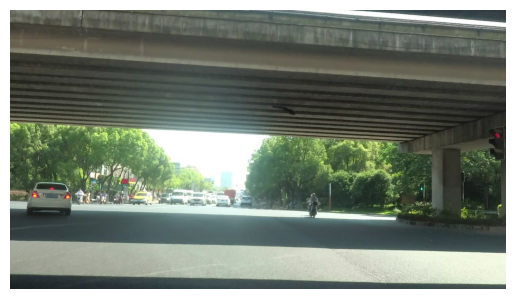

In [9]:
# Read the image
file_path = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\blob_image.jpg"
im = cv2.imread(file_path)

# OpenCV uses BGR color format, and matplotlib uses RGB.
# So, we need to convert the image from BGR to RGB format.
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Using matplotlib to display the image
plt.imshow(im_rgb)
plt.axis('off') # Optional: to hide the axis
plt.show() # This will render the image in Jupyter Notebook

[11/22 14:44:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\save\model_final.pth ...


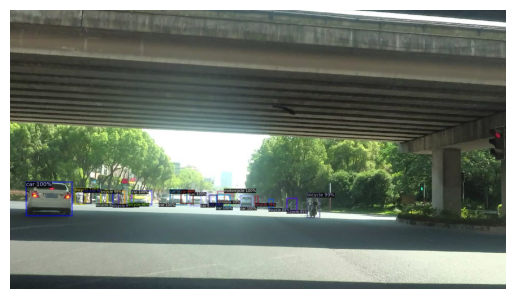

In [10]:
# Configuration and model loading for Faster R-CNN
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\SODA10M\SSLAD-2D\labeled\save\model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 6  # Set this to the number of classes you have, same as during training

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)


# We use Visualizer to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


# OpenCV uses BGR color format, and matplotlib uses RGB.
# So, we need to convert the image from BGR to RGB format.
im_rgb = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)

# Using matplotlib to display the image
plt.imshow(im_rgb)
plt.axis('off') # Optional: to hide the axis
plt.show() # This will render the image in Jupyter Notebook

# Display the image
cv2.imshow("Prediction Results", out.get_image()[:, :, ::-1])
cv2.waitKey(0)
cv2.destroyAllWindows()

## Cocodataset

In [ ]:
import os
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo

# Register the COCO dataset from the custom path
# Assuming you have "instances_train.json" and "instances_val.json" in the directory
# Update these json file names if yours are different
register_coco_instances("coco_train", {}, 
                        "C:/Users/melmourabitagharbi/Desktop/mohamed_ws/RD_Project-2/COCO_DS/coco_dataset/annotations/instances_train2017.json", 
                        "C:/Users/melmourabitagharbi/Desktop/mohamed_ws/RD_Project-2/COCO_DS/coco_dataset/train2017/train")
register_coco_instances("coco_val", {}, 
                        "C:/Users/melmourabitagharbi/Desktop/mohamed_ws/RD_Project-2/COCO_DS/coco_dataset/annotations/instances_val2017.json", 
                        "C:/Users/melmourabitagharbi/Desktop/mohamed_ws/RD_Project-2/COCO_DS/coco_dataset/train2017/val")



In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))

# Update the dataset names to the registered names
cfg.DATASETS.TRAIN = ("coco_train",)
cfg.DATASETS.TEST = ("coco_val",)  # or an empty tuple if you don't have a validation set
cfg.DATALOADER.NUM_WORKERS = 1
cfg.MODEL.WEIGHTS = r"C:\Users\melmourabitagharbi\detectron2\detectron2\checkpoint\faster_rcnn_R_101_FPN_3x\model_final_f6e8b1.pkl"
cfg.SOLVER.IMS_PER_BATCH = 1
cfg.SOLVER.MAX_ITER = 1000
cfg.SOLVER.STEPS = []  # do not decay learning rate
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 80  # Update to the number of classes in COCO

num_gpu = 1
bs = (num_gpu * 2)
cfg.SOLVER.BASE_LR = 0.02 * bs / 16  # pick a good LR

# Setup the output directory
cfg.OUTPUT_DIR = "C:/Users/melmourabitagharbi/Desktop/mohamed_ws/RD_Project-2/COCO_DS/coco_output"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

# Create the trainer and start training
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


## Prediction

In [ ]:
# Read the image
file_path = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\COCO_DS\coco_dataset\horse.jpg"
im = cv2.imread(file_path)

# OpenCV uses BGR color format, and matplotlib uses RGB.
# So, we need to convert the image from BGR to RGB format.
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Using matplotlib to display the image
plt.imshow(im_rgb)
plt.axis('off') # Optional: to hide the axis
plt.show() # This will render the image in Jupyter Notebook

In [ ]:
# Configuration and model loading for Faster R-CNN
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_101_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = r"C:\Users\melmourabitagharbi\Desktop\mohamed_ws\RD_Project-2\COCO_DS\coco_output\model_final.pth"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model

# Create predictor
predictor = DefaultPredictor(cfg)

# Make prediction
outputs = predictor(im)


# We use Visualizer to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))


# OpenCV uses BGR color format, and matplotlib uses RGB.
# So, we need to convert the image from BGR to RGB format.
im_rgb = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)

# Using matplotlib to display the image
plt.imshow(im_rgb)
plt.axis('off') # Optional: to hide the axis
plt.show() # This will render the image in Jupyter Notebook